<a href="https://colab.research.google.com/github/AndreiAf02/STAT561_Project/blob/main/Student_Dropout_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STAT 561 Project - Predicting Heart Disease From Diabetes with Transfer Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C55S3H):

In [216]:
pip install ucimlrepo

In [217]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [218]:
X

Marital Status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              0                       1   
...                          ...                     ...   
4419                           1                       1   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  \
0                         12  ...   
1                          3  ...   
2                         37  ...   
3                         37  ...   
4                         38  ...   
...                      ...  ...   
4419                       1  ...   
4420                       1  ...   
4421                      37  ...   
4422                      37  ...   
4423                      37  ...   

      Curricular units 1st sem (without evaluations)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
4419                                               0   
4420                                               0   
4421                                               0   
4422                                               0   
4423                                               0   

      Curricular units 2nd sem (credited)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
4419                                    0   
4420                                    0   
4421    

In [219]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [220]:
X.iloc[:,4].value_counts()

Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64

In [221]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [222]:
## Cleaning up the 'unknown' education levels:

data_total = pd.concat([X, y], axis=1)

dropout_val = []
init_grade_val = []
for i in range(len(data_total)):
  if data_total['Target'].iloc[i] == 'Dropout':
    dropout_val.append(1)
  elif data_total['Target'].iloc[i] == 'Graduate' or data_total['Target'].iloc[i] == 'Enrolled':
    dropout_val.append(0)
  if data_total['Previous qualification (grade)'].iloc[i] <=125:  ## Low Qualification Grade
    init_grade_val.append(1)
  elif data_total['Previous qualification (grade)'].iloc[i] > 125: ## High Qualification Grade
    init_grade_val.append(0)


# print(len(dropout_val))

data_total['Y'] = dropout_val
data_total['Y2'] = init_grade_val

data_total = data_total.drop(columns=['Target', 'Previous qualification (grade)'])

# data_total = data_total.reset_index(drop=True)
data_total

Marital Status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1          105   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1           22   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         19                      12                    5   
1                          1                       3                    3   
2                         37                      37                    9   
3                         38                      37                    5   
4                         37                      38                    9   
...                      ...                     ...                  ...   
4419                       1                       1                    5   
4420                       1                       1                    9   
4421                      37                      37                    9   
4422                      37                      37                    7   
4423                      38                      37                    5   

      ...  Curricular units 2nd sem (enrolled)  \
0     ...                                    0   
1     ...                                    6   
2     ...                                    6   
3     ...                                    6   
4     ...                                    6   
...   ...                                  ...   
4419  ...                                    6   
4420  ...                                    6   
4421  ...                                    8   
4422  ...                                    5   
4423  ...                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                         10   
4                                          6   
...                                      ...   
4419                                       8   
4420                                       6   
4421                                       9   
4422                                       6   
4423                                       6   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                       0                          0.000000   
1                                      

In [223]:
X = data_total.iloc[:, :-2]
y = data_total.iloc[:,-2]
y2 = data_total.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: Y, Length: 4424, dtype: int64

In [224]:
y2.value_counts()

Y2
0    3201
1    1223
Name: count, dtype: int64

In [225]:
X.iloc[:,4].value_counts()

Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64

In [226]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [227]:
data2 = pd.concat([X_scaled, y, y2], axis=1)
data2

0         1         2         3    4    5         6         7  \
0     0.0  0.285714  0.555556  0.013858  1.0  0.0  0.000000  0.418605   
1     0.0  0.250000  0.111111  0.925989  1.0  0.0  0.000000  0.000000   
2     0.0  0.000000  0.555556  0.907512  1.0  0.0  0.000000  0.837209   
3     0.0  0.285714  0.222222  0.978108  1.0  0.0  0.000000  0.860465   
4     0.2  0.678571  0.111111  0.801466  0.0  0.0  0.000000  0.837209   
...   ...       ...       ...       ...  ...  ...       ...       ...   
4419  0.0  0.000000  0.666667  0.978108  1.0  0.0  0.000000  0.000000   
4420  0.0  0.000000  0.222222  0.978108  1.0  0.0  0.962963  0.000000   
4421  0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.837209   
4422  0.0  0.000000  0.111111  0.915244  1.0  0.0  0.000000  0.837209   
4423  0.0  0.160714  0.111111  0.978108  1.0  0.0  0.194444  0.860465   

             8         9  ...        27        28    29        30   31  \
0     0.255814  0.025773  ...  0.000000  0.000000  0.00  0.000000  0.0   
1     0.046512  0.015464  ...  0.260870  0.181818  0.30  0.735897  0.0   
2     0.837209  0.046392  ...  0.260870  0.000000  0.00  0.000000  0.0   
3     0.837209  0.025773  ...  0.260870  0.303030  0.25  0.667692  0.0   
4     0.860465  0.046392  ...  0.260870  0.181818  0.30  0.700000  0.0   
...        ...       ...  ...       ...       ...   ...       ...  ...   
4419  0.000000  0.025773  ...  0.260870  0.242424  0.25  0.682051  0.0   
4420  0.000000  0.046392  ...  0.260870  0.181818  0.10  0.592308  0.0   
4421  0.837209  0.046392  ...  0.347826  0.272727  0.05  0.726923  0.0   
4422  0.837209  0.036082  ...  0.217391  0.181818  0.25  0.646154  0.0   
4423  0.837209  0.025773  ...  0.260870  0.181818  0.30  0.700000  0.0   

            32        33        34  Y  Y2  
0     0.372093  0.488889  0.766182  1   1  
1     0.732558  0.111111  0.640687  0   0  
2     0.372093  0.488889  0.766182  1   1  
3     0.209302  0.000000  0.124174  0   1  
4     0.732558  0.111111  0.640687  0   1  
...        ...       ...       ... ..  ..  
4419  0.918605  0.800000  0.000000  0   1  
4420  0.406977  0.311111  0.803170  1   1  
4421  0.732558  0.111111  0.640687  1   0  
4422  0.209302  0.000000  0.124174  0   0  
4423  0.593023  1.000000  0.311757  0   0  

[4424 rows x 37 columns]

In [228]:
y.value_counts()

Y
0    3003
1    1421
Name: count, dtype: int64

In [229]:
y2.value_counts()

Y2
0    3201
1    1223
Name: count, dtype: int64

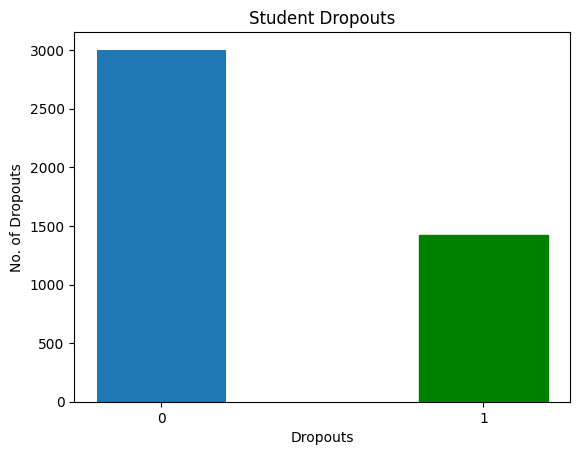

In [230]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Dropouts")
plt.ylabel("No. of Dropouts")
plt.title("Student Dropouts")
plt.show()

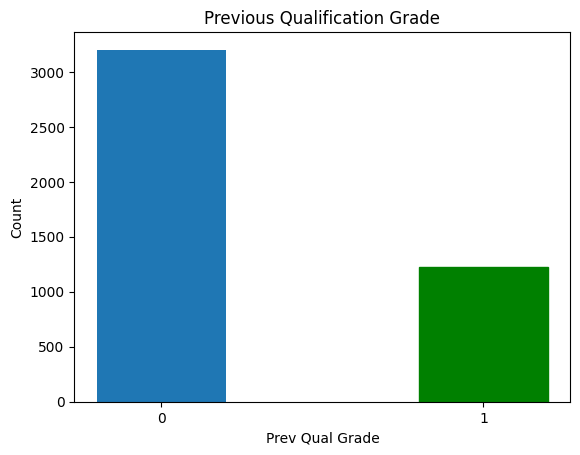

In [231]:
barlist = plt.bar([str(0),str(1)], y2.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Prev Qual Grade")
plt.ylabel("Count")
plt.title("Previous Qualification Grade")
plt.show()

# Splitting for Source and Target Domains:


# Full Dataset:

For the Heart Disease prediction, we split the dataset between low education level (**now including high-school dropouts**) and the high education level. The high-education data (with diabetes as response variable/label) becomes the source data and the low-education data (with Heart Disease as response variable/label) is the target data.

In [233]:
data2[4].value_counts()  ## Splitting into source and target datasets based on 'Attendance daytime/evening' status

4
1.0    3941
0.0     483
Name: count, dtype: int64

In [236]:
data_S = data2[data2[4] >= 0.5].reset_index(drop=True)  ## Source domain and classification
data_S_X = data_S.iloc[:,:-2]
data_S_y = data_S.iloc[:, -1]    ## Response variable of interest is Sept 2005 Late Payment

data_S_full = pd.concat([data_S_X, data_S_y], axis=1)

data_T = data2[data2[4] < 0.5].reset_index(drop=True) ## Target domain and classification

data_T_X = data_T.iloc[:,:-2]
data_T_y = data_T.iloc[:, -2]    ## Response variable of interest in Default

data_T_full = pd.concat([data_T_X, data_T_y], axis=1)

In [237]:
data_S_full

0         1         2         3    4    5         6         7  \
0     0.0  0.285714  0.555556  0.013858  1.0  0.0  0.000000  0.418605   
1     0.0  0.250000  0.111111  0.925989  1.0  0.0  0.000000  0.000000   
2     0.0  0.000000  0.555556  0.907512  1.0  0.0  0.000000  0.837209   
3     0.0  0.285714  0.222222  0.978108  1.0  0.0  0.000000  0.860465   
4     0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.418605   
...   ...       ...       ...       ...  ...  ...       ...       ...   
3936  0.0  0.000000  0.666667  0.978108  1.0  0.0  0.000000  0.000000   
3937  0.0  0.000000  0.222222  0.978108  1.0  0.0  0.962963  0.000000   
3938  0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.837209   
3939  0.0  0.000000  0.111111  0.915244  1.0  0.0  0.000000  0.837209   
3940  0.0  0.160714  0.111111  0.978108  1.0  0.0  0.194444  0.860465   

             8         9  ...   26        27        28    29        30   31  \
0     0.255814  0.025773  ...  0.0  0.000000  0.000000  0.00  0.000000  0.0   
1     0.046512  0.015464  ...  0.0  0.260870  0.181818  0.30  0.735897  0.0   
2     0.837209  0.046392  ...  0.0  0.260870  0.000000  0.00  0.000000  0.0   
3     0.837209  0.025773  ...  0.0  0.260870  0.303030  0.25  0.667692  0.0   
4     0.860465  0.036082  ...  0.0  0.347826  0.242424  0.40  0.772423  0.0   
...        ...       ...  ...  ...       ...       ...   ...       ...  ...   
3936  0.000000  0.025773  ...  0.0  0.260870  0.242424  0.25  0.682051  0.0   
3937  0.000000  0.046392  ...  0.0  0.260870  0.181818  0.10  0.592308  0.0   
3938  0.837209  0.046392  ...  0.0  0.347826  0.272727  0.05  0.726923  0.0   
3939  0.837209  0.036082  ...  0.0  0.217391  0.181818  0.25  0.646154  0.0   
3940  0.837209  0.025773  ...  0.0  0.260870  0.181818  0.30  0.700000  0.0   

            32        33        34  Y2  
0     0.372093  0.488889  0.766182   1  
1     0.732558  0.111111  0.640687   0  
2     0.372093  0.488889  0.766182   1  
3     0.209302  0.000000  0.124174   1  
4     0.918605  0.800000  0.000000   0  
...        ...       ...       ...  ..  
3936  0.918605  0.800000  0.000000   1  
3937  0.406977  0.311111  0.803170   1  
3938  0.732558  0.111111  0.640687   0  
3939  0.209302  0.000000  0.124174   0  
3940  0.593023  1.000000  0.311757   0  

[3941 rows x 36 columns]

In [238]:
data_T_full

0         1         2         3    4         5    6         7  \
0    0.2  0.678571  0.111111  0.801466  0.0  0.000000  0.0  0.837209   
1    0.2  0.678571  0.111111  1.000000  0.0  0.428571  0.0  0.837209   
2    0.0  0.303571  0.111111  0.801466  0.0  0.000000  0.0  0.418605   
3    0.0  0.000000  0.111111  1.000000  0.0  0.000000  0.0  0.023256   
4    0.6  0.678571  0.111111  1.000000  0.0  0.000000  0.0  0.418605   
..   ...       ...       ...       ...  ...       ...  ...       ...   
478  0.0  0.678571  0.222222  0.801466  0.0  0.000000  0.0  0.837209   
479  0.2  0.000000  0.111111  1.000000  0.0  0.000000  0.0  0.837209   
480  0.0  0.678571  0.111111  1.000000  0.0  0.000000  0.0  0.860465   
481  0.2  0.678571  0.111111  1.000000  0.0  0.000000  0.0  0.837209   
482  0.2  0.750000  0.111111  1.000000  0.0  0.000000  0.0  0.837209   

            8         9  ...   26        27        28    29        30  \
0    0.860465  0.046392  ...  0.0  0.260870  0.181818  0.30  0.700000   
1    0.837209  0.046392  ...  0.0  0.217391  0.515152  0.25  0.619231   
2    0.000000  0.046392  ...  0.0  0.260870  0.242424  0.30  0.774038   
3    0.837209  0.015464  ...  0.0  0.217391  0.272727  0.25  0.723077   
4    0.418605  0.046392  ...  0.0  0.217391  0.151515  0.25  0.624615   
..        ...       ...  ...  ...       ...       ...   ...       ...   
478  0.837209  0.046392  ...  0.0  0.260870  0.242424  0.30  0.841346   
479  0.837209  0.046392  ...  0.0  0.217391  0.181818  0.25  0.547436   
480  0.860465  0.025773  ...  0.0  0.217391  0.303030  0.15  0.574359   
481  0.837209  0.030928  ...  0.0  0.217391  0.363636  0.15  0.717949   
482  0.837209  0.020619  ...  0.0  0.217391  0.181818  0.25  0.771795   

           31        32        33        34  Y  
0    0.000000  0.732558  0.111111  0.640687  0  
1    0.416667  1.000000  0.244444  0.414795  0  
2    0.000000  0.558140  0.288889  0.772787  0  
3    0.000000  0.732558  0.111111  0.640687  0  
4    0.000000  0.000000  0.755556  0.578600  0  
..        ...       ...       ...       ... ..  
478  0.000000  0.558140  0.288889  0.772787  0  
479  0.000000  0.372093  0.488889  0.766182  1  
480  0.000000  0.406977  0.311111  0.803170  0  
481  0.000000  0.209302  0.000000  0.124174  1  
482  0.000000  0.732558  0.111111  0.640687  0  

[483 rows x 36 columns]

## Source domain and task labels:

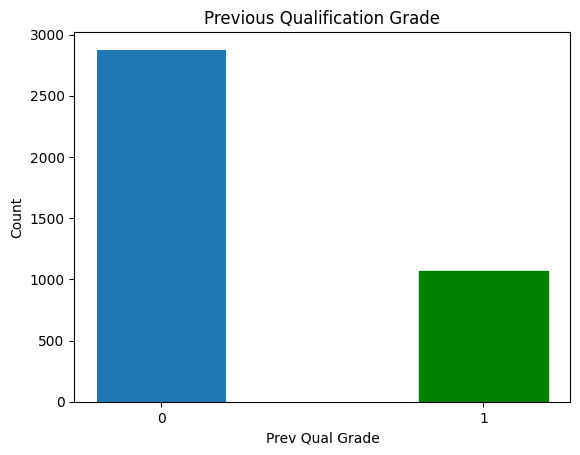

In [239]:
barlist_S = plt.bar([str(0),str(1)], data_S_y.value_counts(), width = 0.4)
barlist_S[1].set_color('g')

plt.xlabel("Prev Qual Grade")
plt.ylabel("Count")
plt.title("Previous Qualification Grade")
plt.show()

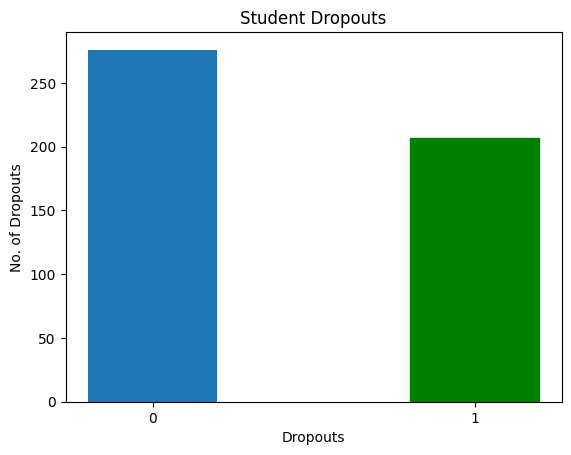

In [240]:
barlist_T = plt.bar([str(0),str(1)], data_T_y.value_counts(), width = 0.4)
barlist_T[1].set_color('g')

plt.xlabel("Dropouts")
plt.ylabel("No. of Dropouts")
plt.title("Student Dropouts")
plt.show()

## Updated Code (Modified from Shreya's code):

In [241]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  model.summary()
  print(len(model.layers))

  return model

# def create_dnn_model(input_shape):
#   model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
#         layers.Dense(32, activation='relu'),
#         layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
#     ])

#   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

#   return model



def train_and_evaluate(model, X_train, X_test, y_train, y_test, domain):

    time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

    model.save('model.h5')
    model.save_weights('model_wt.weights.h5')

    return model


In [242]:
def train_and_evaluate_nosave(model, X_train, X_test, y_train, y_test, domain):

    time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])

    print(fpr)
    print(fnr)

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

    return fpr, fnr


In [243]:
def fine_tuning(X_train, X_test, y_train, y_test, llim, ulim):
    new_model = create_dnn_model(X_S_train.shape[1])
    # new_model = tf.keras.models.load_model('model.h5')
    new_model.load_weights('model_wt.weights.h5')

    for layer in new_model.layers[llim:ulim]:
        layer.trainable = False
    for layer in new_model.layers[-1:]:
        layer.trainable = False

    for layer in new_model.layers:
        if layer.trainable == True:
          print("Trainable")
        else:
          print("Not Trainable")

    fpr, fnr = train_and_evaluate_nosave(new_model, X_train, X_test, y_train, y_test, "Target")
    return fpr, fnr

In [244]:
def Transductive_TL(model, X_test, y_test, domain):

    time_start = perf_counter()

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    # print('Confusion matrix:', conf_matrix)
    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")
    print('False Negative Rate:', fnr)

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

# Over/undersampling functions:

## Undersampling functions:

In [245]:
import random

def SRS_undersampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    np.random.seed(123)
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS = data_SRS_RUS.iloc[:, :-1]
    y_SRS = data_SRS_RUS.iloc[:, -1]

    return X_SRS, y_SRS


def SRSwR_undersampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    np.random.seed(123)
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS = data_SRS_RUS.iloc[:, :-1]
    y_SRS = data_SRS_RUS.iloc[:, -1]

    return X_SRS, y_SRS


def systematic_undersampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)
    print(undersample_size)
    print(oversample_size)

    k = oversample_size/undersample_size
    print(k)
    np.random.seed(123)
    start = random.randint(1, int(k))
    print(start)
    Row = []
    for i in range(undersample_size):
      row = start+int(k*i)-1
      Row.append(row)
    print(Row)
    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]
    data_maj_rus
    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])

    X_Sy = data_Sy_RUS.iloc[:, :-1]
    y_Sy = data_Sy_RUS.iloc[:, -1]

    return X_Sy, y_Sy



def multi_systematic_undersampler(data, data_column, m):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)
    print(undersample_size)
    print(oversample_size)

    k = oversample_size/undersample_size
    print(k)
    np.random.seed(123)
    start = random.sample(range(1, int(k*m)), m)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/m)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    print(Row)
    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]
    data_maj_rus
    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])

    X_Sy = data_Sy_RUS.iloc[:, :-1]
    y_Sy = data_Sy_RUS.iloc[:, -1]

    return X_Sy, y_Sy

## Oversampling functions:

In [246]:
def SRSwR_oversampler(data, data_column):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    np.random.seed(123)
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_minority, data_min_ros])
    X_SRS = data_SRS_ROS.iloc[:, :-1]
    y_SRS = data_SRS_ROS.iloc[:, -1]

    return X_SRS, y_SRS

# data_S_min_ros = data_S_minority.sample(n=oversample_size - undersample_size, replace=True)


def systematic_resampler(data, data_column, k):
    data_majority = data[data_column.isin([0])]
    data_minority = data[data_column.isin([1])]
    undersample_size = len(data_minority)
    oversample_size = len(data_majority)

    print(undersample_size)
    print(oversample_size)

    Nsamples = k*(oversample_size-undersample_size)/undersample_size
    print('Nsamples=', Nsamples)

    np.random.seed(123)
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/k)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]

    data_Sy_ROS = pd.concat([data_majority, data_minority, data_min_ros])
    X_Sy = data_Sy_ROS.iloc[:, :-1]
    y_Sy = data_Sy_ROS.iloc[:, -1]

    return X_Sy, y_Sy

# k = 48

# Nsamples = k*(oversample_size-undersample_size)/undersample_size
# # print(Nsamples)

# np.random.seed(123)
# start = np.random.choice(int(k), int(Nsamples), replace=True)
# # print(start)


# Row = []

# for j in range(len(start)):
#   for i in range(int(undersample_size/k)):
#     row = start[j]+int(k*i)-1
#     Row.append(row)

In [247]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(data_S_X, data_S_y, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)

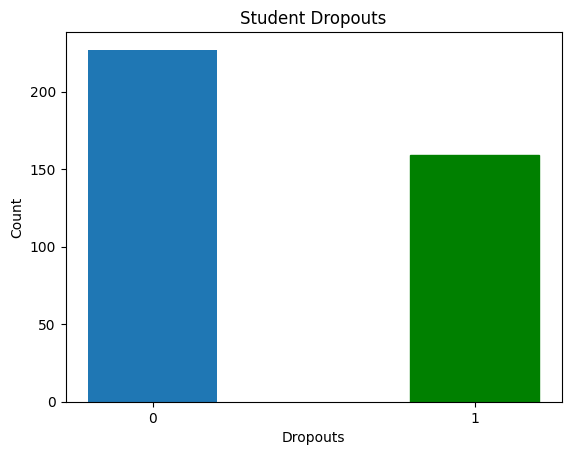

In [248]:
barlist = plt.bar([str(0),str(1)], y_T_train.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Dropouts")
plt.ylabel("Count")
plt.title("Student Dropouts")
plt.show()

In [249]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (3152, 35)
y_S_train: (3152,)
X_S_test: (789, 35)
y_S_test: (789,)


# Original (Imbalanced) dataset:

## Standard Machine Learning:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_272"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1904 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1905 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1906 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1907 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1908 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1909 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1910 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - AUC: 0.6726 - loss: 0.6775 - val_AUC: 0.9379 - val_loss: 0.6252
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.8713 - loss: 0.6524 - val_AUC: 0.9445 - val_loss: 0.5803
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.8781 - loss: 0.6145 - val_AUC: 0.9456 - val_loss: 0.5191
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9101 - loss: 0.5546 - val_AUC: 0.9408 - val_loss: 0.4487
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.9183 - loss: 0.4826 - val_AUC: 0.9312 - val_loss: 0.3883
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.9286 - loss: 0.3932 - val_AUC: 0.9275 - val_loss: 0.3781
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.9292 - loss: 0.3483 - val_AUC: 0.9401 - val_loss: 0.2807
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.9529 - loss: 0.2766 - val_AUC: 0.9467 - val_loss: 0.2398
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.93

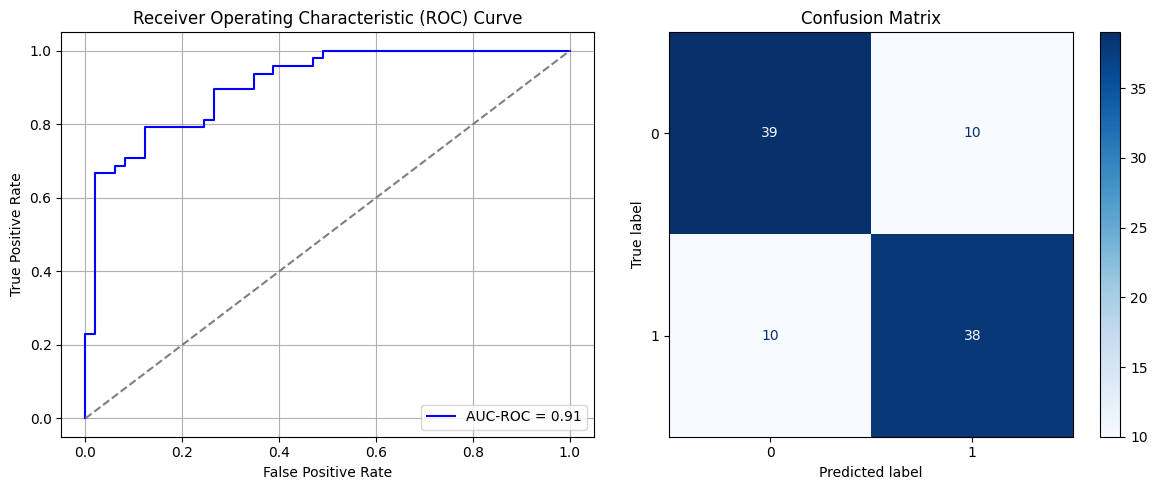

Best threshold based on F1-score: 0.4055446684360504
Time elapsed (performance): 5.690503599000294


<Sequential name=sequential_272, built=True>

In [250]:
model_source = create_dnn_model(X_S_train.shape[1])
train_and_evaluate(model_source, X_T_train, X_T_test, y_T_train, y_T_test, "Target")

## With Transfer Learning:

In [251]:
model_source = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_273"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1911 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1912 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1913 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1914 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1915 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1916 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1917 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - AUC: 0.5249 - loss: 0.6332 - val_AUC: 0.6623 - val_loss: 0.5679
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6507 - loss: 0.5580 - val_AUC: 0.7219 - val_loss: 0.5439
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7280 - loss: 0.4965 - val_AUC: 0.7638 - val_loss: 0.5274
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.7735 - loss: 0.4813 - val_AUC: 0.8016 - val_loss: 0.4636
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.8182 - loss: 0.4506 - val_AUC: 0.7967 - val_loss: 0.4684
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.8400 - loss: 0.4295 - val_AUC: 0.8018 - val_loss: 0.4745
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8643 - loss: 0.3983 - val_AUC: 0.8340 - val_loss: 0.4396
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8569 - loss: 0.3959 - val_AUC: 0.8293 - val_loss: 0.4368
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8762 - loss: 

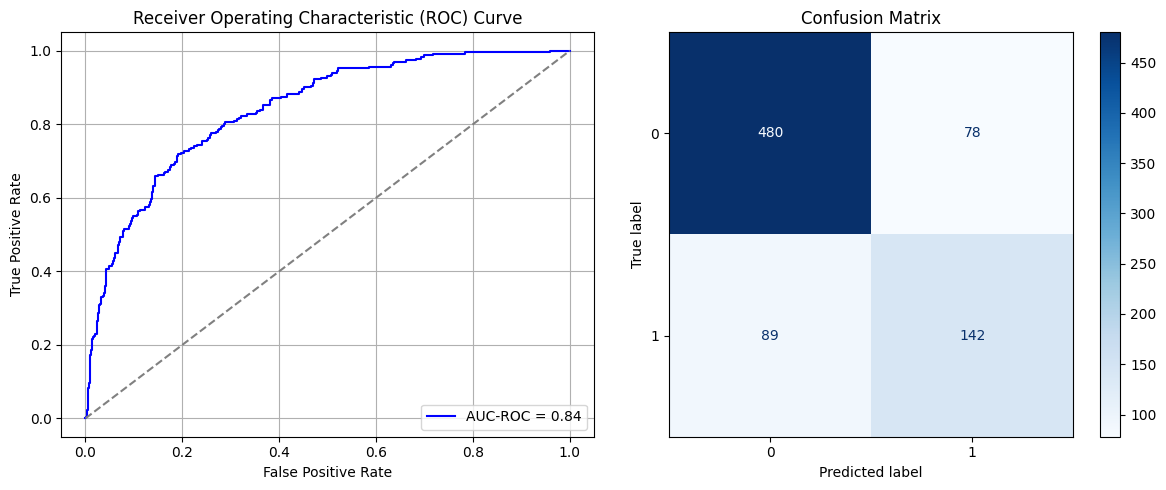

<ipython-input-241-93669339d7ff>:78: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


Best threshold based on F1-score: 0.8802446126937866
Time elapsed (performance): 10.126701508000224


<Sequential name=sequential_273, built=True>

In [252]:
train_and_evaluate(model_source, X_S_train, X_S_test, y_S_train, y_S_test, "Source")
# model_source.save('model_source.h5')
# model_source.save_weights('model_wt.weights.h5')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
AUC-ROC: 0.5127551020408163
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.92      0.66        49
           1       0.60      0.12      0.21        48

    accuracy                           0.53        97
   macro avg       0.56      0.52      0.43        97
weighted avg       0.56      0.53      0.44        97

FPR 0.08163265306122448 TPR: 0.125 FNR: 0.875 TNR: 0.9183673469387755


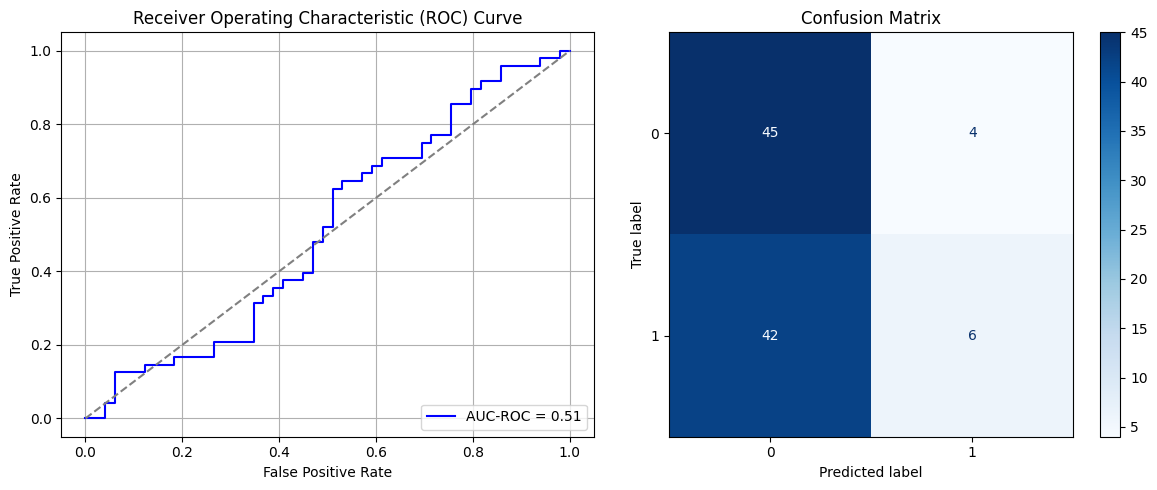

Best threshold based on F1-score: 0.7936642169952393
False Negative Rate: 0.875
Time elapsed (performance): 0.4726641010001913


<ipython-input-244-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [253]:
Transductive_TL(model_source, X_T_test, y_T_test, "Target")

In [255]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_274"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1918 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1919 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1920 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1921 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1922 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1923 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1924 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - AUC: 0.5709 - loss: 0.8127 - val_AUC: 0.5178 - val_loss: 0.7518
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - AUC: 0.5553 - loss: 0.7781 - val_AUC: 0.5266 - val_loss: 0.7141
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5942 - loss: 0.6953 - val_AUC: 0.5314 - val_loss: 0.6954
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6414 - loss: 0.6556 - val_AUC: 0.5477 - val_loss: 0.6862
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - AUC: 0.6328 - loss: 0.6544 - val_AUC: 0.5632 - val_loss: 0.6774
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.6068 - loss: 0.6805 - val_AUC: 0.5736 - val_loss: 0.6718
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 0.6725 - loss: 0.6558 - val_AUC: 0.5873 - val_loss: 0.6652
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - AUC: 0.6534 - loss: 0.6722 - val_AUC: 0.5995 - val_loss: 0.6578
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6952 - loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_275"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1925 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1926 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1927 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1928 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1929 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1930 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1931 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.6130 - loss: 0.8014 - val_AUC: 0.5155 - val_loss: 0.7544
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6144 - loss: 0.6928 - val_AUC: 0.5233 - val_loss: 0.7197
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5569 - loss: 0.7229 - val_AUC: 0.5385 - val_loss: 0.6980
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5934 - loss: 0.6892 - val_AUC: 0.5525 - val_loss: 0.6896
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6495 - loss: 0.6640 - val_AUC: 0.5666 - val_loss: 0.6821
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5610 - loss: 0.7033 - val_AUC: 0.5803 - val_loss: 0.6728
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6266 - loss: 0.6720 - val_AUC: 0.5858 - val_loss: 0.6679
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6893 - loss: 0.6474 - val_AUC: 0.5950 - val_loss: 0.6639
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6807 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_276"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1932 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1933 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1934 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1935 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1936 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1937 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1938 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.5606 - loss: 0.8528 - val_AUC: 0.5174 - val_loss: 0.7549
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.6117 - loss: 0.7476 - val_AUC: 0.5222 - val_loss: 0.7231
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6254 - loss: 0.6747 - val_AUC: 0.5337 - val_loss: 0.7019
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6217 - loss: 0.6782 - val_AUC: 0.5451 - val_loss: 0.6882
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6015 - loss: 0.6821 - val_AUC: 0.5666 - val_loss: 0.6825
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6457 - loss: 0.6654 - val_AUC: 0.5754 - val_loss: 0.6808
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6584 - loss: 0.6596 - val_AUC: 0.5762 - val_loss: 0.6726
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6652 - loss: 0.6676 - val_AUC: 0.5876 - val_loss: 0.6653
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.6961 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_277"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1939 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1940 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1941 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1942 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1943 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1944 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1945 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.5936 - loss: 0.8316 - val_AUC: 0.5181 - val_loss: 0.7588
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6072 - loss: 0.7709 - val_AUC: 0.5240 - val_loss: 0.7245
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5617 - loss: 0.7406 - val_AUC: 0.5359 - val_loss: 0.6997
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5740 - loss: 0.7029 - val_AUC: 0.5581 - val_loss: 0.6882
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5775 - loss: 0.6995 - val_AUC: 0.5629 - val_loss: 0.6819
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6015 - loss: 0.6801 - val_AUC: 0.5780 - val_loss: 0.6742
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6978 - loss: 0.6492 - val_AUC: 0.5839 - val_loss: 0.6689
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6835 - loss: 0.6552 - val_AUC: 0.5947 - val_loss: 0.6647
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6662 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_278"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1946 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1947 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1948 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1949 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1950 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1951 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1952 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5789 - loss: 0.7924 - val_AUC: 0.5178 - val_loss: 0.7485
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6153 - loss: 0.7165 - val_AUC: 0.5237 - val_loss: 0.7168
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6054 - loss: 0.6783 - val_AUC: 0.5377 - val_loss: 0.6979
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6596 - loss: 0.6627 - val_AUC: 0.5544 - val_loss: 0.6934
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6326 - loss: 0.6578 - val_AUC: 0.5695 - val_loss: 0.6851
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6247 - loss: 0.6740 - val_AUC: 0.5725 - val_loss: 0.6742
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6438 - loss: 0.6629 - val_AUC: 0.5832 - val_loss: 0.6670
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6665 - loss: 0.6486 - val_AUC: 0.5858 - val_loss: 0.6632
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.7258 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_279"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1953 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1954 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1955 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1956 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1957 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1958 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1959 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.6350 - loss: 0.7421 - val_AUC: 0.5155 - val_loss: 0.7526
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6234 - loss: 0.7185 - val_AUC: 0.5266 - val_loss: 0.7175
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5999 - loss: 0.6749 - val_AUC: 0.5351 - val_loss: 0.6961
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5872 - loss: 0.6974 - val_AUC: 0.5540 - val_loss: 0.6851
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6368 - loss: 0.6573 - val_AUC: 0.5677 - val_loss: 0.6803
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6284 - loss: 0.6779 - val_AUC: 0.5784 - val_loss: 0.6746
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6579 - loss: 0.6591 - val_AUC: 0.5825 - val_loss: 0.6695
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6596 - loss: 0.6492 - val_AUC: 0.5891 - val_loss: 0.6630
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6392 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_280"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1960 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1961 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1962 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1963 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1964 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1965 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1966 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - AUC: 0.6215 - loss: 0.7660 - val_AUC: 0.5159 - val_loss: 0.7546
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5832 - loss: 0.7657 - val_AUC: 0.5233 - val_loss: 0.7201
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5620 - loss: 0.7540 - val_AUC: 0.5314 - val_loss: 0.6980
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6064 - loss: 0.7035 - val_AUC: 0.5444 - val_loss: 0.6907
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6096 - loss: 0.6693 - val_AUC: 0.5566 - val_loss: 0.6808
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6449 - loss: 0.6589 - val_AUC: 0.5706 - val_loss: 0.6759
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6131 - loss: 0.6900 - val_AUC: 0.5680 - val_loss: 0.6699
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6770 - loss: 0.6551 - val_AUC: 0.5851 - val_loss: 0.6669
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6803 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_281"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1967 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1968 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1969 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1970 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1971 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1972 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1973 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - AUC: 0.5606 - loss: 0.8638 - val_AUC: 0.5200 - val_loss: 0.7546
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5833 - loss: 0.7458 - val_AUC: 0.5229 - val_loss: 0.7217
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5962 - loss: 0.7306 - val_AUC: 0.5333 - val_loss: 0.7038
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5540 - loss: 0.7111 - val_AUC: 0.5470 - val_loss: 0.6918
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6280 - loss: 0.6616 - val_AUC: 0.5658 - val_loss: 0.6847
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6400 - loss: 0.6611 - val_AUC: 0.5806 - val_loss: 0.6773
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6611 - loss: 0.6578 - val_AUC: 0.5884 - val_loss: 0.6687
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6631 - loss: 0.6647 - val_AUC: 0.5947 - val_loss: 0.6642
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6786 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_282"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1974 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1975 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1976 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1977 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1978 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1979 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1980 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - AUC: 0.5984 - loss: 0.8075 - val_AUC: 0.5174 - val_loss: 0.7560
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6106 - loss: 0.7124 - val_AUC: 0.5244 - val_loss: 0.7177
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5940 - loss: 0.7126 - val_AUC: 0.5403 - val_loss: 0.7009
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6256 - loss: 0.6873 - val_AUC: 0.5514 - val_loss: 0.6931
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6642 - loss: 0.6444 - val_AUC: 0.5666 - val_loss: 0.6813
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6213 - loss: 0.6642 - val_AUC: 0.5754 - val_loss: 0.6730
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6710 - loss: 0.6437 - val_AUC: 0.5780 - val_loss: 0.6673
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6484 - loss: 0.6617 - val_AUC: 0.5932 - val_loss: 0.6628
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6856 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_283"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1981 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1982 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1983 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1984 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1985 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1986 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1987 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - AUC: 0.6250 - loss: 0.8040 - val_AUC: 0.5163 - val_loss: 0.7596
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5742 - loss: 0.7869 - val_AUC: 0.5244 - val_loss: 0.7227
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5689 - loss: 0.7052 - val_AUC: 0.5292 - val_loss: 0.7002
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5933 - loss: 0.6827 - val_AUC: 0.5447 - val_loss: 0.6899
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6291 - loss: 0.6720 - val_AUC: 0.5640 - val_loss: 0.6868
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6440 - loss: 0.6561 - val_AUC: 0.5703 - val_loss: 0.6781
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6162 - loss: 0.6703 - val_AUC: 0.5799 - val_loss: 0.6730
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6761 - loss: 0.6427 - val_AUC: 0.5876 - val_loss: 0.6658
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6899 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_284"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1988 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1989 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1990 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1991 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1992 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1993 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1994 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - AUC: 0.5872 - loss: 0.7780 - val_AUC: 0.5152 - val_loss: 0.7527
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6251 - loss: 0.6831 - val_AUC: 0.5259 - val_loss: 0.7176
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6100 - loss: 0.7048 - val_AUC: 0.5322 - val_loss: 0.6988
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6154 - loss: 0.6795 - val_AUC: 0.5477 - val_loss: 0.6905
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5659 - loss: 0.7085 - val_AUC: 0.5640 - val_loss: 0.6808
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6459 - loss: 0.6475 - val_AUC: 0.5706 - val_loss: 0.6736
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6442 - loss: 0.6633 - val_AUC: 0.5740 - val_loss: 0.6662
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6299 - loss: 0.6808 - val_AUC: 0.5902 - val_loss: 0.6633
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6999 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_285"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1995 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1996 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1997 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1998 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1999 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2000 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2001 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - AUC: 0.5416 - loss: 0.8285 - val_AUC: 0.5166 - val_loss: 0.7480
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6107 - loss: 0.7023 - val_AUC: 0.5244 - val_loss: 0.7145
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6122 - loss: 0.6654 - val_AUC: 0.5396 - val_loss: 0.6973
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6355 - loss: 0.6679 - val_AUC: 0.5632 - val_loss: 0.6901
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6510 - loss: 0.6476 - val_AUC: 0.5714 - val_loss: 0.6803
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6589 - loss: 0.6556 - val_AUC: 0.5780 - val_loss: 0.6739
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6644 - loss: 0.6644 - val_AUC: 0.5858 - val_loss: 0.6648
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6708 - loss: 0.6568 - val_AUC: 0.6002 - val_loss: 0.6620
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6968 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_286"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2002 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2003 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2004 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2005 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2006 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2007 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2008 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - AUC: 0.5721 - loss: 0.8251 - val_AUC: 0.5196 - val_loss: 0.7522
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6049 - loss: 0.7275 - val_AUC: 0.5237 - val_loss: 0.7149
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6495 - loss: 0.6556 - val_AUC: 0.5366 - val_loss: 0.6991
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6184 - loss: 0.6613 - val_AUC: 0.5632 - val_loss: 0.6903
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6859 - loss: 0.6313 - val_AUC: 0.5655 - val_loss: 0.6811
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6327 - loss: 0.6648 - val_AUC: 0.5836 - val_loss: 0.6723
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6861 - loss: 0.6456 - val_AUC: 0.5943 - val_loss: 0.6651
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6699 - loss: 0.6584 - val_AUC: 0.5980 - val_loss: 0.6583
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6600 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_287"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2009 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2010 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2011 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2012 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2013 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2014 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2015 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - AUC: 0.6271 - loss: 0.7850 - val_AUC: 0.5148 - val_loss: 0.7532
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5731 - loss: 0.7800 - val_AUC: 0.5244 - val_loss: 0.7168
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6112 - loss: 0.6706 - val_AUC: 0.5329 - val_loss: 0.6979
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5479 - loss: 0.7199 - val_AUC: 0.5558 - val_loss: 0.6897
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6660 - loss: 0.6544 - val_AUC: 0.5647 - val_loss: 0.6832
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6790 - loss: 0.6515 - val_AUC: 0.5684 - val_loss: 0.6737
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6702 - loss: 0.6470 - val_AUC: 0.5788 - val_loss: 0.6662
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6494 - loss: 0.6600 - val_AUC: 0.5891 - val_loss: 0.6606
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6915 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_288"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2016 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2017 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2018 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2019 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2020 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2021 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2022 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.5879 - loss: 0.7999 - val_AUC: 0.5181 - val_loss: 0.7525
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6311 - loss: 0.7513 - val_AUC: 0.5266 - val_loss: 0.7202
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5957 - loss: 0.6754 - val_AUC: 0.5374 - val_loss: 0.6992
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6392 - loss: 0.6498 - val_AUC: 0.5518 - val_loss: 0.6888
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6314 - loss: 0.6677 - val_AUC: 0.5647 - val_loss: 0.6797
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6954 - loss: 0.6333 - val_AUC: 0.5762 - val_loss: 0.6721
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6644 - loss: 0.6533 - val_AUC: 0.5869 - val_loss: 0.6679
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6947 - loss: 0.6352 - val_AUC: 0.6021 - val_loss: 0.6621
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6372 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_289"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2023 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2024 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2025 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2026 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2027 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2028 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2029 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - AUC: 0.6104 - loss: 0.7486 - val_AUC: 0.5163 - val_loss: 0.7487
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6219 - loss: 0.7340 - val_AUC: 0.5259 - val_loss: 0.7143
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5929 - loss: 0.7155 - val_AUC: 0.5344 - val_loss: 0.6943
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5868 - loss: 0.6887 - val_AUC: 0.5529 - val_loss: 0.6835
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6246 - loss: 0.6773 - val_AUC: 0.5636 - val_loss: 0.6760
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6316 - loss: 0.6714 - val_AUC: 0.5814 - val_loss: 0.6716
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6640 - loss: 0.6604 - val_AUC: 0.5839 - val_loss: 0.6668
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6685 - loss: 0.6454 - val_AUC: 0.5869 - val_loss: 0.6604
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6997

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_290"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2030 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2031 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2032 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2033 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2034 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2035 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2036 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - AUC: 0.5520 - loss: 0.9581 - val_AUC: 0.5189 - val_loss: 0.7650
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6014 - loss: 0.7563 - val_AUC: 0.5233 - val_loss: 0.7300
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5555 - loss: 0.7114 - val_AUC: 0.5337 - val_loss: 0.7041
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5993 - loss: 0.6919 - val_AUC: 0.5488 - val_loss: 0.6918
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6503 - loss: 0.6548 - val_AUC: 0.5714 - val_loss: 0.6875
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6371 - loss: 0.6619 - val_AUC: 0.5751 - val_loss: 0.6778
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6734 - loss: 0.6510 - val_AUC: 0.5876 - val_loss: 0.6706
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6508 - loss: 0.6550 - val_AUC: 0.5947 - val_loss: 0.6642
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6966 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_291"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2037 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2038 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2039 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2040 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2041 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2042 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2043 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.5961 - loss: 0.8380 - val_AUC: 0.5170 - val_loss: 0.7535
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6223 - loss: 0.7146 - val_AUC: 0.5251 - val_loss: 0.7193
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5497 - loss: 0.7670 - val_AUC: 0.5333 - val_loss: 0.6996
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5971 - loss: 0.6850 - val_AUC: 0.5551 - val_loss: 0.6881
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6450 - loss: 0.6533 - val_AUC: 0.5643 - val_loss: 0.6801
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6104 - loss: 0.6791 - val_AUC: 0.5788 - val_loss: 0.6733
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6659 - loss: 0.6613 - val_AUC: 0.5858 - val_loss: 0.6688
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6653 - loss: 0.6619 - val_AUC: 0.5965 - val_loss: 0.6640
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6586 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_292"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2044 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2045 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2046 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2047 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2048 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2049 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2050 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - AUC: 0.6025 - loss: 0.8067 - val_AUC: 0.5141 - val_loss: 0.7552
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6333 - loss: 0.7086 - val_AUC: 0.5211 - val_loss: 0.7193
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6182 - loss: 0.7190 - val_AUC: 0.5351 - val_loss: 0.7031
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6044 - loss: 0.6760 - val_AUC: 0.5459 - val_loss: 0.6914
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6443 - loss: 0.6583 - val_AUC: 0.5584 - val_loss: 0.6818
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6424 - loss: 0.6688 - val_AUC: 0.5706 - val_loss: 0.6733
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6350 - loss: 0.6590 - val_AUC: 0.5710 - val_loss: 0.6660
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6477 - loss: 0.6518 - val_AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_293"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2051 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2052 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2053 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2054 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2055 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2056 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2057 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.6257 - loss: 0.7520 - val_AUC: 0.5211 - val_loss: 0.7524
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5850 - loss: 0.7360 - val_AUC: 0.5263 - val_loss: 0.7167
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5974 - loss: 0.7009 - val_AUC: 0.5366 - val_loss: 0.6954
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5804 - loss: 0.6864 - val_AUC: 0.5555 - val_loss: 0.6855
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6518 - loss: 0.6635 - val_AUC: 0.5699 - val_loss: 0.6807
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6716 - loss: 0.6421 - val_AUC: 0.5699 - val_loss: 0.6709
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6477 - loss: 0.6553 - val_AUC: 0.5854 - val_loss: 0.6658
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6526 - loss: 0.6644 - val_AUC: 0.5976 - val_loss: 0.6634
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6841 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_294"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2058 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2059 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2060 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2061 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2062 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2063 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2064 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.5710 - loss: 0.8531 - val_AUC: 0.5178 - val_loss: 0.7535
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5747 - loss: 0.7378 - val_AUC: 0.5270 - val_loss: 0.7214
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6084 - loss: 0.7034 - val_AUC: 0.5329 - val_loss: 0.7028
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6564 - loss: 0.6644 - val_AUC: 0.5607 - val_loss: 0.6931
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6632 - loss: 0.6334 - val_AUC: 0.5729 - val_loss: 0.6835
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6267 - loss: 0.6697 - val_AUC: 0.5947 - val_loss: 0.6710
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6652 - loss: 0.6576 - val_AUC: 0.5995 - val_loss: 0.6640
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6725 - loss: 0.6464 - val_AUC: 0.6069 - val_loss: 0.6593
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6879 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_295"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2065 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2066 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2067 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2068 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2069 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2070 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2071 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.5483 - loss: 0.8445 - val_AUC: 0.5166 - val_loss: 0.7496
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5751 - loss: 0.7823 - val_AUC: 0.5266 - val_loss: 0.7151
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5845 - loss: 0.7435 - val_AUC: 0.5307 - val_loss: 0.6996
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5792 - loss: 0.6844 - val_AUC: 0.5507 - val_loss: 0.6895
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6499 - loss: 0.6470 - val_AUC: 0.5714 - val_loss: 0.6857
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6372 - loss: 0.6765 - val_AUC: 0.5673 - val_loss: 0.6758
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6160 - loss: 0.6749 - val_AUC: 0.5806 - val_loss: 0.6668
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6712 - loss: 0.6518 - val_AUC: 0.5906 - val_loss: 0.6646
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7112

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_296"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2072 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2073 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2074 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2075 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2076 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2077 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2078 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5664 - loss: 0.8318 - val_AUC: 0.5174 - val_loss: 0.7543
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5909 - loss: 0.7510 - val_AUC: 0.5240 - val_loss: 0.7151
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5891 - loss: 0.7013 - val_AUC: 0.5340 - val_loss: 0.6963
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5798 - loss: 0.7037 - val_AUC: 0.5499 - val_loss: 0.6879
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6356 - loss: 0.6672 - val_AUC: 0.5710 - val_loss: 0.6839
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6114 - loss: 0.6777 - val_AUC: 0.5795 - val_loss: 0.6753
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6846 - loss: 0.6532 - val_AUC: 0.5740 - val_loss: 0.6676
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6789 - loss: 0.6563 - val_AUC: 0.5869 - val_loss: 0.6623
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6771 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_297"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2079 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2080 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2081 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2082 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2083 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2084 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2085 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5626 - loss: 0.8512 - val_AUC: 0.5178 - val_loss: 0.7542
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6195 - loss: 0.6932 - val_AUC: 0.5248 - val_loss: 0.7200
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5918 - loss: 0.6980 - val_AUC: 0.5374 - val_loss: 0.7004
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5751 - loss: 0.6807 - val_AUC: 0.5525 - val_loss: 0.6901
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5891 - loss: 0.6729 - val_AUC: 0.5703 - val_loss: 0.6843
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6379 - loss: 0.6587 - val_AUC: 0.5729 - val_loss: 0.6757
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6408 - loss: 0.6648 - val_AUC: 0.5825 - val_loss: 0.6706
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6547 - loss: 0.6648 - val_AUC: 0.5950 - val_loss: 0.6656
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6727 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_298"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2086 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2087 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2088 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2089 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2090 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2091 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2092 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - AUC: 0.5504 - loss: 0.8660 - val_AUC: 0.5185 - val_loss: 0.7521
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5857 - loss: 0.7849 - val_AUC: 0.5251 - val_loss: 0.7180
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5878 - loss: 0.7192 - val_AUC: 0.5374 - val_loss: 0.7030
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6222 - loss: 0.6598 - val_AUC: 0.5547 - val_loss: 0.6890
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5866 - loss: 0.7004 - val_AUC: 0.5699 - val_loss: 0.6790
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6355 - loss: 0.6763 - val_AUC: 0.5843 - val_loss: 0.6737
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6810 - loss: 0.6423 - val_AUC: 0.5928 - val_loss: 0.6653
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6879 - loss: 0.6556 - val_AUC: 0.6017 - val_loss: 0.6610
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6351 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_299"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2093 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2094 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2095 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2096 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2097 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2098 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2099 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.5404 - loss: 0.8979 - val_AUC: 0.5152 - val_loss: 0.7551
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5996 - loss: 0.7273 - val_AUC: 0.5226 - val_loss: 0.7199
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5930 - loss: 0.6888 - val_AUC: 0.5344 - val_loss: 0.6985
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6052 - loss: 0.6791 - val_AUC: 0.5488 - val_loss: 0.6900
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5660 - loss: 0.7042 - val_AUC: 0.5666 - val_loss: 0.6798
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6066 - loss: 0.6775 - val_AUC: 0.5729 - val_loss: 0.6720
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6726 - loss: 0.6553 - val_AUC: 0.5825 - val_loss: 0.6682
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6893 - loss: 0.6433 - val_AUC: 0.5925 - val_loss: 0.6617
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6957 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_300"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2100 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2101 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2102 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2103 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2104 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2105 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2106 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5859 - loss: 0.8134 - val_AUC: 0.5170 - val_loss: 0.7546
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6371 - loss: 0.6779 - val_AUC: 0.5251 - val_loss: 0.7193
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6313 - loss: 0.6765 - val_AUC: 0.5340 - val_loss: 0.7003
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6115 - loss: 0.6608 - val_AUC: 0.5499 - val_loss: 0.6904
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6802 - loss: 0.6413 - val_AUC: 0.5721 - val_loss: 0.6832
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6435 - loss: 0.6803 - val_AUC: 0.5865 - val_loss: 0.6769
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6894 - loss: 0.6446 - val_AUC: 0.5962 - val_loss: 0.6666
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6289 - loss: 0.6768 - val_AUC: 0.6021 - val_loss: 0.6590
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.7027 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_301"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2107 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2108 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2109 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2110 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2111 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2112 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2113 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.6042 - loss: 0.7972 - val_AUC: 0.5159 - val_loss: 0.7556
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5753 - loss: 0.7193 - val_AUC: 0.5233 - val_loss: 0.7177
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5842 - loss: 0.7063 - val_AUC: 0.5292 - val_loss: 0.6998
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6266 - loss: 0.6703 - val_AUC: 0.5470 - val_loss: 0.6888
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5830 - loss: 0.6801 - val_AUC: 0.5614 - val_loss: 0.6802
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6659 - loss: 0.6529 - val_AUC: 0.5729 - val_loss: 0.6742
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6309 - loss: 0.6612 - val_AUC: 0.5795 - val_loss: 0.6652
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6639 - loss: 0.6517 - val_AUC: 0.5873 - val_loss: 0.6591
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6693

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_302"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2114 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2115 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2116 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2117 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2118 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2119 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2120 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5693 - loss: 0.8464 - val_AUC: 0.5185 - val_loss: 0.7560
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5839 - loss: 0.7749 - val_AUC: 0.5266 - val_loss: 0.7175
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5843 - loss: 0.7069 - val_AUC: 0.5333 - val_loss: 0.6973
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6318 - loss: 0.6595 - val_AUC: 0.5466 - val_loss: 0.6887
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6243 - loss: 0.6755 - val_AUC: 0.5640 - val_loss: 0.6801
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6270 - loss: 0.6751 - val_AUC: 0.5747 - val_loss: 0.6727
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6668 - loss: 0.6468 - val_AUC: 0.5780 - val_loss: 0.6655
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6646 - loss: 0.6544 - val_AUC: 0.5976 - val_loss: 0.6624
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6858 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_303"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2121 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2122 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2123 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2124 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2125 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2126 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2127 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5965 - loss: 0.7440 - val_AUC: 0.5189 - val_loss: 0.7517
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5905 - loss: 0.7532 - val_AUC: 0.5259 - val_loss: 0.7140
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5260 - loss: 0.7562 - val_AUC: 0.5337 - val_loss: 0.6946
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6275 - loss: 0.6772 - val_AUC: 0.5551 - val_loss: 0.6843
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6143 - loss: 0.6777 - val_AUC: 0.5717 - val_loss: 0.6787
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6101 - loss: 0.6834 - val_AUC: 0.5758 - val_loss: 0.6701
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6302 - loss: 0.6722 - val_AUC: 0.5884 - val_loss: 0.6644
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6991 - loss: 0.6598 - val_AUC: 0.5884 - val_loss: 0.6622
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6619 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_304"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2128 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2129 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2130 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2131 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2132 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2133 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2134 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - AUC: 0.6355 - loss: 0.7704 - val_AUC: 0.5174 - val_loss: 0.7571
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6181 - loss: 0.7391 - val_AUC: 0.5274 - val_loss: 0.7229
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6179 - loss: 0.6895 - val_AUC: 0.5348 - val_loss: 0.7014
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6323 - loss: 0.6599 - val_AUC: 0.5514 - val_loss: 0.6906
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6461 - loss: 0.6692 - val_AUC: 0.5695 - val_loss: 0.6819
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6344 - loss: 0.6716 - val_AUC: 0.5891 - val_loss: 0.6740
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6743 - loss: 0.6482 - val_AUC: 0.5939 - val_loss: 0.6657
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6477 - loss: 0.6652 - val_AUC: 0.5965 - val_loss: 0.6614
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7028

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_305"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2135 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2136 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2137 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2138 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2139 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2140 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2141 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5822 - loss: 0.8636 - val_AUC: 0.5155 - val_loss: 0.7560
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5657 - loss: 0.7256 - val_AUC: 0.5237 - val_loss: 0.7200
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6314 - loss: 0.6745 - val_AUC: 0.5359 - val_loss: 0.6994
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6130 - loss: 0.6798 - val_AUC: 0.5529 - val_loss: 0.6865
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6440 - loss: 0.6595 - val_AUC: 0.5732 - val_loss: 0.6796
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6292 - loss: 0.6704 - val_AUC: 0.5758 - val_loss: 0.6708
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6465 - loss: 0.6618 - val_AUC: 0.5873 - val_loss: 0.6646
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6467 - loss: 0.6727 - val_AUC: 0.5958 - val_loss: 0.6597
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6982 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_306"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2142 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2143 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2144 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2145 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2146 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2147 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2148 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.5728 - loss: 0.8128 - val_AUC: 0.5174 - val_loss: 0.7528
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6117 - loss: 0.7199 - val_AUC: 0.5240 - val_loss: 0.7193
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5960 - loss: 0.7253 - val_AUC: 0.5329 - val_loss: 0.7004
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6063 - loss: 0.6729 - val_AUC: 0.5496 - val_loss: 0.6886
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6447 - loss: 0.6571 - val_AUC: 0.5595 - val_loss: 0.6807
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6359 - loss: 0.6633 - val_AUC: 0.5673 - val_loss: 0.6748
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6438 - loss: 0.6642 - val_AUC: 0.5854 - val_loss: 0.6708
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6817 - loss: 0.6582 - val_AUC: 0.5906 - val_loss: 0.6633
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6872 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_307"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2149 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2150 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2151 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2152 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2153 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2154 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2155 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.6018 - loss: 0.8216 - val_AUC: 0.5148 - val_loss: 0.7552
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6067 - loss: 0.7230 - val_AUC: 0.5226 - val_loss: 0.7190
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6368 - loss: 0.6641 - val_AUC: 0.5348 - val_loss: 0.7005
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5638 - loss: 0.7105 - val_AUC: 0.5503 - val_loss: 0.6883
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6599 - loss: 0.6423 - val_AUC: 0.5618 - val_loss: 0.6815
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6517 - loss: 0.6616 - val_AUC: 0.5729 - val_loss: 0.6767
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6752 - loss: 0.6392 - val_AUC: 0.5729 - val_loss: 0.6650
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6412 - loss: 0.6751 - val_AUC: 0.5902 - val_loss: 0.6606
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7198

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_308"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2156 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2157 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2158 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2159 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2160 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2161 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2162 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5609 - loss: 0.8374 - val_AUC: 0.5174 - val_loss: 0.7511
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6041 - loss: 0.7134 - val_AUC: 0.5237 - val_loss: 0.7160
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5518 - loss: 0.7667 - val_AUC: 0.5366 - val_loss: 0.7002
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6304 - loss: 0.6635 - val_AUC: 0.5521 - val_loss: 0.6886
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6265 - loss: 0.6624 - val_AUC: 0.5703 - val_loss: 0.6805
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6347 - loss: 0.6592 - val_AUC: 0.5747 - val_loss: 0.6749
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6319 - loss: 0.6619 - val_AUC: 0.5854 - val_loss: 0.6675
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6648 - loss: 0.6686 - val_AUC: 0.5965 - val_loss: 0.6618
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7041 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_309"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2163 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2164 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2165 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2166 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2167 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2168 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2169 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.6083 - loss: 0.8026 - val_AUC: 0.5166 - val_loss: 0.7560
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6174 - loss: 0.7500 - val_AUC: 0.5237 - val_loss: 0.7182
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5758 - loss: 0.6910 - val_AUC: 0.5296 - val_loss: 0.6958
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6264 - loss: 0.6782 - val_AUC: 0.5444 - val_loss: 0.6891
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5721 - loss: 0.7213 - val_AUC: 0.5584 - val_loss: 0.6824
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6139 - loss: 0.6613 - val_AUC: 0.5610 - val_loss: 0.6721
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6243 - loss: 0.6736 - val_AUC: 0.5751 - val_loss: 0.6681
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6320 - loss: 0.6686 - val_AUC: 0.5839 - val_loss: 0.6637
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6233 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_310"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2170 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2171 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2172 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2173 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2174 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2175 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2176 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5975 - loss: 0.7800 - val_AUC: 0.5144 - val_loss: 0.7549
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5850 - loss: 0.7450 - val_AUC: 0.5214 - val_loss: 0.7161
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6031 - loss: 0.7126 - val_AUC: 0.5292 - val_loss: 0.6973
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5937 - loss: 0.6905 - val_AUC: 0.5525 - val_loss: 0.6874
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5795 - loss: 0.6837 - val_AUC: 0.5717 - val_loss: 0.6808
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6089 - loss: 0.6965 - val_AUC: 0.5810 - val_loss: 0.6760
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6582 - loss: 0.6726 - val_AUC: 0.5928 - val_loss: 0.6644
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6910 - loss: 0.6351 - val_AUC: 0.5888 - val_loss: 0.6580
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6622

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_311"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2177 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2178 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2179 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2180 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2181 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2182 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2183 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5886 - loss: 0.7865 - val_AUC: 0.5166 - val_loss: 0.7527
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5681 - loss: 0.7371 - val_AUC: 0.5263 - val_loss: 0.7144
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6092 - loss: 0.6923 - val_AUC: 0.5318 - val_loss: 0.6996
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6184 - loss: 0.6683 - val_AUC: 0.5584 - val_loss: 0.6884
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6372 - loss: 0.6704 - val_AUC: 0.5647 - val_loss: 0.6783
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6629 - loss: 0.6513 - val_AUC: 0.5754 - val_loss: 0.6710
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6147 - loss: 0.6812 - val_AUC: 0.5862 - val_loss: 0.6637
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6933 - loss: 0.6406 - val_AUC: 0.5954 - val_loss: 0.6602
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6851 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_312"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2184 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2185 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2186 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2187 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2188 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2189 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2190 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.6049 - loss: 0.8389 - val_AUC: 0.5159 - val_loss: 0.7606
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6266 - loss: 0.7107 - val_AUC: 0.5244 - val_loss: 0.7221
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5853 - loss: 0.7177 - val_AUC: 0.5314 - val_loss: 0.6995
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5999 - loss: 0.6840 - val_AUC: 0.5492 - val_loss: 0.6890
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6096 - loss: 0.6815 - val_AUC: 0.5666 - val_loss: 0.6842
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5950 - loss: 0.6849 - val_AUC: 0.5758 - val_loss: 0.6751
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6002 - loss: 0.6869 - val_AUC: 0.5836 - val_loss: 0.6690
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6693 - loss: 0.6496 - val_AUC: 0.5884 - val_loss: 0.6653
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6493 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_313"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2191 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2192 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2193 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2194 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2195 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2196 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2197 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.6231 - loss: 0.7672 - val_AUC: 0.5163 - val_loss: 0.7543
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6133 - loss: 0.7395 - val_AUC: 0.5277 - val_loss: 0.7159
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5975 - loss: 0.7035 - val_AUC: 0.5355 - val_loss: 0.6982
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6065 - loss: 0.6756 - val_AUC: 0.5555 - val_loss: 0.6886
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6466 - loss: 0.6539 - val_AUC: 0.5643 - val_loss: 0.6796
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6513 - loss: 0.6713 - val_AUC: 0.5725 - val_loss: 0.6730
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6565 - loss: 0.6661 - val_AUC: 0.5836 - val_loss: 0.6656
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6833 - loss: 0.6488 - val_AUC: 0.5873 - val_loss: 0.6588
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6886 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_314"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2198 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2199 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2200 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2201 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2202 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2203 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2204 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.6081 - loss: 0.8074 - val_AUC: 0.5163 - val_loss: 0.7609
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5390 - loss: 0.7807 - val_AUC: 0.5270 - val_loss: 0.7206
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5750 - loss: 0.7544 - val_AUC: 0.5322 - val_loss: 0.7006
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6010 - loss: 0.6721 - val_AUC: 0.5484 - val_loss: 0.6896
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6719 - loss: 0.6628 - val_AUC: 0.5669 - val_loss: 0.6870
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6549 - loss: 0.6507 - val_AUC: 0.5703 - val_loss: 0.6784
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6481 - loss: 0.6676 - val_AUC: 0.5825 - val_loss: 0.6707
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6467 - loss: 0.6617 - val_AUC: 0.5899 - val_loss: 0.6645
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6531 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_315"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2205 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2206 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2207 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2208 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2209 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2210 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2211 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.5922 - loss: 0.8413 - val_AUC: 0.5174 - val_loss: 0.7545
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5670 - loss: 0.8037 - val_AUC: 0.5222 - val_loss: 0.7230
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.5864 - loss: 0.7073 - val_AUC: 0.5311 - val_loss: 0.7025
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5904 - loss: 0.6991 - val_AUC: 0.5414 - val_loss: 0.6911
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5896 - loss: 0.6748 - val_AUC: 0.5595 - val_loss: 0.6826
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6145 - loss: 0.6589 - val_AUC: 0.5751 - val_loss: 0.6757
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6537 - loss: 0.6593 - val_AUC: 0.5806 - val_loss: 0.6678
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6448 - loss: 0.6661 - val_AUC: 0.5954 - val_loss: 0.6633
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6779

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_316"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2212 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2213 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2214 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2215 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2216 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2217 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2218 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.6225 - loss: 0.7414 - val_AUC: 0.5155 - val_loss: 0.7500
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5954 - loss: 0.7387 - val_AUC: 0.5226 - val_loss: 0.7119
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5706 - loss: 0.7215 - val_AUC: 0.5318 - val_loss: 0.6949
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6010 - loss: 0.6967 - val_AUC: 0.5492 - val_loss: 0.6883
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6219 - loss: 0.6586 - val_AUC: 0.5614 - val_loss: 0.6818
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6402 - loss: 0.6642 - val_AUC: 0.5662 - val_loss: 0.6758
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6394 - loss: 0.6603 - val_AUC: 0.5725 - val_loss: 0.6699
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6375 - loss: 0.6653 - val_AUC: 0.5843 - val_loss: 0.6639
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6410 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_317"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2219 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2220 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2221 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2222 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2223 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2224 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2225 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.6322 - loss: 0.7835 - val_AUC: 0.5166 - val_loss: 0.7575
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5976 - loss: 0.7337 - val_AUC: 0.5233 - val_loss: 0.7193
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5810 - loss: 0.7166 - val_AUC: 0.5314 - val_loss: 0.6976
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5920 - loss: 0.6775 - val_AUC: 0.5503 - val_loss: 0.6892
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6327 - loss: 0.6590 - val_AUC: 0.5692 - val_loss: 0.6817
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6312 - loss: 0.6678 - val_AUC: 0.5784 - val_loss: 0.6753
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6400 - loss: 0.6763 - val_AUC: 0.5899 - val_loss: 0.6708
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6491 - loss: 0.6556 - val_AUC: 0.5950 - val_loss: 0.6637
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6820

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_318"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2226 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2227 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2228 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2229 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2230 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2231 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2232 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.6003 - loss: 0.8134 - val_AUC: 0.5163 - val_loss: 0.7596
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5983 - loss: 0.7375 - val_AUC: 0.5237 - val_loss: 0.7223
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6339 - loss: 0.6815 - val_AUC: 0.5333 - val_loss: 0.7041
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6293 - loss: 0.6658 - val_AUC: 0.5588 - val_loss: 0.6943
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5939 - loss: 0.6753 - val_AUC: 0.5684 - val_loss: 0.6827
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6650 - loss: 0.6516 - val_AUC: 0.5703 - val_loss: 0.6756
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6401 - loss: 0.6631 - val_AUC: 0.5913 - val_loss: 0.6664
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6100 - loss: 0.6896 - val_AUC: 0.5921 - val_loss: 0.6603
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7016

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_319"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2233 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2234 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2235 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2236 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2237 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2238 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2239 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5570 - loss: 0.8707 - val_AUC: 0.5152 - val_loss: 0.7527
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6027 - loss: 0.7496 - val_AUC: 0.5259 - val_loss: 0.7146
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6264 - loss: 0.6775 - val_AUC: 0.5359 - val_loss: 0.6956
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6122 - loss: 0.6695 - val_AUC: 0.5488 - val_loss: 0.6855
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6551 - loss: 0.6437 - val_AUC: 0.5658 - val_loss: 0.6802
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6524 - loss: 0.6536 - val_AUC: 0.5655 - val_loss: 0.6733
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6589 - loss: 0.6582 - val_AUC: 0.5710 - val_loss: 0.6647
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6736 - loss: 0.6627 - val_AUC: 0.5888 - val_loss: 0.6603
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.7037 - loss: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_320"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2240 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2241 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2242 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2243 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2244 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2245 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2246 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5908 - loss: 0.7759 - val_AUC: 0.5174 - val_loss: 0.7501
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5937 - loss: 0.7251 - val_AUC: 0.5222 - val_loss: 0.7150
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6166 - loss: 0.6833 - val_AUC: 0.5385 - val_loss: 0.7001
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5704 - loss: 0.6930 - val_AUC: 0.5655 - val_loss: 0.6900
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6359 - loss: 0.6611 - val_AUC: 0.5666 - val_loss: 0.6784
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6609 - loss: 0.6577 - val_AUC: 0.5754 - val_loss: 0.6692
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6370 - loss: 0.6755 - val_AUC: 0.5902 - val_loss: 0.6624
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6927 - loss: 0.6595 - val_AUC: 0.6087 - val_loss: 0.6563
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6643

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_321"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2247 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2248 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2249 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2250 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2251 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2252 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2253 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5850 - loss: 0.7714 - val_AUC: 0.5178 - val_loss: 0.7499
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6105 - loss: 0.7165 - val_AUC: 0.5255 - val_loss: 0.7133
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5772 - loss: 0.7303 - val_AUC: 0.5337 - val_loss: 0.6973
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5932 - loss: 0.7051 - val_AUC: 0.5551 - val_loss: 0.6877
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5863 - loss: 0.6941 - val_AUC: 0.5666 - val_loss: 0.6759
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6887 - loss: 0.6392 - val_AUC: 0.5736 - val_loss: 0.6721
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6136 - loss: 0.6806 - val_AUC: 0.5869 - val_loss: 0.6645
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6895 - loss: 0.6490 - val_AUC: 0.5921 - val_loss: 0.6602
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - AUC: 0.652

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2254 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2255 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2256 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2257 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2258 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2259 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2260 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - AUC: 0.6036 - loss: 0.7863 - val_AUC: 0.5181 - val_loss: 0.7518
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - AUC: 0.5915 - loss: 0.6986 - val_AUC: 0.5233 - val_loss: 0.7132
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6246 - loss: 0.6898 - val_AUC: 0.5355 - val_loss: 0.6985
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6034 - loss: 0.6705 - val_AUC: 0.5555 - val_loss: 0.6888
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5955 - loss: 0.6800 - val_AUC: 0.5662 - val_loss: 0.6802
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6281 - loss: 0.6735 - val_AUC: 0.5854 - val_loss: 0.6725
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6249 - loss: 0.6662 - val_AUC: 0.5858 - val_loss: 0.6661
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6720 - loss: 0.6570 - val_AUC: 0.5913 - val_loss: 0.6620
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6461

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_323"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2261 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2262 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2263 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2264 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2265 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2266 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2267 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.5826 - loss: 0.8552 - val_AUC: 0.5163 - val_loss: 0.7543
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5570 - loss: 0.7756 - val_AUC: 0.5218 - val_loss: 0.7155
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6300 - loss: 0.6763 - val_AUC: 0.5340 - val_loss: 0.6987
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6039 - loss: 0.6717 - val_AUC: 0.5462 - val_loss: 0.6880
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6064 - loss: 0.6727 - val_AUC: 0.5662 - val_loss: 0.6805
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6122 - loss: 0.6743 - val_AUC: 0.5758 - val_loss: 0.6749
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6530 - loss: 0.6697 - val_AUC: 0.5906 - val_loss: 0.6680
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6263 - loss: 0.6704 - val_AUC: 0.5921 - val_loss: 0.6587
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6698

In [256]:
print(ParamFit)
ParamFit.to_csv('Fine_Tuning_Imbalanced.csv')

         FPR       FNR
0   0.367347  0.458333
1   0.408163  0.437500
2   0.428571  0.416667
3   0.448980  0.416667
4   0.530612  0.354167
5   0.489796  0.395833
6   0.408163  0.437500
7   0.489796  0.375000
8   0.469388  0.416667
9   0.489796  0.395833
10  0.428571  0.437500
11  0.428571  0.416667
12  0.408163  0.416667
13  0.387755  0.458333
14  0.448980  0.416667
15  0.367347  0.437500
16  0.489796  0.395833
17  0.367347  0.458333
18  0.469388  0.395833
19  0.469388  0.416667
20  0.469388  0.375000
21  0.489796  0.395833
22  0.428571  0.395833
23  0.428571  0.416667
24  0.469388  0.395833
25  0.428571  0.416667
26  0.469388  0.375000
27  0.510204  0.395833
28  0.408163  0.416667
29  0.387755  0.437500
30  0.408163  0.437500
31  0.489796  0.416667
32  0.387755  0.479167
33  0.428571  0.437500
34  0.489796  0.395833
35  0.428571  0.416667
36  0.469388  0.416667
37  0.428571  0.416667
38  0.408163  0.437500
39  0.387755  0.458333
40  0.408163  0.416667
41  0.428571  0.416667
42  0.40816

# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [257]:
data_S_full

0         1         2         3    4    5         6         7  \
0     0.0  0.285714  0.555556  0.013858  1.0  0.0  0.000000  0.418605   
1     0.0  0.250000  0.111111  0.925989  1.0  0.0  0.000000  0.000000   
2     0.0  0.000000  0.555556  0.907512  1.0  0.0  0.000000  0.837209   
3     0.0  0.285714  0.222222  0.978108  1.0  0.0  0.000000  0.860465   
4     0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.418605   
...   ...       ...       ...       ...  ...  ...       ...       ...   
3936  0.0  0.000000  0.666667  0.978108  1.0  0.0  0.000000  0.000000   
3937  0.0  0.000000  0.222222  0.978108  1.0  0.0  0.962963  0.000000   
3938  0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.837209   
3939  0.0  0.000000  0.111111  0.915244  1.0  0.0  0.000000  0.837209   
3940  0.0  0.160714  0.111111  0.978108  1.0  0.0  0.194444  0.860465   

             8         9  ...   26        27        28    29        30   31  \
0     0.255814  0.025773  ...  0.0  0.000000  0.000000  0.00  0.000000  0.0   
1     0.046512  0.015464  ...  0.0  0.260870  0.181818  0.30  0.735897  0.0   
2     0.837209  0.046392  ...  0.0  0.260870  0.000000  0.00  0.000000  0.0   
3     0.837209  0.025773  ...  0.0  0.260870  0.303030  0.25  0.667692  0.0   
4     0.860465  0.036082  ...  0.0  0.347826  0.242424  0.40  0.772423  0.0   
...        ...       ...  ...  ...       ...       ...   ...       ...  ...   
3936  0.000000  0.025773  ...  0.0  0.260870  0.242424  0.25  0.682051  0.0   
3937  0.000000  0.046392  ...  0.0  0.260870  0.181818  0.10  0.592308  0.0   
3938  0.837209  0.046392  ...  0.0  0.347826  0.272727  0.05  0.726923  0.0   
3939  0.837209  0.036082  ...  0.0  0.217391  0.181818  0.25  0.646154  0.0   
3940  0.837209  0.025773  ...  0.0  0.260870  0.181818  0.30  0.700000  0.0   

            32        33        34  Y2  
0     0.372093  0.488889  0.766182   1  
1     0.732558  0.111111  0.640687   0  
2     0.372093  0.488889  0.766182   1  
3     0.209302  0.000000  0.124174   1  
4     0.918605  0.800000  0.000000   0  
...        ...       ...       ...  ..  
3936  0.918605  0.800000  0.000000   1  
3937  0.406977  0.311111  0.803170   1  
3938  0.732558  0.111111  0.640687   0  
3939  0.209302  0.000000  0.124174   0  
3940  0.593023  1.000000  0.311757   0  

[3941 rows x 36 columns]

In [258]:
X_S_SRS, y_S_SRS = SRS_undersampler(data_S_full, data_S_full['Y2'])
print(y_S_SRS)

1065
2876
120     0
2423    0
2653    0
588     0
1929    0
       ..
3927    1
3929    1
3935    1
3936    1
3937    1
Name: Y2, Length: 2130, dtype: int64


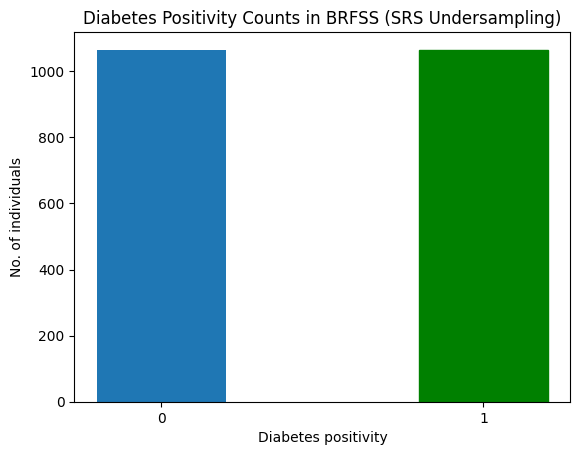

In [259]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Undersampling)")
plt.show()

In [260]:
data_T_y.value_counts()

Y
0    276
1    207
Name: count, dtype: int64

In [261]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

T_train['Y'].value_counts()

# X_T_train_SRS, y_T_train_SRS = SRS_undersampler(T_train, T_train.iloc[:,-1])
# print(y_T_train_SRS)


Y
0    227
1    159
Name: count, dtype: int64

In [262]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (1704, 35)
y_S_train: (1704,)
X_S_test: (426, 35)
y_S_test: (426,)


In [263]:
model_source_SRS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_324"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2268 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2269 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2270 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2271 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2272 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2273 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2274 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - AUC: 0.4988 - loss: 0.6931 - val_AUC: 0.6319 - val_loss: 0.6903
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5971 - loss: 0.6894 - val_AUC: 0.6531 - val_loss: 0.6804
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.6200 - loss: 0.6795 - val_AUC: 0.7167 - val_loss: 0.6451
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6953 - loss: 0.6375 - val_AUC: 0.7958 - val_loss: 0.5816
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7621 - loss: 0.5867 - val_AUC: 0.8234 - val_loss: 0.5422
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7921 - loss: 0.5478 - val_AUC: 0.8322 - val_loss: 0.5240
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8147 - loss: 0.5342 - val_AUC: 0.8359 - val_loss: 0.5227
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8330 - loss: 0.5052 - val_AUC: 0.8479 - val_loss: 0.5285
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8517 - loss:

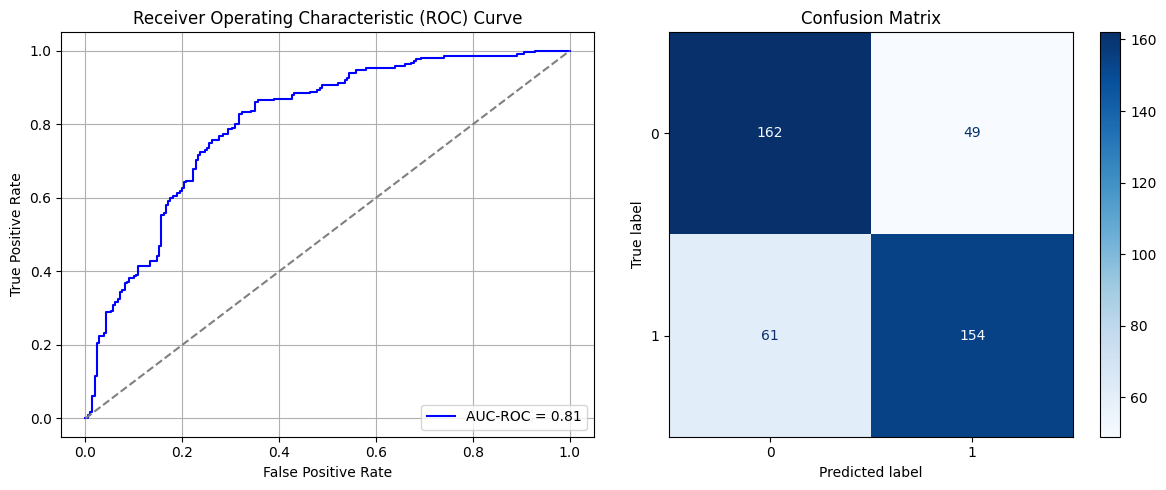

<ipython-input-241-93669339d7ff>:78: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


Best threshold based on F1-score: 0.9392154812812805
Time elapsed (performance): 11.315187557999707


<Sequential name=sequential_324, built=True>

In [264]:
train_and_evaluate(model_source_SRS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
AUC-ROC: 0.5625
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.82      0.63        49
           1       0.55      0.23      0.32        48

    accuracy                           0.53        97
   macro avg       0.53      0.52      0.48        97
weighted avg       0.53      0.53      0.48        97

FPR 0.1836734693877551 TPR: 0.22916666666666663 FNR: 0.7708333333333334 TNR: 0.8163265306122449


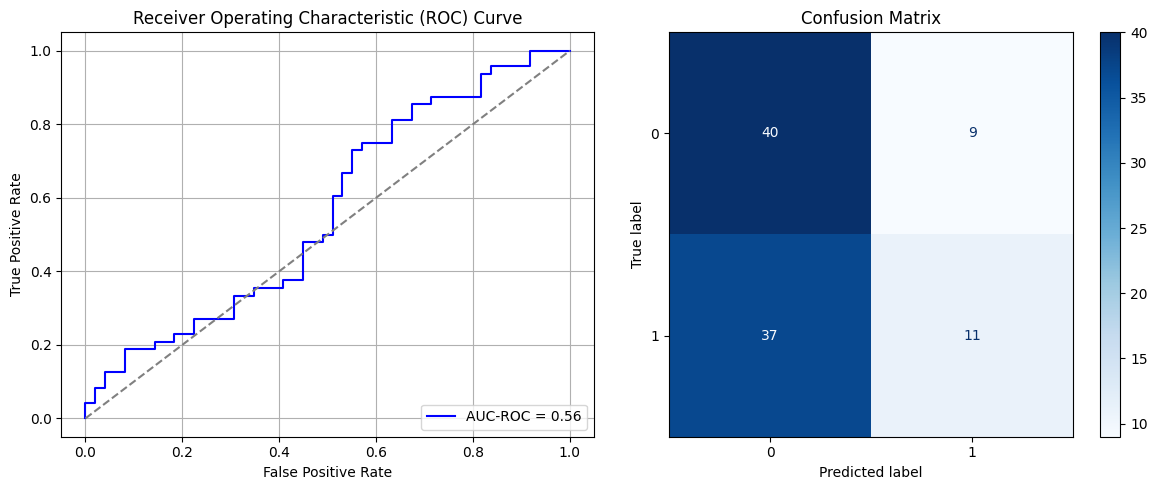

Best threshold based on F1-score: 0.06835474073886871
False Negative Rate: 0.7708333333333334
Time elapsed (performance): 0.5332062279994716


In [265]:
Transductive_TL(model_source_SRS, X_T_test, y_T_test, "Target")

In [266]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_325"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2275 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2276 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2277 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2278 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2279 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2280 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2281 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - AUC: 0.6812 - loss: 0.6720 - val_AUC: 0.5917 - val_loss: 0.6549
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6574 - loss: 0.6679 - val_AUC: 0.5928 - val_loss: 0.6483
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7058 - loss: 0.6235 - val_AUC: 0.5936 - val_loss: 0.6492
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6789 - loss: 0.6334 - val_AUC: 0.5999 - val_loss: 0.6499
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6760 - loss: 0.6285 - val_AUC: 0.6006 - val_loss: 0.6494
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6713 - loss: 0.6418 - val_AUC: 0.6024 - val_loss: 0.6463
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6649 - loss: 0.6432 - val_AUC: 0.6047 - val_loss: 0.6439
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6472 - loss: 0.6528 - val_AUC: 0.6076 - val_loss: 0.6420
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6871 - loss: 0.

(np.float64(0.46938775510204084), np.float64(0.4583333333333333))

In [268]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']


# fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_328"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2296 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2297 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2298 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2299 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2300 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2301 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2302 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 672ms/step - AUC: 0.3829 - loss: 1.1363 - val_AUC: 0.0000e+00 - val_loss: 0.7200
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - AUC: 0.4086 - loss: 1.1512 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - AUC: 0.4253 - loss: 1.0641 - val_AUC: 0.0000e+00 - val_loss: 0.7014
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - AUC: 0.4272 - loss: 1.0523 - val_AUC: 0.0000e+00 - val_loss: 0.6901
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - AUC: 0.4359 - loss: 0.9906 - val_AUC: 0.0000e+00 - val_loss: 0.6807
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - AUC: 0.3980 - loss: 1.0253 - val_AUC: 0.0000e+00 - val_loss: 0.6677
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - AUC: 0.4309 - loss: 0.9947 - val_AUC: 0.0000e+00 - val_loss: 0.6543
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - AUC: 0.4010 - loss: 0.9987 - val_AUC: 0.0000e+00 - val_loss: 0.6428
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - A

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_329"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2303 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2304 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2305 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2306 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2307 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2308 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2309 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 581ms/step - AUC: 0.3805 - loss: 1.1712 - val_AUC: 0.0000e+00 - val_loss: 0.7137
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - AUC: 0.4251 - loss: 1.0836 - val_AUC: 0.0000e+00 - val_loss: 0.6986
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - AUC: 0.4409 - loss: 1.0877 - val_AUC: 0.0000e+00 - val_loss: 0.6890
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - AUC: 0.4109 - loss: 1.0466 - val_AUC: 0.0000e+00 - val_loss: 0.6874
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - AUC: 0.3857 - loss: 1.0551 - val_AUC: 0.0000e+00 - val_loss: 0.6834
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - AUC: 0.3572 - loss: 1.0802 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - AUC: 0.4199 - loss: 0.9883 - val_AUC: 0.0000e+00 - val_loss: 0.6655
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - AUC: 0.4269 - loss: 0.9485 - val_AUC: 0.0000e+00 - val_loss: 0.6556
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - AUC

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_330"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2310 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2311 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2312 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2313 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2314 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2315 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2316 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - AUC: 0.4077 - loss: 1.1573 - val_AUC: 0.0000e+00 - val_loss: 0.7153
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.3844 - loss: 1.1272 - val_AUC: 0.0000e+00 - val_loss: 0.7076
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.3938 - loss: 1.1071 - val_AUC: 0.0000e+00 - val_loss: 0.6944
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.3995 - loss: 1.0684 - val_AUC: 0.0000e+00 - val_loss: 0.6850
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4140 - loss: 1.0324 - val_AUC: 0.0000e+00 - val_loss: 0.6778
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4163 - loss: 1.0193 - val_AUC: 0.0000e+00 - val_loss: 0.6711
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4367 - loss: 0.9706 - val_AUC: 0.0000e+00 - val_loss: 0.6657
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4326 - loss: 0.9658 - val_AUC: 0.0000e+00 - val_loss: 0.6603
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_331"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2317 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2318 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2319 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2320 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2321 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2322 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2323 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 797ms/step - AUC: 0.3920 - loss: 1.1889 - val_AUC: 0.0000e+00 - val_loss: 0.7136
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - AUC: 0.3924 - loss: 1.1549 - val_AUC: 0.0000e+00 - val_loss: 0.7002
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - AUC: 0.4181 - loss: 1.0947 - val_AUC: 0.0000e+00 - val_loss: 0.6946
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - AUC: 0.4044 - loss: 1.0530 - val_AUC: 0.0000e+00 - val_loss: 0.6904
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - AUC: 0.4397 - loss: 1.0102 - val_AUC: 0.0000e+00 - val_loss: 0.6836
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - AUC: 0.4392 - loss: 0.9829 - val_AUC: 0.0000e+00 - val_loss: 0.6744
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - AUC: 0.4230 - loss: 0.9859 - val_AUC: 0.0000e+00 - val_loss: 0.6649
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4081 - loss: 0.9848 - val_AUC: 0.0000e+00 - val_loss: 0.6549
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - A

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_332"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2324 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2325 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2326 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2327 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2328 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2329 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2330 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - AUC: 0.3947 - loss: 1.1543 - val_AUC: 0.0000e+00 - val_loss: 0.7148
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3979 - loss: 1.1689 - val_AUC: 0.0000e+00 - val_loss: 0.7009
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3928 - loss: 1.1064 - val_AUC: 0.0000e+00 - val_loss: 0.6883
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - AUC: 0.4031 - loss: 1.0460 - val_AUC: 0.0000e+00 - val_loss: 0.6739
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4072 - loss: 1.0526 - val_AUC: 0.0000e+00 - val_loss: 0.6605
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4040 - loss: 1.0146 - val_AUC: 0.0000e+00 - val_loss: 0.6484
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4255 - loss: 0.9832 - val_AUC: 0.0000e+00 - val_loss: 0.6356
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - AUC: 0.4092 - loss: 1.0124 - val_AUC: 0.0000e+00 - val_loss: 0.6273
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_333"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2331 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2332 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2333 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2334 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2335 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2336 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2337 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - AUC: 0.3862 - loss: 1.1333 - val_AUC: 0.0000e+00 - val_loss: 0.7205
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - AUC: 0.4168 - loss: 1.1097 - val_AUC: 0.0000e+00 - val_loss: 0.7050
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4137 - loss: 1.0856 - val_AUC: 0.0000e+00 - val_loss: 0.6988
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4117 - loss: 1.0451 - val_AUC: 0.0000e+00 - val_loss: 0.6947
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4086 - loss: 1.0701 - val_AUC: 0.0000e+00 - val_loss: 0.6854
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4233 - loss: 1.0312 - val_AUC: 0.0000e+00 - val_loss: 0.6805
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4484 - loss: 0.9591 - val_AUC: 0.0000e+00 - val_loss: 0.6767
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - AUC: 0.4276 - loss: 1.0074 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - AUC:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_334"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2338 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2339 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2340 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2341 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2342 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2343 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2344 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 443ms/step - AUC: 0.4154 - loss: 1.1689 - val_AUC: 0.0000e+00 - val_loss: 0.7170
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4398 - loss: 1.0803 - val_AUC: 0.0000e+00 - val_loss: 0.7165
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4063 - loss: 1.1149 - val_AUC: 0.0000e+00 - val_loss: 0.7057
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.3690 - loss: 1.1218 - val_AUC: 0.0000e+00 - val_loss: 0.7002
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4066 - loss: 1.0648 - val_AUC: 0.0000e+00 - val_loss: 0.6933
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4245 - loss: 1.0305 - val_AUC: 0.0000e+00 - val_loss: 0.6874
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4194 - loss: 1.0176 - val_AUC: 0.0000e+00 - val_loss: 0.6837
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - AUC: 0.3851 - loss: 1.0182 - val_AUC: 0.0000e+00 - val_loss: 0.6793
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_335"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2345 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2346 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2347 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2348 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2349 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2350 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2351 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - AUC: 0.4293 - loss: 1.1335 - val_AUC: 0.0000e+00 - val_loss: 0.7148
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - AUC: 0.4269 - loss: 1.1325 - val_AUC: 0.0000e+00 - val_loss: 0.7070
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - AUC: 0.3981 - loss: 1.0863 - val_AUC: 0.0000e+00 - val_loss: 0.7081
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - AUC: 0.3735 - loss: 1.1070 - val_AUC: 0.0000e+00 - val_loss: 0.7047
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4343 - loss: 1.0197 - val_AUC: 0.0000e+00 - val_loss: 0.7022
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4023 - loss: 1.0373 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4377 - loss: 0.9914 - val_AUC: 0.0000e+00 - val_loss: 0.6931
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4189 - loss: 0.9833 - val_AUC: 0.0000e+00 - val_loss: 0.6889
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_336"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2352 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2353 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2354 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2355 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2356 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2357 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2358 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - AUC: 0.4279 - loss: 1.1294 - val_AUC: 0.0000e+00 - val_loss: 0.7107
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.3924 - loss: 1.1853 - val_AUC: 0.0000e+00 - val_loss: 0.7108
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4161 - loss: 1.1015 - val_AUC: 0.0000e+00 - val_loss: 0.7135
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4477 - loss: 1.0232 - val_AUC: 0.0000e+00 - val_loss: 0.7105
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4146 - loss: 1.0845 - val_AUC: 0.0000e+00 - val_loss: 0.7040
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4012 - loss: 1.0632 - val_AUC: 0.0000e+00 - val_loss: 0.6965
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4116 - loss: 1.0389 - val_AUC: 0.0000e+00 - val_loss: 0.6905
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4274 - loss: 0.9486 - val_AUC: 0.0000e+00 - val_loss: 0.6840
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_337"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2359 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2360 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2361 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2362 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2363 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2364 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2365 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - AUC: 0.4029 - loss: 1.1587 - val_AUC: 0.0000e+00 - val_loss: 0.7141
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4152 - loss: 1.1520 - val_AUC: 0.0000e+00 - val_loss: 0.7050
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.3972 - loss: 1.1173 - val_AUC: 0.0000e+00 - val_loss: 0.6958
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.3914 - loss: 1.0963 - val_AUC: 0.0000e+00 - val_loss: 0.6886
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.3951 - loss: 1.0292 - val_AUC: 0.0000e+00 - val_loss: 0.6827
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4349 - loss: 0.9895 - val_AUC: 0.0000e+00 - val_loss: 0.6741
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.4505 - loss: 0.9790 - val_AUC: 0.0000e+00 - val_loss: 0.6638
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4175 - loss: 0.9859 - val_AUC: 0.0000e+00 - val_loss: 0.6568
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_338"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2366 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2367 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2368 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2369 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2370 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2371 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2372 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step - AUC: 0.4224 - loss: 1.0965 - val_AUC: 0.0000e+00 - val_loss: 0.7162
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.3987 - loss: 1.1253 - val_AUC: 0.0000e+00 - val_loss: 0.7063
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3979 - loss: 1.0896 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.3791 - loss: 1.0926 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4188 - loss: 1.0294 - val_AUC: 0.0000e+00 - val_loss: 0.6682
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC: 0.4304 - loss: 0.9992 - val_AUC: 0.0000e+00 - val_loss: 0.6530
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4131 - loss: 0.9926 - val_AUC: 0.0000e+00 - val_loss: 0.6396
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4093 - loss: 0.9897 - val_AUC: 0.0000e+00 - val_loss: 0.6280
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_339"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2373 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2374 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2375 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2376 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2377 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2378 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2379 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - AUC: 0.3995 - loss: 1.1292 - val_AUC: 0.0000e+00 - val_loss: 0.7218
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.4269 - loss: 1.1226 - val_AUC: 0.0000e+00 - val_loss: 0.7069
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.4001 - loss: 1.1044 - val_AUC: 0.0000e+00 - val_loss: 0.6969
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4224 - loss: 1.0472 - val_AUC: 0.0000e+00 - val_loss: 0.6886
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4074 - loss: 1.0562 - val_AUC: 0.0000e+00 - val_loss: 0.6795
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4333 - loss: 0.9935 - val_AUC: 0.0000e+00 - val_loss: 0.6711
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4172 - loss: 0.9970 - val_AUC: 0.0000e+00 - val_loss: 0.6637
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4248 - loss: 0.9839 - val_AUC: 0.0000e+00 - val_loss: 0.6600
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_340"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2380 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2381 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2382 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2383 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2384 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2385 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2386 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 662ms/step - AUC: 0.3979 - loss: 1.1588 - val_AUC: 0.0000e+00 - val_loss: 0.7159
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - AUC: 0.4216 - loss: 1.1217 - val_AUC: 0.0000e+00 - val_loss: 0.7020
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4513 - loss: 1.0193 - val_AUC: 0.0000e+00 - val_loss: 0.6932
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4037 - loss: 1.0598 - val_AUC: 0.0000e+00 - val_loss: 0.6838
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4080 - loss: 1.0543 - val_AUC: 0.0000e+00 - val_loss: 0.6739
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4356 - loss: 1.0018 - val_AUC: 0.0000e+00 - val_loss: 0.6652
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.4219 - loss: 0.9993 - val_AUC: 0.0000e+00 - val_loss: 0.6554
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4458 - loss: 0.9492 - val_AUC: 0.0000e+00 - val_loss: 0.6443
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_341"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2387 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2388 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2389 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2390 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2391 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2392 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2393 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - AUC: 0.4205 - loss: 1.1287 - val_AUC: 0.0000e+00 - val_loss: 0.7256
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4221 - loss: 1.1429 - val_AUC: 0.0000e+00 - val_loss: 0.7092
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4217 - loss: 1.0892 - val_AUC: 0.0000e+00 - val_loss: 0.6996
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4228 - loss: 1.0749 - val_AUC: 0.0000e+00 - val_loss: 0.6928
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4124 - loss: 1.0670 - val_AUC: 0.0000e+00 - val_loss: 0.6869
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4186 - loss: 1.0410 - val_AUC: 0.0000e+00 - val_loss: 0.6789
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4024 - loss: 1.0308 - val_AUC: 0.0000e+00 - val_loss: 0.6715
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3866 - loss: 1.0267 - val_AUC: 0.0000e+00 - val_loss: 0.6619
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_342"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2394 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2395 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2396 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2397 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2398 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2399 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2400 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - AUC: 0.4098 - loss: 1.1656 - val_AUC: 0.0000e+00 - val_loss: 0.7155
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4362 - loss: 1.0793 - val_AUC: 0.0000e+00 - val_loss: 0.7116
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.3957 - loss: 1.0847 - val_AUC: 0.0000e+00 - val_loss: 0.7052
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.4127 - loss: 1.0798 - val_AUC: 0.0000e+00 - val_loss: 0.6968
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4306 - loss: 0.9994 - val_AUC: 0.0000e+00 - val_loss: 0.6899
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3807 - loss: 1.0358 - val_AUC: 0.0000e+00 - val_loss: 0.6795
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4399 - loss: 0.9513 - val_AUC: 0.0000e+00 - val_loss: 0.6659
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4010 - loss: 0.9793 - val_AUC: 0.0000e+00 - val_loss: 0.6541
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_343"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2401 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2402 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2403 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2404 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2405 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2406 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2407 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 659ms/step - AUC: 0.4360 - loss: 1.0808 - val_AUC: 0.0000e+00 - val_loss: 0.7251
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - AUC: 0.3959 - loss: 1.1513 - val_AUC: 0.0000e+00 - val_loss: 0.7108
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - AUC: 0.3980 - loss: 1.1408 - val_AUC: 0.0000e+00 - val_loss: 0.6966
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - AUC: 0.4502 - loss: 1.0262 - val_AUC: 0.0000e+00 - val_loss: 0.6869
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - AUC: 0.4070 - loss: 1.0591 - val_AUC: 0.0000e+00 - val_loss: 0.6790
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - AUC: 0.4146 - loss: 1.0117 - val_AUC: 0.0000e+00 - val_loss: 0.6705
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - AUC: 0.4252 - loss: 0.9692 - val_AUC: 0.0000e+00 - val_loss: 0.6593
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - AUC: 0.4176 - loss: 0.9817 - val_AUC: 0.0000e+00 - val_loss: 0.6455
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_344"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2408 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2409 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2410 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2411 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2412 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2413 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2414 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - AUC: 0.4020 - loss: 1.1983 - val_AUC: 0.0000e+00 - val_loss: 0.7170
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - AUC: 0.3762 - loss: 1.1532 - val_AUC: 0.0000e+00 - val_loss: 0.7147
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4138 - loss: 1.0968 - val_AUC: 0.0000e+00 - val_loss: 0.7109
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.3987 - loss: 1.0871 - val_AUC: 0.0000e+00 - val_loss: 0.7038
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4365 - loss: 1.0192 - val_AUC: 0.0000e+00 - val_loss: 0.6974
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4401 - loss: 1.0088 - val_AUC: 0.0000e+00 - val_loss: 0.6882
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.3967 - loss: 1.0043 - val_AUC: 0.0000e+00 - val_loss: 0.6798
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - AUC: 0.4335 - loss: 0.9468 - val_AUC: 0.0000e+00 - val_loss: 0.6710
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_345"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2415 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2416 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2417 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2418 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2419 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2420 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2421 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - AUC: 0.4140 - loss: 1.1974 - val_AUC: 0.0000e+00 - val_loss: 0.7179
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4167 - loss: 1.1444 - val_AUC: 0.0000e+00 - val_loss: 0.7200
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4195 - loss: 1.0998 - val_AUC: 0.0000e+00 - val_loss: 0.7220
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3961 - loss: 1.0667 - val_AUC: 0.0000e+00 - val_loss: 0.7200
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4345 - loss: 1.0406 - val_AUC: 0.0000e+00 - val_loss: 0.7109
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4457 - loss: 1.0018 - val_AUC: 0.0000e+00 - val_loss: 0.7030
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4319 - loss: 0.9861 - val_AUC: 0.0000e+00 - val_loss: 0.6944
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4264 - loss: 0.9869 - val_AUC: 0.0000e+00 - val_loss: 0.6858
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_346"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2422 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2423 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2424 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2425 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2426 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2427 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2428 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - AUC: 0.4549 - loss: 1.1200 - val_AUC: 0.0000e+00 - val_loss: 0.7084
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - AUC: 0.3875 - loss: 1.1560 - val_AUC: 0.0000e+00 - val_loss: 0.7081
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - AUC: 0.4404 - loss: 1.0699 - val_AUC: 0.0000e+00 - val_loss: 0.7001
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - AUC: 0.4195 - loss: 1.0541 - val_AUC: 0.0000e+00 - val_loss: 0.6912
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - AUC: 0.4163 - loss: 1.0628 - val_AUC: 0.0000e+00 - val_loss: 0.6817
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - AUC: 0.4147 - loss: 1.0381 - val_AUC: 0.0000e+00 - val_loss: 0.6728
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - AUC: 0.3951 - loss: 1.0296 - val_AUC: 0.0000e+00 - val_loss: 0.6629
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - AUC: 0.4341 - loss: 0.9515 - val_AUC: 0.0000e+00 - val_loss: 0.6516
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_347"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2429 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2430 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2431 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2432 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2433 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2434 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2435 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - AUC: 0.4152 - loss: 1.1261 - val_AUC: 0.0000e+00 - val_loss: 0.7152
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3883 - loss: 1.1440 - val_AUC: 0.0000e+00 - val_loss: 0.7041
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.4113 - loss: 1.1055 - val_AUC: 0.0000e+00 - val_loss: 0.6964
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4347 - loss: 1.0011 - val_AUC: 0.0000e+00 - val_loss: 0.6914
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4208 - loss: 1.0094 - val_AUC: 0.0000e+00 - val_loss: 0.6813
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4081 - loss: 1.0230 - val_AUC: 0.0000e+00 - val_loss: 0.6688
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC: 0.4074 - loss: 0.9794 - val_AUC: 0.0000e+00 - val_loss: 0.6565
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4432 - loss: 0.9463 - val_AUC: 0.0000e+00 - val_loss: 0.6416
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_348"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2436 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2437 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2438 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2439 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2440 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2441 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2442 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step - AUC: 0.4203 - loss: 1.1069 - val_AUC: 0.0000e+00 - val_loss: 0.7162
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.3893 - loss: 1.1493 - val_AUC: 0.0000e+00 - val_loss: 0.7069
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - AUC: 0.3876 - loss: 1.1256 - val_AUC: 0.0000e+00 - val_loss: 0.7039
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4065 - loss: 1.0770 - val_AUC: 0.0000e+00 - val_loss: 0.7017
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4254 - loss: 1.0192 - val_AUC: 0.0000e+00 - val_loss: 0.6976
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4132 - loss: 1.0278 - val_AUC: 0.0000e+00 - val_loss: 0.6919
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.3943 - loss: 1.0265 - val_AUC: 0.0000e+00 - val_loss: 0.6845
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4538 - loss: 0.9464 - val_AUC: 0.0000e+00 - val_loss: 0.6780
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_349"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2443 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2444 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2445 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2446 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2447 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2448 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2449 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - AUC: 0.4060 - loss: 1.1465 - val_AUC: 0.0000e+00 - val_loss: 0.7163
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - AUC: 0.3935 - loss: 1.1418 - val_AUC: 0.0000e+00 - val_loss: 0.6992
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4154 - loss: 1.1135 - val_AUC: 0.0000e+00 - val_loss: 0.6871
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - AUC: 0.4124 - loss: 1.0511 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - AUC: 0.4023 - loss: 1.0367 - val_AUC: 0.0000e+00 - val_loss: 0.6756
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - AUC: 0.4214 - loss: 1.0367 - val_AUC: 0.0000e+00 - val_loss: 0.6679
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - AUC: 0.4081 - loss: 1.0059 - val_AUC: 0.0000e+00 - val_loss: 0.6639
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - AUC: 0.4297 - loss: 0.9556 - val_AUC: 0.0000e+00 - val_loss: 0.6600
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_350"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2450 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2451 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2452 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2453 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2454 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2455 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2456 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - AUC: 0.3921 - loss: 1.1543 - val_AUC: 0.0000e+00 - val_loss: 0.7170
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4217 - loss: 1.1241 - val_AUC: 0.0000e+00 - val_loss: 0.7017
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4404 - loss: 1.0616 - val_AUC: 0.0000e+00 - val_loss: 0.6955
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4146 - loss: 1.0581 - val_AUC: 0.0000e+00 - val_loss: 0.6900
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.3738 - loss: 1.0694 - val_AUC: 0.0000e+00 - val_loss: 0.6777
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4518 - loss: 0.9746 - val_AUC: 0.0000e+00 - val_loss: 0.6652
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4090 - loss: 1.0361 - val_AUC: 0.0000e+00 - val_loss: 0.6534
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3814 - loss: 1.0547 - val_AUC: 0.0000e+00 - val_loss: 0.6461
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_351"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2457 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2458 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2459 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2460 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2461 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2462 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2463 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - AUC: 0.4029 - loss: 1.1697 - val_AUC: 0.0000e+00 - val_loss: 0.7138
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.3769 - loss: 1.1599 - val_AUC: 0.0000e+00 - val_loss: 0.7042
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.3953 - loss: 1.1400 - val_AUC: 0.0000e+00 - val_loss: 0.6975
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4169 - loss: 1.0714 - val_AUC: 0.0000e+00 - val_loss: 0.6936
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.4023 - loss: 1.0190 - val_AUC: 0.0000e+00 - val_loss: 0.6878
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4068 - loss: 1.0335 - val_AUC: 0.0000e+00 - val_loss: 0.6808
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4041 - loss: 1.0036 - val_AUC: 0.0000e+00 - val_loss: 0.6735
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.4757 - loss: 0.9074 - val_AUC: 0.0000e+00 - val_loss: 0.6667
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - AUC:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_352"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2464 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2465 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2466 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2467 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2468 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2469 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2470 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - AUC: 0.4025 - loss: 1.2032 - val_AUC: 0.0000e+00 - val_loss: 0.7198
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3911 - loss: 1.1319 - val_AUC: 0.0000e+00 - val_loss: 0.7187
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4735 - loss: 0.9784 - val_AUC: 0.0000e+00 - val_loss: 0.7198
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.3932 - loss: 1.0708 - val_AUC: 0.0000e+00 - val_loss: 0.7158
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.4355 - loss: 1.0062 - val_AUC: 0.0000e+00 - val_loss: 0.7124
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4556 - loss: 0.9924 - val_AUC: 0.0000e+00 - val_loss: 0.7062
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4297 - loss: 0.9796 - val_AUC: 0.0000e+00 - val_loss: 0.7016
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3664 - loss: 1.0316 - val_AUC: 0.0000e+00 - val_loss: 0.6944
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_353"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2471 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2472 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2473 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2474 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2475 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2476 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2477 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - AUC: 0.4265 - loss: 1.1306 - val_AUC: 0.0000e+00 - val_loss: 0.7125
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - AUC: 0.3910 - loss: 1.1592 - val_AUC: 0.0000e+00 - val_loss: 0.7042
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - AUC: 0.4063 - loss: 1.1047 - val_AUC: 0.0000e+00 - val_loss: 0.6916
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4059 - loss: 1.0642 - val_AUC: 0.0000e+00 - val_loss: 0.6790
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4153 - loss: 1.0323 - val_AUC: 0.0000e+00 - val_loss: 0.6670
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4218 - loss: 1.0218 - val_AUC: 0.0000e+00 - val_loss: 0.6537
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4199 - loss: 0.9772 - val_AUC: 0.0000e+00 - val_loss: 0.6423
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4091 - loss: 0.9951 - val_AUC: 0.0000e+00 - val_loss: 0.6315
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_354"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2478 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2479 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2480 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2481 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2482 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2483 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2484 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - AUC: 0.4316 - loss: 1.1640 - val_AUC: 0.0000e+00 - val_loss: 0.7149
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.3791 - loss: 1.1503 - val_AUC: 0.0000e+00 - val_loss: 0.7112
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.4152 - loss: 1.0662 - val_AUC: 0.0000e+00 - val_loss: 0.6997
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.4253 - loss: 1.0419 - val_AUC: 0.0000e+00 - val_loss: 0.6884
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.4060 - loss: 1.0545 - val_AUC: 0.0000e+00 - val_loss: 0.6785
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4023 - loss: 1.0312 - val_AUC: 0.0000e+00 - val_loss: 0.6698
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4317 - loss: 0.9726 - val_AUC: 0.0000e+00 - val_loss: 0.6610
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4237 - loss: 0.9631 - val_AUC: 0.0000e+00 - val_loss: 0.6525
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_355"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2485 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2486 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2487 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2488 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2489 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2490 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2491 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - AUC: 0.4108 - loss: 1.1451 - val_AUC: 0.0000e+00 - val_loss: 0.7131
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - AUC: 0.4022 - loss: 1.1323 - val_AUC: 0.0000e+00 - val_loss: 0.7087
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4340 - loss: 1.0663 - val_AUC: 0.0000e+00 - val_loss: 0.7009
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4223 - loss: 1.0757 - val_AUC: 0.0000e+00 - val_loss: 0.6926
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4453 - loss: 1.0325 - val_AUC: 0.0000e+00 - val_loss: 0.6884
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4264 - loss: 0.9970 - val_AUC: 0.0000e+00 - val_loss: 0.6850
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4298 - loss: 0.9693 - val_AUC: 0.0000e+00 - val_loss: 0.6769
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC: 0.4517 - loss: 0.9109 - val_AUC: 0.0000e+00 - val_loss: 0.6680
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_356"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2492 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2493 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2494 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2495 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2496 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2497 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2498 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - AUC: 0.4285 - loss: 1.1086 - val_AUC: 0.0000e+00 - val_loss: 0.7176
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - AUC: 0.3931 - loss: 1.1192 - val_AUC: 0.0000e+00 - val_loss: 0.7060
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4057 - loss: 1.1193 - val_AUC: 0.0000e+00 - val_loss: 0.6907
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3918 - loss: 1.1039 - val_AUC: 0.0000e+00 - val_loss: 0.6834
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4152 - loss: 1.0437 - val_AUC: 0.0000e+00 - val_loss: 0.6743
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3934 - loss: 1.0790 - val_AUC: 0.0000e+00 - val_loss: 0.6668
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4002 - loss: 1.0383 - val_AUC: 0.0000e+00 - val_loss: 0.6630
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4315 - loss: 0.9884 - val_AUC: 0.0000e+00 - val_loss: 0.6585
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_357"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2499 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2500 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2501 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2502 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2503 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2504 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2505 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - AUC: 0.3935 - loss: 1.1445 - val_AUC: 0.0000e+00 - val_loss: 0.7141
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.3844 - loss: 1.1266 - val_AUC: 0.0000e+00 - val_loss: 0.7044
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4261 - loss: 1.0551 - val_AUC: 0.0000e+00 - val_loss: 0.6931
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4080 - loss: 1.0922 - val_AUC: 0.0000e+00 - val_loss: 0.6829
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4482 - loss: 1.0010 - val_AUC: 0.0000e+00 - val_loss: 0.6780
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - AUC: 0.4012 - loss: 1.0580 - val_AUC: 0.0000e+00 - val_loss: 0.6755
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - AUC: 0.4200 - loss: 0.9965 - val_AUC: 0.0000e+00 - val_loss: 0.6746
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 0.4115 - loss: 0.9895 - val_AUC: 0.0000e+00 - val_loss: 0.6728
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_358"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2506 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2507 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2508 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2509 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2510 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2511 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2512 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - AUC: 0.3918 - loss: 1.2021 - val_AUC: 0.0000e+00 - val_loss: 0.7162
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.4065 - loss: 1.1253 - val_AUC: 0.0000e+00 - val_loss: 0.7063
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4397 - loss: 1.0459 - val_AUC: 0.0000e+00 - val_loss: 0.6905
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4182 - loss: 1.0705 - val_AUC: 0.0000e+00 - val_loss: 0.6770
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.3943 - loss: 1.0817 - val_AUC: 0.0000e+00 - val_loss: 0.6682
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4343 - loss: 0.9885 - val_AUC: 0.0000e+00 - val_loss: 0.6598
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.3972 - loss: 1.0543 - val_AUC: 0.0000e+00 - val_loss: 0.6521
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4349 - loss: 0.9518 - val_AUC: 0.0000e+00 - val_loss: 0.6489
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_359"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2513 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2514 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2515 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2516 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2517 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2518 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2519 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 669ms/step - AUC: 0.4102 - loss: 1.1515 - val_AUC: 0.0000e+00 - val_loss: 0.7140
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - AUC: 0.3884 - loss: 1.1843 - val_AUC: 0.0000e+00 - val_loss: 0.7045
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3737 - loss: 1.1264 - val_AUC: 0.0000e+00 - val_loss: 0.7016
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4026 - loss: 1.1169 - val_AUC: 0.0000e+00 - val_loss: 0.6970
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4302 - loss: 1.0384 - val_AUC: 0.0000e+00 - val_loss: 0.6962
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4266 - loss: 1.0392 - val_AUC: 0.0000e+00 - val_loss: 0.6953
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.4146 - loss: 0.9973 - val_AUC: 0.0000e+00 - val_loss: 0.6942
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4202 - loss: 0.9855 - val_AUC: 0.0000e+00 - val_loss: 0.6923
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_360"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2520 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2521 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2522 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2523 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2524 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2525 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2526 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - AUC: 0.3844 - loss: 1.1671 - val_AUC: 0.0000e+00 - val_loss: 0.7142
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.4175 - loss: 1.1294 - val_AUC: 0.0000e+00 - val_loss: 0.6999
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4071 - loss: 1.1132 - val_AUC: 0.0000e+00 - val_loss: 0.6911
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.4170 - loss: 1.0806 - val_AUC: 0.0000e+00 - val_loss: 0.6788
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4275 - loss: 1.0218 - val_AUC: 0.0000e+00 - val_loss: 0.6637
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3996 - loss: 1.0270 - val_AUC: 0.0000e+00 - val_loss: 0.6481
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.4154 - loss: 1.0045 - val_AUC: 0.0000e+00 - val_loss: 0.6343
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4128 - loss: 0.9885 - val_AUC: 0.0000e+00 - val_loss: 0.6205
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_361"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2527 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2528 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2529 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2530 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2531 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2532 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2533 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - AUC: 0.4071 - loss: 1.1717 - val_AUC: 0.0000e+00 - val_loss: 0.7139
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.3918 - loss: 1.1599 - val_AUC: 0.0000e+00 - val_loss: 0.7144
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4008 - loss: 1.1283 - val_AUC: 0.0000e+00 - val_loss: 0.7086
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - AUC: 0.3919 - loss: 1.1170 - val_AUC: 0.0000e+00 - val_loss: 0.7044
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4090 - loss: 1.0226 - val_AUC: 0.0000e+00 - val_loss: 0.7039
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - AUC: 0.4268 - loss: 1.0184 - val_AUC: 0.0000e+00 - val_loss: 0.6964
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4313 - loss: 0.9904 - val_AUC: 0.0000e+00 - val_loss: 0.6860
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - AUC: 0.3952 - loss: 1.0186 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_362"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2534 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2535 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2536 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2537 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2538 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2539 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2540 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 613ms/step - AUC: 0.4110 - loss: 1.1392 - val_AUC: 0.0000e+00 - val_loss: 0.7287
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - AUC: 0.4163 - loss: 1.0757 - val_AUC: 0.0000e+00 - val_loss: 0.7108
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - AUC: 0.3951 - loss: 1.1426 - val_AUC: 0.0000e+00 - val_loss: 0.6953
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4397 - loss: 1.0231 - val_AUC: 0.0000e+00 - val_loss: 0.6839
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4298 - loss: 1.0438 - val_AUC: 0.0000e+00 - val_loss: 0.6719
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4450 - loss: 0.9792 - val_AUC: 0.0000e+00 - val_loss: 0.6587
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.3900 - loss: 1.0255 - val_AUC: 0.0000e+00 - val_loss: 0.6449
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4329 - loss: 0.9769 - val_AUC: 0.0000e+00 - val_loss: 0.6318
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_363"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2541 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2542 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2543 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2544 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2545 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2546 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2547 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - AUC: 0.4325 - loss: 1.1213 - val_AUC: 0.0000e+00 - val_loss: 0.7149
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3984 - loss: 1.1731 - val_AUC: 0.0000e+00 - val_loss: 0.7067
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.3856 - loss: 1.1098 - val_AUC: 0.0000e+00 - val_loss: 0.7035
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4434 - loss: 1.0532 - val_AUC: 0.0000e+00 - val_loss: 0.6962
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC: 0.4039 - loss: 1.0856 - val_AUC: 0.0000e+00 - val_loss: 0.6916
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4306 - loss: 1.0019 - val_AUC: 0.0000e+00 - val_loss: 0.6869
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4317 - loss: 1.0016 - val_AUC: 0.0000e+00 - val_loss: 0.6801
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4091 - loss: 1.0016 - val_AUC: 0.0000e+00 - val_loss: 0.6742
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_364"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2548 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2549 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2550 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2551 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2552 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2553 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2554 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - AUC: 0.3899 - loss: 1.1792 - val_AUC: 0.0000e+00 - val_loss: 0.7145
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.3890 - loss: 1.1343 - val_AUC: 0.0000e+00 - val_loss: 0.6985
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4065 - loss: 1.1039 - val_AUC: 0.0000e+00 - val_loss: 0.6807
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - AUC: 0.4224 - loss: 1.0392 - val_AUC: 0.0000e+00 - val_loss: 0.6670
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - AUC: 0.4117 - loss: 1.0376 - val_AUC: 0.0000e+00 - val_loss: 0.6559
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.3996 - loss: 1.0533 - val_AUC: 0.0000e+00 - val_loss: 0.6477
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - AUC: 0.3927 - loss: 0.9939 - val_AUC: 0.0000e+00 - val_loss: 0.6425
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4492 - loss: 0.9473 - val_AUC: 0.0000e+00 - val_loss: 0.6359
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_365"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2555 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2556 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2557 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2558 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2559 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2560 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2561 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - AUC: 0.4119 - loss: 1.1723 - val_AUC: 0.0000e+00 - val_loss: 0.7150
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - AUC: 0.4390 - loss: 1.0914 - val_AUC: 0.0000e+00 - val_loss: 0.7095
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.4052 - loss: 1.0973 - val_AUC: 0.0000e+00 - val_loss: 0.7057
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.3929 - loss: 1.0886 - val_AUC: 0.0000e+00 - val_loss: 0.7004
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4447 - loss: 1.0342 - val_AUC: 0.0000e+00 - val_loss: 0.6924
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4421 - loss: 1.0086 - val_AUC: 0.0000e+00 - val_loss: 0.6872
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4233 - loss: 0.9926 - val_AUC: 0.0000e+00 - val_loss: 0.6830
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.4284 - loss: 0.9864 - val_AUC: 0.0000e+00 - val_loss: 0.6779
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_366"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2562 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2563 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2564 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2565 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2566 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2567 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2568 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - AUC: 0.4058 - loss: 1.1680 - val_AUC: 0.0000e+00 - val_loss: 0.7144
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4021 - loss: 1.1379 - val_AUC: 0.0000e+00 - val_loss: 0.6974
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4173 - loss: 1.0919 - val_AUC: 0.0000e+00 - val_loss: 0.6833
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4088 - loss: 1.0803 - val_AUC: 0.0000e+00 - val_loss: 0.6755
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - AUC: 0.4101 - loss: 1.0287 - val_AUC: 0.0000e+00 - val_loss: 0.6668
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4306 - loss: 0.9694 - val_AUC: 0.0000e+00 - val_loss: 0.6592
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3995 - loss: 1.0009 - val_AUC: 0.0000e+00 - val_loss: 0.6483
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.4159 - loss: 0.9677 - val_AUC: 0.0000e+00 - val_loss: 0.6376
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_367"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2569 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2570 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2571 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2572 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2573 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2574 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2575 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 388ms/step - AUC: 0.3738 - loss: 1.1614 - val_AUC: 0.0000e+00 - val_loss: 0.7165
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC: 0.4200 - loss: 1.1237 - val_AUC: 0.0000e+00 - val_loss: 0.7012
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.4015 - loss: 1.1189 - val_AUC: 0.0000e+00 - val_loss: 0.6889
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4239 - loss: 1.0438 - val_AUC: 0.0000e+00 - val_loss: 0.6764
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.3934 - loss: 1.0788 - val_AUC: 0.0000e+00 - val_loss: 0.6651
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4137 - loss: 1.0173 - val_AUC: 0.0000e+00 - val_loss: 0.6541
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - AUC: 0.4011 - loss: 1.0242 - val_AUC: 0.0000e+00 - val_loss: 0.6425
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - AUC: 0.4494 - loss: 0.9354 - val_AUC: 0.0000e+00 - val_loss: 0.6354
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_368"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2576 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2577 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2578 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2579 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2580 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2581 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2582 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - AUC: 0.4125 - loss: 1.1733 - val_AUC: 0.0000e+00 - val_loss: 0.7153
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - AUC: 0.3678 - loss: 1.1776 - val_AUC: 0.0000e+00 - val_loss: 0.7135
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4041 - loss: 1.1063 - val_AUC: 0.0000e+00 - val_loss: 0.7037
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.3893 - loss: 1.1094 - val_AUC: 0.0000e+00 - val_loss: 0.6926
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - AUC: 0.3889 - loss: 1.0881 - val_AUC: 0.0000e+00 - val_loss: 0.6821
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4262 - loss: 1.0410 - val_AUC: 0.0000e+00 - val_loss: 0.6718
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.3860 - loss: 1.0553 - val_AUC: 0.0000e+00 - val_loss: 0.6617
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - AUC: 0.4205 - loss: 0.9811 - val_AUC: 0.0000e+00 - val_loss: 0.6500
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - AUC

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_369"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2583 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2584 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2585 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2586 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2587 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2588 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2589 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - AUC: 0.3876 - loss: 1.1761 - val_AUC: 0.0000e+00 - val_loss: 0.7160
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - AUC: 0.4210 - loss: 1.1420 - val_AUC: 0.0000e+00 - val_loss: 0.7123
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4329 - loss: 1.0818 - val_AUC: 0.0000e+00 - val_loss: 0.7138
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4102 - loss: 1.0799 - val_AUC: 0.0000e+00 - val_loss: 0.7084
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - AUC: 0.4386 - loss: 1.0202 - val_AUC: 0.0000e+00 - val_loss: 0.7005
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4395 - loss: 0.9915 - val_AUC: 0.0000e+00 - val_loss: 0.6926
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3679 - loss: 1.0672 - val_AUC: 0.0000e+00 - val_loss: 0.6843
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.3960 - loss: 1.0363 - val_AUC: 0.0000e+00 - val_loss: 0.6761
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_370"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2590 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2591 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2592 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2593 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2594 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2595 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2596 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - AUC: 0.3979 - loss: 1.1714 - val_AUC: 0.0000e+00 - val_loss: 0.7144
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4079 - loss: 1.1343 - val_AUC: 0.0000e+00 - val_loss: 0.7088
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4265 - loss: 1.0701 - val_AUC: 0.0000e+00 - val_loss: 0.7059
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4010 - loss: 1.0785 - val_AUC: 0.0000e+00 - val_loss: 0.7003
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4138 - loss: 1.0399 - val_AUC: 0.0000e+00 - val_loss: 0.6904
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 0.4045 - loss: 1.0373 - val_AUC: 0.0000e+00 - val_loss: 0.6797
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4269 - loss: 0.9925 - val_AUC: 0.0000e+00 - val_loss: 0.6663
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - AUC: 0.4227 - loss: 0.9770 - val_AUC: 0.0000e+00 - val_loss: 0.6568
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_371"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2597 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2598 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2599 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2600 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2601 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2602 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2603 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 601ms/step - AUC: 0.3735 - loss: 1.2134 - val_AUC: 0.0000e+00 - val_loss: 0.7144
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - AUC: 0.3918 - loss: 1.1614 - val_AUC: 0.0000e+00 - val_loss: 0.7012
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - AUC: 0.4335 - loss: 1.1077 - val_AUC: 0.0000e+00 - val_loss: 0.6892
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - AUC: 0.4194 - loss: 1.0552 - val_AUC: 0.0000e+00 - val_loss: 0.6858
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - AUC: 0.4280 - loss: 1.0205 - val_AUC: 0.0000e+00 - val_loss: 0.6832
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - AUC: 0.4144 - loss: 1.0244 - val_AUC: 0.0000e+00 - val_loss: 0.6773
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4102 - loss: 1.0166 - val_AUC: 0.0000e+00 - val_loss: 0.6664
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - AUC: 0.4244 - loss: 0.9601 - val_AUC: 0.0000e+00 - val_loss: 0.6553
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AU

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_372"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2604 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2605 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2606 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2607 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2608 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2609 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2610 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - AUC: 0.4244 - loss: 1.1478 - val_AUC: 0.0000e+00 - val_loss: 0.7145
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - AUC: 0.3793 - loss: 1.1920 - val_AUC: 0.0000e+00 - val_loss: 0.7054
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.4109 - loss: 1.0934 - val_AUC: 0.0000e+00 - val_loss: 0.7008
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4228 - loss: 1.0915 - val_AUC: 0.0000e+00 - val_loss: 0.6914
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4283 - loss: 1.0190 - val_AUC: 0.0000e+00 - val_loss: 0.6877
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4254 - loss: 1.0254 - val_AUC: 0.0000e+00 - val_loss: 0.6824
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4221 - loss: 1.0077 - val_AUC: 0.0000e+00 - val_loss: 0.6765
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4509 - loss: 0.9302 - val_AUC: 0.0000e+00 - val_loss: 0.6699
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_373"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2611 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2612 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2613 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2614 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2615 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2616 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2617 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - AUC: 0.4209 - loss: 1.1497 - val_AUC: 0.0000e+00 - val_loss: 0.7118
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4205 - loss: 1.1069 - val_AUC: 0.0000e+00 - val_loss: 0.7101
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.4404 - loss: 1.0696 - val_AUC: 0.0000e+00 - val_loss: 0.7005
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4001 - loss: 1.0952 - val_AUC: 0.0000e+00 - val_loss: 0.6925
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.3944 - loss: 1.0445 - val_AUC: 0.0000e+00 - val_loss: 0.6821
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4302 - loss: 1.0175 - val_AUC: 0.0000e+00 - val_loss: 0.6714
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3750 - loss: 1.0470 - val_AUC: 0.0000e+00 - val_loss: 0.6599
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.4416 - loss: 0.9554 - val_AUC: 0.0000e+00 - val_loss: 0.6493
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_374"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2618 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2619 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2620 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2621 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2622 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2623 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2624 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - AUC: 0.3959 - loss: 1.1673 - val_AUC: 0.0000e+00 - val_loss: 0.7157
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - AUC: 0.3993 - loss: 1.1034 - val_AUC: 0.0000e+00 - val_loss: 0.7100
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - AUC: 0.3921 - loss: 1.1356 - val_AUC: 0.0000e+00 - val_loss: 0.7043
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - AUC: 0.4068 - loss: 1.0397 - val_AUC: 0.0000e+00 - val_loss: 0.7011
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - AUC: 0.4155 - loss: 1.0488 - val_AUC: 0.0000e+00 - val_loss: 0.6928
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - AUC: 0.4139 - loss: 1.0175 - val_AUC: 0.0000e+00 - val_loss: 0.6858
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - AUC: 0.3977 - loss: 1.0199 - val_AUC: 0.0000e+00 - val_loss: 0.6757
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - AUC: 0.4457 - loss: 0.9272 - val_AUC: 0.0000e+00 - val_loss: 0.6669
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_375"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2625 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2626 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2627 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2628 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2629 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2630 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2631 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - AUC: 0.4189 - loss: 1.1226 - val_AUC: 0.0000e+00 - val_loss: 0.7226
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.3993 - loss: 1.1153 - val_AUC: 0.0000e+00 - val_loss: 0.7065
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - AUC: 0.4132 - loss: 1.1012 - val_AUC: 0.0000e+00 - val_loss: 0.6973
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - AUC: 0.3904 - loss: 1.1324 - val_AUC: 0.0000e+00 - val_loss: 0.6895
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.3943 - loss: 1.0751 - val_AUC: 0.0000e+00 - val_loss: 0.6820
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3991 - loss: 1.0220 - val_AUC: 0.0000e+00 - val_loss: 0.6723
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.4002 - loss: 1.0351 - val_AUC: 0.0000e+00 - val_loss: 0.6591
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - AUC: 0.3906 - loss: 1.0350 - val_AUC: 0.0000e+00 - val_loss: 0.6491
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_376"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2632 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2633 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2634 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2635 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2636 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2637 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2638 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - AUC: 0.4258 - loss: 1.1518 - val_AUC: 0.0000e+00 - val_loss: 0.7150
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - AUC: 0.4462 - loss: 1.0295 - val_AUC: 0.0000e+00 - val_loss: 0.7091
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4187 - loss: 1.0977 - val_AUC: 0.0000e+00 - val_loss: 0.7004
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - AUC: 0.4020 - loss: 1.0725 - val_AUC: 0.0000e+00 - val_loss: 0.6932
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.4150 - loss: 1.0442 - val_AUC: 0.0000e+00 - val_loss: 0.6861
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 0.4146 - loss: 1.0136 - val_AUC: 0.0000e+00 - val_loss: 0.6796
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - AUC: 0.3971 - loss: 1.0212 - val_AUC: 0.0000e+00 - val_loss: 0.6714
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - AUC: 0.3910 - loss: 0.9983 - val_AUC: 0.0000e+00 - val_loss: 0.6645
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - AUC: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_377"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2639 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2640 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2641 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2642 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2643 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2644 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2645 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - AUC: 0.4368 - loss: 1.1206 - val_AUC: 0.0000e+00 - val_loss: 0.7122
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - AUC: 0.4108 - loss: 1.1187 - val_AUC: 0.0000e+00 - val_loss: 0.7074
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - AUC: 0.4152 - loss: 1.1143 - val_AUC: 0.0000e+00 - val_loss: 0.7004
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - AUC: 0.3878 - loss: 1.0900 - val_AUC: 0.0000e+00 - val_loss: 0.6975
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - AUC: 0.4061 - loss: 1.0567 - val_AUC: 0.0000e+00 - val_loss: 0.6935
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - AUC: 0.4046 - loss: 1.0328 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - AUC: 0.4018 - loss: 1.0116 - val_AUC: 0.0000e+00 - val_loss: 0.6845
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - AUC: 0.4053 - loss: 0.9818 - val_AUC: 0.0000e+00 - val_loss: 0.6790
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step -

In [269]:
print(ParamFit)
ParamFit.to_csv('SRS_Fine_Tuning.csv')

         FPR       FNR
0   0.306122  0.666667
1   0.285714  0.687500
2   0.285714  0.708333
3   0.285714  0.666667
4   0.326531  0.645833
5   0.265306  0.708333
6   0.265306  0.708333
7   0.265306  0.729167
8   0.265306  0.708333
9   0.346939  0.645833
10  0.346939  0.645833
11  0.285714  0.708333
12  0.326531  0.645833
13  0.285714  0.666667
14  0.285714  0.666667
15  0.346939  0.645833
16  0.306122  0.666667
17  0.265306  0.708333
18  0.285714  0.666667
19  0.346939  0.645833
20  0.285714  0.708333
21  0.285714  0.687500
22  0.285714  0.687500
23  0.285714  0.708333
24  0.265306  0.729167
25  0.326531  0.645833
26  0.326531  0.645833
27  0.285714  0.687500
28  0.285714  0.708333
29  0.285714  0.708333
30  0.346939  0.645833
31  0.244898  0.750000
32  0.387755  0.645833
33  0.285714  0.666667
34  0.346939  0.645833
35  0.285714  0.666667
36  0.346939  0.645833
37  0.265306  0.708333
38  0.326531  0.645833
39  0.346939  0.645833
40  0.346939  0.645833
41  0.265306  0.708333
42  0.28571

## Simple Random Sampling with Replacement:

In [270]:
data_S_full

0         1         2         3    4    5         6         7  \
0     0.0  0.285714  0.555556  0.013858  1.0  0.0  0.000000  0.418605   
1     0.0  0.250000  0.111111  0.925989  1.0  0.0  0.000000  0.000000   
2     0.0  0.000000  0.555556  0.907512  1.0  0.0  0.000000  0.837209   
3     0.0  0.285714  0.222222  0.978108  1.0  0.0  0.000000  0.860465   
4     0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.418605   
...   ...       ...       ...       ...  ...  ...       ...       ...   
3936  0.0  0.000000  0.666667  0.978108  1.0  0.0  0.000000  0.000000   
3937  0.0  0.000000  0.222222  0.978108  1.0  0.0  0.962963  0.000000   
3938  0.0  0.000000  0.111111  0.950693  1.0  0.0  0.000000  0.837209   
3939  0.0  0.000000  0.111111  0.915244  1.0  0.0  0.000000  0.837209   
3940  0.0  0.160714  0.111111  0.978108  1.0  0.0  0.194444  0.860465   

             8         9  ...   26        27        28    29        30   31  \
0     0.255814  0.025773  ...  0.0  0.000000  0.000000  0.00  0.000000  0.0   
1     0.046512  0.015464  ...  0.0  0.260870  0.181818  0.30  0.735897  0.0   
2     0.837209  0.046392  ...  0.0  0.260870  0.000000  0.00  0.000000  0.0   
3     0.837209  0.025773  ...  0.0  0.260870  0.303030  0.25  0.667692  0.0   
4     0.860465  0.036082  ...  0.0  0.347826  0.242424  0.40  0.772423  0.0   
...        ...       ...  ...  ...       ...       ...   ...       ...  ...   
3936  0.000000  0.025773  ...  0.0  0.260870  0.242424  0.25  0.682051  0.0   
3937  0.000000  0.046392  ...  0.0  0.260870  0.181818  0.10  0.592308  0.0   
3938  0.837209  0.046392  ...  0.0  0.347826  0.272727  0.05  0.726923  0.0   
3939  0.837209  0.036082  ...  0.0  0.217391  0.181818  0.25  0.646154  0.0   
3940  0.837209  0.025773  ...  0.0  0.260870  0.181818  0.30  0.700000  0.0   

            32        33        34  Y2  
0     0.372093  0.488889  0.766182   1  
1     0.732558  0.111111  0.640687   0  
2     0.372093  0.488889  0.766182   1  
3     0.209302  0.000000  0.124174   1  
4     0.918605  0.800000  0.000000   0  
...        ...       ...       ...  ..  
3936  0.918605  0.800000  0.000000   1  
3937  0.406977  0.311111  0.803170   1  
3938  0.732558  0.111111  0.640687   0  
3939  0.209302  0.000000  0.124174   0  
3940  0.593023  1.000000  0.311757   0  

[3941 rows x 36 columns]

In [271]:
data_T_full

0         1         2         3    4         5    6         7  \
0    0.2  0.678571  0.111111  0.801466  0.0  0.000000  0.0  0.837209   
1    0.2  0.678571  0.111111  1.000000  0.0  0.428571  0.0  0.837209   
2    0.0  0.303571  0.111111  0.801466  0.0  0.000000  0.0  0.418605   
3    0.0  0.000000  0.111111  1.000000  0.0  0.000000  0.0  0.023256   
4    0.6  0.678571  0.111111  1.000000  0.0  0.000000  0.0  0.418605   
..   ...       ...       ...       ...  ...       ...  ...       ...   
478  0.0  0.678571  0.222222  0.801466  0.0  0.000000  0.0  0.837209   
479  0.2  0.000000  0.111111  1.000000  0.0  0.000000  0.0  0.837209   
480  0.0  0.678571  0.111111  1.000000  0.0  0.000000  0.0  0.860465   
481  0.2  0.678571  0.111111  1.000000  0.0  0.000000  0.0  0.837209   
482  0.2  0.750000  0.111111  1.000000  0.0  0.000000  0.0  0.837209   

            8         9  ...   26        27        28    29        30  \
0    0.860465  0.046392  ...  0.0  0.260870  0.181818  0.30  0.700000   
1    0.837209  0.046392  ...  0.0  0.217391  0.515152  0.25  0.619231   
2    0.000000  0.046392  ...  0.0  0.260870  0.242424  0.30  0.774038   
3    0.837209  0.015464  ...  0.0  0.217391  0.272727  0.25  0.723077   
4    0.418605  0.046392  ...  0.0  0.217391  0.151515  0.25  0.624615   
..        ...       ...  ...  ...       ...       ...   ...       ...   
478  0.837209  0.046392  ...  0.0  0.260870  0.242424  0.30  0.841346   
479  0.837209  0.046392  ...  0.0  0.217391  0.181818  0.25  0.547436   
480  0.860465  0.025773  ...  0.0  0.217391  0.303030  0.15  0.574359   
481  0.837209  0.030928  ...  0.0  0.217391  0.363636  0.15  0.717949   
482  0.837209  0.020619  ...  0.0  0.217391  0.181818  0.25  0.771795   

           31        32        33        34  Y  
0    0.000000  0.732558  0.111111  0.640687  0  
1    0.416667  1.000000  0.244444  0.414795  0  
2    0.000000  0.558140  0.288889  0.772787  0  
3    0.000000  0.732558  0.111111  0.640687  0  
4    0.000000  0.000000  0.755556  0.578600  0  
..        ...       ...       ...       ... ..  
478  0.000000  0.558140  0.288889  0.772787  0  
479  0.000000  0.372093  0.488889  0.766182  1  
480  0.000000  0.406977  0.311111  0.803170  0  
481  0.000000  0.209302  0.000000  0.124174  1  
482  0.000000  0.732558  0.111111  0.640687  0  

[483 rows x 36 columns]

In [272]:
X_S_SRSwR, y_S_SRSwR = SRSwR_undersampler(data_S_full, data_S_full.iloc[:,-1])
print(X_S_SRSwR)

1065
2876
       0         1         2         3    4         5         6         7   \
1869  0.0  0.000000  0.555556  0.925989  1.0  0.000000  0.000000  0.418605   
1569  0.0  0.750000  0.111111  0.978108  1.0  0.000000  0.000000  0.000000   
2437  0.0  0.000000  0.111111  0.915244  1.0  0.000000  0.000000  0.000000   
2970  0.0  0.678571  0.111111  0.909018  1.0  0.000000  0.000000  0.837209   
1603  0.0  0.000000  0.111111  0.915244  1.0  0.000000  0.000000  0.837209   
...   ...       ...       ...       ...  ...       ...       ...       ...   
3927  0.0  0.000000  0.111111  0.907512  1.0  0.000000  0.000000  0.837209   
3929  0.0  0.750000  0.111111  0.907512  1.0  0.000000  0.000000  0.418605   
3935  0.0  0.767857  0.111111  0.907512  1.0  0.904762  0.000000  0.046512   
3936  0.0  0.000000  0.666667  0.978108  1.0  0.000000  0.000000  0.000000   
3937  0.0  0.000000  0.222222  0.978108  1.0  0.000000  0.962963  0.000000   

            8         9   ...   25        26        2

In [273]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRSwR, y_S_SRSwR, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_SRSwR, y_T_train_SRSwR = SRSwR_undersampler(T_train, T_train.iloc[:,-1])
print(y_T_train_SRSwR)

159
227
223    0
139    0
116    0
277    0
330    0
      ..
87     1
211    1
195    1
251    1
47     1
Name: Y, Length: 318, dtype: int64


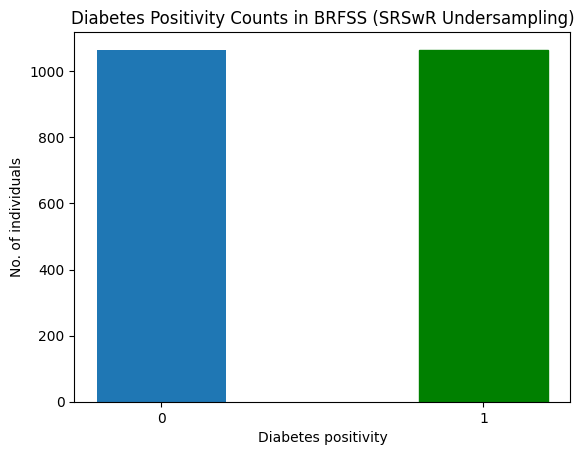

In [274]:
barlist = plt.bar([str(0),str(1)], y_S_SRSwR.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRSwR Undersampling)")
plt.show()

In [275]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (1704, 35)
y_S_train: (1704,)
X_S_test: (426, 35)
y_S_test: (426,)


In [276]:
model_source_SRSwR = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_378"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2646 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2647 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2648 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2649 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2650 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2651 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2652 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - AUC: 0.4423 - loss: 0.6941 - val_AUC: 0.6350 - val_loss: 0.6912
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5637 - loss: 0.6916 - val_AUC: 0.7089 - val_loss: 0.6798
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6402 - loss: 0.6774 - val_AUC: 0.7361 - val_loss: 0.6488
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6977 - loss: 0.6412 - val_AUC: 0.7340 - val_loss: 0.6467
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6941 - loss: 0.6334 - val_AUC: 0.8230 - val_loss: 0.5323
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8022 - loss: 0.5370 - val_AUC: 0.8303 - val_loss: 0.5290
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8337 - loss: 0.5070 - val_AUC: 0.8571 - val_loss: 0.4877
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8340 - loss: 0.5049 - val_AUC: 0.8557 - val_loss: 0.4770
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8604 - loss:

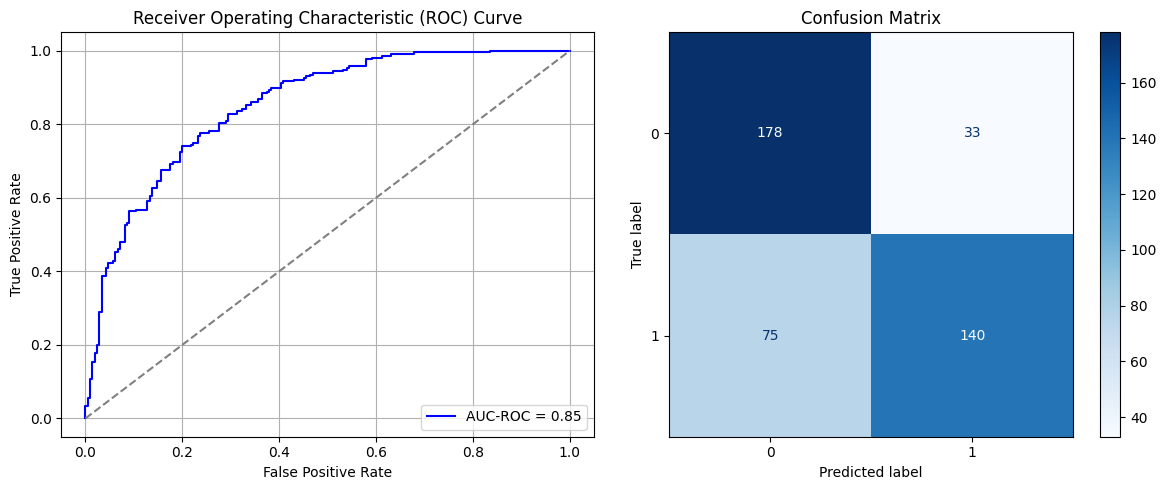

Best threshold based on F1-score: 0.1635049283504486
Time elapsed (performance): 6.555159343000014


<Sequential name=sequential_378, built=True>

In [277]:
train_and_evaluate(model_source_SRSwR, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
AUC-ROC: 0.5416666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        49
           1       0.55      0.25      0.34        48

    accuracy                           0.53        97
   macro avg       0.53      0.52      0.49        97
weighted avg       0.53      0.53      0.49        97

FPR 0.20408163265306123 TPR: 0.25 FNR: 0.75 TNR: 0.7959183673469388


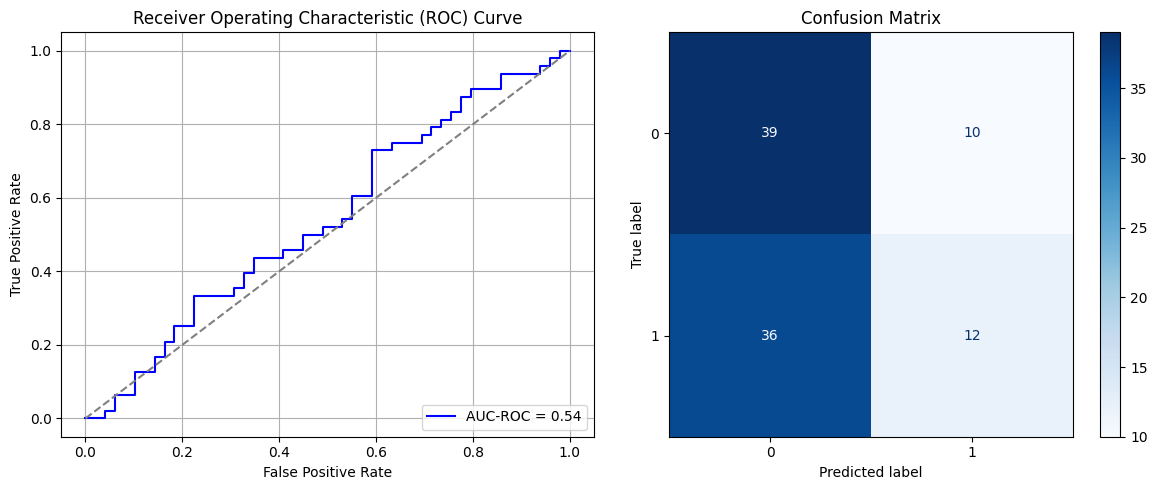

Best threshold based on F1-score: 0.7202655673027039
False Negative Rate: 0.75
Time elapsed (performance): 0.4887799950001863


<ipython-input-244-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [278]:
Transductive_TL(model_source_SRSwR, X_T_test, y_T_test, "Target")

In [279]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_379"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2653 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2654 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2655 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2656 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2657 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2658 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2659 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.5932 - loss: 0.8577 - val_AUC: 0.5640 - val_loss: 0.7677
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6122 - loss: 0.7237 - val_AUC: 0.5603 - val_loss: 0.7407
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6303 - loss: 0.6771 - val_AUC: 0.5647 - val_loss: 0.7166
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6010 - loss: 0.7033 - val_AUC: 0.5655 - val_loss: 0.6878
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6398 - loss: 0.6662 - val_AUC: 0.5651 - val_loss: 0.6727
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6412 - loss: 0.6493 - val_AUC: 0.5754 - val_loss: 0.6550
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6492 - loss: 0.6515 - val_AUC: 0.5843 - val_loss: 0.6442
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6369 - loss: 0.6661 - val_AUC

(np.float64(0.16326530612244897), np.float64(0.6041666666666666))

In [280]:
fine_tuning(X_T_train_SRSwR, X_T_test, y_T_train_SRSwR, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_380"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2660 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2661 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2662 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2663 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2664 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2665 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2666 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.5803 - loss: 0.8124 - val_AUC: 0.0000e+00 - val_loss: 1.2777
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6440 - loss: 0.6939 - val_AUC: 0.0000e+00 - val_loss: 1.0962
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6892 - loss: 0.6355 - val_AUC: 0.0000e+00 - val_loss: 0.9778
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6913 - loss: 0.6082 - val_AUC: 0.0000e+00 - val_loss: 0.9616
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6850 - loss: 0.6357 - val_AUC: 0.0000e+00 - val_loss: 0.9455
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6685 - loss: 0.6170 - val_AUC: 0.0000e+00 - val_loss: 0.9918
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6432 - loss: 0.6447 - val_AUC: 0.0000e+00 - val_loss: 0.9825
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6698 - loss: 0.6406 - val_AUC: 0.0000e+00 - val_loss: 0.9449
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7

(np.float64(0.16326530612244897), np.float64(0.6666666666666666))

In [282]:
times = 50

FPR = []
FNR = []

for i in range(times):
    # X_T_train_SRSwR, y_T_train_SRSwR = SRSwR_undersampler(T_train, T_train.iloc[:,-1])
    fpr, fnr = fine_tuning(X_T_train_SRSwR, X_T_test, y_T_train_SRSwR, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_SRSwR, X_T_test, y_T_train_SRSwR, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_383"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2681 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2682 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2683 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2684 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2685 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2686 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2687 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - AUC: 0.6589 - loss: 0.7144 - val_AUC: 0.0000e+00 - val_loss: 1.2259
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6392 - loss: 0.6629 - val_AUC: 0.0000e+00 - val_loss: 1.0995
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6569 - loss: 0.6658 - val_AUC: 0.0000e+00 - val_loss: 0.9957
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6807 - loss: 0.6428 - val_AUC: 0.0000e+00 - val_loss: 0.9345
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6758 - loss: 0.6429 - val_AUC: 0.0000e+00 - val_loss: 0.9425
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6826 - loss: 0.6175 - val_AUC: 0.0000e+00 - val_loss: 0.9979
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6834 - loss: 0.6164 - val_AUC: 0.0000e+00 - val_loss: 0.9878
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6941 - loss: 0.60

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_384"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2688 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2689 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2690 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2691 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2692 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2693 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2694 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6214 - loss: 0.7128 - val_AUC: 0.0000e+00 - val_loss: 1.2380
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6439 - loss: 0.7059 - val_AUC: 0.0000e+00 - val_loss: 1.0516
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6647 - loss: 0.6617 - val_AUC: 0.0000e+00 - val_loss: 1.0036
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6736 - loss: 0.6463 - val_AUC: 0.0000e+00 - val_loss: 0.9705
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7071 - loss: 0.6031 - val_AUC: 0.0000e+00 - val_loss: 0.9916
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6788 - loss: 0.6205 - val_AUC: 0.0000e+00 - val_loss: 0.9899
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7017 - loss: 0.6015 - val_AUC: 0.0000e+00 - val_loss: 0.9591
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7096 - loss: 0.6177 - val_AUC: 0.0000e+00 - val_loss: 0.9123
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_385"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2695 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2696 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2697 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2698 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2699 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2700 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2701 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.6038 - loss: 0.7825 - val_AUC: 0.0000e+00 - val_loss: 1.2966
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6292 - loss: 0.6999 - val_AUC: 0.0000e+00 - val_loss: 1.1326
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6929 - loss: 0.6192 - val_AUC: 0.0000e+00 - val_loss: 1.0280
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6715 - loss: 0.6201 - val_AUC: 0.0000e+00 - val_loss: 0.9897
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6685 - loss: 0.6467 - val_AUC: 0.0000e+00 - val_loss: 0.9306
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6791 - loss: 0.6559 - val_AUC: 0.0000e+00 - val_loss: 0.9250
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7004 - loss: 0.6206 - val_AUC: 0.0000e+00 - val_loss: 0.9716
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6999 - loss: 0.6053 - val_AUC: 0.0000e+00 - val_loss: 1.0014
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_386"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2702 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2703 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2704 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2705 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2706 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2707 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2708 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 971ms/step - AUC: 0.6801 - loss: 0.7030 - val_AUC: 0.0000e+00 - val_loss: 1.1939
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6173 - loss: 0.7192 - val_AUC: 0.0000e+00 - val_loss: 1.0500
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6038 - loss: 0.7124 - val_AUC: 0.0000e+00 - val_loss: 1.0116
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.6512 - loss: 0.6288 - val_AUC: 0.0000e+00 - val_loss: 0.9684
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.6661 - loss: 0.6404 - val_AUC: 0.0000e+00 - val_loss: 0.9534
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - AUC: 0.6616 - loss: 0.6446 - val_AUC: 0.0000e+00 - val_loss: 0.9412
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - AUC: 0.6814 - loss: 0.6373 - val_AUC: 0.0000e+00 - val_loss: 0.9541
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6884 - loss: 0.6132 - val_AUC: 0.0000e+00 - val_loss: 0.9877
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_387"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2709 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2710 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2711 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2712 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2713 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2714 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2715 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - AUC: 0.6252 - loss: 0.7401 - val_AUC: 0.0000e+00 - val_loss: 1.3303
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6729 - loss: 0.6512 - val_AUC: 0.0000e+00 - val_loss: 1.1377
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6697 - loss: 0.6350 - val_AUC: 0.0000e+00 - val_loss: 1.0078
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6575 - loss: 0.6370 - val_AUC: 0.0000e+00 - val_loss: 0.9680
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6325 - loss: 0.6773 - val_AUC: 0.0000e+00 - val_loss: 0.9482
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6547 - loss: 0.6374 - val_AUC: 0.0000e+00 - val_loss: 0.9764
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6700 - loss: 0.6434 - val_AUC: 0.0000e+00 - val_loss: 0.9608
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6809 - loss: 0.6341 - val_AUC: 0.0000e+00 - val_loss: 0.9691
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_388"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2716 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2717 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2718 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2719 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2720 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2721 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2722 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - AUC: 0.6806 - loss: 0.6849 - val_AUC: 0.0000e+00 - val_loss: 1.2727
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6862 - loss: 0.6248 - val_AUC: 0.0000e+00 - val_loss: 1.1068
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6703 - loss: 0.6386 - val_AUC: 0.0000e+00 - val_loss: 1.0398
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6701 - loss: 0.6384 - val_AUC: 0.0000e+00 - val_loss: 0.9745
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6558 - loss: 0.6560 - val_AUC: 0.0000e+00 - val_loss: 0.9457
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6657 - loss: 0.6151 - val_AUC: 0.0000e+00 - val_loss: 0.9743
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6744 - loss: 0.6377 - val_AUC: 0.0000e+00 - val_loss: 0.9279
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6640 - loss: 0.6227 - val_AUC: 0.0000e+00 - val_loss: 0.9670
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_389"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2723 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2724 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2725 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2726 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2727 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2728 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2729 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - AUC: 0.6638 - loss: 0.7059 - val_AUC: 0.0000e+00 - val_loss: 1.2215
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6712 - loss: 0.6398 - val_AUC: 0.0000e+00 - val_loss: 1.0872
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6833 - loss: 0.6408 - val_AUC: 0.0000e+00 - val_loss: 0.9643
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6758 - loss: 0.6466 - val_AUC: 0.0000e+00 - val_loss: 0.9507
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6698 - loss: 0.6370 - val_AUC: 0.0000e+00 - val_loss: 0.9969
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7168 - loss: 0.6101 - val_AUC: 0.0000e+00 - val_loss: 0.9508
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6878 - loss: 0.6385 - val_AUC: 0.0000e+00 - val_loss: 0.9510
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6800 - loss: 0.6155 - val_AUC: 0.0000e+00 - val_loss: 0.9772
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_390"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2730 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2731 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2732 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2733 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2734 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2735 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2736 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - AUC: 0.6213 - loss: 0.7953 - val_AUC: 0.0000e+00 - val_loss: 1.2503
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6801 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 1.1556
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5892 - loss: 0.7008 - val_AUC: 0.0000e+00 - val_loss: 1.0294
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6601 - loss: 0.6329 - val_AUC: 0.0000e+00 - val_loss: 0.9511
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6708 - loss: 0.6450 - val_AUC: 0.0000e+00 - val_loss: 0.9217
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6670 - loss: 0.6381 - val_AUC: 0.0000e+00 - val_loss: 0.9569
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6830 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 1.0037
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7009 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.9752
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_391"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2737 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2738 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2739 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2740 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2741 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2742 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2743 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - AUC: 0.6588 - loss: 0.7060 - val_AUC: 0.0000e+00 - val_loss: 1.2803
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - AUC: 0.6449 - loss: 0.6922 - val_AUC: 0.0000e+00 - val_loss: 1.0689
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 0.6241 - loss: 0.7011 - val_AUC: 0.0000e+00 - val_loss: 0.9757
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - AUC: 0.6289 - loss: 0.6486 - val_AUC: 0.0000e+00 - val_loss: 0.9614
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 0.6277 - loss: 0.6650 - val_AUC: 0.0000e+00 - val_loss: 0.9659
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 0.6555 - loss: 0.6284 - val_AUC: 0.0000e+00 - val_loss: 0.9739
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6707 - loss: 0.6043 - val_AUC: 0.0000e+00 - val_loss: 0.9831
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.7142 - loss: 0.6030 - val_AUC: 0.0000e+00 - val_loss: 0.9463
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_392"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2744 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2745 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2746 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2747 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2748 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2749 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2750 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - AUC: 0.6277 - loss: 0.7354 - val_AUC: 0.0000e+00 - val_loss: 1.2773
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6491 - loss: 0.6554 - val_AUC: 0.0000e+00 - val_loss: 1.1253
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6236 - loss: 0.6833 - val_AUC: 0.0000e+00 - val_loss: 1.0058
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6580 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.9728
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6758 - loss: 0.6293 - val_AUC: 0.0000e+00 - val_loss: 0.9770
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6615 - loss: 0.6336 - val_AUC: 0.0000e+00 - val_loss: 0.9669
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6846 - loss: 0.6232 - val_AUC: 0.0000e+00 - val_loss: 0.9530
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6884 - loss: 0.6084 - val_AUC: 0.0000e+00 - val_loss: 0.9736
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_393"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2751 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2752 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2753 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2754 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2755 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2756 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2757 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.5921 - loss: 0.7342 - val_AUC: 0.0000e+00 - val_loss: 1.3826
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6452 - loss: 0.6527 - val_AUC: 0.0000e+00 - val_loss: 1.1644
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6177 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 1.0024
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6616 - loss: 0.6351 - val_AUC: 0.0000e+00 - val_loss: 0.9529
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6808 - loss: 0.6359 - val_AUC: 0.0000e+00 - val_loss: 0.9558
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6510 - loss: 0.6496 - val_AUC: 0.0000e+00 - val_loss: 0.9591
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7052 - loss: 0.6072 - val_AUC: 0.0000e+00 - val_loss: 0.9413
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7059 - loss: 0.6117 - val_AUC: 0.0000e+00 - val_loss: 0.9496
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_394"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2758 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2759 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2760 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2761 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2762 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2763 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2764 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - AUC: 0.5928 - loss: 0.7967 - val_AUC: 0.0000e+00 - val_loss: 1.2254
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - AUC: 0.6810 - loss: 0.6398 - val_AUC: 0.0000e+00 - val_loss: 1.1027
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5880 - loss: 0.7064 - val_AUC: 0.0000e+00 - val_loss: 1.0012
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6808 - loss: 0.6297 - val_AUC: 0.0000e+00 - val_loss: 0.9866
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6241 - loss: 0.6754 - val_AUC: 0.0000e+00 - val_loss: 0.9299
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7026 - loss: 0.6206 - val_AUC: 0.0000e+00 - val_loss: 0.9548
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6558 - loss: 0.6156 - val_AUC: 0.0000e+00 - val_loss: 1.0018
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7064 - loss: 0.6082 - val_AUC: 0.0000e+00 - val_loss: 0.9773
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_395"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2765 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2766 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2767 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2768 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2769 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2770 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2771 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.6947 - loss: 0.6548 - val_AUC: 0.0000e+00 - val_loss: 1.3080
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6654 - loss: 0.7001 - val_AUC: 0.0000e+00 - val_loss: 1.0857
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7031 - loss: 0.6109 - val_AUC: 0.0000e+00 - val_loss: 1.0133
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6485 - loss: 0.6447 - val_AUC: 0.0000e+00 - val_loss: 0.9668
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7045 - loss: 0.6074 - val_AUC: 0.0000e+00 - val_loss: 0.9832
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6904 - loss: 0.6125 - val_AUC: 0.0000e+00 - val_loss: 0.9852
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7371 - loss: 0.5923 - val_AUC: 0.0000e+00 - val_loss: 0.9443
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6923 - loss: 0.6115 - val_AUC: 0.0000e+00 - val_loss: 0.9525
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_396"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2772 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2773 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2774 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2775 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2776 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2777 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2778 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6260 - loss: 0.7240 - val_AUC: 0.0000e+00 - val_loss: 1.4195
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6459 - loss: 0.7218 - val_AUC: 0.0000e+00 - val_loss: 1.1451
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6142 - loss: 0.7188 - val_AUC: 0.0000e+00 - val_loss: 1.0266
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5961 - loss: 0.7310 - val_AUC: 0.0000e+00 - val_loss: 0.9790
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6687 - loss: 0.6324 - val_AUC: 0.0000e+00 - val_loss: 0.9837
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6775 - loss: 0.6326 - val_AUC: 0.0000e+00 - val_loss: 0.9797
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6835 - loss: 0.6269 - val_AUC: 0.0000e+00 - val_loss: 0.9690
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7228 - loss: 0.5968 - val_AUC: 0.0000e+00 - val_loss: 0.9591
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_397"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2779 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2780 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2781 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2782 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2783 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2784 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2785 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - AUC: 0.6166 - loss: 0.7607 - val_AUC: 0.0000e+00 - val_loss: 1.2934
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6192 - loss: 0.6849 - val_AUC: 0.0000e+00 - val_loss: 1.1051
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6331 - loss: 0.6875 - val_AUC: 0.0000e+00 - val_loss: 0.9772
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6362 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_loss: 0.9751
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7110 - loss: 0.6062 - val_AUC: 0.0000e+00 - val_loss: 0.9887
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6959 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.9815
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6939 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.9558
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7056 - loss: 0.6038 - val_AUC: 0.0000e+00 - val_loss: 0.9481
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_398"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2786 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2787 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2788 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2789 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2790 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2791 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2792 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.6557 - loss: 0.7141 - val_AUC: 0.0000e+00 - val_loss: 1.2588
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6283 - loss: 0.7029 - val_AUC: 0.0000e+00 - val_loss: 1.0961
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6513 - loss: 0.6763 - val_AUC: 0.0000e+00 - val_loss: 1.0138
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7087 - loss: 0.5981 - val_AUC: 0.0000e+00 - val_loss: 1.0027
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6290 - loss: 0.6758 - val_AUC: 0.0000e+00 - val_loss: 0.9723
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6346 - loss: 0.6576 - val_AUC: 0.0000e+00 - val_loss: 0.9577
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.7049 - loss: 0.5946 - val_AUC: 0.0000e+00 - val_loss: 0.9819
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7015 - loss: 0.5943 - val_AUC: 0.0000e+00 - val_loss: 0.9501
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_399"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2793 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2794 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2795 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2796 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2797 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2798 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2799 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6419 - loss: 0.7596 - val_AUC: 0.0000e+00 - val_loss: 1.2393
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6233 - loss: 0.7489 - val_AUC: 0.0000e+00 - val_loss: 1.0309
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6581 - loss: 0.6403 - val_AUC: 0.0000e+00 - val_loss: 1.0243
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6374 - loss: 0.6434 - val_AUC: 0.0000e+00 - val_loss: 1.0002
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6818 - loss: 0.6153 - val_AUC: 0.0000e+00 - val_loss: 0.9586
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6740 - loss: 0.6267 - val_AUC: 0.0000e+00 - val_loss: 0.9610
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7140 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.9439
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6956 - loss: 0.6096 - val_AUC: 0.0000e+00 - val_loss: 0.9730
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_400"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2800 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2801 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2802 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2803 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2804 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2805 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2806 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - AUC: 0.6061 - loss: 0.7736 - val_AUC: 0.0000e+00 - val_loss: 1.3441
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7031 - loss: 0.6265 - val_AUC: 0.0000e+00 - val_loss: 1.0985
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6332 - loss: 0.6827 - val_AUC: 0.0000e+00 - val_loss: 0.9969
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6501 - loss: 0.6450 - val_AUC: 0.0000e+00 - val_loss: 0.9643
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6444 - loss: 0.6664 - val_AUC: 0.0000e+00 - val_loss: 0.9449
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6801 - loss: 0.6240 - val_AUC: 0.0000e+00 - val_loss: 0.9650
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6710 - loss: 0.6184 - val_AUC: 0.0000e+00 - val_loss: 0.9809
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7070 - loss: 0.6113 - val_AUC: 0.0000e+00 - val_loss: 0.9614
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_401"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2807 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2808 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2809 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2810 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2811 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2812 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2813 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6728 - loss: 0.7326 - val_AUC: 0.0000e+00 - val_loss: 1.2698
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6670 - loss: 0.6277 - val_AUC: 0.0000e+00 - val_loss: 1.1503
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6541 - loss: 0.6621 - val_AUC: 0.0000e+00 - val_loss: 1.0299
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6685 - loss: 0.6390 - val_AUC: 0.0000e+00 - val_loss: 0.9436
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6664 - loss: 0.6381 - val_AUC: 0.0000e+00 - val_loss: 0.9370
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6957 - loss: 0.6292 - val_AUC: 0.0000e+00 - val_loss: 0.9681
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6589 - loss: 0.6351 - val_AUC: 0.0000e+00 - val_loss: 0.9977
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6997 - loss: 0.6171 - val_AUC: 0.0000e+00 - val_loss: 0.9652
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_402"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2814 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2815 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2816 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2817 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2818 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2819 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2820 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6185 - loss: 0.7683 - val_AUC: 0.0000e+00 - val_loss: 1.2719
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6583 - loss: 0.6825 - val_AUC: 0.0000e+00 - val_loss: 1.1167
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6883 - loss: 0.6197 - val_AUC: 0.0000e+00 - val_loss: 0.9935
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6854 - loss: 0.6060 - val_AUC: 0.0000e+00 - val_loss: 0.9980
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6901 - loss: 0.6203 - val_AUC: 0.0000e+00 - val_loss: 0.9588
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7174 - loss: 0.5921 - val_AUC: 0.0000e+00 - val_loss: 0.9607
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7069 - loss: 0.5917 - val_AUC: 0.0000e+00 - val_loss: 0.9895
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6878 - loss: 0.6239 - val_AUC: 0.0000e+00 - val_loss: 0.9392
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_403"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2821 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2822 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2823 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2824 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2825 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2826 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2827 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - AUC: 0.6583 - loss: 0.6966 - val_AUC: 0.0000e+00 - val_loss: 1.2592
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6343 - loss: 0.7141 - val_AUC: 0.0000e+00 - val_loss: 1.0655
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6395 - loss: 0.6652 - val_AUC: 0.0000e+00 - val_loss: 0.9907
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6536 - loss: 0.6523 - val_AUC: 0.0000e+00 - val_loss: 0.9532
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6813 - loss: 0.6343 - val_AUC: 0.0000e+00 - val_loss: 0.9616
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7026 - loss: 0.6034 - val_AUC: 0.0000e+00 - val_loss: 0.9821
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7153 - loss: 0.6138 - val_AUC: 0.0000e+00 - val_loss: 0.9493
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6747 - loss: 0.6363 - val_AUC: 0.0000e+00 - val_loss: 0.9531
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_404"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2828 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2829 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2830 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2831 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2832 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2833 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2834 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6464 - loss: 0.7448 - val_AUC: 0.0000e+00 - val_loss: 1.2358
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6152 - loss: 0.7250 - val_AUC: 0.0000e+00 - val_loss: 1.0640
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6745 - loss: 0.6513 - val_AUC: 0.0000e+00 - val_loss: 0.9918
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6723 - loss: 0.6299 - val_AUC: 0.0000e+00 - val_loss: 0.9718
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6187 - loss: 0.6712 - val_AUC: 0.0000e+00 - val_loss: 0.9627
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6684 - loss: 0.6410 - val_AUC: 0.0000e+00 - val_loss: 0.9617
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7309 - loss: 0.5838 - val_AUC: 0.0000e+00 - val_loss: 0.9851
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.7131 - loss: 0.5864 - val_AUC: 0.0000e+00 - val_loss: 0.9698
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_405"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2835 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2836 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2837 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2838 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2839 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2840 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2841 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.6552 - loss: 0.6910 - val_AUC: 0.0000e+00 - val_loss: 1.2927
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6393 - loss: 0.6865 - val_AUC: 0.0000e+00 - val_loss: 1.1075
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7129 - loss: 0.5853 - val_AUC: 0.0000e+00 - val_loss: 1.0247
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6740 - loss: 0.6274 - val_AUC: 0.0000e+00 - val_loss: 0.9725
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6744 - loss: 0.6358 - val_AUC: 0.0000e+00 - val_loss: 0.9411
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6516 - loss: 0.6490 - val_AUC: 0.0000e+00 - val_loss: 0.9482
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - AUC: 0.6894 - loss: 0.6100 - val_AUC: 0.0000e+00 - val_loss: 0.9761
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6744 - loss: 0.6240 - val_AUC: 0.0000e+00 - val_loss: 0.9579
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_406"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2842 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2843 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2844 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2845 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2846 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2847 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2848 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.6852 - loss: 0.6655 - val_AUC: 0.0000e+00 - val_loss: 1.2544
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6581 - loss: 0.6637 - val_AUC: 0.0000e+00 - val_loss: 1.0778
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6800 - loss: 0.6365 - val_AUC: 0.0000e+00 - val_loss: 0.9919
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6838 - loss: 0.6154 - val_AUC: 0.0000e+00 - val_loss: 0.9929
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6640 - loss: 0.6449 - val_AUC: 0.0000e+00 - val_loss: 0.9414
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6493 - loss: 0.6494 - val_AUC: 0.0000e+00 - val_loss: 0.9434
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7279 - loss: 0.5971 - val_AUC: 0.0000e+00 - val_loss: 0.9629
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6746 - loss: 0.6328 - val_AUC: 0.0000e+00 - val_loss: 0.9715
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_407"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2849 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2850 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2851 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2852 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2853 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2854 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2855 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.6301 - loss: 0.7348 - val_AUC: 0.0000e+00 - val_loss: 1.2562
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6669 - loss: 0.6767 - val_AUC: 0.0000e+00 - val_loss: 1.0156
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7056 - loss: 0.6219 - val_AUC: 0.0000e+00 - val_loss: 0.9881
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6640 - loss: 0.6384 - val_AUC: 0.0000e+00 - val_loss: 0.9772
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6594 - loss: 0.6445 - val_AUC: 0.0000e+00 - val_loss: 0.9610
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6636 - loss: 0.6256 - val_AUC: 0.0000e+00 - val_loss: 0.9571
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7071 - loss: 0.6139 - val_AUC: 0.0000e+00 - val_loss: 0.9622
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7046 - loss: 0.6117 - val_AUC: 0.0000e+00 - val_loss: 0.9405
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_408"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2856 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2857 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2858 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2859 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2860 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2861 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2862 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6162 - loss: 0.7680 - val_AUC: 0.0000e+00 - val_loss: 1.2638
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6235 - loss: 0.6945 - val_AUC: 0.0000e+00 - val_loss: 1.0935
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6581 - loss: 0.6543 - val_AUC: 0.0000e+00 - val_loss: 0.9751
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6515 - loss: 0.6378 - val_AUC: 0.0000e+00 - val_loss: 0.9521
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6831 - loss: 0.6225 - val_AUC: 0.0000e+00 - val_loss: 0.9318
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7023 - loss: 0.6079 - val_AUC: 0.0000e+00 - val_loss: 0.9939
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6907 - loss: 0.6124 - val_AUC: 0.0000e+00 - val_loss: 0.9801
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.7091 - loss: 0.6323 - val_AUC: 0.0000e+00 - val_loss: 0.9136
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_409"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2863 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2864 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2865 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2866 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2867 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2868 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2869 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.7103 - loss: 0.6210 - val_AUC: 0.0000e+00 - val_loss: 1.1990
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6033 - loss: 0.7646 - val_AUC: 0.0000e+00 - val_loss: 1.0564
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6352 - loss: 0.7067 - val_AUC: 0.0000e+00 - val_loss: 0.9894
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6539 - loss: 0.6378 - val_AUC: 0.0000e+00 - val_loss: 1.0130
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6540 - loss: 0.6286 - val_AUC: 0.0000e+00 - val_loss: 0.9843
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6700 - loss: 0.6460 - val_AUC: 0.0000e+00 - val_loss: 0.9542
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6712 - loss: 0.6239 - val_AUC: 0.0000e+00 - val_loss: 0.9426
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7016 - loss: 0.6201 - val_AUC: 0.0000e+00 - val_loss: 0.9334
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_410"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2870 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2871 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2872 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2873 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2874 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2875 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2876 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6308 - loss: 0.7829 - val_AUC: 0.0000e+00 - val_loss: 1.2267
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6811 - loss: 0.6381 - val_AUC: 0.0000e+00 - val_loss: 1.1160
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6769 - loss: 0.6409 - val_AUC: 0.0000e+00 - val_loss: 0.9959
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6397 - loss: 0.6853 - val_AUC: 0.0000e+00 - val_loss: 0.9639
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7015 - loss: 0.6077 - val_AUC: 0.0000e+00 - val_loss: 0.9879
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6870 - loss: 0.6168 - val_AUC: 0.0000e+00 - val_loss: 0.9920
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6708 - loss: 0.6413 - val_AUC: 0.0000e+00 - val_loss: 0.9690
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6796 - loss: 0.6272 - val_AUC: 0.0000e+00 - val_loss: 0.9276
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_411"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2877 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2878 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2879 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2880 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2881 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2882 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2883 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.5871 - loss: 0.8150 - val_AUC: 0.0000e+00 - val_loss: 1.3118
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6534 - loss: 0.6708 - val_AUC: 0.0000e+00 - val_loss: 1.1338
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6281 - loss: 0.6889 - val_AUC: 0.0000e+00 - val_loss: 1.0301
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6574 - loss: 0.6586 - val_AUC: 0.0000e+00 - val_loss: 0.9770
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6755 - loss: 0.6277 - val_AUC: 0.0000e+00 - val_loss: 0.9716
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6958 - loss: 0.5954 - val_AUC: 0.0000e+00 - val_loss: 0.9996
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6532 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.9567
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6936 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.9420
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_412"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2884 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2885 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2886 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2887 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2888 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2889 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2890 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6286 - loss: 0.8134 - val_AUC: 0.0000e+00 - val_loss: 1.2981
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6368 - loss: 0.7163 - val_AUC: 0.0000e+00 - val_loss: 1.1534
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6320 - loss: 0.6908 - val_AUC: 0.0000e+00 - val_loss: 1.0375
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6470 - loss: 0.6794 - val_AUC: 0.0000e+00 - val_loss: 0.9680
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6728 - loss: 0.6289 - val_AUC: 0.0000e+00 - val_loss: 0.9786
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7097 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 0.9552
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6777 - loss: 0.6250 - val_AUC: 0.0000e+00 - val_loss: 0.9738
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7101 - loss: 0.5951 - val_AUC: 0.0000e+00 - val_loss: 0.9541
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_413"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2891 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2892 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2893 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2894 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2895 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2896 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2897 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6383 - loss: 0.7453 - val_AUC: 0.0000e+00 - val_loss: 1.2778
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6857 - loss: 0.6437 - val_AUC: 0.0000e+00 - val_loss: 1.1076
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6153 - loss: 0.6930 - val_AUC: 0.0000e+00 - val_loss: 1.0004
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6684 - loss: 0.6521 - val_AUC: 0.0000e+00 - val_loss: 0.9313
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6657 - loss: 0.6272 - val_AUC: 0.0000e+00 - val_loss: 0.9692
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6825 - loss: 0.6220 - val_AUC: 0.0000e+00 - val_loss: 0.9894
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7050 - loss: 0.5981 - val_AUC: 0.0000e+00 - val_loss: 0.9684
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7253 - loss: 0.5947 - val_AUC: 0.0000e+00 - val_loss: 0.9539
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_414"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2898 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2899 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2900 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2901 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2902 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2903 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2904 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6143 - loss: 0.7556 - val_AUC: 0.0000e+00 - val_loss: 1.2991
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7218 - loss: 0.5989 - val_AUC: 0.0000e+00 - val_loss: 1.1169
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6389 - loss: 0.6628 - val_AUC: 0.0000e+00 - val_loss: 1.0111
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6862 - loss: 0.6132 - val_AUC: 0.0000e+00 - val_loss: 0.9812
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6800 - loss: 0.6277 - val_AUC: 0.0000e+00 - val_loss: 0.9497
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6295 - loss: 0.6522 - val_AUC: 0.0000e+00 - val_loss: 0.9550
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6981 - loss: 0.6023 - val_AUC: 0.0000e+00 - val_loss: 0.9475
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6860 - loss: 0.6223 - val_AUC: 0.0000e+00 - val_loss: 0.9511
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_415"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2905 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2906 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2907 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2908 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2909 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2910 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2911 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - AUC: 0.6243 - loss: 0.7807 - val_AUC: 0.0000e+00 - val_loss: 1.2528
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7000 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 1.1090
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6769 - loss: 0.6704 - val_AUC: 0.0000e+00 - val_loss: 0.9999
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6634 - loss: 0.6450 - val_AUC: 0.0000e+00 - val_loss: 0.9799
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6707 - loss: 0.6459 - val_AUC: 0.0000e+00 - val_loss: 0.9727
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6807 - loss: 0.6228 - val_AUC: 0.0000e+00 - val_loss: 0.9802
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6822 - loss: 0.6031 - val_AUC: 0.0000e+00 - val_loss: 0.9920
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7143 - loss: 0.5773 - val_AUC: 0.0000e+00 - val_loss: 0.9753
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_416"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2912 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2913 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2914 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2915 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2916 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2917 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2918 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6596 - loss: 0.7211 - val_AUC: 0.0000e+00 - val_loss: 1.1842
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6134 - loss: 0.7267 - val_AUC: 0.0000e+00 - val_loss: 1.0633
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6421 - loss: 0.6716 - val_AUC: 0.0000e+00 - val_loss: 0.9759
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6756 - loss: 0.6227 - val_AUC: 0.0000e+00 - val_loss: 1.0065
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6391 - loss: 0.6685 - val_AUC: 0.0000e+00 - val_loss: 0.9615
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6938 - loss: 0.6093 - val_AUC: 0.0000e+00 - val_loss: 0.9735
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.7161 - loss: 0.6008 - val_AUC: 0.0000e+00 - val_loss: 0.9604
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7123 - loss: 0.5957 - val_AUC: 0.0000e+00 - val_loss: 0.9346
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_417"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2919 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2920 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2921 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2922 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2923 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2924 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2925 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6065 - loss: 0.7465 - val_AUC: 0.0000e+00 - val_loss: 1.2589
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6811 - loss: 0.6474 - val_AUC: 0.0000e+00 - val_loss: 1.0776
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6308 - loss: 0.6819 - val_AUC: 0.0000e+00 - val_loss: 0.9589
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6661 - loss: 0.6501 - val_AUC: 0.0000e+00 - val_loss: 0.9313
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7183 - loss: 0.5835 - val_AUC: 0.0000e+00 - val_loss: 0.9863
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6451 - loss: 0.6567 - val_AUC: 0.0000e+00 - val_loss: 0.9714
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6796 - loss: 0.6243 - val_AUC: 0.0000e+00 - val_loss: 0.9665
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6873 - loss: 0.6056 - val_AUC: 0.0000e+00 - val_loss: 0.9774
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_418"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2926 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2927 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2928 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2929 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2930 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2931 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2932 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - AUC: 0.6348 - loss: 0.7340 - val_AUC: 0.0000e+00 - val_loss: 1.3075
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6111 - loss: 0.7621 - val_AUC: 0.0000e+00 - val_loss: 1.1167
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6723 - loss: 0.6646 - val_AUC: 0.0000e+00 - val_loss: 1.0149
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6490 - loss: 0.6411 - val_AUC: 0.0000e+00 - val_loss: 0.9881
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6222 - loss: 0.6829 - val_AUC: 0.0000e+00 - val_loss: 0.9594
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6676 - loss: 0.6202 - val_AUC: 0.0000e+00 - val_loss: 0.9879
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6738 - loss: 0.6247 - val_AUC: 0.0000e+00 - val_loss: 0.9900
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6752 - loss: 0.6543 - val_AUC: 0.0000e+00 - val_loss: 0.9216
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_419"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2933 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2934 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2935 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2936 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2937 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2938 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2939 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.6391 - loss: 0.7170 - val_AUC: 0.0000e+00 - val_loss: 1.3057
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6622 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 1.1137
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6324 - loss: 0.6467 - val_AUC: 0.0000e+00 - val_loss: 0.9836
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6707 - loss: 0.6460 - val_AUC: 0.0000e+00 - val_loss: 0.9330
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7112 - loss: 0.5920 - val_AUC: 0.0000e+00 - val_loss: 0.9809
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7077 - loss: 0.6029 - val_AUC: 0.0000e+00 - val_loss: 0.9694
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6492 - loss: 0.6421 - val_AUC: 0.0000e+00 - val_loss: 0.9564
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6905 - loss: 0.6269 - val_AUC: 0.0000e+00 - val_loss: 0.9539
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_420"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2940 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2941 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2942 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2943 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2944 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2945 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2946 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.5707 - loss: 0.7996 - val_AUC: 0.0000e+00 - val_loss: 1.2862
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6286 - loss: 0.7309 - val_AUC: 0.0000e+00 - val_loss: 1.0574
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6730 - loss: 0.6491 - val_AUC: 0.0000e+00 - val_loss: 0.9790
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6618 - loss: 0.6469 - val_AUC: 0.0000e+00 - val_loss: 1.0030
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6739 - loss: 0.6365 - val_AUC: 0.0000e+00 - val_loss: 1.0065
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6722 - loss: 0.6150 - val_AUC: 0.0000e+00 - val_loss: 0.9872
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6439 - loss: 0.6429 - val_AUC: 0.0000e+00 - val_loss: 0.9460
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7011 - loss: 0.6130 - val_AUC: 0.0000e+00 - val_loss: 0.9274
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_421"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2947 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2948 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2949 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2950 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2951 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2952 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2953 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - AUC: 0.6811 - loss: 0.6755 - val_AUC: 0.0000e+00 - val_loss: 1.2754
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6185 - loss: 0.7460 - val_AUC: 0.0000e+00 - val_loss: 1.0892
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6646 - loss: 0.6305 - val_AUC: 0.0000e+00 - val_loss: 1.0627
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.6532 - loss: 0.6827 - val_AUC: 0.0000e+00 - val_loss: 0.9982
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6406 - loss: 0.6552 - val_AUC: 0.0000e+00 - val_loss: 0.9648
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6876 - loss: 0.6168 - val_AUC: 0.0000e+00 - val_loss: 0.9444
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7182 - loss: 0.5965 - val_AUC: 0.0000e+00 - val_loss: 0.9585
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6657 - loss: 0.6445 - val_AUC: 0.0000e+00 - val_loss: 0.9395
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_422"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2954 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2955 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2956 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2957 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2958 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2959 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2960 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6201 - loss: 0.7651 - val_AUC: 0.0000e+00 - val_loss: 1.2508
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6631 - loss: 0.6553 - val_AUC: 0.0000e+00 - val_loss: 1.1139
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6304 - loss: 0.6904 - val_AUC: 0.0000e+00 - val_loss: 0.9958
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6325 - loss: 0.6625 - val_AUC: 0.0000e+00 - val_loss: 0.9552
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6837 - loss: 0.6172 - val_AUC: 0.0000e+00 - val_loss: 0.9823
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6406 - loss: 0.6373 - val_AUC: 0.0000e+00 - val_loss: 0.9909
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6873 - loss: 0.6391 - val_AUC: 0.0000e+00 - val_loss: 0.9369
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7004 - loss: 0.6218 - val_AUC: 0.0000e+00 - val_loss: 0.9427
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_423"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2961 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2962 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2963 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2964 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2965 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2966 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2967 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6374 - loss: 0.7261 - val_AUC: 0.0000e+00 - val_loss: 1.2586
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6111 - loss: 0.7180 - val_AUC: 0.0000e+00 - val_loss: 1.0398
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6623 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 0.9347
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6825 - loss: 0.6173 - val_AUC: 0.0000e+00 - val_loss: 0.9660
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6588 - loss: 0.6320 - val_AUC: 0.0000e+00 - val_loss: 1.0028
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6663 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 0.9797
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6956 - loss: 0.6199 - val_AUC: 0.0000e+00 - val_loss: 0.9563
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6994 - loss: 0.6008 - val_AUC: 0.0000e+00 - val_loss: 0.9679
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_424"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2968 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2969 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2970 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2971 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2972 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2973 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2974 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - AUC: 0.6332 - loss: 0.7349 - val_AUC: 0.0000e+00 - val_loss: 1.3746
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6820 - loss: 0.6705 - val_AUC: 0.0000e+00 - val_loss: 1.1182
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7147 - loss: 0.6220 - val_AUC: 0.0000e+00 - val_loss: 0.9964
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6287 - loss: 0.6700 - val_AUC: 0.0000e+00 - val_loss: 0.9988
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5909 - loss: 0.6977 - val_AUC: 0.0000e+00 - val_loss: 1.0016
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6395 - loss: 0.6649 - val_AUC: 0.0000e+00 - val_loss: 0.9480
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6789 - loss: 0.6096 - val_AUC: 0.0000e+00 - val_loss: 0.9525
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6940 - loss: 0.5978 - val_AUC: 0.0000e+00 - val_loss: 0.9547
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_425"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2975 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2976 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2977 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2978 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2979 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2980 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2981 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.6299 - loss: 0.7768 - val_AUC: 0.0000e+00 - val_loss: 1.2823
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6588 - loss: 0.6845 - val_AUC: 0.0000e+00 - val_loss: 1.1290
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6942 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 1.0379
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6876 - loss: 0.6344 - val_AUC: 0.0000e+00 - val_loss: 0.9561
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6985 - loss: 0.6338 - val_AUC: 0.0000e+00 - val_loss: 0.9312
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6567 - loss: 0.6620 - val_AUC: 0.0000e+00 - val_loss: 0.9554
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6815 - loss: 0.6219 - val_AUC: 0.0000e+00 - val_loss: 0.9912
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6910 - loss: 0.6089 - val_AUC: 0.0000e+00 - val_loss: 0.9980
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_426"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2982 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2983 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2984 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2985 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2986 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2987 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2988 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.5926 - loss: 0.8115 - val_AUC: 0.0000e+00 - val_loss: 1.2668
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6534 - loss: 0.6881 - val_AUC: 0.0000e+00 - val_loss: 1.1369
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6671 - loss: 0.6666 - val_AUC: 0.0000e+00 - val_loss: 1.0141
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6410 - loss: 0.6739 - val_AUC: 0.0000e+00 - val_loss: 0.9869
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6793 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 0.9802
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6979 - loss: 0.6111 - val_AUC: 0.0000e+00 - val_loss: 0.9480
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6660 - loss: 0.6081 - val_AUC: 0.0000e+00 - val_loss: 0.9765
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6894 - loss: 0.6186 - val_AUC: 0.0000e+00 - val_loss: 0.9399
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_427"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2989 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2990 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2991 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2992 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2993 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2994 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2995 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - AUC: 0.6648 - loss: 0.6847 - val_AUC: 0.0000e+00 - val_loss: 1.2718
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - AUC: 0.6966 - loss: 0.6519 - val_AUC: 0.0000e+00 - val_loss: 1.0671
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6843 - loss: 0.6373 - val_AUC: 0.0000e+00 - val_loss: 0.9913
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6750 - loss: 0.6403 - val_AUC: 0.0000e+00 - val_loss: 0.9574
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6402 - loss: 0.6543 - val_AUC: 0.0000e+00 - val_loss: 0.9803
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5994 - loss: 0.6871 - val_AUC: 0.0000e+00 - val_loss: 0.9601
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6694 - loss: 0.6244 - val_AUC: 0.0000e+00 - val_loss: 0.9657
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6785 - loss: 0.6129 - val_AUC: 0.0000e+00 - val_loss: 0.9703
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_428"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2996 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2997 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2998 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2999 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3000 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3001 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3002 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6874 - loss: 0.6585 - val_AUC: 0.0000e+00 - val_loss: 1.3382
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6461 - loss: 0.6528 - val_AUC: 0.0000e+00 - val_loss: 1.1508
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6112 - loss: 0.7060 - val_AUC: 0.0000e+00 - val_loss: 1.0286
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6548 - loss: 0.6358 - val_AUC: 0.0000e+00 - val_loss: 0.9795
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6838 - loss: 0.6361 - val_AUC: 0.0000e+00 - val_loss: 0.9312
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7208 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.9717
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6718 - loss: 0.6465 - val_AUC: 0.0000e+00 - val_loss: 0.9706
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.7270 - loss: 0.6064 - val_AUC: 0.0000e+00 - val_loss: 0.9694
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_429"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3003 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3004 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3005 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3006 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3007 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3008 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3009 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6622 - loss: 0.7087 - val_AUC: 0.0000e+00 - val_loss: 1.2726
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6964 - loss: 0.6371 - val_AUC: 0.0000e+00 - val_loss: 1.0799
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6900 - loss: 0.6054 - val_AUC: 0.0000e+00 - val_loss: 1.0266
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6415 - loss: 0.6532 - val_AUC: 0.0000e+00 - val_loss: 0.9655
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7154 - loss: 0.6007 - val_AUC: 0.0000e+00 - val_loss: 0.9509
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6591 - loss: 0.6237 - val_AUC: 0.0000e+00 - val_loss: 0.9597
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6690 - loss: 0.6355 - val_AUC: 0.0000e+00 - val_loss: 0.9563
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.7072 - loss: 0.6244 - val_AUC: 0.0000e+00 - val_loss: 0.9570
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_430"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3010 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3011 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3012 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3013 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3014 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3015 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3016 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - AUC: 0.6287 - loss: 0.7569 - val_AUC: 0.0000e+00 - val_loss: 1.2370
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.6704 - loss: 0.6801 - val_AUC: 0.0000e+00 - val_loss: 1.0751
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6417 - loss: 0.6671 - val_AUC: 0.0000e+00 - val_loss: 0.9873
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6995 - loss: 0.6236 - val_AUC: 0.0000e+00 - val_loss: 0.9679
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6453 - loss: 0.6607 - val_AUC: 0.0000e+00 - val_loss: 0.9574
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6771 - loss: 0.6155 - val_AUC: 0.0000e+00 - val_loss: 1.0043
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6864 - loss: 0.6046 - val_AUC: 0.0000e+00 - val_loss: 0.9813
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6581 - loss: 0.6226 - val_AUC: 0.0000e+00 - val_loss: 0.9349
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_431"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3017 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3018 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3019 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3020 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3021 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3022 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3023 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6549 - loss: 0.6966 - val_AUC: 0.0000e+00 - val_loss: 1.3267
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6569 - loss: 0.7256 - val_AUC: 0.0000e+00 - val_loss: 1.1100
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6515 - loss: 0.6768 - val_AUC: 0.0000e+00 - val_loss: 1.0017
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6327 - loss: 0.6660 - val_AUC: 0.0000e+00 - val_loss: 0.9953
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6679 - loss: 0.6306 - val_AUC: 0.0000e+00 - val_loss: 0.9924
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6829 - loss: 0.6428 - val_AUC: 0.0000e+00 - val_loss: 0.9695
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6494 - loss: 0.6288 - val_AUC: 0.0000e+00 - val_loss: 0.9587
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7059 - loss: 0.6206 - val_AUC: 0.0000e+00 - val_loss: 0.9333
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_432"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3024 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3025 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3026 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3027 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3028 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3029 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3030 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.6307 - loss: 0.7082 - val_AUC: 0.0000e+00 - val_loss: 1.2973
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6409 - loss: 0.6885 - val_AUC: 0.0000e+00 - val_loss: 1.0360
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6346 - loss: 0.6680 - val_AUC: 0.0000e+00 - val_loss: 0.9756
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6287 - loss: 0.6768 - val_AUC: 0.0000e+00 - val_loss: 0.9596
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6692 - loss: 0.6347 - val_AUC: 0.0000e+00 - val_loss: 0.9582
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6688 - loss: 0.6201 - val_AUC: 0.0000e+00 - val_loss: 0.9591
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6815 - loss: 0.6175 - val_AUC: 0.0000e+00 - val_loss: 0.9569
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.7154 - loss: 0.5734 - val_AUC: 0.0000e+00 - val_loss: 0.9747
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.7

In [283]:
print(ParamFit)
ParamFit.to_csv('SRSwR_Fine_Tuning.csv')

         FPR       FNR
0   0.183673  0.666667
1   0.183673  0.666667
2   0.183673  0.666667
3   0.204082  0.666667
4   0.142857  0.687500
5   0.142857  0.708333
6   0.183673  0.666667
7   0.204082  0.666667
8   0.204082  0.625000
9   0.183673  0.666667
10  0.163265  0.666667
11  0.204082  0.666667
12  0.204082  0.666667
13  0.183673  0.666667
14  0.163265  0.666667
15  0.163265  0.666667
16  0.183673  0.666667
17  0.142857  0.687500
18  0.183673  0.666667
19  0.204082  0.645833
20  0.142857  0.729167
21  0.204082  0.666667
22  0.142857  0.687500
23  0.183673  0.666667
24  0.163265  0.708333
25  0.163265  0.708333
26  0.183673  0.666667
27  0.183673  0.666667
28  0.163265  0.666667
29  0.163265  0.666667
30  0.204082  0.666667
31  0.183673  0.666667
32  0.204082  0.625000
33  0.163265  0.666667
34  0.183673  0.666667
35  0.183673  0.666667
36  0.204082  0.645833
37  0.183673  0.666667
38  0.142857  0.666667
39  0.183673  0.666667
40  0.204082  0.645833
41  0.204082  0.666667
42  0.20408

## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [284]:
X_S_Sy, y_S_Sy = systematic_undersampler(data_S_full, data_S_full.iloc[:,-1])
print(y_S_Sy)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_Sy, y_T_train_Sy = systematic_undersampler(T_train, T_train.iloc[:, -1])
print(y_T_train_Sy)


1065
2876
2.700469483568075
1
[0, 2, 5, 8, 10, 13, 16, 18, 21, 24, 27, 29, 32, 35, 37, 40, 43, 45, 48, 51, 54, 56, 59, 62, 64, 67, 70, 72, 75, 78, 81, 83, 86, 89, 91, 94, 97, 99, 102, 105, 108, 110, 113, 116, 118, 121, 124, 126, 129, 132, 135, 137, 140, 143, 145, 148, 151, 153, 156, 159, 162, 164, 167, 170, 172, 175, 178, 180, 183, 186, 189, 191, 194, 197, 199, 202, 205, 207, 210, 213, 216, 218, 221, 224, 226, 229, 232, 234, 237, 240, 243, 245, 248, 251, 253, 256, 259, 261, 264, 267, 270, 272, 275, 278, 280, 283, 286, 288, 291, 294, 297, 299, 302, 305, 307, 310, 313, 315, 318, 321, 324, 326, 329, 332, 334, 337, 340, 342, 345, 348, 351, 353, 356, 359, 361, 364, 367, 369, 372, 375, 378, 380, 383, 386, 388, 391, 394, 396, 399, 402, 405, 407, 410, 413, 415, 418, 421, 423, 426, 429, 432, 434, 437, 440, 442, 445, 448, 450, 453, 456, 459, 461, 464, 467, 469, 472, 475, 477, 480, 483, 486, 488, 491, 494, 496, 499, 502, 504, 507, 510, 513, 515, 518, 521, 523, 526, 529, 531, 534, 537, 540, 542, 5

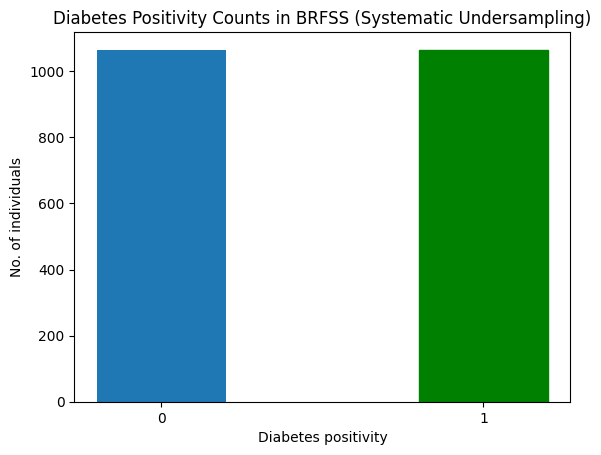

In [285]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Undersampling)")
plt.show()

In [286]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (1704, 35)
y_S_train: (1704,)
X_S_test: (426, 35)
y_S_test: (426,)


In [287]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_433"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3031 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3032 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3033 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3034 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3035 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3036 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3037 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - AUC: 0.4831 - loss: 0.6988 - val_AUC: 0.6078 - val_loss: 0.6868
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5726 - loss: 0.6869 - val_AUC: 0.6714 - val_loss: 0.6620
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6608 - loss: 0.6599 - val_AUC: 0.7364 - val_loss: 0.6390
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7117 - loss: 0.6288 - val_AUC: 0.7745 - val_loss: 0.6103
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7784 - loss: 0.5774 - val_AUC: 0.8041 - val_loss: 0.5454
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8220 - loss: 0.5202 - val_AUC: 0.7914 - val_loss: 0.5878
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8396 - loss: 0.5015 - val_AUC: 0.8119 - val_loss: 0.5513
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8549 - loss: 0.4719 - val_AUC: 0.8262 - val_loss: 0.5244
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8620 - loss:

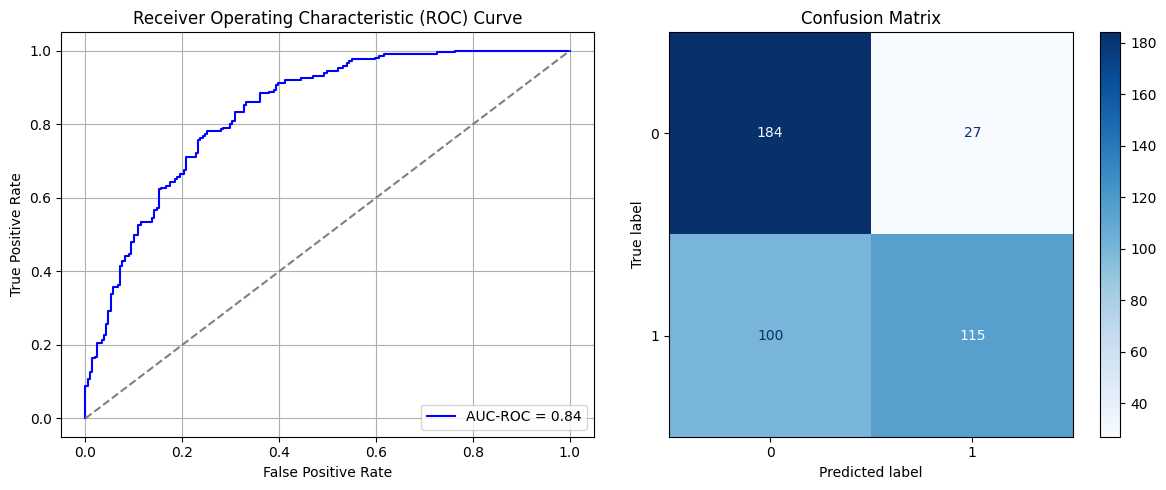

Best threshold based on F1-score: 0.14978352189064026
Time elapsed (performance): 7.262369211999612


<Sequential name=sequential_433, built=True>

In [288]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC-ROC: 0.49532312925170063
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        49
           1       0.43      0.27      0.33        48

    accuracy                           0.46        97
   macro avg       0.46      0.46      0.44        97
weighted avg       0.46      0.46      0.44        97

FPR 0.3469387755102041 TPR: 0.27083333333333337 FNR: 0.7291666666666666 TNR: 0.653061224489796


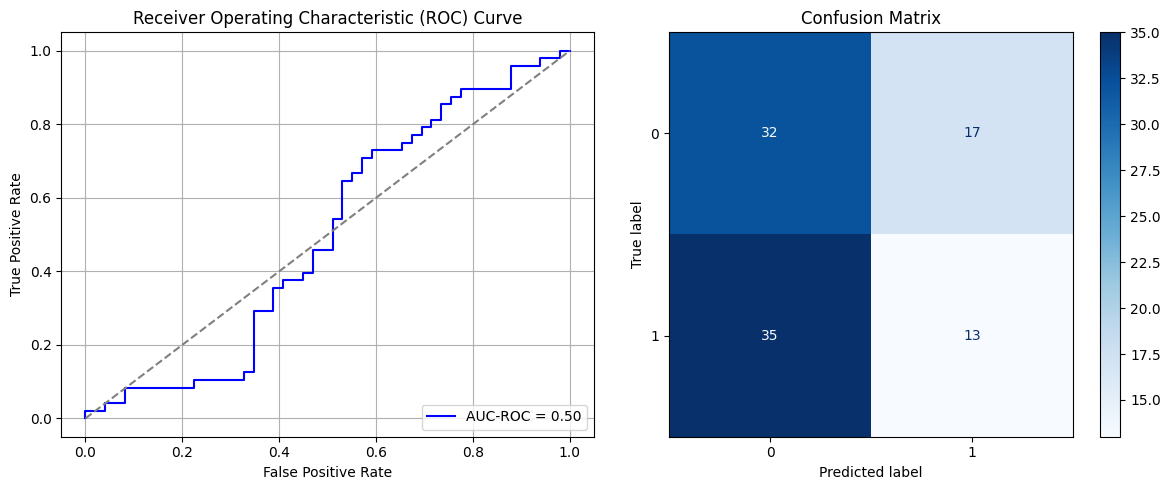

Best threshold based on F1-score: 0.08305862545967102
False Negative Rate: 0.7291666666666666
Time elapsed (performance): 0.6813930569996955


In [289]:
Transductive_TL(model_source_Sy, X_T_test, y_T_test, "Target")

In [290]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_434"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3038 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3039 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3040 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3041 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3042 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3043 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3044 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - AUC: 0.5950 - loss: 0.7295 - val_AUC: 0.5540 - val_loss: 0.6667
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5704 - loss: 0.6970 - val_AUC: 0.5566 - val_loss: 0.6653
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5793 - loss: 0.6845 - val_AUC: 0.5566 - val_loss: 0.6590
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6378 - loss: 0.6280 - val_AUC: 0.5669 - val_loss: 0.6498
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6243 - loss: 0.6541 - val_AUC: 0.5743 - val_loss: 0.6457
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6493 - loss: 0.6485 - val_AUC: 0.5928 - val_loss: 0.6401
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6615 - loss: 0.6241 - val_AUC: 0.6087 - val_loss: 0.6332
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6649 - loss: 0.6279 - val_AUC: 0.6257 - val_loss: 0.6245
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6623 - loss: 0.

(np.float64(0.4489795918367347), np.float64(0.4166666666666667))

In [291]:
fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_435"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3045 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3046 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3047 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3048 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3049 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3050 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3051 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.5799 - loss: 0.6609 - val_AUC: 0.0000e+00 - val_loss: 1.0977
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5714 - loss: 0.6826 - val_AUC: 0.0000e+00 - val_loss: 1.0103
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6012 - loss: 0.6407 - val_AUC: 0.0000e+00 - val_loss: 0.9797
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6487 - loss: 0.6284 - val_AUC: 0.0000e+00 - val_loss: 0.9663
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6506 - loss: 0.6157 - val_AUC: 0.0000e+00 - val_loss: 0.9806
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6231 - loss: 0.6270 - val_AUC: 0.0000e+00 - val_loss: 0.9829
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6007 - loss: 0.6314 - val_AUC: 0.0000e+00 - val_loss: 0.9726
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6472 - loss: 0.6272 - val_AUC: 0.0000e+00 - val_loss: 0.9561
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

(np.float64(0.1836734693877551), np.float64(0.8958333333333334))

In [292]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']


# fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_436"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3052 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3053 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3054 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3055 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3056 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3057 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3058 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - AUC: 0.5515 - loss: 0.7219 - val_AUC: 0.0000e+00 - val_loss: 1.0780
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6247 - loss: 0.6397 - val_AUC: 0.0000e+00 - val_loss: 1.0479
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.5785 - loss: 0.6610 - val_AUC: 0.0000e+00 - val_loss: 1.0170
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.5899 - loss: 0.6677 - val_AUC: 0.0000e+00 - val_loss: 0.9858
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5640 - loss: 0.6743 - val_AUC: 0.0000e+00 - val_loss: 0.9801
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6310 - loss: 0.6185 - val_AUC: 0.0000e+00 - val_loss: 0.9856
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6305 - loss: 0.6170 - val_AUC: 0.0000e+00 - val_loss: 0.9765
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6245 - loss: 0.6164 - val_AUC: 0.0000e+00 - val_loss: 0.9761
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_437"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3059 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3060 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3061 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3062 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3063 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3064 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3065 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.5871 - loss: 0.6922 - val_AUC: 0.0000e+00 - val_loss: 1.0681
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5889 - loss: 0.6691 - val_AUC: 0.0000e+00 - val_loss: 1.0325
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6509 - loss: 0.6297 - val_AUC: 0.0000e+00 - val_loss: 0.9987
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5958 - loss: 0.6510 - val_AUC: 0.0000e+00 - val_loss: 0.9807
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5816 - loss: 0.6371 - val_AUC: 0.0000e+00 - val_loss: 0.9848
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5843 - loss: 0.6327 - val_AUC: 0.0000e+00 - val_loss: 0.9804
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6386 - loss: 0.6202 - val_AUC: 0.0000e+00 - val_loss: 0.9695
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6645 - loss: 0.6133 - val_AUC: 0.0000e+00 - val_loss: 0.9653
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_438"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3066 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3067 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3068 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3069 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3070 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3071 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3072 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.5970 - loss: 0.6904 - val_AUC: 0.0000e+00 - val_loss: 1.0568
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5574 - loss: 0.7256 - val_AUC: 0.0000e+00 - val_loss: 1.0065
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5796 - loss: 0.6613 - val_AUC: 0.0000e+00 - val_loss: 0.9979
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5740 - loss: 0.6540 - val_AUC: 0.0000e+00 - val_loss: 1.0037
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6599 - loss: 0.6102 - val_AUC: 0.0000e+00 - val_loss: 1.0046
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6377 - loss: 0.6163 - val_AUC: 0.0000e+00 - val_loss: 0.9974
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5983 - loss: 0.6283 - val_AUC: 0.0000e+00 - val_loss: 0.9814
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6001 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 0.9539
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_439"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3073 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3074 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3075 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3076 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3077 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3078 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3079 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.5701 - loss: 0.6450 - val_AUC: 0.0000e+00 - val_loss: 1.1439
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6034 - loss: 0.6883 - val_AUC: 0.0000e+00 - val_loss: 1.0395
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6171 - loss: 0.6251 - val_AUC: 0.0000e+00 - val_loss: 1.0232
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5973 - loss: 0.6340 - val_AUC: 0.0000e+00 - val_loss: 1.0032
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6020 - loss: 0.6225 - val_AUC: 0.0000e+00 - val_loss: 0.9902
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6300 - loss: 0.6244 - val_AUC: 0.0000e+00 - val_loss: 0.9744
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5874 - loss: 0.6541 - val_AUC: 0.0000e+00 - val_loss: 0.9651
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6054 - loss: 0.6123 - val_AUC: 0.0000e+00 - val_loss: 0.9734
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_440"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3080 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3081 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3082 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3083 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3084 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3085 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3086 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - AUC: 0.5699 - loss: 0.6907 - val_AUC: 0.0000e+00 - val_loss: 1.0523
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5542 - loss: 0.7023 - val_AUC: 0.0000e+00 - val_loss: 0.9972
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5656 - loss: 0.6819 - val_AUC: 0.0000e+00 - val_loss: 0.9900
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6163 - loss: 0.6481 - val_AUC: 0.0000e+00 - val_loss: 0.9902
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6140 - loss: 0.6462 - val_AUC: 0.0000e+00 - val_loss: 0.9778
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6426 - loss: 0.6259 - val_AUC: 0.0000e+00 - val_loss: 0.9819
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6040 - loss: 0.6188 - val_AUC: 0.0000e+00 - val_loss: 0.9925
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6641 - loss: 0.6251 - val_AUC: 0.0000e+00 - val_loss: 0.9635
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_441"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3087 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3088 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3089 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3090 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3091 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3092 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3093 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.5916 - loss: 0.6729 - val_AUC: 0.0000e+00 - val_loss: 1.1090
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6036 - loss: 0.6838 - val_AUC: 0.0000e+00 - val_loss: 1.0281
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6110 - loss: 0.6650 - val_AUC: 0.0000e+00 - val_loss: 0.9906
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6415 - loss: 0.6373 - val_AUC: 0.0000e+00 - val_loss: 0.9807
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6521 - loss: 0.6121 - val_AUC: 0.0000e+00 - val_loss: 0.9957
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5733 - loss: 0.6331 - val_AUC: 0.0000e+00 - val_loss: 0.9895
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6343 - loss: 0.6209 - val_AUC: 0.0000e+00 - val_loss: 0.9761
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6257 - loss: 0.6274 - val_AUC: 0.0000e+00 - val_loss: 0.9648
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_442"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3094 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3095 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3096 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3097 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3098 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3099 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3100 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - AUC: 0.5494 - loss: 0.7247 - val_AUC: 0.0000e+00 - val_loss: 1.0354
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6156 - loss: 0.6416 - val_AUC: 0.0000e+00 - val_loss: 1.0411
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5923 - loss: 0.6669 - val_AUC: 0.0000e+00 - val_loss: 1.0101
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5652 - loss: 0.6720 - val_AUC: 0.0000e+00 - val_loss: 0.9967
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5297 - loss: 0.6558 - val_AUC: 0.0000e+00 - val_loss: 0.9963
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6140 - loss: 0.6116 - val_AUC: 0.0000e+00 - val_loss: 0.9993
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6243 - loss: 0.6282 - val_AUC: 0.0000e+00 - val_loss: 0.9804
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6575 - loss: 0.6035 - val_AUC: 0.0000e+00 - val_loss: 0.9690
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_443"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3101 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3102 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3103 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3104 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3105 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3106 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3107 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6242 - loss: 0.6389 - val_AUC: 0.0000e+00 - val_loss: 1.1307
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6015 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_loss: 1.0554
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5631 - loss: 0.6690 - val_AUC: 0.0000e+00 - val_loss: 1.0113
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6130 - loss: 0.6376 - val_AUC: 0.0000e+00 - val_loss: 0.9850
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6142 - loss: 0.6450 - val_AUC: 0.0000e+00 - val_loss: 0.9772
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6325 - loss: 0.6230 - val_AUC: 0.0000e+00 - val_loss: 0.9774
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6203 - loss: 0.6134 - val_AUC: 0.0000e+00 - val_loss: 0.9840
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6582 - loss: 0.5951 - val_AUC: 0.0000e+00 - val_loss: 0.9921
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_444"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3108 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3109 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3110 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3111 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3112 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3113 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3114 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6011 - loss: 0.6558 - val_AUC: 0.0000e+00 - val_loss: 1.1136
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6185 - loss: 0.6303 - val_AUC: 0.0000e+00 - val_loss: 1.0579
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6315 - loss: 0.6018 - val_AUC: 0.0000e+00 - val_loss: 1.0318
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5244 - loss: 0.7141 - val_AUC: 0.0000e+00 - val_loss: 0.9917
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5941 - loss: 0.6356 - val_AUC: 0.0000e+00 - val_loss: 0.9835
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6325 - loss: 0.6186 - val_AUC: 0.0000e+00 - val_loss: 0.9870
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6815 - loss: 0.6080 - val_AUC: 0.0000e+00 - val_loss: 0.9796
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6147 - loss: 0.6389 - val_AUC: 0.0000e+00 - val_loss: 0.9684
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_445"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3115 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3116 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3117 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3118 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3119 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3120 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3121 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.6049 - loss: 0.6595 - val_AUC: 0.0000e+00 - val_loss: 1.0652
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6509 - loss: 0.6224 - val_AUC: 0.0000e+00 - val_loss: 1.0180
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5958 - loss: 0.6558 - val_AUC: 0.0000e+00 - val_loss: 0.9945
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5999 - loss: 0.6273 - val_AUC: 0.0000e+00 - val_loss: 0.9853
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6073 - loss: 0.6147 - val_AUC: 0.0000e+00 - val_loss: 0.9852
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6665 - loss: 0.6044 - val_AUC: 0.0000e+00 - val_loss: 0.9880
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6439 - loss: 0.6284 - val_AUC: 0.0000e+00 - val_loss: 0.9648
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6309 - loss: 0.6344 - val_AUC: 0.0000e+00 - val_loss: 0.9520
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_446"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3122 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3123 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3124 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3125 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3126 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3127 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3128 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - AUC: 0.5595 - loss: 0.7087 - val_AUC: 0.0000e+00 - val_loss: 1.0223
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5932 - loss: 0.6661 - val_AUC: 0.0000e+00 - val_loss: 1.0146
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5747 - loss: 0.6714 - val_AUC: 0.0000e+00 - val_loss: 0.9919
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6131 - loss: 0.6500 - val_AUC: 0.0000e+00 - val_loss: 0.9696
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6015 - loss: 0.6369 - val_AUC: 0.0000e+00 - val_loss: 0.9848
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5762 - loss: 0.6604 - val_AUC: 0.0000e+00 - val_loss: 0.9840
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6299 - loss: 0.6180 - val_AUC: 0.0000e+00 - val_loss: 0.9757
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5802 - loss: 0.6348 - val_AUC: 0.0000e+00 - val_loss: 0.9665
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_447"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3129 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3130 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3131 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3132 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3133 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3134 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3135 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.5859 - loss: 0.6935 - val_AUC: 0.0000e+00 - val_loss: 1.1074
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5958 - loss: 0.6846 - val_AUC: 0.0000e+00 - val_loss: 1.0322
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5964 - loss: 0.6781 - val_AUC: 0.0000e+00 - val_loss: 1.0034
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6292 - loss: 0.6348 - val_AUC: 0.0000e+00 - val_loss: 0.9966
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6048 - loss: 0.6344 - val_AUC: 0.0000e+00 - val_loss: 0.9926
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6043 - loss: 0.6274 - val_AUC: 0.0000e+00 - val_loss: 0.9906
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6120 - loss: 0.6522 - val_AUC: 0.0000e+00 - val_loss: 0.9647
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6342 - loss: 0.6302 - val_AUC: 0.0000e+00 - val_loss: 0.9700
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_448"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3136 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3137 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3138 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3139 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3140 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3141 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3142 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.5855 - loss: 0.6703 - val_AUC: 0.0000e+00 - val_loss: 1.0817
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6129 - loss: 0.6486 - val_AUC: 0.0000e+00 - val_loss: 1.0312
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5360 - loss: 0.7045 - val_AUC: 0.0000e+00 - val_loss: 1.0047
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5464 - loss: 0.6672 - val_AUC: 0.0000e+00 - val_loss: 1.0075
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6482 - loss: 0.6058 - val_AUC: 0.0000e+00 - val_loss: 1.0074
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6151 - loss: 0.6455 - val_AUC: 0.0000e+00 - val_loss: 0.9822
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6084 - loss: 0.6261 - val_AUC: 0.0000e+00 - val_loss: 0.9772
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6231 - loss: 0.6393 - val_AUC: 0.0000e+00 - val_loss: 0.9624
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_449"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3143 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3144 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3145 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3146 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3147 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3148 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3149 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - AUC: 0.5694 - loss: 0.7062 - val_AUC: 0.0000e+00 - val_loss: 1.0355
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - AUC: 0.5771 - loss: 0.6794 - val_AUC: 0.0000e+00 - val_loss: 0.9981
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6126 - loss: 0.6389 - val_AUC: 0.0000e+00 - val_loss: 1.0022
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6415 - loss: 0.6286 - val_AUC: 0.0000e+00 - val_loss: 0.9988
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6010 - loss: 0.6284 - val_AUC: 0.0000e+00 - val_loss: 0.9928
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5804 - loss: 0.6534 - val_AUC: 0.0000e+00 - val_loss: 0.9736
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6284 - loss: 0.6177 - val_AUC: 0.0000e+00 - val_loss: 0.9804
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6436 - loss: 0.5988 - val_AUC: 0.0000e+00 - val_loss: 0.9863
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_450"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3150 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3151 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3152 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3153 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3154 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3155 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3156 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6014 - loss: 0.6675 - val_AUC: 0.0000e+00 - val_loss: 1.0453
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6302 - loss: 0.6195 - val_AUC: 0.0000e+00 - val_loss: 1.0355
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6020 - loss: 0.6462 - val_AUC: 0.0000e+00 - val_loss: 0.9939
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6234 - loss: 0.6176 - val_AUC: 0.0000e+00 - val_loss: 0.9832
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6148 - loss: 0.6295 - val_AUC: 0.0000e+00 - val_loss: 0.9705
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6211 - loss: 0.6427 - val_AUC: 0.0000e+00 - val_loss: 0.9565
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6211 - loss: 0.6461 - val_AUC: 0.0000e+00 - val_loss: 0.9563
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6326 - loss: 0.6312 - val_AUC: 0.0000e+00 - val_loss: 0.9717
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_451"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3157 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3158 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3159 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3160 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3161 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3162 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3163 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.5824 - loss: 0.6893 - val_AUC: 0.0000e+00 - val_loss: 1.0731
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6269 - loss: 0.6353 - val_AUC: 0.0000e+00 - val_loss: 1.0396
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5846 - loss: 0.6885 - val_AUC: 0.0000e+00 - val_loss: 0.9881
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6047 - loss: 0.6677 - val_AUC: 0.0000e+00 - val_loss: 0.9742
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5812 - loss: 0.6542 - val_AUC: 0.0000e+00 - val_loss: 0.9782
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6233 - loss: 0.6185 - val_AUC: 0.0000e+00 - val_loss: 0.9969
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6362 - loss: 0.6121 - val_AUC: 0.0000e+00 - val_loss: 0.9977
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5917 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 0.9756
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_452"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3164 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3165 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3166 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3167 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3168 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3169 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3170 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - AUC: 0.5464 - loss: 0.7194 - val_AUC: 0.0000e+00 - val_loss: 1.0542
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5881 - loss: 0.6676 - val_AUC: 0.0000e+00 - val_loss: 1.0276
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6145 - loss: 0.6486 - val_AUC: 0.0000e+00 - val_loss: 1.0018
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.5687 - loss: 0.6525 - val_AUC: 0.0000e+00 - val_loss: 0.9949
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6457 - loss: 0.6250 - val_AUC: 0.0000e+00 - val_loss: 0.9798
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6184 - loss: 0.6488 - val_AUC: 0.0000e+00 - val_loss: 0.9664
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6104 - loss: 0.6142 - val_AUC: 0.0000e+00 - val_loss: 0.9877
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6389 - loss: 0.6370 - val_AUC: 0.0000e+00 - val_loss: 0.9671
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_453"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3171 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3172 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3173 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3174 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3175 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3176 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3177 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - AUC: 0.6038 - loss: 0.6628 - val_AUC: 0.0000e+00 - val_loss: 1.0975
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5505 - loss: 0.6785 - val_AUC: 0.0000e+00 - val_loss: 1.0453
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5934 - loss: 0.6532 - val_AUC: 0.0000e+00 - val_loss: 0.9896
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.6238 - loss: 0.6402 - val_AUC: 0.0000e+00 - val_loss: 0.9859
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6113 - loss: 0.6411 - val_AUC: 0.0000e+00 - val_loss: 0.9775
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6254 - loss: 0.6271 - val_AUC: 0.0000e+00 - val_loss: 0.9871
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6258 - loss: 0.6180 - val_AUC: 0.0000e+00 - val_loss: 0.9910
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.6451 - loss: 0.6148 - val_AUC: 0.0000e+00 - val_loss: 0.9753
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_454"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3178 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3179 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3180 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3181 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3182 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3183 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3184 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - AUC: 0.5709 - loss: 0.7025 - val_AUC: 0.0000e+00 - val_loss: 1.0174
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6067 - loss: 0.6515 - val_AUC: 0.0000e+00 - val_loss: 1.0159
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5738 - loss: 0.6677 - val_AUC: 0.0000e+00 - val_loss: 0.9912
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5988 - loss: 0.6421 - val_AUC: 0.0000e+00 - val_loss: 0.9897
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6159 - loss: 0.6249 - val_AUC: 0.0000e+00 - val_loss: 0.9882
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6513 - loss: 0.6171 - val_AUC: 0.0000e+00 - val_loss: 0.9801
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5798 - loss: 0.6752 - val_AUC: 0.0000e+00 - val_loss: 0.9597
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6398 - loss: 0.6278 - val_AUC: 0.0000e+00 - val_loss: 0.9598
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_455"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3185 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3186 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3187 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3188 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3189 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3190 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3191 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - AUC: 0.6171 - loss: 0.6680 - val_AUC: 0.0000e+00 - val_loss: 1.0463
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5572 - loss: 0.6722 - val_AUC: 0.0000e+00 - val_loss: 1.0124
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6246 - loss: 0.6580 - val_AUC: 0.0000e+00 - val_loss: 0.9875
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5986 - loss: 0.6738 - val_AUC: 0.0000e+00 - val_loss: 0.9700
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5876 - loss: 0.6654 - val_AUC: 0.0000e+00 - val_loss: 0.9750
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5890 - loss: 0.6482 - val_AUC: 0.0000e+00 - val_loss: 0.9871
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6164 - loss: 0.6188 - val_AUC: 0.0000e+00 - val_loss: 0.9985
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6161 - loss: 0.6602 - val_AUC: 0.0000e+00 - val_loss: 0.9761
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_456"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3192 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3193 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3194 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3195 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3196 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3197 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3198 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - AUC: 0.6150 - loss: 0.6355 - val_AUC: 0.0000e+00 - val_loss: 1.1573
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.5815 - loss: 0.6730 - val_AUC: 0.0000e+00 - val_loss: 1.0680
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5912 - loss: 0.6591 - val_AUC: 0.0000e+00 - val_loss: 1.0176
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.5680 - loss: 0.6752 - val_AUC: 0.0000e+00 - val_loss: 0.9884
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6375 - loss: 0.6200 - val_AUC: 0.0000e+00 - val_loss: 0.9798
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6621 - loss: 0.6126 - val_AUC: 0.0000e+00 - val_loss: 0.9756
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6388 - loss: 0.6309 - val_AUC: 0.0000e+00 - val_loss: 0.9796
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6522 - loss: 0.6236 - val_AUC: 0.0000e+00 - val_loss: 0.9749
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_457"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3199 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3200 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3201 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3202 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3203 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3204 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3205 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6168 - loss: 0.6618 - val_AUC: 0.0000e+00 - val_loss: 1.1152
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5995 - loss: 0.6466 - val_AUC: 0.0000e+00 - val_loss: 1.0665
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6334 - loss: 0.6355 - val_AUC: 0.0000e+00 - val_loss: 1.0079
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6008 - loss: 0.6347 - val_AUC: 0.0000e+00 - val_loss: 0.9905
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5806 - loss: 0.6453 - val_AUC: 0.0000e+00 - val_loss: 0.9780
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6326 - loss: 0.6237 - val_AUC: 0.0000e+00 - val_loss: 0.9750
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6646 - loss: 0.5848 - val_AUC: 0.0000e+00 - val_loss: 0.9821
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6077 - loss: 0.6201 - val_AUC: 0.0000e+00 - val_loss: 0.9719
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_458"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3206 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3207 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3208 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3209 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3210 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3211 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3212 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - AUC: 0.5921 - loss: 0.6808 - val_AUC: 0.0000e+00 - val_loss: 1.0627
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6115 - loss: 0.6337 - val_AUC: 0.0000e+00 - val_loss: 1.0236
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5893 - loss: 0.6406 - val_AUC: 0.0000e+00 - val_loss: 1.0105
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5592 - loss: 0.6554 - val_AUC: 0.0000e+00 - val_loss: 0.9851
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6382 - loss: 0.6333 - val_AUC: 0.0000e+00 - val_loss: 0.9699
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5957 - loss: 0.6571 - val_AUC: 0.0000e+00 - val_loss: 0.9652
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5832 - loss: 0.6373 - val_AUC: 0.0000e+00 - val_loss: 0.9793
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6974 - loss: 0.6120 - val_AUC: 0.0000e+00 - val_loss: 0.9691
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_459"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3213 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3214 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3215 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3216 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3217 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3218 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3219 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - AUC: 0.5318 - loss: 0.6981 - val_AUC: 0.0000e+00 - val_loss: 1.1110
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5637 - loss: 0.7226 - val_AUC: 0.0000e+00 - val_loss: 1.0469
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6374 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 1.0202
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6136 - loss: 0.6321 - val_AUC: 0.0000e+00 - val_loss: 1.0108
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5566 - loss: 0.6726 - val_AUC: 0.0000e+00 - val_loss: 1.0016
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5456 - loss: 0.6822 - val_AUC: 0.0000e+00 - val_loss: 0.9815
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6170 - loss: 0.6343 - val_AUC: 0.0000e+00 - val_loss: 0.9752
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6452 - loss: 0.5999 - val_AUC: 0.0000e+00 - val_loss: 0.9764
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_460"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3220 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3221 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3222 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3223 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3224 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3225 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3226 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.5625 - loss: 0.6958 - val_AUC: 0.0000e+00 - val_loss: 1.0816
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5848 - loss: 0.6707 - val_AUC: 0.0000e+00 - val_loss: 1.0379
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6016 - loss: 0.6518 - val_AUC: 0.0000e+00 - val_loss: 1.0034
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6310 - loss: 0.6214 - val_AUC: 0.0000e+00 - val_loss: 1.0053
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6180 - loss: 0.6409 - val_AUC: 0.0000e+00 - val_loss: 0.9950
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6207 - loss: 0.6153 - val_AUC: 0.0000e+00 - val_loss: 0.9990
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6488 - loss: 0.6326 - val_AUC: 0.0000e+00 - val_loss: 0.9811
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6383 - loss: 0.6380 - val_AUC: 0.0000e+00 - val_loss: 0.9684
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_461"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3227 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3228 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3229 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3230 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3231 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3232 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3233 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.5964 - loss: 0.6714 - val_AUC: 0.0000e+00 - val_loss: 1.0696
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5891 - loss: 0.6480 - val_AUC: 0.0000e+00 - val_loss: 1.0228
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6020 - loss: 0.6323 - val_AUC: 0.0000e+00 - val_loss: 1.0084
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5815 - loss: 0.6661 - val_AUC: 0.0000e+00 - val_loss: 0.9709
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5837 - loss: 0.6479 - val_AUC: 0.0000e+00 - val_loss: 0.9660
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6289 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.9621
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6129 - loss: 0.6145 - val_AUC: 0.0000e+00 - val_loss: 0.9701
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.6451 - loss: 0.6212 - val_AUC: 0.0000e+00 - val_loss: 0.9689
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_462"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3234 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3235 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3236 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3237 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3238 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3239 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3240 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - AUC: 0.6037 - loss: 0.6818 - val_AUC: 0.0000e+00 - val_loss: 1.0559
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5970 - loss: 0.6778 - val_AUC: 0.0000e+00 - val_loss: 1.0044
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6374 - loss: 0.6206 - val_AUC: 0.0000e+00 - val_loss: 0.9915
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5951 - loss: 0.6424 - val_AUC: 0.0000e+00 - val_loss: 0.9872
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5911 - loss: 0.6743 - val_AUC: 0.0000e+00 - val_loss: 0.9695
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6552 - loss: 0.6261 - val_AUC: 0.0000e+00 - val_loss: 0.9625
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6651 - loss: 0.6017 - val_AUC: 0.0000e+00 - val_loss: 0.9747
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6822 - loss: 0.5958 - val_AUC: 0.0000e+00 - val_loss: 0.9748
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_463"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3241 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3242 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3243 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3244 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3245 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3246 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3247 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - AUC: 0.5865 - loss: 0.7076 - val_AUC: 0.0000e+00 - val_loss: 1.0420
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5751 - loss: 0.6838 - val_AUC: 0.0000e+00 - val_loss: 1.0109
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6004 - loss: 0.6438 - val_AUC: 0.0000e+00 - val_loss: 1.0218
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5721 - loss: 0.6489 - val_AUC: 0.0000e+00 - val_loss: 1.0079
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5705 - loss: 0.6766 - val_AUC: 0.0000e+00 - val_loss: 0.9710
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6183 - loss: 0.6266 - val_AUC: 0.0000e+00 - val_loss: 0.9766
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6131 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 0.9760
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6211 - loss: 0.6505 - val_AUC: 0.0000e+00 - val_loss: 0.9642
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_464"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3248 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3249 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3250 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3251 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3252 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3253 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3254 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - AUC: 0.6045 - loss: 0.6538 - val_AUC: 0.0000e+00 - val_loss: 1.1440
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6278 - loss: 0.6314 - val_AUC: 0.0000e+00 - val_loss: 1.0581
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5815 - loss: 0.6588 - val_AUC: 0.0000e+00 - val_loss: 1.0016
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6201 - loss: 0.6198 - val_AUC: 0.0000e+00 - val_loss: 0.9853
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6600 - loss: 0.6221 - val_AUC: 0.0000e+00 - val_loss: 0.9765
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.5819 - loss: 0.6573 - val_AUC: 0.0000e+00 - val_loss: 0.9754
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6128 - loss: 0.6321 - val_AUC: 0.0000e+00 - val_loss: 0.9817
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6163 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.9891
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_465"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3255 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3256 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3257 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3258 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3259 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3260 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3261 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.5721 - loss: 0.7134 - val_AUC: 0.0000e+00 - val_loss: 1.0658
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5786 - loss: 0.6558 - val_AUC: 0.0000e+00 - val_loss: 1.0459
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5814 - loss: 0.6573 - val_AUC: 0.0000e+00 - val_loss: 1.0057
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5701 - loss: 0.6428 - val_AUC: 0.0000e+00 - val_loss: 1.0182
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6380 - loss: 0.6293 - val_AUC: 0.0000e+00 - val_loss: 0.9894
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5571 - loss: 0.6592 - val_AUC: 0.0000e+00 - val_loss: 0.9768
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5965 - loss: 0.6268 - val_AUC: 0.0000e+00 - val_loss: 0.9770
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6532 - loss: 0.6105 - val_AUC: 0.0000e+00 - val_loss: 0.9657
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_466"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3262 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3263 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3264 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3265 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3266 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3267 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3268 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.5505 - loss: 0.7120 - val_AUC: 0.0000e+00 - val_loss: 1.0723
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5782 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_loss: 1.0299
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5600 - loss: 0.6750 - val_AUC: 0.0000e+00 - val_loss: 1.0053
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6071 - loss: 0.6414 - val_AUC: 0.0000e+00 - val_loss: 0.9935
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6233 - loss: 0.6360 - val_AUC: 0.0000e+00 - val_loss: 0.9902
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6149 - loss: 0.6320 - val_AUC: 0.0000e+00 - val_loss: 0.9844
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6440 - loss: 0.6101 - val_AUC: 0.0000e+00 - val_loss: 0.9897
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6475 - loss: 0.6013 - val_AUC: 0.0000e+00 - val_loss: 0.9867
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_467"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3269 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3270 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3271 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3272 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3273 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3274 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3275 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.5904 - loss: 0.6688 - val_AUC: 0.0000e+00 - val_loss: 1.0617
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6120 - loss: 0.6377 - val_AUC: 0.0000e+00 - val_loss: 1.0169
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6005 - loss: 0.6655 - val_AUC: 0.0000e+00 - val_loss: 0.9837
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6241 - loss: 0.6426 - val_AUC: 0.0000e+00 - val_loss: 0.9862
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5896 - loss: 0.6302 - val_AUC: 0.0000e+00 - val_loss: 0.9865
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6363 - loss: 0.6227 - val_AUC: 0.0000e+00 - val_loss: 0.9832
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6321 - loss: 0.6204 - val_AUC: 0.0000e+00 - val_loss: 0.9785
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.5906 - loss: 0.6458 - val_AUC: 0.0000e+00 - val_loss: 0.9628
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_468"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3276 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3277 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3278 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3279 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3280 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3281 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3282 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6365 - loss: 0.6341 - val_AUC: 0.0000e+00 - val_loss: 1.0911
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5942 - loss: 0.6771 - val_AUC: 0.0000e+00 - val_loss: 1.0237
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6081 - loss: 0.6538 - val_AUC: 0.0000e+00 - val_loss: 0.9836
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6329 - loss: 0.6191 - val_AUC: 0.0000e+00 - val_loss: 0.9762
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5938 - loss: 0.6350 - val_AUC: 0.0000e+00 - val_loss: 0.9773
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6014 - loss: 0.6571 - val_AUC: 0.0000e+00 - val_loss: 0.9593
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6490 - loss: 0.6187 - val_AUC: 0.0000e+00 - val_loss: 0.9679
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6237 - loss: 0.6339 - val_AUC: 0.0000e+00 - val_loss: 0.9582
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_469"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3283 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3284 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3285 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3286 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3287 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3288 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3289 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - AUC: 0.5628 - loss: 0.6967 - val_AUC: 0.0000e+00 - val_loss: 1.0421
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6093 - loss: 0.6409 - val_AUC: 0.0000e+00 - val_loss: 1.0279
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6048 - loss: 0.6291 - val_AUC: 0.0000e+00 - val_loss: 1.0024
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6181 - loss: 0.6313 - val_AUC: 0.0000e+00 - val_loss: 0.9879
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5928 - loss: 0.6247 - val_AUC: 0.0000e+00 - val_loss: 0.9894
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5838 - loss: 0.6528 - val_AUC: 0.0000e+00 - val_loss: 0.9733
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5988 - loss: 0.6580 - val_AUC: 0.0000e+00 - val_loss: 0.9604
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6349 - loss: 0.6088 - val_AUC: 0.0000e+00 - val_loss: 0.9720
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_470"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3290 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3291 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3292 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3293 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3294 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3295 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3296 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - AUC: 0.6117 - loss: 0.6439 - val_AUC: 0.0000e+00 - val_loss: 1.1126
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.5544 - loss: 0.6757 - val_AUC: 0.0000e+00 - val_loss: 1.0473
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6021 - loss: 0.6545 - val_AUC: 0.0000e+00 - val_loss: 1.0103
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5651 - loss: 0.6762 - val_AUC: 0.0000e+00 - val_loss: 0.9776
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6094 - loss: 0.6687 - val_AUC: 0.0000e+00 - val_loss: 0.9697
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6179 - loss: 0.6253 - val_AUC: 0.0000e+00 - val_loss: 0.9770
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6334 - loss: 0.6430 - val_AUC: 0.0000e+00 - val_loss: 0.9716
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6348 - loss: 0.6197 - val_AUC: 0.0000e+00 - val_loss: 0.9722
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_471"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3297 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3298 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3299 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3300 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3301 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3302 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3303 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - AUC: 0.5588 - loss: 0.7079 - val_AUC: 0.0000e+00 - val_loss: 1.0506
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6084 - loss: 0.6441 - val_AUC: 0.0000e+00 - val_loss: 1.0171
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6080 - loss: 0.6821 - val_AUC: 0.0000e+00 - val_loss: 0.9876
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5925 - loss: 0.6578 - val_AUC: 0.0000e+00 - val_loss: 0.9843
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6331 - loss: 0.6178 - val_AUC: 0.0000e+00 - val_loss: 0.9945
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5785 - loss: 0.6316 - val_AUC: 0.0000e+00 - val_loss: 0.9880
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6479 - loss: 0.6227 - val_AUC: 0.0000e+00 - val_loss: 0.9861
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6209 - loss: 0.6496 - val_AUC: 0.0000e+00 - val_loss: 0.9750
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_472"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3304 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3305 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3306 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3307 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3308 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3309 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3310 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - AUC: 0.5562 - loss: 0.7038 - val_AUC: 0.0000e+00 - val_loss: 1.0501
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5961 - loss: 0.6625 - val_AUC: 0.0000e+00 - val_loss: 1.0032
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6312 - loss: 0.6439 - val_AUC: 0.0000e+00 - val_loss: 0.9874
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6498 - loss: 0.6184 - val_AUC: 0.0000e+00 - val_loss: 0.9842
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5930 - loss: 0.6509 - val_AUC: 0.0000e+00 - val_loss: 0.9944
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6335 - loss: 0.6300 - val_AUC: 0.0000e+00 - val_loss: 0.9867
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6568 - loss: 0.6278 - val_AUC: 0.0000e+00 - val_loss: 0.9803
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6367 - loss: 0.6108 - val_AUC: 0.0000e+00 - val_loss: 0.9880
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_473"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3311 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3312 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3313 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3314 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3315 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3316 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3317 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - AUC: 0.5818 - loss: 0.6795 - val_AUC: 0.0000e+00 - val_loss: 1.0729
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6147 - loss: 0.6558 - val_AUC: 0.0000e+00 - val_loss: 1.0213
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5963 - loss: 0.6621 - val_AUC: 0.0000e+00 - val_loss: 0.9813
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5756 - loss: 0.6588 - val_AUC: 0.0000e+00 - val_loss: 0.9879
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6163 - loss: 0.6307 - val_AUC: 0.0000e+00 - val_loss: 0.9959
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.5829 - loss: 0.6303 - val_AUC: 0.0000e+00 - val_loss: 0.9968
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6384 - loss: 0.6258 - val_AUC: 0.0000e+00 - val_loss: 0.9775
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6381 - loss: 0.6174 - val_AUC: 0.0000e+00 - val_loss: 0.9663
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_474"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3318 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3319 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3320 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3321 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3322 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3323 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3324 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6069 - loss: 0.6973 - val_AUC: 0.0000e+00 - val_loss: 1.0215
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5954 - loss: 0.6527 - val_AUC: 0.0000e+00 - val_loss: 1.0093
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6512 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 1.0109
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5881 - loss: 0.6352 - val_AUC: 0.0000e+00 - val_loss: 1.0056
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5924 - loss: 0.6457 - val_AUC: 0.0000e+00 - val_loss: 0.9860
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6806 - loss: 0.5935 - val_AUC: 0.0000e+00 - val_loss: 0.9725
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6141 - loss: 0.6242 - val_AUC: 0.0000e+00 - val_loss: 0.9712
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6336 - loss: 0.6385 - val_AUC: 0.0000e+00 - val_loss: 0.9447
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_475"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3325 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3326 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3327 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3328 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3329 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3330 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3331 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.5965 - loss: 0.6811 - val_AUC: 0.0000e+00 - val_loss: 1.0567
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5389 - loss: 0.7037 - val_AUC: 0.0000e+00 - val_loss: 1.0092
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5924 - loss: 0.6450 - val_AUC: 0.0000e+00 - val_loss: 1.0090
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5735 - loss: 0.6747 - val_AUC: 0.0000e+00 - val_loss: 0.9926
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6160 - loss: 0.6257 - val_AUC: 0.0000e+00 - val_loss: 0.9973
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6128 - loss: 0.6423 - val_AUC: 0.0000e+00 - val_loss: 0.9852
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6085 - loss: 0.6339 - val_AUC: 0.0000e+00 - val_loss: 0.9778
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6645 - loss: 0.5986 - val_AUC: 0.0000e+00 - val_loss: 0.9690
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_476"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3332 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3333 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3334 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3335 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3336 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3337 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3338 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6285 - loss: 0.6590 - val_AUC: 0.0000e+00 - val_loss: 1.0495
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5845 - loss: 0.6623 - val_AUC: 0.0000e+00 - val_loss: 1.0120
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5888 - loss: 0.6502 - val_AUC: 0.0000e+00 - val_loss: 0.9740
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6445 - loss: 0.6078 - val_AUC: 0.0000e+00 - val_loss: 0.9798
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6350 - loss: 0.6206 - val_AUC: 0.0000e+00 - val_loss: 0.9681
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6357 - loss: 0.6399 - val_AUC: 0.0000e+00 - val_loss: 0.9536
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5828 - loss: 0.6357 - val_AUC: 0.0000e+00 - val_loss: 0.9666
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6581 - loss: 0.6266 - val_AUC: 0.0000e+00 - val_loss: 0.9679
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_477"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3339 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3340 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3341 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3342 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3343 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3344 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3345 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.5785 - loss: 0.6952 - val_AUC: 0.0000e+00 - val_loss: 1.0666
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5833 - loss: 0.6716 - val_AUC: 0.0000e+00 - val_loss: 1.0228
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5953 - loss: 0.6532 - val_AUC: 0.0000e+00 - val_loss: 1.0102
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6025 - loss: 0.6662 - val_AUC: 0.0000e+00 - val_loss: 0.9879
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5738 - loss: 0.6386 - val_AUC: 0.0000e+00 - val_loss: 0.9975
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6523 - loss: 0.6240 - val_AUC: 0.0000e+00 - val_loss: 0.9820
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6003 - loss: 0.6408 - val_AUC: 0.0000e+00 - val_loss: 0.9730
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6373 - loss: 0.6126 - val_AUC: 0.0000e+00 - val_loss: 0.9711
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_478"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3346 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3347 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3348 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3349 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3350 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3351 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3352 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.5923 - loss: 0.6801 - val_AUC: 0.0000e+00 - val_loss: 1.0369
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5732 - loss: 0.6843 - val_AUC: 0.0000e+00 - val_loss: 0.9842
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6185 - loss: 0.6389 - val_AUC: 0.0000e+00 - val_loss: 0.9955
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6114 - loss: 0.6219 - val_AUC: 0.0000e+00 - val_loss: 0.9974
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6018 - loss: 0.6333 - val_AUC: 0.0000e+00 - val_loss: 0.9968
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6017 - loss: 0.6412 - val_AUC: 0.0000e+00 - val_loss: 0.9679
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.6484 - loss: 0.6223 - val_AUC: 0.0000e+00 - val_loss: 0.9680
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6421 - loss: 0.6203 - val_AUC: 0.0000e+00 - val_loss: 0.9589
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_479"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3353 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3354 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3355 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3356 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3357 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3358 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3359 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.5382 - loss: 0.7307 - val_AUC: 0.0000e+00 - val_loss: 1.0535
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5736 - loss: 0.7078 - val_AUC: 0.0000e+00 - val_loss: 1.0003
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6065 - loss: 0.6457 - val_AUC: 0.0000e+00 - val_loss: 1.0011
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6295 - loss: 0.6308 - val_AUC: 0.0000e+00 - val_loss: 0.9967
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5667 - loss: 0.6749 - val_AUC: 0.0000e+00 - val_loss: 0.9904
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6070 - loss: 0.6269 - val_AUC: 0.0000e+00 - val_loss: 0.9921
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6405 - loss: 0.6532 - val_AUC: 0.0000e+00 - val_loss: 0.9706
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6001 - loss: 0.6415 - val_AUC: 0.0000e+00 - val_loss: 0.9706
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_480"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3360 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3361 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3362 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3363 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3364 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3365 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3366 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.5959 - loss: 0.6936 - val_AUC: 0.0000e+00 - val_loss: 1.0276
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5842 - loss: 0.6727 - val_AUC: 0.0000e+00 - val_loss: 1.0049
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6142 - loss: 0.6384 - val_AUC: 0.0000e+00 - val_loss: 1.0142
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5653 - loss: 0.6909 - val_AUC: 0.0000e+00 - val_loss: 0.9878
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6391 - loss: 0.6139 - val_AUC: 0.0000e+00 - val_loss: 0.9974
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5894 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 0.9815
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5941 - loss: 0.6411 - val_AUC: 0.0000e+00 - val_loss: 0.9688
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5980 - loss: 0.6554 - val_AUC: 0.0000e+00 - val_loss: 0.9632
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_481"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3367 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3368 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3369 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3370 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3371 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3372 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3373 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - AUC: 0.5479 - loss: 0.7101 - val_AUC: 0.0000e+00 - val_loss: 1.0527
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6054 - loss: 0.6398 - val_AUC: 0.0000e+00 - val_loss: 1.0102
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5273 - loss: 0.6991 - val_AUC: 0.0000e+00 - val_loss: 1.0004
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.5431 - loss: 0.6978 - val_AUC: 0.0000e+00 - val_loss: 0.9905
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6125 - loss: 0.6512 - val_AUC: 0.0000e+00 - val_loss: 0.9796
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6289 - loss: 0.6257 - val_AUC: 0.0000e+00 - val_loss: 0.9931
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6061 - loss: 0.6313 - val_AUC: 0.0000e+00 - val_loss: 0.9879
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6817 - loss: 0.6104 - val_AUC: 0.0000e+00 - val_loss: 0.9843
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_482"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3374 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3375 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3376 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3377 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3378 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3379 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3380 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6051 - loss: 0.6597 - val_AUC: 0.0000e+00 - val_loss: 1.0495
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5709 - loss: 0.6553 - val_AUC: 0.0000e+00 - val_loss: 1.0367
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5506 - loss: 0.6764 - val_AUC: 0.0000e+00 - val_loss: 0.9938
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5580 - loss: 0.6677 - val_AUC: 0.0000e+00 - val_loss: 0.9831
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6119 - loss: 0.6418 - val_AUC: 0.0000e+00 - val_loss: 0.9677
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6117 - loss: 0.6522 - val_AUC: 0.0000e+00 - val_loss: 0.9677
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6423 - loss: 0.6109 - val_AUC: 0.0000e+00 - val_loss: 0.9746
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6207 - loss: 0.6265 - val_AUC: 0.0000e+00 - val_loss: 0.9810
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_483"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3381 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3382 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3383 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3384 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3385 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3386 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3387 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - AUC: 0.6234 - loss: 0.6417 - val_AUC: 0.0000e+00 - val_loss: 1.1277
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5918 - loss: 0.6843 - val_AUC: 0.0000e+00 - val_loss: 1.0423
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6174 - loss: 0.6573 - val_AUC: 0.0000e+00 - val_loss: 1.0014
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5667 - loss: 0.6700 - val_AUC: 0.0000e+00 - val_loss: 0.9866
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6223 - loss: 0.6318 - val_AUC: 0.0000e+00 - val_loss: 0.9797
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6369 - loss: 0.6228 - val_AUC: 0.0000e+00 - val_loss: 0.9777
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6773 - loss: 0.5866 - val_AUC: 0.0000e+00 - val_loss: 0.9899
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6156 - loss: 0.6227 - val_AUC: 0.0000e+00 - val_loss: 0.9744
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_484"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3388 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3389 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3390 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3391 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3392 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3393 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3394 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - AUC: 0.6114 - loss: 0.6693 - val_AUC: 0.0000e+00 - val_loss: 1.0648
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.5832 - loss: 0.6601 - val_AUC: 0.0000e+00 - val_loss: 1.0299
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6459 - loss: 0.6205 - val_AUC: 0.0000e+00 - val_loss: 1.0137
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6111 - loss: 0.6382 - val_AUC: 0.0000e+00 - val_loss: 0.9994
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5955 - loss: 0.6280 - val_AUC: 0.0000e+00 - val_loss: 0.9921
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6687 - loss: 0.6240 - val_AUC: 0.0000e+00 - val_loss: 0.9673
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6036 - loss: 0.6480 - val_AUC: 0.0000e+00 - val_loss: 0.9653
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6268 - loss: 0.6319 - val_AUC: 0.0000e+00 - val_loss: 0.9653
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_485"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3395 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3396 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3397 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3398 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3399 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3400 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3401 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.5591 - loss: 0.7024 - val_AUC: 0.0000e+00 - val_loss: 1.0680
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5875 - loss: 0.6472 - val_AUC: 0.0000e+00 - val_loss: 1.0340
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6578 - loss: 0.6235 - val_AUC: 0.0000e+00 - val_loss: 0.9826
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6017 - loss: 0.6234 - val_AUC: 0.0000e+00 - val_loss: 0.9810
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6085 - loss: 0.6256 - val_AUC: 0.0000e+00 - val_loss: 0.9823
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6016 - loss: 0.6316 - val_AUC: 0.0000e+00 - val_loss: 0.9799
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6326 - loss: 0.6288 - val_AUC: 0.0000e+00 - val_loss: 0.9620
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6426 - loss: 0.6093 - val_AUC: 0.0000e+00 - val_loss: 0.9621
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

In [293]:
print(ParamFit)
ParamFit.to_csv('Sy_Fine_Tuning.csv')

         FPR       FNR
0   0.183673  0.895833
1   0.265306  0.895833
2   0.183673  0.895833
3   0.183673  0.916667
4   0.081633  0.916667
5   0.183673  0.895833
6   0.265306  0.895833
7   0.183673  0.916667
8   0.183673  0.916667
9   0.142857  0.916667
10  0.183673  0.916667
11  0.204082  0.895833
12  0.204082  0.895833
13  0.224490  0.895833
14  0.102041  0.916667
15  0.183673  0.895833
16  0.163265  0.895833
17  0.204082  0.916667
18  0.122449  0.916667
19  0.183673  0.916667
20  0.163265  0.895833
21  0.183673  0.916667
22  0.183673  0.895833
23  0.183673  0.916667
24  0.183673  0.916667
25  0.142857  0.916667
26  0.204082  0.895833
27  0.163265  0.916667
28  0.183673  0.916667
29  0.183673  0.916667
30  0.224490  0.895833
31  0.163265  0.916667
32  0.204082  0.895833
33  0.183673  0.895833
34  0.224490  0.895833
35  0.183673  0.916667
36  0.183673  0.916667
37  0.224490  0.895833
38  0.183673  0.895833
39  0.183673  0.895833
40  0.183673  0.895833
41  0.244898  0.895833
42  0.18367

## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [294]:
X_S_Sy, y_S_Sy = multi_systematic_undersampler(data_S_full, data_S_full.iloc[:,-1], 10)
print(y_S_Sy)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_Sy, y_T_train_Sy = multi_systematic_undersampler(T_train, T_train.iloc[:,-1], 10)
print(y_T_train_Sy)

1065
2876
2.700469483568075
[8, 10, 13, 16, 18, 21, 24, 26, 29, 32, 35, 37, 40, 43, 45, 48, 51, 53, 56, 59, 62, 64, 67, 70, 72, 75, 78, 80, 83, 86, 89, 91, 94, 97, 99, 102, 105, 107, 110, 113, 116, 118, 121, 124, 126, 129, 132, 134, 137, 140, 143, 145, 148, 151, 153, 156, 159, 161, 164, 167, 170, 172, 175, 178, 180, 183, 186, 188, 191, 194, 197, 199, 202, 205, 207, 210, 213, 215, 218, 221, 224, 226, 229, 232, 234, 237, 240, 242, 245, 248, 251, 253, 256, 259, 261, 264, 267, 269, 272, 275, 278, 280, 283, 286, 288, 291, 6, 8, 11, 14, 16, 19, 22, 24, 27, 30, 33, 35, 38, 41, 43, 46, 49, 51, 54, 57, 60, 62, 65, 68, 70, 73, 76, 78, 81, 84, 87, 89, 92, 95, 97, 100, 103, 105, 108, 111, 114, 116, 119, 122, 124, 127, 130, 132, 135, 138, 141, 143, 146, 149, 151, 154, 157, 159, 162, 165, 168, 170, 173, 176, 178, 181, 184, 186, 189, 192, 195, 197, 200, 203, 205, 208, 211, 213, 216, 219, 222, 224, 227, 230, 232, 235, 238, 240, 243, 246, 249, 251, 254, 257, 259, 262, 265, 267, 270, 273, 276, 278, 281,

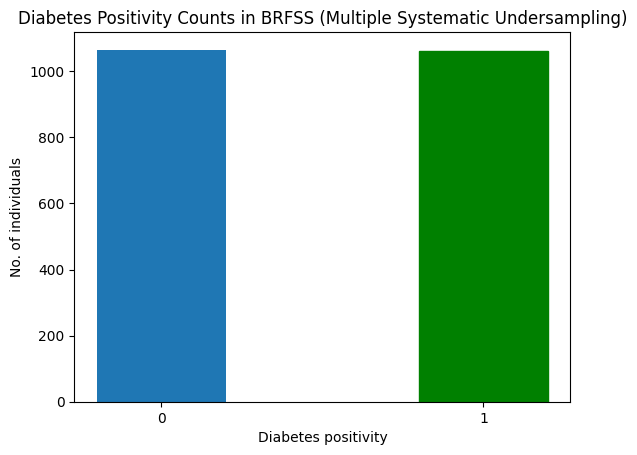

In [295]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Multiple Systematic Undersampling)")
plt.show()

In [296]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (1700, 35)
y_S_train: (1700,)
X_S_test: (425, 35)
y_S_test: (425,)


In [297]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_486"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3402 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3403 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3404 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3405 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3406 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3407 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3408 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - AUC: 0.6175 - loss: 0.6883 - val_AUC: 0.8002 - val_loss: 0.6315
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7966 - loss: 0.5925 - val_AUC: 0.8513 - val_loss: 0.5111
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8559 - loss: 0.4811 - val_AUC: 0.8663 - val_loss: 0.4629
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8591 - loss: 0.4652 - val_AUC: 0.8737 - val_loss: 0.4484
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8759 - loss: 0.4359 - val_AUC: 0.8813 - val_loss: 0.4279
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8944 - loss: 0.4059 - val_AUC: 0.8821 - val_loss: 0.4457
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9122 - loss: 0.3743 - val_AUC: 0.8897 - val_loss: 0.4097
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8996 - loss: 0.3897 - val_AUC: 0.8855 - val_loss: 0.4241
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9169 - loss:

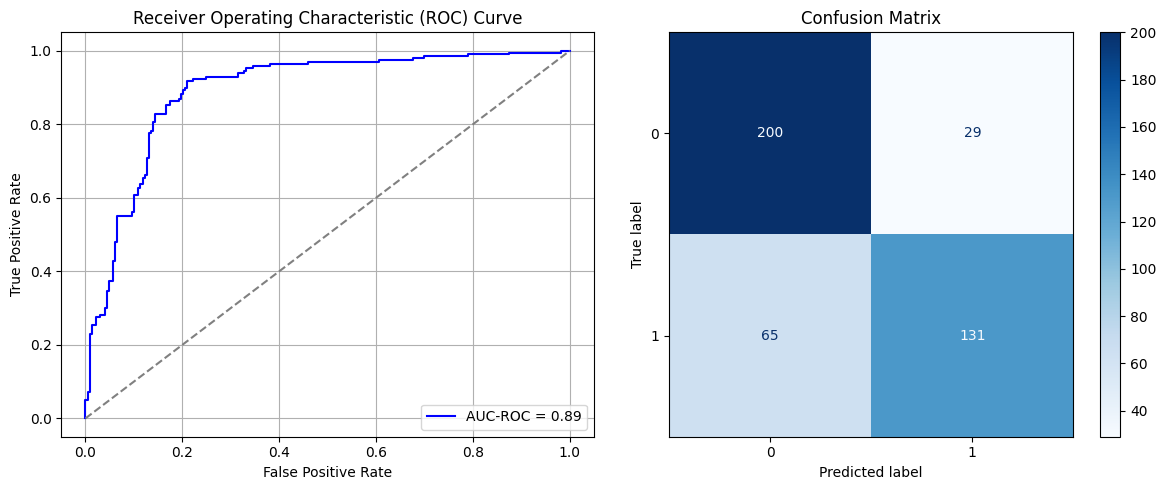

Best threshold based on F1-score: 0.11721090972423553
Time elapsed (performance): 7.415689202000067


<Sequential name=sequential_486, built=True>

In [298]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
AUC-ROC: 0.6177721088435375
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        49
           1       0.56      0.48      0.52        48

    accuracy                           0.56        97
   macro avg       0.56      0.56      0.55        97
weighted avg       0.56      0.56      0.55        97

FPR 0.3673469387755102 TPR: 0.47916666666666663 FNR: 0.5208333333333334 TNR: 0.6326530612244898


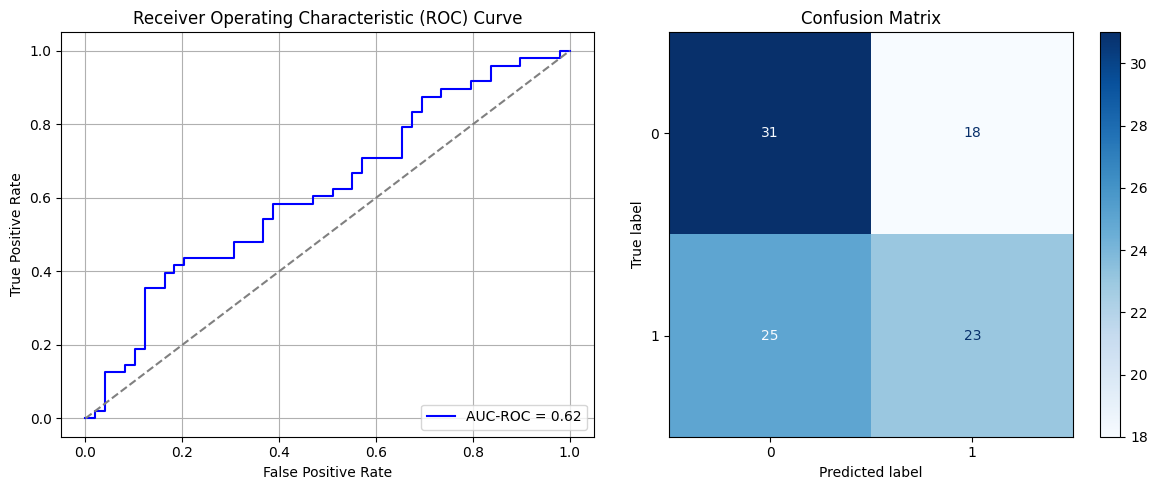

Best threshold based on F1-score: 0.8836636543273926
False Negative Rate: 0.5208333333333334
Time elapsed (performance): 0.44646998300049745


<ipython-input-244-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [299]:
Transductive_TL(model_source_Sy, X_T_test, y_T_test, "Target")

In [300]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_487"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3409 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3410 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3411 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3412 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3413 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3414 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3415 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - AUC: 0.6482 - loss: 1.0307 - val_AUC: 0.5954 - val_loss: 0.9602
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - AUC: 0.6091 - loss: 0.9026 - val_AUC: 0.5939 - val_loss: 0.8567
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6087 - loss: 0.8944 - val_AUC: 0.5921 - val_loss: 0.7830
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6268 - loss: 0.7760 - val_AUC: 0.5950 - val_loss: 0.7302
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6347 - loss: 0.7197 - val_AUC: 0.5991 - val_loss: 0.6907
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6134 - loss: 0.6981 - val_AUC: 0.6036 - val_loss: 0.6631
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6359 - loss: 0.6789 - val_AUC: 0.6061 - val_loss: 0.6467
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6621 - loss: 0.6608 - val_AUC: 0.6095 - val_loss: 0.6387
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6398 - loss: 0.

(np.float64(0.30612244897959184), np.float64(0.5))

In [301]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_488"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3416 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3417 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3418 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3419 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3420 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3421 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3422 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6371 - loss: 0.9210 - val_AUC: 0.0000e+00 - val_loss: 1.6761
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6475 - loss: 0.8400 - val_AUC: 0.0000e+00 - val_loss: 1.5004
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5992 - loss: 0.9019 - val_AUC: 0.0000e+00 - val_loss: 1.3453
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5976 - loss: 0.8143 - val_AUC: 0.0000e+00 - val_loss: 1.2310
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6433 - loss: 0.7006 - val_AUC: 0.0000e+00 - val_loss: 1.1566
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6363 - loss: 0.7076 - val_AUC: 0.0000e+00 - val_loss: 1.0839
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6359 - loss: 0.6633 - val_AUC: 0.0000e+00 - val_loss: 1.0358
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6805 - loss: 0.6326 - val_AUC: 0.0000e+00 - val_loss: 0.9740
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_489"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3423 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3424 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3425 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3426 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3427 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3428 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3429 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - AUC: 0.6545 - loss: 0.9247 - val_AUC: 0.0000e+00 - val_loss: 1.6552
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6299 - loss: 0.9411 - val_AUC: 0.0000e+00 - val_loss: 1.4758
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6367 - loss: 0.8460 - val_AUC: 0.0000e+00 - val_loss: 1.3657
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6619 - loss: 0.7459 - val_AUC: 0.0000e+00 - val_loss: 1.2664
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6674 - loss: 0.7368 - val_AUC: 0.0000e+00 - val_loss: 1.1795
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6683 - loss: 0.6740 - val_AUC: 0.0000e+00 - val_loss: 1.1094
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6642 - loss: 0.6463 - val_AUC: 0.0000e+00 - val_loss: 1.0646
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6975 - loss: 0.6257 - val_AUC: 0.0000e+00 - val_loss: 1.0016
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_490"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3430 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3431 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3432 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3433 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3434 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3435 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3436 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6803 - loss: 0.8469 - val_AUC: 0.0000e+00 - val_loss: 1.6887
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6821 - loss: 0.8328 - val_AUC: 0.0000e+00 - val_loss: 1.4634
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6469 - loss: 0.7817 - val_AUC: 0.0000e+00 - val_loss: 1.3301
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6486 - loss: 0.7746 - val_AUC: 0.0000e+00 - val_loss: 1.2122
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6517 - loss: 0.7186 - val_AUC: 0.0000e+00 - val_loss: 1.1128
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6619 - loss: 0.6892 - val_AUC: 0.0000e+00 - val_loss: 1.0550
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6364 - loss: 0.6809 - val_AUC: 0.0000e+00 - val_loss: 1.0156
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6369 - loss: 0.6497 - val_AUC: 0.0000e+00 - val_loss: 0.9966
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_491"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3437 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3438 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3439 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3440 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3441 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3442 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3443 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6360 - loss: 1.0147 - val_AUC: 0.0000e+00 - val_loss: 1.6288
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6535 - loss: 0.8138 - val_AUC: 0.0000e+00 - val_loss: 1.4767
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6842 - loss: 0.7592 - val_AUC: 0.0000e+00 - val_loss: 1.3086
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6347 - loss: 0.7612 - val_AUC: 0.0000e+00 - val_loss: 1.1984
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6589 - loss: 0.7259 - val_AUC: 0.0000e+00 - val_loss: 1.1163
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6367 - loss: 0.7058 - val_AUC: 0.0000e+00 - val_loss: 1.0737
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6301 - loss: 0.6921 - val_AUC: 0.0000e+00 - val_loss: 1.0261
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6634 - loss: 0.6372 - val_AUC: 0.0000e+00 - val_loss: 0.9657
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_492"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3444 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3445 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3446 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3447 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3448 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3449 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3450 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - AUC: 0.6239 - loss: 0.9228 - val_AUC: 0.0000e+00 - val_loss: 1.6391
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.7045 - loss: 0.7408 - val_AUC: 0.0000e+00 - val_loss: 1.4732
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6747 - loss: 0.7467 - val_AUC: 0.0000e+00 - val_loss: 1.3638
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6167 - loss: 0.8187 - val_AUC: 0.0000e+00 - val_loss: 1.2613
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6914 - loss: 0.6533 - val_AUC: 0.0000e+00 - val_loss: 1.1669
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6515 - loss: 0.6932 - val_AUC: 0.0000e+00 - val_loss: 1.0826
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6671 - loss: 0.6524 - val_AUC: 0.0000e+00 - val_loss: 1.0312
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5976 - loss: 0.7012 - val_AUC: 0.0000e+00 - val_loss: 0.9815
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_493"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3451 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3452 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3453 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3454 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3455 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3456 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3457 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6291 - loss: 0.9259 - val_AUC: 0.0000e+00 - val_loss: 1.7370
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6602 - loss: 0.8542 - val_AUC: 0.0000e+00 - val_loss: 1.5371
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6211 - loss: 0.8682 - val_AUC: 0.0000e+00 - val_loss: 1.3643
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6139 - loss: 0.7947 - val_AUC: 0.0000e+00 - val_loss: 1.2640
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6677 - loss: 0.6989 - val_AUC: 0.0000e+00 - val_loss: 1.1714
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6564 - loss: 0.6918 - val_AUC: 0.0000e+00 - val_loss: 1.1050
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6526 - loss: 0.6644 - val_AUC: 0.0000e+00 - val_loss: 1.0450
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6571 - loss: 0.6437 - val_AUC: 0.0000e+00 - val_loss: 0.9984
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_494"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3458 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3459 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3460 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3461 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3462 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3463 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3464 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6773 - loss: 0.8678 - val_AUC: 0.0000e+00 - val_loss: 1.6512
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6529 - loss: 0.7956 - val_AUC: 0.0000e+00 - val_loss: 1.4810
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6517 - loss: 0.7964 - val_AUC: 0.0000e+00 - val_loss: 1.3195
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6273 - loss: 0.7777 - val_AUC: 0.0000e+00 - val_loss: 1.2028
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6247 - loss: 0.7389 - val_AUC: 0.0000e+00 - val_loss: 1.1109
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6569 - loss: 0.6638 - val_AUC: 0.0000e+00 - val_loss: 1.0556
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6618 - loss: 0.6690 - val_AUC: 0.0000e+00 - val_loss: 1.0051
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6556 - loss: 0.6404 - val_AUC: 0.0000e+00 - val_loss: 0.9798
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_495"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3465 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3466 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3467 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3468 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3469 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3470 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3471 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6334 - loss: 0.9437 - val_AUC: 0.0000e+00 - val_loss: 1.6517
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6585 - loss: 0.8648 - val_AUC: 0.0000e+00 - val_loss: 1.4690
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6611 - loss: 0.7690 - val_AUC: 0.0000e+00 - val_loss: 1.3537
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6350 - loss: 0.7734 - val_AUC: 0.0000e+00 - val_loss: 1.2531
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6419 - loss: 0.7338 - val_AUC: 0.0000e+00 - val_loss: 1.1508
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6715 - loss: 0.6554 - val_AUC: 0.0000e+00 - val_loss: 1.0955
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6618 - loss: 0.6499 - val_AUC: 0.0000e+00 - val_loss: 1.0437
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6691 - loss: 0.6234 - val_AUC: 0.0000e+00 - val_loss: 0.9893
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_496"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3472 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3473 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3474 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3475 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3476 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3477 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3478 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.6581 - loss: 0.9180 - val_AUC: 0.0000e+00 - val_loss: 1.6843
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6611 - loss: 0.8218 - val_AUC: 0.0000e+00 - val_loss: 1.4860
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6804 - loss: 0.7246 - val_AUC: 0.0000e+00 - val_loss: 1.3544
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6293 - loss: 0.7666 - val_AUC: 0.0000e+00 - val_loss: 1.2420
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6190 - loss: 0.7431 - val_AUC: 0.0000e+00 - val_loss: 1.1551
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6228 - loss: 0.7203 - val_AUC: 0.0000e+00 - val_loss: 1.0751
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6494 - loss: 0.6466 - val_AUC: 0.0000e+00 - val_loss: 1.0231
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6539 - loss: 0.6340 - val_AUC: 0.0000e+00 - val_loss: 0.9993
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_497"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3479 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3480 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3481 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3482 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3483 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3484 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3485 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6452 - loss: 0.9765 - val_AUC: 0.0000e+00 - val_loss: 1.6688
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6929 - loss: 0.7744 - val_AUC: 0.0000e+00 - val_loss: 1.5207
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6250 - loss: 0.8081 - val_AUC: 0.0000e+00 - val_loss: 1.4036
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6657 - loss: 0.7363 - val_AUC: 0.0000e+00 - val_loss: 1.2783
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6687 - loss: 0.6887 - val_AUC: 0.0000e+00 - val_loss: 1.1690
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6342 - loss: 0.6939 - val_AUC: 0.0000e+00 - val_loss: 1.1022
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6373 - loss: 0.6785 - val_AUC: 0.0000e+00 - val_loss: 1.0364
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6686 - loss: 0.6415 - val_AUC: 0.0000e+00 - val_loss: 0.9865
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_498"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3486 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3487 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3488 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3489 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3490 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3491 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3492 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - AUC: 0.6522 - loss: 0.9304 - val_AUC: 0.0000e+00 - val_loss: 1.7041
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - AUC: 0.6381 - loss: 0.8628 - val_AUC: 0.0000e+00 - val_loss: 1.5350
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6613 - loss: 0.8032 - val_AUC: 0.0000e+00 - val_loss: 1.3341
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6516 - loss: 0.7299 - val_AUC: 0.0000e+00 - val_loss: 1.2268
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6622 - loss: 0.7070 - val_AUC: 0.0000e+00 - val_loss: 1.1414
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5710 - loss: 0.7529 - val_AUC: 0.0000e+00 - val_loss: 1.0725
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6805 - loss: 0.6457 - val_AUC: 0.0000e+00 - val_loss: 1.0358
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6296 - loss: 0.6602 - val_AUC: 0.0000e+00 - val_loss: 1.0017
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_499"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3493 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3494 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3495 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3496 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3497 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3498 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3499 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.6777 - loss: 0.8549 - val_AUC: 0.0000e+00 - val_loss: 1.7026
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6087 - loss: 0.9880 - val_AUC: 0.0000e+00 - val_loss: 1.5181
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6285 - loss: 0.8894 - val_AUC: 0.0000e+00 - val_loss: 1.3789
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6575 - loss: 0.7666 - val_AUC: 0.0000e+00 - val_loss: 1.2981
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6542 - loss: 0.7229 - val_AUC: 0.0000e+00 - val_loss: 1.2331
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6583 - loss: 0.7020 - val_AUC: 0.0000e+00 - val_loss: 1.1476
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6167 - loss: 0.7370 - val_AUC: 0.0000e+00 - val_loss: 1.0734
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6423 - loss: 0.6867 - val_AUC: 0.0000e+00 - val_loss: 1.0209
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_500"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3500 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3501 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3502 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3503 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3504 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3505 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3506 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6511 - loss: 0.9293 - val_AUC: 0.0000e+00 - val_loss: 1.6438
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6213 - loss: 0.9034 - val_AUC: 0.0000e+00 - val_loss: 1.4678
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6356 - loss: 0.8277 - val_AUC: 0.0000e+00 - val_loss: 1.3386
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6127 - loss: 0.7880 - val_AUC: 0.0000e+00 - val_loss: 1.2414
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6332 - loss: 0.7301 - val_AUC: 0.0000e+00 - val_loss: 1.1473
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6867 - loss: 0.6621 - val_AUC: 0.0000e+00 - val_loss: 1.0504
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6327 - loss: 0.7050 - val_AUC: 0.0000e+00 - val_loss: 0.9979
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6659 - loss: 0.6290 - val_AUC: 0.0000e+00 - val_loss: 0.9837
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_501"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3507 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3508 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3509 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3510 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3511 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3512 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3513 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - AUC: 0.6387 - loss: 0.9077 - val_AUC: 0.0000e+00 - val_loss: 1.6510
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6948 - loss: 0.8071 - val_AUC: 0.0000e+00 - val_loss: 1.4694
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6681 - loss: 0.7800 - val_AUC: 0.0000e+00 - val_loss: 1.3242
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6886 - loss: 0.6578 - val_AUC: 0.0000e+00 - val_loss: 1.2314
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6294 - loss: 0.7428 - val_AUC: 0.0000e+00 - val_loss: 1.1285
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6645 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 1.0522
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6819 - loss: 0.6417 - val_AUC: 0.0000e+00 - val_loss: 1.0070
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6306 - loss: 0.6624 - val_AUC: 0.0000e+00 - val_loss: 0.9778
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_502"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3514 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3515 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3516 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3517 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3518 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3519 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3520 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6649 - loss: 0.8584 - val_AUC: 0.0000e+00 - val_loss: 1.8012
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6354 - loss: 0.8627 - val_AUC: 0.0000e+00 - val_loss: 1.5680
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6520 - loss: 0.8660 - val_AUC: 0.0000e+00 - val_loss: 1.3676
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6298 - loss: 0.7959 - val_AUC: 0.0000e+00 - val_loss: 1.2477
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6344 - loss: 0.7171 - val_AUC: 0.0000e+00 - val_loss: 1.1696
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6593 - loss: 0.7285 - val_AUC: 0.0000e+00 - val_loss: 1.0954
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6657 - loss: 0.6585 - val_AUC: 0.0000e+00 - val_loss: 1.0413
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6360 - loss: 0.6932 - val_AUC: 0.0000e+00 - val_loss: 1.0077
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_503"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3521 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3522 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3523 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3524 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3525 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3526 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3527 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6452 - loss: 0.8903 - val_AUC: 0.0000e+00 - val_loss: 1.6630
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5784 - loss: 0.9771 - val_AUC: 0.0000e+00 - val_loss: 1.4575
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.7052 - loss: 0.7542 - val_AUC: 0.0000e+00 - val_loss: 1.3158
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6493 - loss: 0.7495 - val_AUC: 0.0000e+00 - val_loss: 1.2125
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6490 - loss: 0.7049 - val_AUC: 0.0000e+00 - val_loss: 1.1410
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6530 - loss: 0.6784 - val_AUC: 0.0000e+00 - val_loss: 1.0634
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6675 - loss: 0.6533 - val_AUC: 0.0000e+00 - val_loss: 0.9983
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6404 - loss: 0.6442 - val_AUC: 0.0000e+00 - val_loss: 0.9781
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_504"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3528 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3529 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3530 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3531 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3532 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3533 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3534 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6470 - loss: 0.8995 - val_AUC: 0.0000e+00 - val_loss: 1.6600
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6408 - loss: 0.8922 - val_AUC: 0.0000e+00 - val_loss: 1.4716
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6068 - loss: 0.8333 - val_AUC: 0.0000e+00 - val_loss: 1.3402
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6340 - loss: 0.7986 - val_AUC: 0.0000e+00 - val_loss: 1.2229
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6738 - loss: 0.6713 - val_AUC: 0.0000e+00 - val_loss: 1.1640
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6906 - loss: 0.6433 - val_AUC: 0.0000e+00 - val_loss: 1.1001
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6651 - loss: 0.6586 - val_AUC: 0.0000e+00 - val_loss: 1.0290
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.6733 - loss: 0.6333 - val_AUC: 0.0000e+00 - val_loss: 0.9785
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.7

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_505"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3535 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3536 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3537 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3538 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3539 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3540 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3541 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6238 - loss: 1.0434 - val_AUC: 0.0000e+00 - val_loss: 1.6446
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6613 - loss: 0.8151 - val_AUC: 0.0000e+00 - val_loss: 1.5302
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6721 - loss: 0.7700 - val_AUC: 0.0000e+00 - val_loss: 1.3840
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6994 - loss: 0.6800 - val_AUC: 0.0000e+00 - val_loss: 1.3059
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6548 - loss: 0.7318 - val_AUC: 0.0000e+00 - val_loss: 1.1895
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6280 - loss: 0.7393 - val_AUC: 0.0000e+00 - val_loss: 1.1132
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6878 - loss: 0.6285 - val_AUC: 0.0000e+00 - val_loss: 1.0653
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6855 - loss: 0.6452 - val_AUC: 0.0000e+00 - val_loss: 1.0092
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_506"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3542 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3543 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3544 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3545 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3546 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3547 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3548 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6363 - loss: 0.9458 - val_AUC: 0.0000e+00 - val_loss: 1.6709
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6924 - loss: 0.7826 - val_AUC: 0.0000e+00 - val_loss: 1.4943
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6107 - loss: 0.8004 - val_AUC: 0.0000e+00 - val_loss: 1.3480
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6184 - loss: 0.7947 - val_AUC: 0.0000e+00 - val_loss: 1.2128
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6051 - loss: 0.7470 - val_AUC: 0.0000e+00 - val_loss: 1.1414
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6286 - loss: 0.6909 - val_AUC: 0.0000e+00 - val_loss: 1.0748
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6767 - loss: 0.6218 - val_AUC: 0.0000e+00 - val_loss: 1.0467
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6795 - loss: 0.6160 - val_AUC: 0.0000e+00 - val_loss: 0.9962
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_507"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3549 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3550 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3551 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3552 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3553 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3554 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3555 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6598 - loss: 0.8691 - val_AUC: 0.0000e+00 - val_loss: 1.6920
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6478 - loss: 0.8568 - val_AUC: 0.0000e+00 - val_loss: 1.4806
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6306 - loss: 0.7952 - val_AUC: 0.0000e+00 - val_loss: 1.3249
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6463 - loss: 0.7574 - val_AUC: 0.0000e+00 - val_loss: 1.2001
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6690 - loss: 0.6754 - val_AUC: 0.0000e+00 - val_loss: 1.1217
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6343 - loss: 0.6950 - val_AUC: 0.0000e+00 - val_loss: 1.0576
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6352 - loss: 0.6727 - val_AUC: 0.0000e+00 - val_loss: 1.0177
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6378 - loss: 0.6596 - val_AUC: 0.0000e+00 - val_loss: 0.9799
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_508"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3556 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3557 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3558 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3559 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3560 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3561 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3562 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.6497 - loss: 0.9518 - val_AUC: 0.0000e+00 - val_loss: 1.6250
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6698 - loss: 0.8300 - val_AUC: 0.0000e+00 - val_loss: 1.4574
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6513 - loss: 0.7932 - val_AUC: 0.0000e+00 - val_loss: 1.3181
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6319 - loss: 0.7815 - val_AUC: 0.0000e+00 - val_loss: 1.2134
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6589 - loss: 0.6976 - val_AUC: 0.0000e+00 - val_loss: 1.1232
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6821 - loss: 0.6449 - val_AUC: 0.0000e+00 - val_loss: 1.0466
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6388 - loss: 0.6907 - val_AUC: 0.0000e+00 - val_loss: 0.9845
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6573 - loss: 0.6730 - val_AUC: 0.0000e+00 - val_loss: 0.9457
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_509"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3563 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3564 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3565 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3566 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3567 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3568 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3569 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - AUC: 0.6669 - loss: 0.8934 - val_AUC: 0.0000e+00 - val_loss: 1.6283
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6689 - loss: 0.8223 - val_AUC: 0.0000e+00 - val_loss: 1.4763
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6235 - loss: 0.8849 - val_AUC: 0.0000e+00 - val_loss: 1.3443
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6313 - loss: 0.7877 - val_AUC: 0.0000e+00 - val_loss: 1.2300
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6374 - loss: 0.7122 - val_AUC: 0.0000e+00 - val_loss: 1.1410
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6656 - loss: 0.6846 - val_AUC: 0.0000e+00 - val_loss: 1.0541
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6438 - loss: 0.6668 - val_AUC: 0.0000e+00 - val_loss: 1.0168
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6369 - loss: 0.6556 - val_AUC: 0.0000e+00 - val_loss: 0.9904
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_510"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3570 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3571 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3572 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3573 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3574 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3575 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3576 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6891 - loss: 0.8361 - val_AUC: 0.0000e+00 - val_loss: 1.6202
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6575 - loss: 0.8542 - val_AUC: 0.0000e+00 - val_loss: 1.4403
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6675 - loss: 0.7440 - val_AUC: 0.0000e+00 - val_loss: 1.3632
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6334 - loss: 0.7896 - val_AUC: 0.0000e+00 - val_loss: 1.2752
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6721 - loss: 0.6973 - val_AUC: 0.0000e+00 - val_loss: 1.1910
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6647 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 1.1183
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6185 - loss: 0.6998 - val_AUC: 0.0000e+00 - val_loss: 1.0455
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6160 - loss: 0.6840 - val_AUC: 0.0000e+00 - val_loss: 1.0014
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_511"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3577 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3578 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3579 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3580 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3581 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3582 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3583 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.6923 - loss: 0.8815 - val_AUC: 0.0000e+00 - val_loss: 1.7260
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6417 - loss: 0.8754 - val_AUC: 0.0000e+00 - val_loss: 1.5283
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6163 - loss: 0.8939 - val_AUC: 0.0000e+00 - val_loss: 1.3582
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6034 - loss: 0.8570 - val_AUC: 0.0000e+00 - val_loss: 1.2641
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6241 - loss: 0.7734 - val_AUC: 0.0000e+00 - val_loss: 1.1483
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6055 - loss: 0.7015 - val_AUC: 0.0000e+00 - val_loss: 1.1003
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6597 - loss: 0.6534 - val_AUC: 0.0000e+00 - val_loss: 1.0351
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6560 - loss: 0.6430 - val_AUC: 0.0000e+00 - val_loss: 1.0061
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_512"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3584 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3585 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3586 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3587 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3588 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3589 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3590 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - AUC: 0.6341 - loss: 0.9110 - val_AUC: 0.0000e+00 - val_loss: 1.6284
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6164 - loss: 0.9433 - val_AUC: 0.0000e+00 - val_loss: 1.4991
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6484 - loss: 0.7976 - val_AUC: 0.0000e+00 - val_loss: 1.3817
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6371 - loss: 0.7695 - val_AUC: 0.0000e+00 - val_loss: 1.2754
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6429 - loss: 0.7314 - val_AUC: 0.0000e+00 - val_loss: 1.1676
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5982 - loss: 0.7616 - val_AUC: 0.0000e+00 - val_loss: 1.0708
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6395 - loss: 0.6860 - val_AUC: 0.0000e+00 - val_loss: 1.0190
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6380 - loss: 0.6580 - val_AUC: 0.0000e+00 - val_loss: 0.9883
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_513"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3591 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3592 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3593 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3594 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3595 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3596 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3597 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6942 - loss: 0.8461 - val_AUC: 0.0000e+00 - val_loss: 1.6854
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6628 - loss: 0.8391 - val_AUC: 0.0000e+00 - val_loss: 1.5097
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6435 - loss: 0.7776 - val_AUC: 0.0000e+00 - val_loss: 1.3683
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6441 - loss: 0.7598 - val_AUC: 0.0000e+00 - val_loss: 1.2446
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6619 - loss: 0.6898 - val_AUC: 0.0000e+00 - val_loss: 1.1640
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6673 - loss: 0.6710 - val_AUC: 0.0000e+00 - val_loss: 1.0916
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6520 - loss: 0.6654 - val_AUC: 0.0000e+00 - val_loss: 1.0421
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6391 - loss: 0.6717 - val_AUC: 0.0000e+00 - val_loss: 1.0093
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_514"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3598 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3599 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3600 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3601 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3602 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3603 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3604 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - AUC: 0.5997 - loss: 1.0479 - val_AUC: 0.0000e+00 - val_loss: 1.6908
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6451 - loss: 0.8878 - val_AUC: 0.0000e+00 - val_loss: 1.5095
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6114 - loss: 0.8337 - val_AUC: 0.0000e+00 - val_loss: 1.3698
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6006 - loss: 0.8333 - val_AUC: 0.0000e+00 - val_loss: 1.2473
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6889 - loss: 0.6861 - val_AUC: 0.0000e+00 - val_loss: 1.1540
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5987 - loss: 0.7428 - val_AUC: 0.0000e+00 - val_loss: 1.0756
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6450 - loss: 0.6895 - val_AUC: 0.0000e+00 - val_loss: 1.0152
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6646 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 0.9889
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_515"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3605 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3606 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3607 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3608 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3609 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3610 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3611 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.6182 - loss: 1.0156 - val_AUC: 0.0000e+00 - val_loss: 1.6513
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6192 - loss: 0.8815 - val_AUC: 0.0000e+00 - val_loss: 1.4551
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6089 - loss: 0.8616 - val_AUC: 0.0000e+00 - val_loss: 1.3032
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6233 - loss: 0.8121 - val_AUC: 0.0000e+00 - val_loss: 1.1665
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6084 - loss: 0.7662 - val_AUC: 0.0000e+00 - val_loss: 1.0949
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6970 - loss: 0.6333 - val_AUC: 0.0000e+00 - val_loss: 1.0474
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6921 - loss: 0.6214 - val_AUC: 0.0000e+00 - val_loss: 1.0064
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6592 - loss: 0.6185 - val_AUC: 0.0000e+00 - val_loss: 0.9740
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_516"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3612 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3613 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3614 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3615 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3616 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3617 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3618 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6735 - loss: 0.8407 - val_AUC: 0.0000e+00 - val_loss: 1.6190
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6710 - loss: 0.8385 - val_AUC: 0.0000e+00 - val_loss: 1.4166
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6544 - loss: 0.8085 - val_AUC: 0.0000e+00 - val_loss: 1.2820
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6036 - loss: 0.7975 - val_AUC: 0.0000e+00 - val_loss: 1.1968
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6858 - loss: 0.6634 - val_AUC: 0.0000e+00 - val_loss: 1.1237
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6750 - loss: 0.6501 - val_AUC: 0.0000e+00 - val_loss: 1.0482
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6801 - loss: 0.6426 - val_AUC: 0.0000e+00 - val_loss: 0.9711
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6217 - loss: 0.6730 - val_AUC: 0.0000e+00 - val_loss: 0.9378
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_517"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3619 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3620 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3621 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3622 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3623 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3624 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3625 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - AUC: 0.6781 - loss: 0.8649 - val_AUC: 0.0000e+00 - val_loss: 1.6715
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.6275 - loss: 0.8759 - val_AUC: 0.0000e+00 - val_loss: 1.4689
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6307 - loss: 0.8114 - val_AUC: 0.0000e+00 - val_loss: 1.3659
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6681 - loss: 0.7094 - val_AUC: 0.0000e+00 - val_loss: 1.2554
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6799 - loss: 0.6898 - val_AUC: 0.0000e+00 - val_loss: 1.1611
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5921 - loss: 0.7608 - val_AUC: 0.0000e+00 - val_loss: 1.0619
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6338 - loss: 0.6896 - val_AUC: 0.0000e+00 - val_loss: 1.0221
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6535 - loss: 0.6354 - val_AUC: 0.0000e+00 - val_loss: 0.9906
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_518"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3626 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3627 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3628 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3629 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3630 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3631 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3632 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.6461 - loss: 0.8449 - val_AUC: 0.0000e+00 - val_loss: 1.6982
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6059 - loss: 0.9353 - val_AUC: 0.0000e+00 - val_loss: 1.4940
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6509 - loss: 0.8461 - val_AUC: 0.0000e+00 - val_loss: 1.3043
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6414 - loss: 0.7486 - val_AUC: 0.0000e+00 - val_loss: 1.1922
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6207 - loss: 0.7146 - val_AUC: 0.0000e+00 - val_loss: 1.1181
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6331 - loss: 0.6960 - val_AUC: 0.0000e+00 - val_loss: 1.0509
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6311 - loss: 0.6720 - val_AUC: 0.0000e+00 - val_loss: 1.0017
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6952 - loss: 0.6070 - val_AUC: 0.0000e+00 - val_loss: 0.9824
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_519"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3633 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3634 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3635 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3636 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3637 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3638 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3639 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - AUC: 0.6602 - loss: 0.9526 - val_AUC: 0.0000e+00 - val_loss: 1.6642
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6604 - loss: 0.8501 - val_AUC: 0.0000e+00 - val_loss: 1.4664
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6434 - loss: 0.7861 - val_AUC: 0.0000e+00 - val_loss: 1.3370
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6504 - loss: 0.7440 - val_AUC: 0.0000e+00 - val_loss: 1.2342
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6362 - loss: 0.7005 - val_AUC: 0.0000e+00 - val_loss: 1.1167
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5925 - loss: 0.7389 - val_AUC: 0.0000e+00 - val_loss: 1.0273
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6614 - loss: 0.6565 - val_AUC: 0.0000e+00 - val_loss: 0.9955
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6393 - loss: 0.6625 - val_AUC: 0.0000e+00 - val_loss: 0.9751
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_520"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3640 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3641 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3642 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3643 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3644 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3645 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3646 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - AUC: 0.6505 - loss: 0.9235 - val_AUC: 0.0000e+00 - val_loss: 1.6638
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.6716 - loss: 0.7929 - val_AUC: 0.0000e+00 - val_loss: 1.4507
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6315 - loss: 0.8243 - val_AUC: 0.0000e+00 - val_loss: 1.2920
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6456 - loss: 0.7546 - val_AUC: 0.0000e+00 - val_loss: 1.1855
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6337 - loss: 0.7279 - val_AUC: 0.0000e+00 - val_loss: 1.0909
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6533 - loss: 0.6477 - val_AUC: 0.0000e+00 - val_loss: 1.0238
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5867 - loss: 0.7137 - val_AUC: 0.0000e+00 - val_loss: 0.9783
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6387 - loss: 0.6511 - val_AUC: 0.0000e+00 - val_loss: 0.9483
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_521"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3647 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3648 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3649 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3650 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3651 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3652 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3653 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.6267 - loss: 1.0211 - val_AUC: 0.0000e+00 - val_loss: 1.6944
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6221 - loss: 0.8902 - val_AUC: 0.0000e+00 - val_loss: 1.5318
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6487 - loss: 0.7788 - val_AUC: 0.0000e+00 - val_loss: 1.3977
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6325 - loss: 0.7807 - val_AUC: 0.0000e+00 - val_loss: 1.2613
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6448 - loss: 0.7322 - val_AUC: 0.0000e+00 - val_loss: 1.1644
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6735 - loss: 0.6830 - val_AUC: 0.0000e+00 - val_loss: 1.0916
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6545 - loss: 0.6669 - val_AUC: 0.0000e+00 - val_loss: 1.0314
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6381 - loss: 0.6727 - val_AUC: 0.0000e+00 - val_loss: 1.0056
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_522"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3654 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3655 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3656 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3657 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3658 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3659 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3660 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6339 - loss: 0.9254 - val_AUC: 0.0000e+00 - val_loss: 1.6782
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6752 - loss: 0.7851 - val_AUC: 0.0000e+00 - val_loss: 1.4362
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6360 - loss: 0.7881 - val_AUC: 0.0000e+00 - val_loss: 1.3021
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6587 - loss: 0.7758 - val_AUC: 0.0000e+00 - val_loss: 1.1642
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6118 - loss: 0.7530 - val_AUC: 0.0000e+00 - val_loss: 1.0876
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6326 - loss: 0.6945 - val_AUC: 0.0000e+00 - val_loss: 1.0416
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6758 - loss: 0.6242 - val_AUC: 0.0000e+00 - val_loss: 1.0102
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.7043 - loss: 0.5939 - val_AUC: 0.0000e+00 - val_loss: 0.9778
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_523"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3661 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3662 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3663 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3664 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3665 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3666 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3667 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - AUC: 0.6560 - loss: 0.9097 - val_AUC: 0.0000e+00 - val_loss: 1.7622
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6644 - loss: 0.8188 - val_AUC: 0.0000e+00 - val_loss: 1.5548
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6784 - loss: 0.7634 - val_AUC: 0.0000e+00 - val_loss: 1.3740
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6319 - loss: 0.7985 - val_AUC: 0.0000e+00 - val_loss: 1.2405
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6372 - loss: 0.7756 - val_AUC: 0.0000e+00 - val_loss: 1.1587
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6441 - loss: 0.6895 - val_AUC: 0.0000e+00 - val_loss: 1.1081
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6580 - loss: 0.6515 - val_AUC: 0.0000e+00 - val_loss: 1.0720
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6496 - loss: 0.6847 - val_AUC: 0.0000e+00 - val_loss: 1.0217
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_524"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3668 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3669 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3670 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3671 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3672 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3673 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3674 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6280 - loss: 1.0006 - val_AUC: 0.0000e+00 - val_loss: 1.6249
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6319 - loss: 0.8778 - val_AUC: 0.0000e+00 - val_loss: 1.4644
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6396 - loss: 0.8444 - val_AUC: 0.0000e+00 - val_loss: 1.3244
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6047 - loss: 0.8219 - val_AUC: 0.0000e+00 - val_loss: 1.2239
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6429 - loss: 0.6905 - val_AUC: 0.0000e+00 - val_loss: 1.1340
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6008 - loss: 0.7394 - val_AUC: 0.0000e+00 - val_loss: 1.0503
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6458 - loss: 0.6599 - val_AUC: 0.0000e+00 - val_loss: 0.9917
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6781 - loss: 0.6292 - val_AUC: 0.0000e+00 - val_loss: 0.9634
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_525"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3675 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3676 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3677 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3678 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3679 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3680 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3681 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - AUC: 0.6442 - loss: 0.9501 - val_AUC: 0.0000e+00 - val_loss: 1.6295
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6534 - loss: 0.8798 - val_AUC: 0.0000e+00 - val_loss: 1.4740
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6319 - loss: 0.8702 - val_AUC: 0.0000e+00 - val_loss: 1.3229
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6615 - loss: 0.7327 - val_AUC: 0.0000e+00 - val_loss: 1.2537
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6166 - loss: 0.7377 - val_AUC: 0.0000e+00 - val_loss: 1.1662
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6090 - loss: 0.7386 - val_AUC: 0.0000e+00 - val_loss: 1.0654
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6768 - loss: 0.6497 - val_AUC: 0.0000e+00 - val_loss: 1.0032
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6731 - loss: 0.6252 - val_AUC: 0.0000e+00 - val_loss: 0.9864
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_526"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3682 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3683 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3684 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3685 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3686 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3687 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3688 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - AUC: 0.6305 - loss: 1.0090 - val_AUC: 0.0000e+00 - val_loss: 1.6150
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6504 - loss: 0.8565 - val_AUC: 0.0000e+00 - val_loss: 1.5196
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6486 - loss: 0.8018 - val_AUC: 0.0000e+00 - val_loss: 1.3973
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6638 - loss: 0.7710 - val_AUC: 0.0000e+00 - val_loss: 1.2934
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6983 - loss: 0.6612 - val_AUC: 0.0000e+00 - val_loss: 1.2137
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6053 - loss: 0.7366 - val_AUC: 0.0000e+00 - val_loss: 1.1287
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6541 - loss: 0.6706 - val_AUC: 0.0000e+00 - val_loss: 1.0569
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6690 - loss: 0.6464 - val_AUC: 0.0000e+00 - val_loss: 0.9961
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_527"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3689 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3690 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3691 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3692 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3693 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3694 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3695 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.6724 - loss: 0.8532 - val_AUC: 0.0000e+00 - val_loss: 1.6389
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6302 - loss: 0.9364 - val_AUC: 0.0000e+00 - val_loss: 1.4283
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6541 - loss: 0.7591 - val_AUC: 0.0000e+00 - val_loss: 1.3038
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6361 - loss: 0.7568 - val_AUC: 0.0000e+00 - val_loss: 1.2027
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6075 - loss: 0.7489 - val_AUC: 0.0000e+00 - val_loss: 1.1061
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6652 - loss: 0.6582 - val_AUC: 0.0000e+00 - val_loss: 1.0421
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5882 - loss: 0.7403 - val_AUC: 0.0000e+00 - val_loss: 0.9923
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6289 - loss: 0.6933 - val_AUC: 0.0000e+00 - val_loss: 0.9486
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_528"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3696 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3697 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3698 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3699 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3700 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3701 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3702 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - AUC: 0.6607 - loss: 0.9126 - val_AUC: 0.0000e+00 - val_loss: 1.6479
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6326 - loss: 0.8916 - val_AUC: 0.0000e+00 - val_loss: 1.4680
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6796 - loss: 0.7336 - val_AUC: 0.0000e+00 - val_loss: 1.3824
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6237 - loss: 0.8224 - val_AUC: 0.0000e+00 - val_loss: 1.2532
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6772 - loss: 0.6901 - val_AUC: 0.0000e+00 - val_loss: 1.1929
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6428 - loss: 0.7071 - val_AUC: 0.0000e+00 - val_loss: 1.1116
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6669 - loss: 0.6562 - val_AUC: 0.0000e+00 - val_loss: 1.0592
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6292 - loss: 0.6807 - val_AUC: 0.0000e+00 - val_loss: 1.0246
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_529"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3703 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3704 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3705 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3706 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3707 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3708 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3709 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - AUC: 0.6392 - loss: 1.0011 - val_AUC: 0.0000e+00 - val_loss: 1.7129
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - AUC: 0.6749 - loss: 0.8001 - val_AUC: 0.0000e+00 - val_loss: 1.5232
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6578 - loss: 0.8147 - val_AUC: 0.0000e+00 - val_loss: 1.3453
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6596 - loss: 0.7673 - val_AUC: 0.0000e+00 - val_loss: 1.2325
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6640 - loss: 0.7317 - val_AUC: 0.0000e+00 - val_loss: 1.1376
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6152 - loss: 0.7043 - val_AUC: 0.0000e+00 - val_loss: 1.0823
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6157 - loss: 0.6842 - val_AUC: 0.0000e+00 - val_loss: 1.0314
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6780 - loss: 0.6339 - val_AUC: 0.0000e+00 - val_loss: 0.9810
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_530"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3710 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3711 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3712 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3713 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3714 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3715 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3716 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - AUC: 0.6409 - loss: 0.8923 - val_AUC: 0.0000e+00 - val_loss: 1.6085
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6932 - loss: 0.7537 - val_AUC: 0.0000e+00 - val_loss: 1.4720
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6100 - loss: 0.8615 - val_AUC: 0.0000e+00 - val_loss: 1.3152
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6299 - loss: 0.7791 - val_AUC: 0.0000e+00 - val_loss: 1.2239
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.6490 - loss: 0.7392 - val_AUC: 0.0000e+00 - val_loss: 1.1264
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6266 - loss: 0.7002 - val_AUC: 0.0000e+00 - val_loss: 1.0621
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6356 - loss: 0.6684 - val_AUC: 0.0000e+00 - val_loss: 1.0212
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6803 - loss: 0.6516 - val_AUC: 0.0000e+00 - val_loss: 0.9779
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_531"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3717 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3718 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3719 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3720 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3721 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3722 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3723 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - AUC: 0.7160 - loss: 0.8204 - val_AUC: 0.0000e+00 - val_loss: 1.5905
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6060 - loss: 0.9411 - val_AUC: 0.0000e+00 - val_loss: 1.4473
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6300 - loss: 0.8319 - val_AUC: 0.0000e+00 - val_loss: 1.3168
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6344 - loss: 0.7946 - val_AUC: 0.0000e+00 - val_loss: 1.2350
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6305 - loss: 0.7089 - val_AUC: 0.0000e+00 - val_loss: 1.1504
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6226 - loss: 0.7371 - val_AUC: 0.0000e+00 - val_loss: 1.0721
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6967 - loss: 0.6324 - val_AUC: 0.0000e+00 - val_loss: 1.0113
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6824 - loss: 0.6221 - val_AUC: 0.0000e+00 - val_loss: 0.9770
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_532"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3724 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3725 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3726 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3727 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3728 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3729 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3730 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.6612 - loss: 0.8407 - val_AUC: 0.0000e+00 - val_loss: 1.6784
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.6822 - loss: 0.8163 - val_AUC: 0.0000e+00 - val_loss: 1.4764
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.6664 - loss: 0.7671 - val_AUC: 0.0000e+00 - val_loss: 1.3638
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - AUC: 0.6435 - loss: 0.7401 - val_AUC: 0.0000e+00 - val_loss: 1.2670
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.6417 - loss: 0.6955 - val_AUC: 0.0000e+00 - val_loss: 1.1813
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6503 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 1.0810
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.5679 - loss: 0.7445 - val_AUC: 0.0000e+00 - val_loss: 1.0114
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - AUC: 0.5993 - loss: 0.6907 - val_AUC: 0.0000e+00 - val_loss: 0.9686
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_533"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3731 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3732 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3733 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3734 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3735 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3736 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3737 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - AUC: 0.6460 - loss: 0.9133 - val_AUC: 0.0000e+00 - val_loss: 1.6022
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5766 - loss: 0.9639 - val_AUC: 0.0000e+00 - val_loss: 1.4390
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6560 - loss: 0.7717 - val_AUC: 0.0000e+00 - val_loss: 1.2766
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6863 - loss: 0.6890 - val_AUC: 0.0000e+00 - val_loss: 1.2196
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6256 - loss: 0.7588 - val_AUC: 0.0000e+00 - val_loss: 1.1425
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6667 - loss: 0.6711 - val_AUC: 0.0000e+00 - val_loss: 1.0730
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6884 - loss: 0.6163 - val_AUC: 0.0000e+00 - val_loss: 1.0188
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6538 - loss: 0.6527 - val_AUC: 0.0000e+00 - val_loss: 0.9714
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_534"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3738 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3739 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3740 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3741 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3742 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3743 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3744 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.6632 - loss: 0.8656 - val_AUC: 0.0000e+00 - val_loss: 1.6448
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6579 - loss: 0.8195 - val_AUC: 0.0000e+00 - val_loss: 1.4422
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6215 - loss: 0.8410 - val_AUC: 0.0000e+00 - val_loss: 1.2986
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6501 - loss: 0.7616 - val_AUC: 0.0000e+00 - val_loss: 1.2038
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6815 - loss: 0.6872 - val_AUC: 0.0000e+00 - val_loss: 1.1243
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6218 - loss: 0.7252 - val_AUC: 0.0000e+00 - val_loss: 1.0537
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6529 - loss: 0.6523 - val_AUC: 0.0000e+00 - val_loss: 1.0086
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6727 - loss: 0.6374 - val_AUC: 0.0000e+00 - val_loss: 0.9582
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_535"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3745 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3746 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3747 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3748 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3749 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3750 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3751 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - AUC: 0.6754 - loss: 0.8723 - val_AUC: 0.0000e+00 - val_loss: 1.6836
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.6521 - loss: 0.8993 - val_AUC: 0.0000e+00 - val_loss: 1.4739
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6391 - loss: 0.7969 - val_AUC: 0.0000e+00 - val_loss: 1.3515
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6415 - loss: 0.7615 - val_AUC: 0.0000e+00 - val_loss: 1.2193
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.6653 - loss: 0.6833 - val_AUC: 0.0000e+00 - val_loss: 1.1404
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6536 - loss: 0.6865 - val_AUC: 0.0000e+00 - val_loss: 1.0669
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6062 - loss: 0.7054 - val_AUC: 0.0000e+00 - val_loss: 1.0204
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6675 - loss: 0.6294

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_536"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3752 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3753 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3754 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3755 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3756 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3757 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3758 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.6371 - loss: 0.9549 - val_AUC: 0.0000e+00 - val_loss: 1.7111
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6296 - loss: 0.9270 - val_AUC: 0.0000e+00 - val_loss: 1.5222
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6368 - loss: 0.8389 - val_AUC: 0.0000e+00 - val_loss: 1.3972
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6514 - loss: 0.7515 - val_AUC: 0.0000e+00 - val_loss: 1.2977
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6247 - loss: 0.7517 - val_AUC: 0.0000e+00 - val_loss: 1.1718
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6373 - loss: 0.7420 - val_AUC: 0.0000e+00 - val_loss: 1.1003
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6598 - loss: 0.6671 - val_AUC: 0.0000e+00 - val_loss: 1.0524
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6801 - loss: 0.6325 - val_AUC: 0.0000e+00 - val_loss: 1.0230
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_537"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3759 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3760 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3761 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3762 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3763 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3764 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3765 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - AUC: 0.6138 - loss: 0.9736 - val_AUC: 0.0000e+00 - val_loss: 1.6996
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6866 - loss: 0.8103 - val_AUC: 0.0000e+00 - val_loss: 1.4546
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - AUC: 0.6825 - loss: 0.7359 - val_AUC: 0.0000e+00 - val_loss: 1.3177
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.6137 - loss: 0.7675 - val_AUC: 0.0000e+00 - val_loss: 1.1935
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.6286 - loss: 0.7376 - val_AUC: 0.0000e+00 - val_loss: 1.1068
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.7013 - loss: 0.6336 - val_AUC: 0.0000e+00 - val_loss: 1.0269
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.5859 - loss: 0.7033 - val_AUC: 0.0000e+00 - val_loss: 0.9932
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 0.6226 - loss: 0.6458 - val_AUC: 0.0000e+00 - val_loss: 0.9802
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

In [302]:
print(ParamFit)
ParamFit.to_csv('Sy_multi_Fine_Tuning.csv')

         FPR       FNR
0   0.346939  0.479167
1   0.306122  0.500000
2   0.306122  0.520833
3   0.306122  0.500000
4   0.306122  0.479167
5   0.306122  0.479167
6   0.306122  0.520833
7   0.326531  0.479167
8   0.306122  0.500000
9   0.306122  0.479167
10  0.326531  0.479167
11  0.326531  0.479167
12  0.326531  0.520833
13  0.326531  0.520833
14  0.346939  0.479167
15  0.346939  0.500000
16  0.306122  0.500000
17  0.306122  0.500000
18  0.306122  0.500000
19  0.306122  0.500000
20  0.306122  0.500000
21  0.306122  0.500000
22  0.346939  0.479167
23  0.326531  0.479167
24  0.306122  0.479167
25  0.306122  0.479167
26  0.326531  0.500000
27  0.326531  0.500000
28  0.285714  0.520833
29  0.306122  0.500000
30  0.326531  0.479167
31  0.306122  0.520833
32  0.306122  0.520833
33  0.306122  0.500000
34  0.326531  0.500000
35  0.306122  0.500000
36  0.306122  0.520833
37  0.346939  0.500000
38  0.346939  0.479167
39  0.306122  0.520833
40  0.346939  0.479167
41  0.346939  0.479167
42  0.30612

# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [303]:
X_S_SRS, y_S_SRS = SRSwR_oversampler(data_S_full, data_S_full.iloc[:, -1])
print(y_S_SRS)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_SRS, y_T_train_SRS = SRSwR_oversampler(T_train, T_train.iloc[:, -1])
print(y_T_train_Sy)

1065
2876
1       0
4       0
6       0
7       0
8       0
       ..
3007    1
2890    1
2453    1
1613    1
859     1
Name: Y2, Length: 5752, dtype: int64
159
227
247    0
45     0
153    0
400    0
198    0
      ..
87     1
211    1
195    1
251    1
47     1
Name: Y, Length: 309, dtype: int64


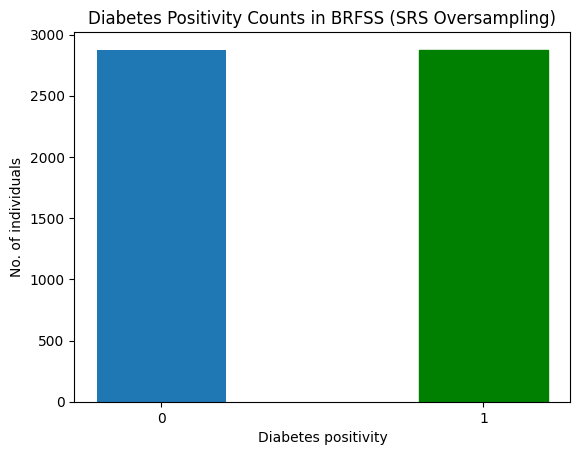

In [304]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Oversampling)")
plt.show()

In [305]:
model_source_SRS_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_538"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3766 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3767 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3768 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3769 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3770 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3771 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3772 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.5727 - loss: 0.6831 - val_AUC: 0.7635 - val_loss: 0.5984
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.7785 - loss: 0.5634 - val_AUC: 0.8152 - val_loss: 0.5395
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8266 - loss: 0.5097 - val_AUC: 0.8388 - val_loss: 0.4984
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8593 - loss: 0.4632 - val_AUC: 0.8469 - val_loss: 0.4839
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8545 - loss: 0.4677 - val_AUC: 0.8469 - val_loss: 0.4975
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.8727 - loss: 0.4473 - val_AUC: 0.8565 - val_loss: 0.4714
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.8915 - loss: 0.4088 - val_AUC: 0.8593 - val_loss: 0.4806
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.8875 - loss: 0.4181 - val_AUC: 0.8653 - val_loss: 0.4543
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AU

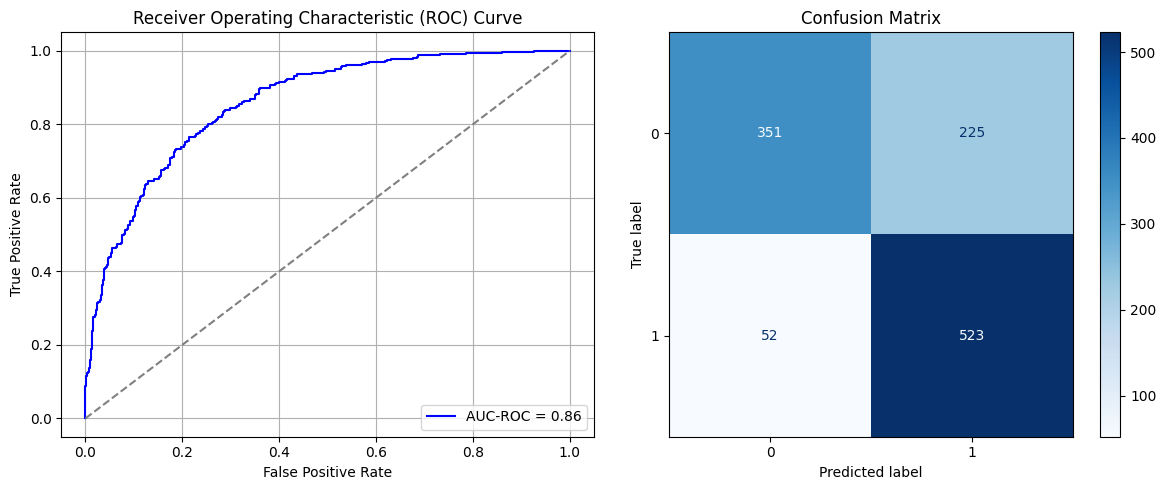

Best threshold based on F1-score: 0.5315393805503845
Time elapsed (performance): 11.747004355000172


<Sequential name=sequential_538, built=True>

In [306]:
train_and_evaluate(model_source_SRS_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
AUC-ROC: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        49
           1       0.49      0.46      0.47        48

    accuracy                           0.49        97
   macro avg       0.49      0.49      0.49        97
weighted avg       0.49      0.49      0.49        97

FPR 0.46938775510204084 TPR: 0.45833333333333337 FNR: 0.5416666666666666 TNR: 0.5306122448979591


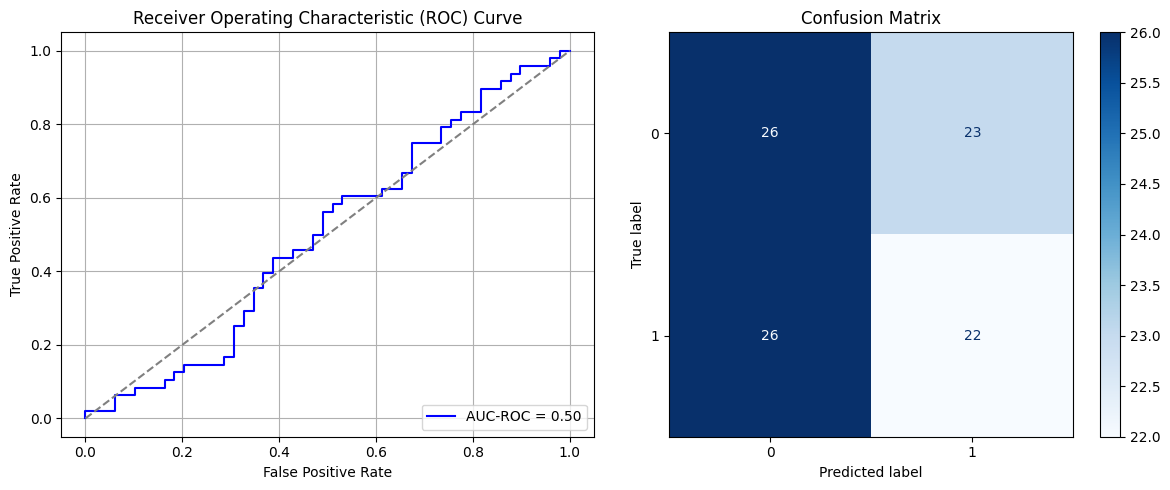

Best threshold based on F1-score: 0.004546752665191889
False Negative Rate: 0.5416666666666666
Time elapsed (performance): 0.6633321130002514


In [307]:
Transductive_TL(model_source_SRS_ROS, X_T_test, y_T_test, "Target")

In [308]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_539"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3773 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3774 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3775 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3776 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3777 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3778 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3779 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - AUC: 0.5723 - loss: 0.8316 - val_AUC: 0.5004 - val_loss: 0.8348
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6151 - loss: 0.7447 - val_AUC: 0.5041 - val_loss: 0.7867
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5241 - loss: 0.7807 - val_AUC: 0.5081 - val_loss: 0.7456
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5817 - loss: 0.7291 - val_AUC: 0.5152 - val_loss: 0.7190
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5392 - loss: 0.7026 - val_AUC: 0.5237 - val_loss: 0.6971
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5639 - loss: 0.7083 - val_AUC: 0.5292 - val_loss: 0.6871
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6222 - loss: 0.6703 - val_AUC: 0.5348 - val_loss: 0.6757
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5940 - loss: 0.6790 - val_AUC: 0.5399 - val_loss: 0.6653
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6835 - loss: 0.

(np.float64(0.24489795918367346), np.float64(0.7291666666666666))

In [309]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_SRS, X_T_test, y_T_train_SRS, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_540"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3780 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3781 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3782 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3783 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3784 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3785 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3786 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - AUC: 0.5700 - loss: 0.8172 - val_AUC: 0.0000e+00 - val_loss: 1.0895
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - AUC: 0.6004 - loss: 0.7249 - val_AUC: 0.0000e+00 - val_loss: 1.1513
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5846 - loss: 0.6968 - val_AUC: 0.0000e+00 - val_loss: 1.1083
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5682 - loss: 0.6979 - val_AUC: 0.0000e+00 - val_loss: 1.0201
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5764 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_loss: 1.0184
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5665 - loss: 0.6771 - val_AUC: 0.0000e+00 - val_loss: 0.9731
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5908 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_loss: 0.9780
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5882 - loss: 0.6567 - val_AUC: 0.0000e+00 - val_loss: 1.0005
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_541"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3787 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3788 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3789 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3790 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3791 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3792 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3793 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5578 - loss: 0.8023 - val_AUC: 0.0000e+00 - val_loss: 1.2087
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5979 - loss: 0.7238 - val_AUC: 0.0000e+00 - val_loss: 1.2430
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6140 - loss: 0.6788 - val_AUC: 0.0000e+00 - val_loss: 1.1662
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6063 - loss: 0.6617 - val_AUC: 0.0000e+00 - val_loss: 1.0919
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5981 - loss: 0.6766 - val_AUC: 0.0000e+00 - val_loss: 0.9995
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6149 - loss: 0.6489 - val_AUC: 0.0000e+00 - val_loss: 0.9747
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6333 - loss: 0.6366 - val_AUC: 0.0000e+00 - val_loss: 1.0173
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6230 - loss: 0.6504 - val_AUC: 0.0000e+00 - val_loss: 1.0135
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_542"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3794 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3795 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3796 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3797 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3798 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3799 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3800 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5761 - loss: 0.8209 - val_AUC: 0.0000e+00 - val_loss: 1.1197
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5663 - loss: 0.7413 - val_AUC: 0.0000e+00 - val_loss: 1.1227
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5856 - loss: 0.7199 - val_AUC: 0.0000e+00 - val_loss: 1.0735
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5828 - loss: 0.6760 - val_AUC: 0.0000e+00 - val_loss: 1.0406
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5777 - loss: 0.6945 - val_AUC: 0.0000e+00 - val_loss: 0.9993
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5952 - loss: 0.6508 - val_AUC: 0.0000e+00 - val_loss: 0.9908
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5877 - loss: 0.6541 - val_AUC: 0.0000e+00 - val_loss: 0.9849
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5934 - loss: 0.6725 - val_AUC: 0.0000e+00 - val_loss: 0.9475
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_543"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3801 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3802 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3803 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3804 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3805 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3806 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3807 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5582 - loss: 0.7922 - val_AUC: 0.0000e+00 - val_loss: 1.1170
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5967 - loss: 0.7032 - val_AUC: 0.0000e+00 - val_loss: 1.1632
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5710 - loss: 0.7299 - val_AUC: 0.0000e+00 - val_loss: 1.1265
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5812 - loss: 0.6580 - val_AUC: 0.0000e+00 - val_loss: 1.0433
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6046 - loss: 0.6565 - val_AUC: 0.0000e+00 - val_loss: 1.0062
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5909 - loss: 0.6641 - val_AUC: 0.0000e+00 - val_loss: 0.9514
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6368 - loss: 0.6277 - val_AUC: 0.0000e+00 - val_loss: 0.9784
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6241 - loss: 0.6442 - val_AUC: 0.0000e+00 - val_loss: 0.9610
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_544"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3808 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3809 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3810 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3811 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3812 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3813 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3814 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5862 - loss: 0.7806 - val_AUC: 0.0000e+00 - val_loss: 1.1328
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5588 - loss: 0.7609 - val_AUC: 0.0000e+00 - val_loss: 1.1743
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6203 - loss: 0.6834 - val_AUC: 0.0000e+00 - val_loss: 1.1444
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5636 - loss: 0.7161 - val_AUC: 0.0000e+00 - val_loss: 1.0959
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5819 - loss: 0.6756 - val_AUC: 0.0000e+00 - val_loss: 1.0018
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5914 - loss: 0.6769 - val_AUC: 0.0000e+00 - val_loss: 0.9469
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6337 - loss: 0.6523 - val_AUC: 0.0000e+00 - val_loss: 1.0087
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5762 - loss: 0.6711 - val_AUC: 0.0000e+00 - val_loss: 1.0086
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_545"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3815 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3816 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3817 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3818 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3819 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3820 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3821 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5581 - loss: 0.8073 - val_AUC: 0.0000e+00 - val_loss: 1.1795
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5283 - loss: 0.7980 - val_AUC: 0.0000e+00 - val_loss: 1.1657
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.6230 - loss: 0.6698 - val_AUC: 0.0000e+00 - val_loss: 1.0744
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5880 - loss: 0.6904 - val_AUC: 0.0000e+00 - val_loss: 1.0158
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6173 - loss: 0.6473 - val_AUC: 0.0000e+00 - val_loss: 1.0464
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6224 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 1.0054
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6482 - loss: 0.6284 - val_AUC: 0.0000e+00 - val_loss: 1.0190
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6086 - loss: 0.6495 - val_AUC: 0.0000e+00 - val_loss: 0.9838
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_546"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3822 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3823 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3824 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3825 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3826 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3827 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3828 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - AUC: 0.5656 - loss: 0.7980 - val_AUC: 0.0000e+00 - val_loss: 1.1646
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5552 - loss: 0.7744 - val_AUC: 0.0000e+00 - val_loss: 1.1288
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5795 - loss: 0.6948 - val_AUC: 0.0000e+00 - val_loss: 1.0869
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5532 - loss: 0.7153 - val_AUC: 0.0000e+00 - val_loss: 1.0027
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6003 - loss: 0.6648 - val_AUC: 0.0000e+00 - val_loss: 1.0096
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5906 - loss: 0.6521 - val_AUC: 0.0000e+00 - val_loss: 1.0461
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5996 - loss: 0.6479 - val_AUC: 0.0000e+00 - val_loss: 1.0090
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.614

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_547"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3829 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3830 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3831 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3832 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3833 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3834 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3835 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5841 - loss: 0.7963 - val_AUC: 0.0000e+00 - val_loss: 1.1643
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5881 - loss: 0.7210 - val_AUC: 0.0000e+00 - val_loss: 1.1508
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5806 - loss: 0.7219 - val_AUC: 0.0000e+00 - val_loss: 1.0444
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5745 - loss: 0.6902 - val_AUC: 0.0000e+00 - val_loss: 1.0047
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5841 - loss: 0.6709 - val_AUC: 0.0000e+00 - val_loss: 1.0203
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5838 - loss: 0.6711 - val_AUC: 0.0000e+00 - val_loss: 0.9929
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6240 - loss: 0.6557 - val_AUC: 0.0000e+00 - val_loss: 1.0071
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5973 - loss: 0.6512 - val_AUC: 0.0000e+00 - val_loss: 1.0304
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_548"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3836 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3837 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3838 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3839 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3840 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3841 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3842 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - AUC: 0.5458 - loss: 0.8529 - val_AUC: 0.0000e+00 - val_loss: 1.1551
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - AUC: 0.5837 - loss: 0.7346 - val_AUC: 0.0000e+00 - val_loss: 1.1180
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6057 - loss: 0.7025 - val_AUC: 0.0000e+00 - val_loss: 1.0822
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5332 - loss: 0.7364 - val_AUC: 0.0000e+00 - val_loss: 1.0641
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5812 - loss: 0.6682 - val_AUC: 0.0000e+00 - val_loss: 1.0429
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6236 - loss: 0.6495 - val_AUC: 0.0000e+00 - val_loss: 0.9849
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6040 - loss: 0.6583 - val_AUC: 0.0000e+00 - val_loss: 0.9764
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6271 - loss: 0.6481 - val_AUC: 0.0000e+00 - val_loss: 0.9954
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_549"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3843 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3844 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3845 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3846 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3847 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3848 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3849 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5777 - loss: 0.7902 - val_AUC: 0.0000e+00 - val_loss: 1.1967
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5778 - loss: 0.7570 - val_AUC: 0.0000e+00 - val_loss: 1.1227
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6035 - loss: 0.6785 - val_AUC: 0.0000e+00 - val_loss: 1.1096
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5463 - loss: 0.7093 - val_AUC: 0.0000e+00 - val_loss: 1.0522
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5820 - loss: 0.6827 - val_AUC: 0.0000e+00 - val_loss: 1.0392
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6136 - loss: 0.6433 - val_AUC: 0.0000e+00 - val_loss: 1.0272
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5927 - loss: 0.6589 - val_AUC: 0.0000e+00 - val_loss: 0.9882
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5601 - loss: 0.6764 - val_AUC: 0.0000e+00 - val_loss: 0.9699
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_550"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3850 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3851 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3852 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3853 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3854 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3855 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3856 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5405 - loss: 0.8324 - val_AUC: 0.0000e+00 - val_loss: 1.1689
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5506 - loss: 0.7824 - val_AUC: 0.0000e+00 - val_loss: 1.1012
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5547 - loss: 0.7503 - val_AUC: 0.0000e+00 - val_loss: 1.0804
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5753 - loss: 0.6798 - val_AUC: 0.0000e+00 - val_loss: 1.0635
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5899 - loss: 0.7051 - val_AUC: 0.0000e+00 - val_loss: 0.9854
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6207 - loss: 0.6388 - val_AUC: 0.0000e+00 - val_loss: 1.0476
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6356 - loss: 0.6328 - val_AUC: 0.0000e+00 - val_loss: 1.0430
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6067 - loss: 0.6348 - val_AUC: 0.0000e+00 - val_loss: 1.0012
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_551"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3857 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3858 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3859 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3860 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3861 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3862 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3863 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5754 - loss: 0.7912 - val_AUC: 0.0000e+00 - val_loss: 1.1963
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5549 - loss: 0.7877 - val_AUC: 0.0000e+00 - val_loss: 1.1009
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5940 - loss: 0.6994 - val_AUC: 0.0000e+00 - val_loss: 1.0514
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6091 - loss: 0.6696 - val_AUC: 0.0000e+00 - val_loss: 1.0682
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6041 - loss: 0.6751 - val_AUC: 0.0000e+00 - val_loss: 1.0238
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5821 - loss: 0.6623 - val_AUC: 0.0000e+00 - val_loss: 1.0143
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6147 - loss: 0.6410 - val_AUC: 0.0000e+00 - val_loss: 0.9900
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5840 - loss: 0.6638 - val_AUC: 0.0000e+00 - val_loss: 0.9374
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_552"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3864 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3865 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3866 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3867 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3868 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3869 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3870 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5744 - loss: 0.8199 - val_AUC: 0.0000e+00 - val_loss: 1.2007
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5587 - loss: 0.7585 - val_AUC: 0.0000e+00 - val_loss: 1.1477
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5861 - loss: 0.7282 - val_AUC: 0.0000e+00 - val_loss: 1.0950
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6114 - loss: 0.6778 - val_AUC: 0.0000e+00 - val_loss: 1.0979
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5991 - loss: 0.6693 - val_AUC: 0.0000e+00 - val_loss: 1.0570
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6149 - loss: 0.6510 - val_AUC: 0.0000e+00 - val_loss: 1.0576
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5928 - loss: 0.6684 - val_AUC: 0.0000e+00 - val_loss: 0.9749
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6268 - loss: 0.6149 - val_AUC: 0.0000e+00 - val_loss: 1.0063
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_553"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3871 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3872 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3873 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3874 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3875 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3876 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3877 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.6013 - loss: 0.7513 - val_AUC: 0.0000e+00 - val_loss: 1.2569
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5608 - loss: 0.7764 - val_AUC: 0.0000e+00 - val_loss: 1.1634
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5662 - loss: 0.7261 - val_AUC: 0.0000e+00 - val_loss: 1.1404
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5865 - loss: 0.6834 - val_AUC: 0.0000e+00 - val_loss: 1.0815
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5448 - loss: 0.7066 - val_AUC: 0.0000e+00 - val_loss: 1.0029
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5709 - loss: 0.6552 - val_AUC: 0.0000e+00 - val_loss: 1.0086
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5824 - loss: 0.6551 - val_AUC: 0.0000e+00 - val_loss: 1.0208
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5963 - loss: 0.6564 - val_AUC: 0.0000e+00 - val_loss: 0.9932
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_554"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3878 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3879 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3880 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3881 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3882 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3883 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3884 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5785 - loss: 0.8037 - val_AUC: 0.0000e+00 - val_loss: 1.1866
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5512 - loss: 0.7759 - val_AUC: 0.0000e+00 - val_loss: 1.1160
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6004 - loss: 0.7049 - val_AUC: 0.0000e+00 - val_loss: 1.1044
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6101 - loss: 0.6462 - val_AUC: 0.0000e+00 - val_loss: 1.0784
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5930 - loss: 0.6774 - val_AUC: 0.0000e+00 - val_loss: 1.0063
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5899 - loss: 0.6700 - val_AUC: 0.0000e+00 - val_loss: 0.9868
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5767 - loss: 0.6540 - val_AUC: 0.0000e+00 - val_loss: 0.9984
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5938 - loss: 0.6686 - val_AUC: 0.0000e+00 - val_loss: 0.9762
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_555"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3885 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3886 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3887 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3888 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3889 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3890 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3891 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5759 - loss: 0.7878 - val_AUC: 0.0000e+00 - val_loss: 1.2332
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5729 - loss: 0.7448 - val_AUC: 0.0000e+00 - val_loss: 1.1480
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6007 - loss: 0.7113 - val_AUC: 0.0000e+00 - val_loss: 1.0739
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6010 - loss: 0.6767 - val_AUC: 0.0000e+00 - val_loss: 1.0846
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5593 - loss: 0.6821 - val_AUC: 0.0000e+00 - val_loss: 1.0660
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5828 - loss: 0.6611 - val_AUC: 0.0000e+00 - val_loss: 0.9937
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6100 - loss: 0.6465 - val_AUC: 0.0000e+00 - val_loss: 0.9793
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5472 - loss: 0.6762 - val_AUC: 0.0000e+00 - val_loss: 0.9417
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_556"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3892 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3893 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3894 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3895 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3896 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3897 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3898 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5411 - loss: 0.8425 - val_AUC: 0.0000e+00 - val_loss: 1.1000
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5857 - loss: 0.7293 - val_AUC: 0.0000e+00 - val_loss: 1.1075
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5552 - loss: 0.7214 - val_AUC: 0.0000e+00 - val_loss: 1.1045
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5988 - loss: 0.6440 - val_AUC: 0.0000e+00 - val_loss: 1.0464
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5434 - loss: 0.7019 - val_AUC: 0.0000e+00 - val_loss: 0.9481
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5987 - loss: 0.6694 - val_AUC: 0.0000e+00 - val_loss: 0.9207
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6309 - loss: 0.6455 - val_AUC: 0.0000e+00 - val_loss: 0.9731
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6215 - loss: 0.6467 - val_AUC: 0.0000e+00 - val_loss: 0.9741
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_557"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3899 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3900 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3901 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3902 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3903 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3904 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3905 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5652 - loss: 0.8340 - val_AUC: 0.0000e+00 - val_loss: 1.1956
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5429 - loss: 0.7672 - val_AUC: 0.0000e+00 - val_loss: 1.1579
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5800 - loss: 0.7098 - val_AUC: 0.0000e+00 - val_loss: 1.0862
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5994 - loss: 0.6787 - val_AUC: 0.0000e+00 - val_loss: 1.0441
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5316 - loss: 0.6951 - val_AUC: 0.0000e+00 - val_loss: 0.9840
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5780 - loss: 0.6560 - val_AUC: 0.0000e+00 - val_loss: 0.9956
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6107 - loss: 0.6638 - val_AUC: 0.0000e+00 - val_loss: 0.9302
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6247 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 0.9628
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_558"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3906 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3907 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3908 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3909 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3910 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3911 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3912 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5528 - loss: 0.8084 - val_AUC: 0.0000e+00 - val_loss: 1.1491
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5993 - loss: 0.7111 - val_AUC: 0.0000e+00 - val_loss: 1.0980
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5486 - loss: 0.7602 - val_AUC: 0.0000e+00 - val_loss: 1.0742
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5784 - loss: 0.6783 - val_AUC: 0.0000e+00 - val_loss: 1.0649
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5731 - loss: 0.6717 - val_AUC: 0.0000e+00 - val_loss: 0.9930
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5543 - loss: 0.6879 - val_AUC: 0.0000e+00 - val_loss: 0.9517
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5837 - loss: 0.6523 - val_AUC: 0.0000e+00 - val_loss: 0.9819
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6367 - loss: 0.6316 - val_AUC: 0.0000e+00 - val_loss: 1.0048
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_559"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3913 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3914 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3915 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3916 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3917 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3918 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3919 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.6077 - loss: 0.7549 - val_AUC: 0.0000e+00 - val_loss: 1.1387
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5630 - loss: 0.7692 - val_AUC: 0.0000e+00 - val_loss: 1.1015
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5788 - loss: 0.7358 - val_AUC: 0.0000e+00 - val_loss: 1.0625
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5973 - loss: 0.6761 - val_AUC: 0.0000e+00 - val_loss: 1.0618
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5754 - loss: 0.6708 - val_AUC: 0.0000e+00 - val_loss: 1.0342
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5927 - loss: 0.6542 - val_AUC: 0.0000e+00 - val_loss: 0.9953
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6182 - loss: 0.6539 - val_AUC: 0.0000e+00 - val_loss: 0.9498
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6066 - loss: 0.6425 - val_AUC: 0.0000e+00 - val_loss: 0.9797
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_560"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3920 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3921 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3922 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3923 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3924 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3925 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3926 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.6049 - loss: 0.7609 - val_AUC: 0.0000e+00 - val_loss: 1.1993
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5688 - loss: 0.7465 - val_AUC: 0.0000e+00 - val_loss: 1.1675
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5594 - loss: 0.7348 - val_AUC: 0.0000e+00 - val_loss: 1.1111
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6071 - loss: 0.6720 - val_AUC: 0.0000e+00 - val_loss: 1.1000
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5714 - loss: 0.7013 - val_AUC: 0.0000e+00 - val_loss: 0.9760
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6178 - loss: 0.6387 - val_AUC: 0.0000e+00 - val_loss: 0.9799
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5721 - loss: 0.6377 - val_AUC: 0.0000e+00 - val_loss: 1.0309
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6298

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_561"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3927 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3928 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3929 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3930 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3931 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3932 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3933 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - AUC: 0.5906 - loss: 0.7898 - val_AUC: 0.0000e+00 - val_loss: 1.1093
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5523 - loss: 0.7629 - val_AUC: 0.0000e+00 - val_loss: 1.1178
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6145 - loss: 0.6800 - val_AUC: 0.0000e+00 - val_loss: 1.1221
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5538 - loss: 0.7062 - val_AUC: 0.0000e+00 - val_loss: 1.0439
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5858 - loss: 0.6703 - val_AUC: 0.0000e+00 - val_loss: 0.9966
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6253 - loss: 0.6340 - val_AUC: 0.0000e+00 - val_loss: 1.0094
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6052 - loss: 0.6299 - val_AUC: 0.0000e+00 - val_loss: 0.9987
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6663 - loss: 0.6209 - val_AUC: 0.0000e+00 - val_loss: 0.9734
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_562"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3934 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3935 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3936 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3937 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3938 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3939 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3940 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5157 - loss: 0.8440 - val_AUC: 0.0000e+00 - val_loss: 1.1408
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5862 - loss: 0.7326 - val_AUC: 0.0000e+00 - val_loss: 1.1160
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5594 - loss: 0.7253 - val_AUC: 0.0000e+00 - val_loss: 1.1248
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5455 - loss: 0.7182 - val_AUC: 0.0000e+00 - val_loss: 1.0811
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5969 - loss: 0.6708 - val_AUC: 0.0000e+00 - val_loss: 1.0137
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6050 - loss: 0.6426 - val_AUC: 0.0000e+00 - val_loss: 1.0009
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6454 - loss: 0.6501 - val_AUC: 0.0000e+00 - val_loss: 0.9688
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6431 - loss: 0.6295 - val_AUC: 0.0000e+00 - val_loss: 0.9914
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_563"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3941 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3942 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3943 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3944 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3945 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3946 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3947 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5537 - loss: 0.8163 - val_AUC: 0.0000e+00 - val_loss: 1.1854
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5809 - loss: 0.7395 - val_AUC: 0.0000e+00 - val_loss: 1.1028
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6313 - loss: 0.6624 - val_AUC: 0.0000e+00 - val_loss: 1.0927
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5407 - loss: 0.7033 - val_AUC: 0.0000e+00 - val_loss: 1.0725
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6260 - loss: 0.6338 - val_AUC: 0.0000e+00 - val_loss: 1.0367
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5830 - loss: 0.6707 - val_AUC: 0.0000e+00 - val_loss: 0.9734
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6537 - loss: 0.6261 - val_AUC: 0.0000e+00 - val_loss: 0.9909
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5834 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 0.9793
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_564"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3948 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3949 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3950 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3951 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3952 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3953 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3954 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.6005 - loss: 0.7857 - val_AUC: 0.0000e+00 - val_loss: 1.1339
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5211 - loss: 0.8040 - val_AUC: 0.0000e+00 - val_loss: 1.1226
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5417 - loss: 0.7169 - val_AUC: 0.0000e+00 - val_loss: 1.1326
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5892 - loss: 0.6792 - val_AUC: 0.0000e+00 - val_loss: 1.0531
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6040 - loss: 0.6723 - val_AUC: 0.0000e+00 - val_loss: 1.0119
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6211 - loss: 0.6522 - val_AUC: 0.0000e+00 - val_loss: 1.0007
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5532 - loss: 0.6622 - val_AUC: 0.0000e+00 - val_loss: 0.9848
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5917 - loss: 0.6545 - val_AUC: 0.0000e+00 - val_loss: 0.9343
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_565"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3955 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3956 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3957 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3958 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3959 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3960 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3961 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.5336 - loss: 0.8489 - val_AUC: 0.0000e+00 - val_loss: 1.1768
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - AUC: 0.5422 - loss: 0.7822 - val_AUC: 0.0000e+00 - val_loss: 1.1284
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6054 - loss: 0.6756 - val_AUC: 0.0000e+00 - val_loss: 1.1244
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6187 - loss: 0.6712 - val_AUC: 0.0000e+00 - val_loss: 1.0742
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5706 - loss: 0.6817 - val_AUC: 0.0000e+00 - val_loss: 0.9814
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5861 - loss: 0.6640 - val_AUC: 0.0000e+00 - val_loss: 0.9754
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6154 - loss: 0.6401 - val_AUC: 0.0000e+00 - val_loss: 1.0074
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6195 - loss: 0.6297 - val_AUC: 0.0000e+00 - val_loss: 0.9878
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_566"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3962 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3963 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3964 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3965 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3966 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3967 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3968 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.6326 - loss: 0.7107 - val_AUC: 0.0000e+00 - val_loss: 1.2991
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5284 - loss: 0.8126 - val_AUC: 0.0000e+00 - val_loss: 1.1933
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5899 - loss: 0.7093 - val_AUC: 0.0000e+00 - val_loss: 1.1574
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5914 - loss: 0.7068 - val_AUC: 0.0000e+00 - val_loss: 1.0895
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5755 - loss: 0.6820 - val_AUC: 0.0000e+00 - val_loss: 1.0469
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6273 - loss: 0.6535 - val_AUC: 0.0000e+00 - val_loss: 0.9864
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6059 - loss: 0.6540 - val_AUC: 0.0000e+00 - val_loss: 0.9920
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6087 - loss: 0.6393 - val_AUC: 0.0000e+00 - val_loss: 1.0189
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_567"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3969 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3970 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3971 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3972 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3973 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3974 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3975 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5911 - loss: 0.7937 - val_AUC: 0.0000e+00 - val_loss: 1.1287
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6060 - loss: 0.7336 - val_AUC: 0.0000e+00 - val_loss: 1.1172
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5688 - loss: 0.7276 - val_AUC: 0.0000e+00 - val_loss: 1.1200
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5994 - loss: 0.6479 - val_AUC: 0.0000e+00 - val_loss: 1.1042
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5818 - loss: 0.6800 - val_AUC: 0.0000e+00 - val_loss: 1.0005
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5545 - loss: 0.6517 - val_AUC: 0.0000e+00 - val_loss: 1.0098
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5688 - loss: 0.6629 - val_AUC: 0.0000e+00 - val_loss: 0.9754
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5791 - loss: 0.6594 - val_AUC: 0.0000e+00 - val_loss: 0.9656
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_568"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3976 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3977 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3978 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3979 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3980 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3981 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3982 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.5800 - loss: 0.7846 - val_AUC: 0.0000e+00 - val_loss: 1.2225
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.5883 - loss: 0.7461 - val_AUC: 0.0000e+00 - val_loss: 1.1417
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6233 - loss: 0.6876 - val_AUC: 0.0000e+00 - val_loss: 1.1077
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5901 - loss: 0.6904 - val_AUC: 0.0000e+00 - val_loss: 1.1026
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5764 - loss: 0.6600 - val_AUC: 0.0000e+00 - val_loss: 1.0328
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5608 - loss: 0.6739 - val_AUC: 0.0000e+00 - val_loss: 0.9723
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6043 - loss: 0.6504 - val_AUC: 0.0000e+00 - val_loss: 0.9937
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6380 - loss: 0.6244 - val_AUC: 0.0000e+00 - val_loss: 0.9776
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_569"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3983 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3984 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3985 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3986 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3987 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3988 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3989 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.6068 - loss: 0.7546 - val_AUC: 0.0000e+00 - val_loss: 1.1837
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5573 - loss: 0.7627 - val_AUC: 0.0000e+00 - val_loss: 1.1477
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5597 - loss: 0.7262 - val_AUC: 0.0000e+00 - val_loss: 1.1419
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5766 - loss: 0.7037 - val_AUC: 0.0000e+00 - val_loss: 1.0616
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6089 - loss: 0.6616 - val_AUC: 0.0000e+00 - val_loss: 1.0520
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6029 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 1.0227
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5969 - loss: 0.6421 - val_AUC: 0.0000e+00 - val_loss: 1.0022
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6095 - loss: 0.6532 - val_AUC: 0.0000e+00 - val_loss: 0.9704
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_570"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3990 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3991 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3992 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3993 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3994 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3995 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3996 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5912 - loss: 0.7971 - val_AUC: 0.0000e+00 - val_loss: 1.1288
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5951 - loss: 0.7334 - val_AUC: 0.0000e+00 - val_loss: 1.1388
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5922 - loss: 0.7045 - val_AUC: 0.0000e+00 - val_loss: 1.1314
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5713 - loss: 0.7087 - val_AUC: 0.0000e+00 - val_loss: 1.0644
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5911 - loss: 0.6651 - val_AUC: 0.0000e+00 - val_loss: 1.0436
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5527 - loss: 0.6945 - val_AUC: 0.0000e+00 - val_loss: 1.0145
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5917 - loss: 0.6556 - val_AUC: 0.0000e+00 - val_loss: 0.9652
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6107 - loss: 0.6311 - val_AUC: 0.0000e+00 - val_loss: 0.9715
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_571"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3997 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3998 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3999 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4000 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4001 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4002 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4003 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5773 - loss: 0.7896 - val_AUC: 0.0000e+00 - val_loss: 1.0985
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5656 - loss: 0.7556 - val_AUC: 0.0000e+00 - val_loss: 1.1253
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5717 - loss: 0.7129 - val_AUC: 0.0000e+00 - val_loss: 1.1076
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6028 - loss: 0.6761 - val_AUC: 0.0000e+00 - val_loss: 1.0430
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6402 - loss: 0.6385 - val_AUC: 0.0000e+00 - val_loss: 0.9965
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6120 - loss: 0.6552 - val_AUC: 0.0000e+00 - val_loss: 0.9971
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5958 - loss: 0.6658 - val_AUC: 0.0000e+00 - val_loss: 0.9740
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6144 - loss: 0.6421 - val_AUC: 0.0000e+00 - val_loss: 0.9844
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_572"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4004 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4005 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4006 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4007 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4008 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4009 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4010 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5470 - loss: 0.8176 - val_AUC: 0.0000e+00 - val_loss: 1.1297
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5202 - loss: 0.8119 - val_AUC: 0.0000e+00 - val_loss: 1.0828
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5831 - loss: 0.6984 - val_AUC: 0.0000e+00 - val_loss: 1.0766
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5677 - loss: 0.7113 - val_AUC: 0.0000e+00 - val_loss: 1.0530
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6255 - loss: 0.6468 - val_AUC: 0.0000e+00 - val_loss: 1.0599
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5470 - loss: 0.6853 - val_AUC: 0.0000e+00 - val_loss: 0.9994
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6195 - loss: 0.6386 - val_AUC: 0.0000e+00 - val_loss: 0.9708
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6488 - loss: 0.6411 - val_AUC: 0.0000e+00 - val_loss: 0.9326
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_573"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4011 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4012 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4013 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4014 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4015 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4016 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4017 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.6031 - loss: 0.7722 - val_AUC: 0.0000e+00 - val_loss: 1.1889
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5690 - loss: 0.7717 - val_AUC: 0.0000e+00 - val_loss: 1.1096
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5579 - loss: 0.7295 - val_AUC: 0.0000e+00 - val_loss: 1.0822
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6001 - loss: 0.6734 - val_AUC: 0.0000e+00 - val_loss: 1.0388
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5930 - loss: 0.6743 - val_AUC: 0.0000e+00 - val_loss: 1.0406
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5599 - loss: 0.6723 - val_AUC: 0.0000e+00 - val_loss: 1.0159
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.6032 - loss: 0.6501 - val_AUC: 0.0000e+00 - val_loss: 0.9575
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5880 - loss: 0.6520 - val_AUC: 0.0000e+00 - val_loss: 0.9505
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_574"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4018 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4019 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4020 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4021 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4022 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4023 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4024 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5741 - loss: 0.8074 - val_AUC: 0.0000e+00 - val_loss: 1.1188
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5744 - loss: 0.7413 - val_AUC: 0.0000e+00 - val_loss: 1.0830
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5881 - loss: 0.6739 - val_AUC: 0.0000e+00 - val_loss: 1.0541
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6193 - loss: 0.6717 - val_AUC: 0.0000e+00 - val_loss: 0.9915
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6414 - loss: 0.6363 - val_AUC: 0.0000e+00 - val_loss: 1.0254
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6415 - loss: 0.6307 - val_AUC: 0.0000e+00 - val_loss: 1.0314
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6155 - loss: 0.6499 - val_AUC: 0.0000e+00 - val_loss: 1.0015
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5933 - loss: 0.6386 - val_AUC: 0.0000e+00 - val_loss: 0.9819
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_575"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4025 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4026 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4027 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4028 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4029 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4030 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4031 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5825 - loss: 0.7869 - val_AUC: 0.0000e+00 - val_loss: 1.2048
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5497 - loss: 0.7595 - val_AUC: 0.0000e+00 - val_loss: 1.1807
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5868 - loss: 0.6978 - val_AUC: 0.0000e+00 - val_loss: 1.1134
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5825 - loss: 0.6970 - val_AUC: 0.0000e+00 - val_loss: 1.0360
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6094 - loss: 0.6528 - val_AUC: 0.0000e+00 - val_loss: 1.0349
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6085 - loss: 0.6606 - val_AUC: 0.0000e+00 - val_loss: 0.9983
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5807 - loss: 0.6487 - val_AUC: 0.0000e+00 - val_loss: 0.9787
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6332 - loss: 0.6363 - val_AUC: 0.0000e+00 - val_loss: 0.9658
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_576"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4032 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4033 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4034 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4035 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4036 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4037 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4038 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.5509 - loss: 0.8019 - val_AUC: 0.0000e+00 - val_loss: 1.2091
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.5910 - loss: 0.7170 - val_AUC: 0.0000e+00 - val_loss: 1.1579
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6116 - loss: 0.6973 - val_AUC: 0.0000e+00 - val_loss: 1.0706
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6114 - loss: 0.6537 - val_AUC: 0.0000e+00 - val_loss: 1.0530
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5987 - loss: 0.6849 - val_AUC: 0.0000e+00 - val_loss: 1.0004
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5695 - loss: 0.6657 - val_AUC: 0.0000e+00 - val_loss: 0.9956
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5557 - loss: 0.6623 - val_AUC: 0.0000e+00 - val_loss: 1.0065
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6157 - loss: 0.6599 - val_AUC: 0.0000e+00 - val_loss: 0.9777
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_577"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4039 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4040 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4041 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4042 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4043 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4044 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4045 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5555 - loss: 0.8088 - val_AUC: 0.0000e+00 - val_loss: 1.1674
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5908 - loss: 0.7248 - val_AUC: 0.0000e+00 - val_loss: 1.1452
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6250 - loss: 0.6730 - val_AUC: 0.0000e+00 - val_loss: 1.0816
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6231 - loss: 0.6536 - val_AUC: 0.0000e+00 - val_loss: 1.0458
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5740 - loss: 0.6642 - val_AUC: 0.0000e+00 - val_loss: 1.0222
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6139 - loss: 0.6590 - val_AUC: 0.0000e+00 - val_loss: 0.9596
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6173 - loss: 0.6367 - val_AUC: 0.0000e+00 - val_loss: 1.0052
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5997 - loss: 0.6569 - val_AUC: 0.0000e+00 - val_loss: 0.9992
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_578"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4046 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4047 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4048 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4049 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4050 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4051 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4052 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5452 - loss: 0.8291 - val_AUC: 0.0000e+00 - val_loss: 1.2269
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5971 - loss: 0.7339 - val_AUC: 0.0000e+00 - val_loss: 1.1326
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5600 - loss: 0.7298 - val_AUC: 0.0000e+00 - val_loss: 1.0878
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.4963 - loss: 0.7386 - val_AUC: 0.0000e+00 - val_loss: 1.0462
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5554 - loss: 0.7021 - val_AUC: 0.0000e+00 - val_loss: 1.0174
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6007 - loss: 0.6660 - val_AUC: 0.0000e+00 - val_loss: 1.0067
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6206 - loss: 0.6252 - val_AUC: 0.0000e+00 - val_loss: 1.0135
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5661 - loss: 0.6667 - val_AUC: 0.0000e+00 - val_loss: 0.9936
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_579"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4053 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4054 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4055 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4056 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4057 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4058 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4059 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5705 - loss: 0.8074 - val_AUC: 0.0000e+00 - val_loss: 1.1616
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5786 - loss: 0.7408 - val_AUC: 0.0000e+00 - val_loss: 1.1223
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5873 - loss: 0.6958 - val_AUC: 0.0000e+00 - val_loss: 1.1432
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5444 - loss: 0.7044 - val_AUC: 0.0000e+00 - val_loss: 1.0627
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6226 - loss: 0.6444 - val_AUC: 0.0000e+00 - val_loss: 1.0308
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6155 - loss: 0.6434 - val_AUC: 0.0000e+00 - val_loss: 0.9905
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6043 - loss: 0.6519 - val_AUC: 0.0000e+00 - val_loss: 0.9777
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6201 - loss: 0.6308 - val_AUC: 0.0000e+00 - val_loss: 0.9946
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_580"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4060 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4061 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4062 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4063 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4064 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4065 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4066 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5856 - loss: 0.7801 - val_AUC: 0.0000e+00 - val_loss: 1.1444
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6267 - loss: 0.6753 - val_AUC: 0.0000e+00 - val_loss: 1.1955
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5896 - loss: 0.6982 - val_AUC: 0.0000e+00 - val_loss: 1.1121
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5878 - loss: 0.6787 - val_AUC: 0.0000e+00 - val_loss: 1.0220
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5730 - loss: 0.6893 - val_AUC: 0.0000e+00 - val_loss: 0.9866
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5980 - loss: 0.6665 - val_AUC: 0.0000e+00 - val_loss: 1.0199
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5558 - loss: 0.6637 - val_AUC: 0.0000e+00 - val_loss: 1.0125
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6150 - loss: 0.6339 - val_AUC: 0.0000e+00 - val_loss: 0.9929
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_581"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4067 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4068 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4069 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4070 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4071 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4072 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4073 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.5439 - loss: 0.8220 - val_AUC: 0.0000e+00 - val_loss: 1.1219
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - AUC: 0.5854 - loss: 0.7228 - val_AUC: 0.0000e+00 - val_loss: 1.0916
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5966 - loss: 0.6908 - val_AUC: 0.0000e+00 - val_loss: 1.0871
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5836 - loss: 0.6739 - val_AUC: 0.0000e+00 - val_loss: 1.0481
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6157 - loss: 0.6322 - val_AUC: 0.0000e+00 - val_loss: 1.0180
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5828 - loss: 0.6495 - val_AUC: 0.0000e+00 - val_loss: 0.9995
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6177 - loss: 0.6531 - val_AUC: 0.0000e+00 - val_loss: 0.9810
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6117 - loss: 0.6291 - val_AUC: 0.0000e+00 - val_loss: 1.0047
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_582"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4074 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4075 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4076 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4077 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4078 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4079 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4080 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.6036 - loss: 0.7477 - val_AUC: 0.0000e+00 - val_loss: 1.2267
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5712 - loss: 0.7608 - val_AUC: 0.0000e+00 - val_loss: 1.1629
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5700 - loss: 0.7228 - val_AUC: 0.0000e+00 - val_loss: 1.1053
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5599 - loss: 0.7002 - val_AUC: 0.0000e+00 - val_loss: 1.0917
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5447 - loss: 0.6899 - val_AUC: 0.0000e+00 - val_loss: 1.0108
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5799 - loss: 0.6627 - val_AUC: 0.0000e+00 - val_loss: 0.9917
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6034 - loss: 0.6648 - val_AUC: 0.0000e+00 - val_loss: 0.9852
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5422 - loss: 0.6724 - val_AUC: 0.0000e+00 - val_loss: 0.9893
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_583"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4081 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4082 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4083 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4084 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4085 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4086 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4087 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5468 - loss: 0.8088 - val_AUC: 0.0000e+00 - val_loss: 1.1906
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5977 - loss: 0.7227 - val_AUC: 0.0000e+00 - val_loss: 1.1343
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6236 - loss: 0.6839 - val_AUC: 0.0000e+00 - val_loss: 1.0899
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5845 - loss: 0.6935 - val_AUC: 0.0000e+00 - val_loss: 1.0394
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6063 - loss: 0.6720 - val_AUC: 0.0000e+00 - val_loss: 1.0053
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5774 - loss: 0.6655 - val_AUC: 0.0000e+00 - val_loss: 1.0271
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5631 - loss: 0.6742 - val_AUC: 0.0000e+00 - val_loss: 0.9845
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6454 - loss: 0.6266 - val_AUC: 0.0000e+00 - val_loss: 0.9734
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_584"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4088 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4089 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4090 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4091 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4092 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4093 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4094 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.5343 - loss: 0.8437 - val_AUC: 0.0000e+00 - val_loss: 1.1491
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5329 - loss: 0.8155 - val_AUC: 0.0000e+00 - val_loss: 1.1469
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5710 - loss: 0.7083 - val_AUC: 0.0000e+00 - val_loss: 1.1090
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6135 - loss: 0.6533 - val_AUC: 0.0000e+00 - val_loss: 1.0551
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5750 - loss: 0.6782 - val_AUC: 0.0000e+00 - val_loss: 1.0207
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5799 - loss: 0.6570 - val_AUC: 0.0000e+00 - val_loss: 1.0034
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5974 - loss: 0.6777 - val_AUC: 0.0000e+00 - val_loss: 1.0084
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6059 - loss: 0.6480 - val_AUC: 0.0000e+00 - val_loss: 1.0371
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_585"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4095 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4096 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4097 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4098 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4099 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4100 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4101 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5671 - loss: 0.8059 - val_AUC: 0.0000e+00 - val_loss: 1.2044
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5959 - loss: 0.7126 - val_AUC: 0.0000e+00 - val_loss: 1.1432
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6443 - loss: 0.6658 - val_AUC: 0.0000e+00 - val_loss: 1.0963
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5886 - loss: 0.6887 - val_AUC: 0.0000e+00 - val_loss: 1.0335
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5806 - loss: 0.6674 - val_AUC: 0.0000e+00 - val_loss: 1.0394
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5852 - loss: 0.6771 - val_AUC: 0.0000e+00 - val_loss: 0.9678
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5901 - loss: 0.6526 - val_AUC: 0.0000e+00 - val_loss: 0.9973
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5644 - loss: 0.6870 - val_AUC: 0.0000e+00 - val_loss: 0.9844
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_586"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4102 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4103 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4104 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4105 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4106 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4107 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4108 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5472 - loss: 0.8210 - val_AUC: 0.0000e+00 - val_loss: 1.1640
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5707 - loss: 0.7575 - val_AUC: 0.0000e+00 - val_loss: 1.1458
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5591 - loss: 0.7189 - val_AUC: 0.0000e+00 - val_loss: 1.1041
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5474 - loss: 0.7111 - val_AUC: 0.0000e+00 - val_loss: 1.0530
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6183 - loss: 0.6457 - val_AUC: 0.0000e+00 - val_loss: 1.0126
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.6222 - loss: 0.6593 - val_AUC: 0.0000e+00 - val_loss: 1.0060
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6523 - loss: 0.6263 - val_AUC: 0.0000e+00 - val_loss: 1.0222
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5952 - loss: 0.6650 - val_AUC: 0.0000e+00 - val_loss: 0.9821
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_587"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4109 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4110 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4111 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4112 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4113 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4114 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4115 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5467 - loss: 0.8407 - val_AUC: 0.0000e+00 - val_loss: 1.1192
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5769 - loss: 0.7272 - val_AUC: 0.0000e+00 - val_loss: 1.0939
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6016 - loss: 0.6938 - val_AUC: 0.0000e+00 - val_loss: 1.0671
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5831 - loss: 0.6802 - val_AUC: 0.0000e+00 - val_loss: 1.0024
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6361 - loss: 0.6412 - val_AUC: 0.0000e+00 - val_loss: 0.9929
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6370 - loss: 0.6376 - val_AUC: 0.0000e+00 - val_loss: 0.9918
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6231 - loss: 0.6360 - val_AUC: 0.0000e+00 - val_loss: 0.9477
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5829 - loss: 0.6644 - val_AUC: 0.0000e+00 - val_loss: 0.9488
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_588"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4116 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4117 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4118 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4119 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4120 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4121 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4122 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - AUC: 0.5598 - loss: 0.8356 - val_AUC: 0.0000e+00 - val_loss: 1.1393
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5659 - loss: 0.7564 - val_AUC: 0.0000e+00 - val_loss: 1.1629
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5953 - loss: 0.7122 - val_AUC: 0.0000e+00 - val_loss: 1.1061
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5860 - loss: 0.6866 - val_AUC: 0.0000e+00 - val_loss: 1.0271
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5903 - loss: 0.6935 - val_AUC: 0.0000e+00 - val_loss: 1.0001
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6249 - loss: 0.6345 - val_AUC: 0.0000e+00 - val_loss: 0.9883
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5822 - loss: 0.6709 - val_AUC: 0.0000e+00 - val_loss: 0.9867
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6075 - loss: 0.6515 - val_AUC: 0.0000e+00 - val_loss: 0.9868
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_589"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4123 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4124 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4125 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4126 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4127 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4128 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4129 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.5383 - loss: 0.8572 - val_AUC: 0.0000e+00 - val_loss: 1.1060
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5950 - loss: 0.7342 - val_AUC: 0.0000e+00 - val_loss: 1.1182
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5769 - loss: 0.7149 - val_AUC: 0.0000e+00 - val_loss: 1.1117
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5680 - loss: 0.7065 - val_AUC: 0.0000e+00 - val_loss: 1.1008
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5826 - loss: 0.6827 - val_AUC: 0.0000e+00 - val_loss: 1.0162
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6098 - loss: 0.6433 - val_AUC: 0.0000e+00 - val_loss: 1.0048
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6364 - loss: 0.6392 - val_AUC: 0.0000e+00 - val_loss: 0.9884
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5896 - loss: 0.6656 - val_AUC: 0.0000e+00 - val_loss: 0.9736
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

In [310]:
print(ParamFit)
ParamFit.to_csv('SRS_ROS_Fine_Tuning.csv')

         FPR       FNR
0   0.061224  0.979167
1   0.081633  0.916667
2   0.061224  0.958333
3   0.061224  0.937500
4   0.061224  0.937500
5   0.061224  0.937500
6   0.081633  0.916667
7   0.061224  0.916667
8   0.081633  0.916667
9   0.081633  0.895833
10  0.061224  0.916667
11  0.061224  0.916667
12  0.061224  0.916667
13  0.081633  0.916667
14  0.061224  0.916667
15  0.061224  0.958333
16  0.081633  0.916667
17  0.061224  0.916667
18  0.081633  0.895833
19  0.081633  0.895833
20  0.081633  0.895833
21  0.061224  0.937500
22  0.061224  0.937500
23  0.061224  0.916667
24  0.061224  0.937500
25  0.061224  0.937500
26  0.081633  0.916667
27  0.061224  0.916667
28  0.081633  0.916667
29  0.061224  0.958333
30  0.061224  0.916667
31  0.061224  0.916667
32  0.061224  0.916667
33  0.061224  0.916667
34  0.081633  0.916667
35  0.081633  0.916667
36  0.061224  0.937500
37  0.061224  0.958333
38  0.061224  0.937500
39  0.061224  0.916667
40  0.081633  0.916667
41  0.061224  0.916667
42  0.06122

## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, we take $k=10$ for the source data sampling, and take $k=20$ for the target training data resampling.

In [311]:
X_S_Sy, y_S_Sy = systematic_resampler(data_S_full, data_S_full.iloc[:, -1], 10)
print(y_S_Sy)

X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(data_T_X, data_T_y, test_size=0.20, random_state=0)
T_train = pd.concat([X_T_train, y_T_train], axis=1)

X_T_train_Sy, y_T_train_Sy = systematic_resampler(T_train, T_train.iloc[:, -1], 20)
print(y_T_train_Sy)

1065
2876
Nsamples= 17.004694835680752
1       0
4       0
6       0
7       0
8       0
       ..
3731    1
3777    1
3796    1
3840    1
3868    1
Name: Y2, Length: 5743, dtype: int64
159
227
Nsamples= 8.553459119496855
278    0
59     0
374    0
468    0
65     0
      ..
320    1
463    1
13     1
258    1
341    1
Name: Y, Length: 442, dtype: int64


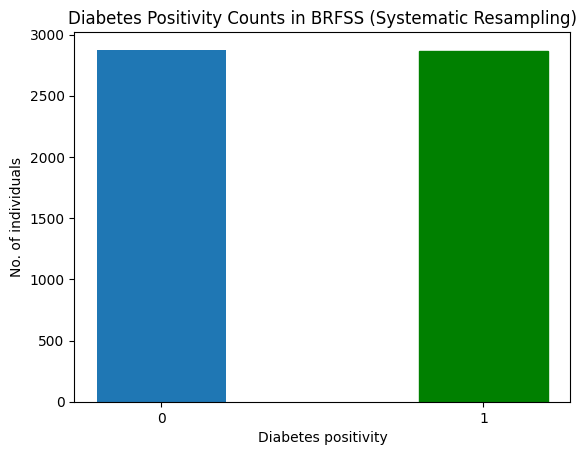

In [312]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Resampling)")
plt.show()

In [313]:
model_source_Sy_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_590"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4130 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4131 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4132 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4133 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4134 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4135 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4136 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.5688 - loss: 0.6856 - val_AUC: 0.7397 - val_loss: 0.6383
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7323 - loss: 0.6078 - val_AUC: 0.8156 - val_loss: 0.5146
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8240 - loss: 0.5122 - val_AUC: 0.8382 - val_loss: 0.5365
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8307 - loss: 0.5013 - val_AUC: 0.8618 - val_loss: 0.4585
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8691 - loss: 0.4522 - val_AUC: 0.8519 - val_loss: 0.4786
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8590 - loss: 0.4634 - val_AUC: 0.8674 - val_loss: 0.4565
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8878 - loss: 0.4201 - val_AUC: 0.8634 - val_loss: 0.4564
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8916 - loss: 0.4156 - val_AUC: 0.8679 - val_loss: 0.4437
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AU

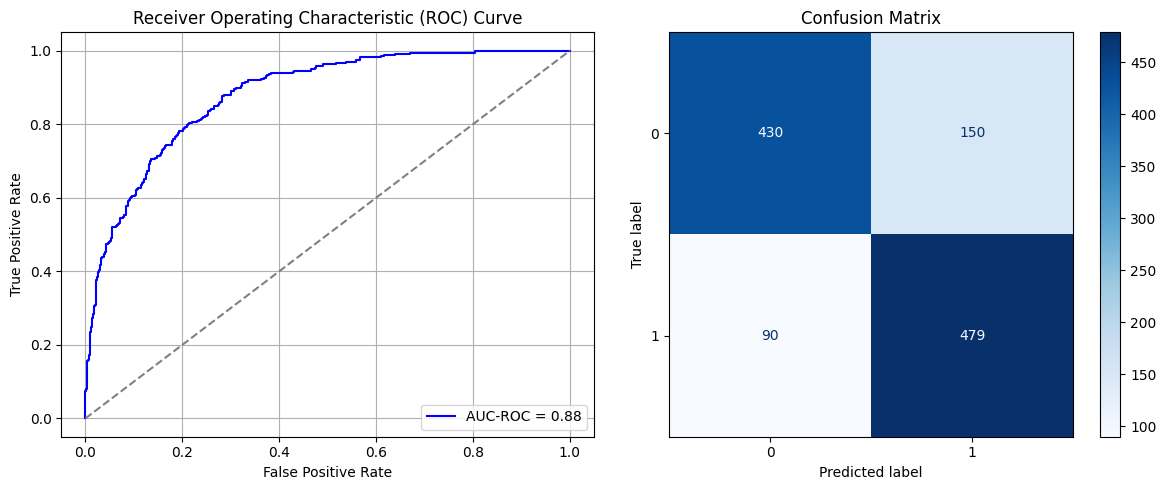

Best threshold based on F1-score: 0.4030036926269531
Time elapsed (performance): 9.0686073020006


<Sequential name=sequential_590, built=True>

In [314]:
train_and_evaluate(model_source_Sy_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
AUC-ROC: 0.5051020408163265
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.96      0.67        49
           1       0.60      0.06      0.11        48

    accuracy                           0.52        97
   macro avg       0.56      0.51      0.39        97
weighted avg       0.55      0.52      0.39        97

FPR 0.04081632653061224 TPR: 0.0625 FNR: 0.9375 TNR: 0.9591836734693877


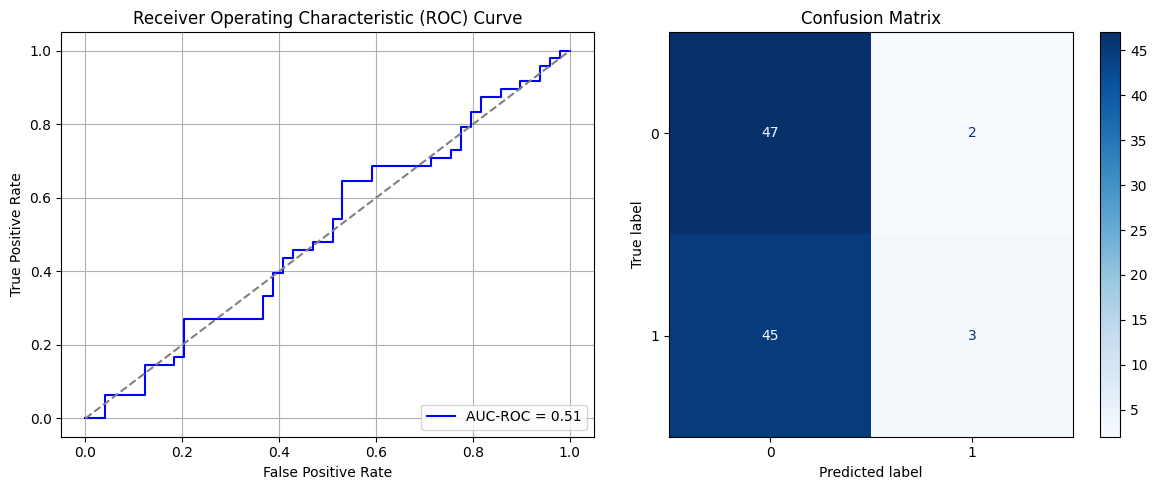

Best threshold based on F1-score: 0.6822794675827026
False Negative Rate: 0.9375
Time elapsed (performance): 0.4948295100002724


<ipython-input-244-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [315]:
Transductive_TL(model_source_Sy_ROS, X_T_test, y_T_test, "Target")

In [316]:
fine_tuning(X_T_train, X_T_test, y_T_train, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_591"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4137 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4138 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4139 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4140 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4141 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4142 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4143 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - AUC: 0.5082 - loss: 0.8861 - val_AUC: 0.5104 - val_loss: 0.7367
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5634 - loss: 0.7918 - val_AUC: 0.5296 - val_loss: 0.7257
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5370 - loss: 0.7600 - val_AUC: 0.5333 - val_loss: 0.7108
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.6121 - loss: 0.6859 - val_AUC: 0.5381 - val_loss: 0.6940
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5676 - loss: 0.7158 - val_AUC: 0.5366 - val_loss: 0.6672
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5638 - loss: 0.7057 - val_AUC: 0.5488 - val_loss: 0.6631
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5288 - loss: 0.7005 - val_AUC: 0.5655 - val_loss: 0.6529
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5306 - loss: 0.6955 - val_AUC: 0.5758 - val_loss: 0.6408
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6271 - loss: 0.

(np.float64(0.16326530612244897), np.float64(0.6666666666666666))

In [317]:
times = 50

FPR = []
FNR = []

for i in range(times):
    fpr, fnr = fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)
    # print(output)
    FPR.append(fpr)
    FNR.append(fnr)

ParamFit = pd.DataFrame([FPR, FNR]).T
ParamFit.columns=['FPR', 'FNR']

# fine_tuning(X_T_train_Sy, X_T_test, y_T_train_Sy, y_T_test, 0, 4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_592"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4144 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4145 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4146 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4147 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4148 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4149 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4150 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5612 - loss: 0.7810 - val_AUC: 0.0000e+00 - val_loss: 1.4086
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5527 - loss: 0.7163 - val_AUC: 0.0000e+00 - val_loss: 1.2530
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6030 - loss: 0.6476 - val_AUC: 0.0000e+00 - val_loss: 1.0925
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5439 - loss: 0.6824 - val_AUC: 0.0000e+00 - val_loss: 1.0813
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5957 - loss: 0.6629 - val_AUC: 0.0000e+00 - val_loss: 1.1128
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5974 - loss: 0.6564 - val_AUC: 0.0000e+00 - val_loss: 1.0988
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5604 - loss: 0.6670 - val_AUC: 0.0000e+00 - val_loss: 0.9306
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5362 - loss: 0.6558 - val_AUC: 0.0000e+00 - val_loss: 1.0340
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_593"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4151 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4152 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4153 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4154 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4155 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4156 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4157 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5466 - loss: 0.8294 - val_AUC: 0.0000e+00 - val_loss: 1.3416
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5228 - loss: 0.7560 - val_AUC: 0.0000e+00 - val_loss: 1.2451
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5424 - loss: 0.7081 - val_AUC: 0.0000e+00 - val_loss: 1.1969
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5078 - loss: 0.6761 - val_AUC: 0.0000e+00 - val_loss: 1.1880
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5665 - loss: 0.6595 - val_AUC: 0.0000e+00 - val_loss: 1.0929
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6104 - loss: 0.6455 - val_AUC: 0.0000e+00 - val_loss: 1.0578
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5560 - loss: 0.6430 - val_AUC: 0.0000e+00 - val_loss: 0.9259
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6143 - loss: 0.6362 - val_AUC: 0.0000e+00 - val_loss: 1.0074
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_594"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4158 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4159 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4160 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4161 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4162 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4163 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4164 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - AUC: 0.4985 - loss: 0.7917 - val_AUC: 0.0000e+00 - val_loss: 1.3491
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5730 - loss: 0.6923 - val_AUC: 0.0000e+00 - val_loss: 1.1551
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5669 - loss: 0.6909 - val_AUC: 0.0000e+00 - val_loss: 1.0279
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5362 - loss: 0.6868 - val_AUC: 0.0000e+00 - val_loss: 1.0620
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5398 - loss: 0.6930 - val_AUC: 0.0000e+00 - val_loss: 1.1359
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5490 - loss: 0.6574 - val_AUC: 0.0000e+00 - val_loss: 1.1498
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5744 - loss: 0.6428 - val_AUC: 0.0000e+00 - val_loss: 1.0990
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5566 - loss: 0.6794 - val_AUC: 0.0000e+00 - val_loss: 0.9731
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_595"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4165 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4166 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4167 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4168 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4169 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4170 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4171 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5030 - loss: 0.7963 - val_AUC: 0.0000e+00 - val_loss: 1.3966
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5269 - loss: 0.7210 - val_AUC: 0.0000e+00 - val_loss: 1.2636
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5667 - loss: 0.7061 - val_AUC: 0.0000e+00 - val_loss: 1.1500
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5511 - loss: 0.6996 - val_AUC: 0.0000e+00 - val_loss: 1.0097
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5708 - loss: 0.6541 - val_AUC: 0.0000e+00 - val_loss: 0.9419
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5435 - loss: 0.6632 - val_AUC: 0.0000e+00 - val_loss: 1.0030
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5816 - loss: 0.6607 - val_AUC: 0.0000e+00 - val_loss: 0.9662
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5577 - loss: 0.6502 - val_AUC: 0.0000e+00 - val_loss: 0.9091
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_596"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4172 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4173 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4174 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4175 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4176 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4177 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4178 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5689 - loss: 0.7482 - val_AUC: 0.0000e+00 - val_loss: 1.3187
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5343 - loss: 0.7007 - val_AUC: 0.0000e+00 - val_loss: 1.2117
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5576 - loss: 0.6879 - val_AUC: 0.0000e+00 - val_loss: 1.1522
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5782 - loss: 0.6739 - val_AUC: 0.0000e+00 - val_loss: 1.1431
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5616 - loss: 0.6592 - val_AUC: 0.0000e+00 - val_loss: 1.0813
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5751 - loss: 0.6415 - val_AUC: 0.0000e+00 - val_loss: 0.9743
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5969 - loss: 0.6258 - val_AUC: 0.0000e+00 - val_loss: 1.0095
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5749 - loss: 0.6449 - val_AUC: 0.0000e+00 - val_loss: 0.9282
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_597"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4179 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4180 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4181 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4182 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4183 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4184 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4185 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - AUC: 0.5237 - loss: 0.7982 - val_AUC: 0.0000e+00 - val_loss: 1.3243
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.5343 - loss: 0.7129 - val_AUC: 0.0000e+00 - val_loss: 1.2267
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5869 - loss: 0.6744 - val_AUC: 0.0000e+00 - val_loss: 1.1474
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5258 - loss: 0.7102 - val_AUC: 0.0000e+00 - val_loss: 0.9861
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5409 - loss: 0.6837 - val_AUC: 0.0000e+00 - val_loss: 1.0339
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5517 - loss: 0.6661 - val_AUC: 0.0000e+00 - val_loss: 1.0662
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5757 - loss: 0.6199 - val_AUC: 0.0000e+00 - val_loss: 1.1251
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5973 - loss: 0.6667 - val_AUC: 0.0000e+00 - val_loss: 1.0586
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_598"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4186 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4187 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4188 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4189 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4190 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4191 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4192 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5061 - loss: 0.8247 - val_AUC: 0.0000e+00 - val_loss: 1.3427
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5508 - loss: 0.7389 - val_AUC: 0.0000e+00 - val_loss: 1.2753
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5717 - loss: 0.7129 - val_AUC: 0.0000e+00 - val_loss: 1.1149
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5964 - loss: 0.6600 - val_AUC: 0.0000e+00 - val_loss: 1.1237
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5897 - loss: 0.6479 - val_AUC: 0.0000e+00 - val_loss: 1.0334
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5254 - loss: 0.6915 - val_AUC: 0.0000e+00 - val_loss: 0.9741
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6030 - loss: 0.6310 - val_AUC: 0.0000e+00 - val_loss: 1.0319
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5530 - loss: 0.6416 - val_AUC: 0.0000e+00 - val_loss: 0.9794
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_599"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4193 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4194 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4195 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4196 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4197 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4198 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4199 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5220 - loss: 0.7750 - val_AUC: 0.0000e+00 - val_loss: 1.4104
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.4918 - loss: 0.8120 - val_AUC: 0.0000e+00 - val_loss: 1.1741
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5174 - loss: 0.7341 - val_AUC: 0.0000e+00 - val_loss: 1.1634
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5151 - loss: 0.7457 - val_AUC: 0.0000e+00 - val_loss: 1.1815
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5368 - loss: 0.6844 - val_AUC: 0.0000e+00 - val_loss: 1.1667
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5922 - loss: 0.6649 - val_AUC: 0.0000e+00 - val_loss: 1.0519
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5890 - loss: 0.6477 - val_AUC: 0.0000e+00 - val_loss: 1.0798
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5984 - loss: 0.6519 - val_AUC: 0.0000e+00 - val_loss: 1.0705
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_600"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4200 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4201 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4202 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4203 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4204 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4205 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4206 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - AUC: 0.5949 - loss: 0.7073 - val_AUC: 0.0000e+00 - val_loss: 1.3809
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5287 - loss: 0.7356 - val_AUC: 0.0000e+00 - val_loss: 1.1637
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5766 - loss: 0.7069 - val_AUC: 0.0000e+00 - val_loss: 1.0005
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5728 - loss: 0.6809 - val_AUC: 0.0000e+00 - val_loss: 1.0257
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5719 - loss: 0.6695 - val_AUC: 0.0000e+00 - val_loss: 1.0894
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5149 - loss: 0.6901 - val_AUC: 0.0000e+00 - val_loss: 0.9969
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6006 - loss: 0.6430 - val_AUC: 0.0000e+00 - val_loss: 1.0464
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5520 - loss: 0.6585 - val_AUC: 0.0000e+00 - val_loss: 1.1387
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_601"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4207 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4208 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4209 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4210 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4211 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4212 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4213 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.5656 - loss: 0.7475 - val_AUC: 0.0000e+00 - val_loss: 1.3546
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5578 - loss: 0.7131 - val_AUC: 0.0000e+00 - val_loss: 1.0712
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5429 - loss: 0.6970 - val_AUC: 0.0000e+00 - val_loss: 1.0939
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5561 - loss: 0.6773 - val_AUC: 0.0000e+00 - val_loss: 1.1253
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5815 - loss: 0.6545 - val_AUC: 0.0000e+00 - val_loss: 1.0130
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5478 - loss: 0.6766 - val_AUC: 0.0000e+00 - val_loss: 1.0616
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6026 - loss: 0.6489 - val_AUC: 0.0000e+00 - val_loss: 1.1003
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5778 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 1.1079
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_602"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4214 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4215 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4216 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4217 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4218 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4219 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4220 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - AUC: 0.5706 - loss: 0.7607 - val_AUC: 0.0000e+00 - val_loss: 1.3601
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5152 - loss: 0.7251 - val_AUC: 0.0000e+00 - val_loss: 1.1272
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5104 - loss: 0.7308 - val_AUC: 0.0000e+00 - val_loss: 0.9916
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5776 - loss: 0.6765 - val_AUC: 0.0000e+00 - val_loss: 0.9263
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6112 - loss: 0.6452 - val_AUC: 0.0000e+00 - val_loss: 0.9965
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5648 - loss: 0.6466 - val_AUC: 0.0000e+00 - val_loss: 1.0713
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5491 - loss: 0.6695 - val_AUC: 0.0000e+00 - val_loss: 1.0065
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5627 - loss: 0.6463 - val_AUC: 0.0000e+00 - val_loss: 1.0542
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_603"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4221 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4222 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4223 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4224 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4225 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4226 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4227 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - AUC: 0.4995 - loss: 0.7905 - val_AUC: 0.0000e+00 - val_loss: 1.4195
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.5401 - loss: 0.7425 - val_AUC: 0.0000e+00 - val_loss: 1.2274
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5864 - loss: 0.6535 - val_AUC: 0.0000e+00 - val_loss: 1.2011
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5936 - loss: 0.6365 - val_AUC: 0.0000e+00 - val_loss: 1.1515
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5687 - loss: 0.6971 - val_AUC: 0.0000e+00 - val_loss: 1.0927
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5365 - loss: 0.6761 - val_AUC: 0.0000e+00 - val_loss: 1.0972
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5608 - loss: 0.6606 - val_AUC: 0.0000e+00 - val_loss: 1.0793
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5339 - loss: 0.6469 - val_AUC: 0.0000e+00 - val_loss: 1.1087
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_604"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4228 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4229 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4230 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4231 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4232 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4233 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4234 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5253 - loss: 0.8266 - val_AUC: 0.0000e+00 - val_loss: 1.3255
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5433 - loss: 0.7135 - val_AUC: 0.0000e+00 - val_loss: 1.0984
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5240 - loss: 0.7219 - val_AUC: 0.0000e+00 - val_loss: 1.0714
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5499 - loss: 0.6951 - val_AUC: 0.0000e+00 - val_loss: 0.9837
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5669 - loss: 0.6776 - val_AUC: 0.0000e+00 - val_loss: 0.9311
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5359 - loss: 0.6801 - val_AUC: 0.0000e+00 - val_loss: 1.0089
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5685 - loss: 0.6494 - val_AUC: 0.0000e+00 - val_loss: 1.0880
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5333 - loss: 0.6530 - val_AUC: 0.0000e+00 - val_loss: 1.0914
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_605"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4235 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4236 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4237 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4238 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4239 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4240 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4241 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5115 - loss: 0.7838 - val_AUC: 0.0000e+00 - val_loss: 1.4215
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5495 - loss: 0.6968 - val_AUC: 0.0000e+00 - val_loss: 1.1782
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5888 - loss: 0.6874 - val_AUC: 0.0000e+00 - val_loss: 1.0874
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5889 - loss: 0.6743 - val_AUC: 0.0000e+00 - val_loss: 1.0018
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5671 - loss: 0.6817 - val_AUC: 0.0000e+00 - val_loss: 1.0490
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5369 - loss: 0.7079 - val_AUC: 0.0000e+00 - val_loss: 1.0880
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5486 - loss: 0.6506 - val_AUC: 0.0000e+00 - val_loss: 1.1148
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6117 - loss: 0.6280 - val_AUC: 0.0000e+00 - val_loss: 1.0298
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_606"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4242 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4243 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4244 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4245 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4246 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4247 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4248 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - AUC: 0.5442 - loss: 0.7678 - val_AUC: 0.0000e+00 - val_loss: 1.3292
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.5606 - loss: 0.7027 - val_AUC: 0.0000e+00 - val_loss: 1.2038
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5802 - loss: 0.6766 - val_AUC: 0.0000e+00 - val_loss: 1.1292
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5755 - loss: 0.6673 - val_AUC: 0.0000e+00 - val_loss: 1.1190
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5408 - loss: 0.6907 - val_AUC: 0.0000e+00 - val_loss: 1.1229
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6102 - loss: 0.6448 - val_AUC: 0.0000e+00 - val_loss: 1.0917
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5882 - loss: 0.6466 - val_AUC: 0.0000e+00 - val_loss: 1.0905
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5933 - loss: 0.6327 - val_AUC: 0.0000e+00 - val_loss: 1.0698
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_607"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4249 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4250 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4251 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4252 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4253 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4254 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4255 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5582 - loss: 0.7574 - val_AUC: 0.0000e+00 - val_loss: 1.3387
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5060 - loss: 0.7494 - val_AUC: 0.0000e+00 - val_loss: 1.2287
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5438 - loss: 0.7096 - val_AUC: 0.0000e+00 - val_loss: 0.9976
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5500 - loss: 0.7090 - val_AUC: 0.0000e+00 - val_loss: 0.9591
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5695 - loss: 0.6610 - val_AUC: 0.0000e+00 - val_loss: 1.0557
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5874 - loss: 0.6541 - val_AUC: 0.0000e+00 - val_loss: 1.0126
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6142 - loss: 0.6269 - val_AUC: 0.0000e+00 - val_loss: 1.0807
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.4999 - loss: 0.6718 - val_AUC: 0.0000e+00 - val_loss: 1.1025
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_608"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4256 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4257 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4258 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4259 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4260 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4261 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4262 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5738 - loss: 0.7415 - val_AUC: 0.0000e+00 - val_loss: 1.3100
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5353 - loss: 0.7166 - val_AUC: 0.0000e+00 - val_loss: 1.2414
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5612 - loss: 0.6997 - val_AUC: 0.0000e+00 - val_loss: 1.1710
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6007 - loss: 0.6809 - val_AUC: 0.0000e+00 - val_loss: 1.1402
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5657 - loss: 0.6711 - val_AUC: 0.0000e+00 - val_loss: 1.1147
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5628 - loss: 0.6590 - val_AUC: 0.0000e+00 - val_loss: 1.1100
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5693 - loss: 0.6446 - val_AUC: 0.0000e+00 - val_loss: 0.9432
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.6083 - loss: 0.6351 - val_AUC: 0.0000e+00 - val_loss: 0.9457
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_609"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4263 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4264 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4265 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4266 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4267 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4268 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4269 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5687 - loss: 0.7151 - val_AUC: 0.0000e+00 - val_loss: 1.3823
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5622 - loss: 0.7344 - val_AUC: 0.0000e+00 - val_loss: 1.0748
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5350 - loss: 0.7238 - val_AUC: 0.0000e+00 - val_loss: 1.1356
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5358 - loss: 0.6970 - val_AUC: 0.0000e+00 - val_loss: 1.1504
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5421 - loss: 0.6741 - val_AUC: 0.0000e+00 - val_loss: 1.1658
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5461 - loss: 0.6831 - val_AUC: 0.0000e+00 - val_loss: 1.1251
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5735 - loss: 0.6722 - val_AUC: 0.0000e+00 - val_loss: 0.9506
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5406 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_610"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4270 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4271 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4272 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4273 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4274 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4275 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4276 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5631 - loss: 0.7498 - val_AUC: 0.0000e+00 - val_loss: 1.3785
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5402 - loss: 0.7416 - val_AUC: 0.0000e+00 - val_loss: 1.2346
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.5411 - loss: 0.6878 - val_AUC: 0.0000e+00 - val_loss: 1.1467
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5439 - loss: 0.6889 - val_AUC: 0.0000e+00 - val_loss: 1.0590
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5642 - loss: 0.6661 - val_AUC: 0.0000e+00 - val_loss: 0.9258
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5467 - loss: 0.6651 - val_AUC: 0.0000e+00 - val_loss: 0.9919
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6030 - loss: 0.6504 - val_AUC: 0.0000e+00 - val_loss: 0.9138
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5700 - loss: 0.6324 - val_AUC: 0.0000e+00 - val_loss: 0.9719
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_611"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4277 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4278 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4279 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4280 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4281 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4282 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4283 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - AUC: 0.5246 - loss: 0.8279 - val_AUC: 0.0000e+00 - val_loss: 1.3644
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5589 - loss: 0.7225 - val_AUC: 0.0000e+00 - val_loss: 1.1421
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5415 - loss: 0.7188 - val_AUC: 0.0000e+00 - val_loss: 1.1315
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6073 - loss: 0.6898 - val_AUC: 0.0000e+00 - val_loss: 1.1374
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5652 - loss: 0.6775 - val_AUC: 0.0000e+00 - val_loss: 1.0095
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5847 - loss: 0.6417 - val_AUC: 0.0000e+00 - val_loss: 1.0517
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5355 - loss: 0.6510 - val_AUC: 0.0000e+00 - val_loss: 1.0857
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5617 - loss: 0.6620 - val_AUC: 0.0000e+00 - val_loss: 0.9775
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_612"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4284 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4285 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4286 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4287 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4288 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4289 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4290 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5361 - loss: 0.7642 - val_AUC: 0.0000e+00 - val_loss: 1.3852
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5076 - loss: 0.7521 - val_AUC: 0.0000e+00 - val_loss: 1.1461
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5427 - loss: 0.7270 - val_AUC: 0.0000e+00 - val_loss: 1.1529
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5705 - loss: 0.6893 - val_AUC: 0.0000e+00 - val_loss: 1.1643
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6056 - loss: 0.6519 - val_AUC: 0.0000e+00 - val_loss: 1.1111
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5640 - loss: 0.6659 - val_AUC: 0.0000e+00 - val_loss: 0.9582
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5797 - loss: 0.6451 - val_AUC: 0.0000e+00 - val_loss: 0.9044
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5317 - loss: 0.6673 - val_AUC: 0.0000e+00 - val_loss: 0.9144
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_613"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4291 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4292 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4293 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4294 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4295 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4296 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4297 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - AUC: 0.5290 - loss: 0.8242 - val_AUC: 0.0000e+00 - val_loss: 1.3637
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5723 - loss: 0.7232 - val_AUC: 0.0000e+00 - val_loss: 1.1827
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5245 - loss: 0.7170 - val_AUC: 0.0000e+00 - val_loss: 1.0380
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5686 - loss: 0.6801 - val_AUC: 0.0000e+00 - val_loss: 1.0848
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5583 - loss: 0.6651 - val_AUC: 0.0000e+00 - val_loss: 1.0925
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5648 - loss: 0.6435 - val_AUC: 0.0000e+00 - val_loss: 1.1091
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5937 - loss: 0.6491 - val_AUC: 0.0000e+00 - val_loss: 1.0814
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.6095 - loss: 0.6308 - val_AUC: 0.0000e+00 - val_loss: 1.0985
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_614"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4298 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4299 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4300 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4301 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4302 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4303 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4304 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 833ms/step - AUC: 0.5679 - loss: 0.7405 - val_AUC: 0.0000e+00 - val_loss: 1.4252
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - AUC: 0.5582 - loss: 0.7300 - val_AUC: 0.0000e+00 - val_loss: 1.1421
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5431 - loss: 0.7044 - val_AUC: 0.0000e+00 - val_loss: 0.9925
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5671 - loss: 0.6991 - val_AUC: 0.0000e+00 - val_loss: 0.9398
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5811 - loss: 0.6743 - val_AUC: 0.0000e+00 - val_loss: 1.0512
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5884 - loss: 0.6652 - val_AUC: 0.0000e+00 - val_loss: 0.9651
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5377 - loss: 0.6631 - val_AUC: 0.0000e+00 - val_loss: 1.0037
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5788 - loss: 0.6517 - val_AUC: 0.0000e+00 - val_loss: 0.9288
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_615"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4305 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4306 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4307 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4308 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4309 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4310 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4311 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - AUC: 0.5056 - loss: 0.8411 - val_AUC: 0.0000e+00 - val_loss: 1.3616
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5236 - loss: 0.7496 - val_AUC: 0.0000e+00 - val_loss: 1.2339
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5302 - loss: 0.7241 - val_AUC: 0.0000e+00 - val_loss: 1.0066
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5522 - loss: 0.6857 - val_AUC: 0.0000e+00 - val_loss: 0.9245
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5576 - loss: 0.6686 - val_AUC: 0.0000e+00 - val_loss: 1.0458
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5501 - loss: 0.6634 - val_AUC: 0.0000e+00 - val_loss: 1.0809
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5535 - loss: 0.6896 - val_AUC: 0.0000e+00 - val_loss: 1.0709
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.598

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_616"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4312 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4313 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4314 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4315 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4316 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4317 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4318 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - AUC: 0.5207 - loss: 0.7978 - val_AUC: 0.0000e+00 - val_loss: 1.3670
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - AUC: 0.5763 - loss: 0.6892 - val_AUC: 0.0000e+00 - val_loss: 1.2135
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5839 - loss: 0.6592 - val_AUC: 0.0000e+00 - val_loss: 1.0432
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5751 - loss: 0.6758 - val_AUC: 0.0000e+00 - val_loss: 1.0448
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5387 - loss: 0.6849 - val_AUC: 0.0000e+00 - val_loss: 1.0912
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5507 - loss: 0.6818 - val_AUC: 0.0000e+00 - val_loss: 0.9525
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5927 - loss: 0.6503 - val_AUC: 0.0000e+00 - val_loss: 0.9103
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5840 - loss: 0.6474 - val_AUC: 0.0000e+00 - val_loss: 0.8868
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_617"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4319 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4320 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4321 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4322 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4323 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4324 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4325 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - AUC: 0.5352 - loss: 0.7526 - val_AUC: 0.0000e+00 - val_loss: 1.5575
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5746 - loss: 0.6877 - val_AUC: 0.0000e+00 - val_loss: 1.2732
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5737 - loss: 0.6921 - val_AUC: 0.0000e+00 - val_loss: 1.1372
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5534 - loss: 0.6746 - val_AUC: 0.0000e+00 - val_loss: 1.1132
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5921 - loss: 0.6546 - val_AUC: 0.0000e+00 - val_loss: 0.9982
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5872 - loss: 0.6545 - val_AUC: 0.0000e+00 - val_loss: 0.9448
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5598 - loss: 0.6618 - val_AUC: 0.0000e+00 - val_loss: 1.0497
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5573 - loss: 0.6683 - val_AUC: 0.0000e+00 - val_loss: 1.0746
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_618"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4326 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4327 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4328 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4329 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4330 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4331 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4332 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5343 - loss: 0.7536 - val_AUC: 0.0000e+00 - val_loss: 1.4870
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5719 - loss: 0.7223 - val_AUC: 0.0000e+00 - val_loss: 1.3659
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5516 - loss: 0.7339 - val_AUC: 0.0000e+00 - val_loss: 1.2513
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5870 - loss: 0.6832 - val_AUC: 0.0000e+00 - val_loss: 1.1597
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5280 - loss: 0.7115 - val_AUC: 0.0000e+00 - val_loss: 0.9969
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5631 - loss: 0.6649 - val_AUC: 0.0000e+00 - val_loss: 1.0387
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5662 - loss: 0.6503 - val_AUC: 0.0000e+00 - val_loss: 1.0324
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5994 - loss: 0.6403 - val_AUC: 0.0000e+00 - val_loss: 1.0602
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_619"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4333 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4334 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4335 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4336 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4337 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4338 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4339 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - AUC: 0.5431 - loss: 0.8357 - val_AUC: 0.0000e+00 - val_loss: 1.3791
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - AUC: 0.5722 - loss: 0.7067 - val_AUC: 0.0000e+00 - val_loss: 1.2888
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5869 - loss: 0.6809 - val_AUC: 0.0000e+00 - val_loss: 1.2058
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5292 - loss: 0.7241 - val_AUC: 0.0000e+00 - val_loss: 1.0370
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5877 - loss: 0.6640 - val_AUC: 0.0000e+00 - val_loss: 1.0663
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6169 - loss: 0.6437 - val_AUC: 0.0000e+00 - val_loss: 1.1136
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5780 - loss: 0.6533 - val_AUC: 0.0000e+00 - val_loss: 1.0752
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5663 - loss: 0.6643 - val_AUC: 0.0000e+00 - val_loss: 0.9016
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_620"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4340 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4341 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4342 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4343 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4344 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4345 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4346 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - AUC: 0.5479 - loss: 0.7984 - val_AUC: 0.0000e+00 - val_loss: 1.4208
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5292 - loss: 0.7189 - val_AUC: 0.0000e+00 - val_loss: 1.2134
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5679 - loss: 0.6919 - val_AUC: 0.0000e+00 - val_loss: 1.1594
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5267 - loss: 0.6949 - val_AUC: 0.0000e+00 - val_loss: 1.0031
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5659 - loss: 0.6573 - val_AUC: 0.0000e+00 - val_loss: 0.9698
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5431 - loss: 0.6648 - val_AUC: 0.0000e+00 - val_loss: 0.9810
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5670 - loss: 0.6491 - val_AUC: 0.0000e+00 - val_loss: 1.0794
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5877 - loss: 0.6503 - val_AUC: 0.0000e+00 - val_loss: 1.1013
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_621"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4347 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4348 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4349 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4350 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4351 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4352 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4353 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.5369 - loss: 0.7466 - val_AUC: 0.0000e+00 - val_loss: 1.4356
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5606 - loss: 0.7111 - val_AUC: 0.0000e+00 - val_loss: 1.2322
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5348 - loss: 0.7100 - val_AUC: 0.0000e+00 - val_loss: 1.0850
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5848 - loss: 0.6610 - val_AUC: 0.0000e+00 - val_loss: 0.9889
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.4884 - loss: 0.7139 - val_AUC: 0.0000e+00 - val_loss: 1.0292
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5203 - loss: 0.6659 - val_AUC: 0.0000e+00 - val_loss: 0.9999
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5722 - loss: 0.6493 - val_AUC: 0.0000e+00 - val_loss: 1.0511
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5869 - loss: 0.6547 - val_AUC: 0.0000e+00 - val_loss: 1.0840
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_622"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4354 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4355 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4356 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4357 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4358 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4359 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4360 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - AUC: 0.5379 - loss: 0.7805 - val_AUC: 0.0000e+00 - val_loss: 1.3773
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5543 - loss: 0.6936 - val_AUC: 0.0000e+00 - val_loss: 1.2387
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5505 - loss: 0.7168 - val_AUC: 0.0000e+00 - val_loss: 1.0445
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5586 - loss: 0.6806 - val_AUC: 0.0000e+00 - val_loss: 0.9744
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5394 - loss: 0.6774 - val_AUC: 0.0000e+00 - val_loss: 1.0452
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5487 - loss: 0.6787 - val_AUC: 0.0000e+00 - val_loss: 1.0803
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6016 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 1.0066
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.600

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_623"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4361 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4362 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4363 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4364 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4365 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4366 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4367 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5478 - loss: 0.7789 - val_AUC: 0.0000e+00 - val_loss: 1.3767
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5237 - loss: 0.7503 - val_AUC: 0.0000e+00 - val_loss: 1.1526
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5868 - loss: 0.6566 - val_AUC: 0.0000e+00 - val_loss: 1.0055
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5669 - loss: 0.6842 - val_AUC: 0.0000e+00 - val_loss: 1.0643
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5108 - loss: 0.6967 - val_AUC: 0.0000e+00 - val_loss: 1.0919
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5664 - loss: 0.6776 - val_AUC: 0.0000e+00 - val_loss: 0.9507
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5659 - loss: 0.6574 - val_AUC: 0.0000e+00 - val_loss: 1.0268
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5838 - loss: 0.6421 - val_AUC: 0.0000e+00 - val_loss: 1.0700
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_624"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4368 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4369 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4370 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4371 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4372 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4373 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4374 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - AUC: 0.5093 - loss: 0.8059 - val_AUC: 0.0000e+00 - val_loss: 1.3060
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5799 - loss: 0.6925 - val_AUC: 0.0000e+00 - val_loss: 1.0694
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5598 - loss: 0.6899 - val_AUC: 0.0000e+00 - val_loss: 0.9766
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5468 - loss: 0.6859 - val_AUC: 0.0000e+00 - val_loss: 1.0453
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - AUC: 0.5371 - loss: 0.6647 - val_AUC: 0.0000e+00 - val_loss: 1.1170
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5579 - loss: 0.6603 - val_AUC: 0.0000e+00 - val_loss: 1.1171
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5649 - loss: 0.6525 - val_AUC: 0.0000e+00 - val_loss: 1.0874
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5973 - loss: 0.6343 - val_AUC: 0.0000e+00 - val_loss: 0.9960
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_625"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4375 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4376 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4377 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4378 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4379 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4380 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4381 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5219 - loss: 0.8135 - val_AUC: 0.0000e+00 - val_loss: 1.3988
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5257 - loss: 0.7511 - val_AUC: 0.0000e+00 - val_loss: 1.1261
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5312 - loss: 0.6967 - val_AUC: 0.0000e+00 - val_loss: 1.0401
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5807 - loss: 0.6883 - val_AUC: 0.0000e+00 - val_loss: 1.1043
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5894 - loss: 0.6420 - val_AUC: 0.0000e+00 - val_loss: 1.2014
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5339 - loss: 0.6842 - val_AUC: 0.0000e+00 - val_loss: 1.1541
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5728 - loss: 0.6720 - val_AUC: 0.0000e+00 - val_loss: 1.1136
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5867 - loss: 0.6550 - val_AUC: 0.0000e+00 - val_loss: 1.1100
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_626"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4382 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4383 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4384 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4385 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4386 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4387 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4388 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - AUC: 0.5530 - loss: 0.7690 - val_AUC: 0.0000e+00 - val_loss: 1.3136
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5699 - loss: 0.6940 - val_AUC: 0.0000e+00 - val_loss: 1.0886
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5668 - loss: 0.6882 - val_AUC: 0.0000e+00 - val_loss: 1.0637
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5587 - loss: 0.6930 - val_AUC: 0.0000e+00 - val_loss: 0.9643
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5868 - loss: 0.6476 - val_AUC: 0.0000e+00 - val_loss: 0.9504
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5665 - loss: 0.6693 - val_AUC: 0.0000e+00 - val_loss: 0.9106
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5576 - loss: 0.6561 - val_AUC: 0.0000e+00 - val_loss: 1.0139
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6055 - loss: 0.6245 - val_AUC: 0.0000e+00 - val_loss: 1.0753
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_627"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4389 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4390 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4391 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4392 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4393 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4394 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4395 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5436 - loss: 0.7977 - val_AUC: 0.0000e+00 - val_loss: 1.3675
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5222 - loss: 0.7471 - val_AUC: 0.0000e+00 - val_loss: 1.1304
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5464 - loss: 0.6995 - val_AUC: 0.0000e+00 - val_loss: 0.9954
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5609 - loss: 0.6871 - val_AUC: 0.0000e+00 - val_loss: 0.9295
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5436 - loss: 0.6957 - val_AUC: 0.0000e+00 - val_loss: 0.8817
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5430 - loss: 0.6773 - val_AUC: 0.0000e+00 - val_loss: 0.9655
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5755 - loss: 0.6601 - val_AUC: 0.0000e+00 - val_loss: 1.0470
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6098 - loss: 0.6338 - val_AUC: 0.0000e+00 - val_loss: 1.1094
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_628"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4396 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4397 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4398 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4399 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4400 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4401 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4402 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.5865 - loss: 0.7390 - val_AUC: 0.0000e+00 - val_loss: 1.3212
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5736 - loss: 0.6943 - val_AUC: 0.0000e+00 - val_loss: 1.1100
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5151 - loss: 0.7254 - val_AUC: 0.0000e+00 - val_loss: 0.9876
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5366 - loss: 0.7210 - val_AUC: 0.0000e+00 - val_loss: 1.0363
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5831 - loss: 0.6658 - val_AUC: 0.0000e+00 - val_loss: 0.9360
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5943 - loss: 0.6784 - val_AUC: 0.0000e+00 - val_loss: 0.9177
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.6103 - loss: 0.6443 - val_AUC: 0.0000e+00 - val_loss: 1.0525
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5408 - loss: 0.6770 - val_AUC: 0.0000e+00 - val_loss: 1.1051
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_629"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4403 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4404 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4405 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4406 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4407 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4408 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4409 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - AUC: 0.5650 - loss: 0.7587 - val_AUC: 0.0000e+00 - val_loss: 1.3263
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5678 - loss: 0.7157 - val_AUC: 0.0000e+00 - val_loss: 1.1556
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5686 - loss: 0.6872 - val_AUC: 0.0000e+00 - val_loss: 1.1577
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5405 - loss: 0.7068 - val_AUC: 0.0000e+00 - val_loss: 1.1240
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5857 - loss: 0.6410 - val_AUC: 0.0000e+00 - val_loss: 1.1162
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5914 - loss: 0.6590 - val_AUC: 0.0000e+00 - val_loss: 0.9148
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5613 - loss: 0.6555 - val_AUC: 0.0000e+00 - val_loss: 0.8887
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - AUC: 0.5930 - loss: 0.6382 - val_AUC: 0.0000e+00 - val_loss: 0.8924
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_630"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4410 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4411 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4412 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4413 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4414 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4415 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4416 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - AUC: 0.5316 - loss: 0.8109 - val_AUC: 0.0000e+00 - val_loss: 1.3446
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5221 - loss: 0.7366 - val_AUC: 0.0000e+00 - val_loss: 1.1084
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5491 - loss: 0.6969 - val_AUC: 0.0000e+00 - val_loss: 1.0800
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5535 - loss: 0.7023 - val_AUC: 0.0000e+00 - val_loss: 1.1349
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5378 - loss: 0.7028 - val_AUC: 0.0000e+00 - val_loss: 1.1492
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5407 - loss: 0.6729 - val_AUC: 0.0000e+00 - val_loss: 1.1238
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5529 - loss: 0.6761 - val_AUC: 0.0000e+00 - val_loss: 1.0313
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.6065 - loss: 0.6422 - val_AUC: 0.0000e+00 - val_loss: 0.9183
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_631"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4417 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4418 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4419 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4420 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4421 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4422 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4423 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5498 - loss: 0.7682 - val_AUC: 0.0000e+00 - val_loss: 1.3529
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5678 - loss: 0.7121 - val_AUC: 0.0000e+00 - val_loss: 1.2420
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5687 - loss: 0.6860 - val_AUC: 0.0000e+00 - val_loss: 1.1826
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5295 - loss: 0.6962 - val_AUC: 0.0000e+00 - val_loss: 1.0184
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5330 - loss: 0.6885 - val_AUC: 0.0000e+00 - val_loss: 0.9333
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5756 - loss: 0.6577 - val_AUC: 0.0000e+00 - val_loss: 1.0420
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5389 - loss: 0.6879 - val_AUC: 0.0000e+00 - val_loss: 1.0819
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5723 - loss: 0.6759 - val_AUC: 0.0000e+00 - val_loss: 1.1100
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_632"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4424 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4425 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4426 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4427 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4428 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4429 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4430 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - AUC: 0.5432 - loss: 0.7164 - val_AUC: 0.0000e+00 - val_loss: 1.3476
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - AUC: 0.4944 - loss: 0.7314 - val_AUC: 0.0000e+00 - val_loss: 1.1982
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5553 - loss: 0.6753 - val_AUC: 0.0000e+00 - val_loss: 1.0307
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5498 - loss: 0.6733 - val_AUC: 0.0000e+00 - val_loss: 0.9711
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5496 - loss: 0.6841 - val_AUC: 0.0000e+00 - val_loss: 1.0092
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5444 - loss: 0.6790 - val_AUC: 0.0000e+00 - val_loss: 0.9724
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5522 - loss: 0.6644 - val_AUC: 0.0000e+00 - val_loss: 0.9077
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6113 - loss: 0.6386 - val_AUC: 0.0000e+00 - val_loss: 0.9760
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_633"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4431 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4432 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4433 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4434 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4435 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4436 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4437 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - AUC: 0.5383 - loss: 0.7730 - val_AUC: 0.0000e+00 - val_loss: 1.3117
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5376 - loss: 0.7231 - val_AUC: 0.0000e+00 - val_loss: 1.0944
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5423 - loss: 0.7103 - val_AUC: 0.0000e+00 - val_loss: 1.0975
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5551 - loss: 0.6919 - val_AUC: 0.0000e+00 - val_loss: 1.1333
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5858 - loss: 0.6440 - val_AUC: 0.0000e+00 - val_loss: 1.1783
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5542 - loss: 0.6879 - val_AUC: 0.0000e+00 - val_loss: 1.1276
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5418 - loss: 0.6457 - val_AUC: 0.0000e+00 - val_loss: 1.0916
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5935 - loss: 0.6475 - val_AUC: 0.0000e+00 - val_loss: 0.9589
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_634"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4438 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4439 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4440 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4441 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4442 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4443 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4444 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.5711 - loss: 0.7465 - val_AUC: 0.0000e+00 - val_loss: 1.3410
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - AUC: 0.5137 - loss: 0.7642 - val_AUC: 0.0000e+00 - val_loss: 1.1206
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5590 - loss: 0.6929 - val_AUC: 0.0000e+00 - val_loss: 0.9796
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5260 - loss: 0.7083 - val_AUC: 0.0000e+00 - val_loss: 0.9045
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - AUC: 0.5745 - loss: 0.6777 - val_AUC: 0.0000e+00 - val_loss: 0.8780
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5609 - loss: 0.6626 - val_AUC: 0.0000e+00 - val_loss: 0.9971
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5642 - loss: 0.6681 - val_AUC: 0.0000e+00 - val_loss: 1.0969
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5778 - loss: 0.6308 - val_AUC: 0.0000e+00 - val_loss: 1.1036
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_635"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4445 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4446 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4447 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4448 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4449 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4450 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4451 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5682 - loss: 0.7411 - val_AUC: 0.0000e+00 - val_loss: 1.4361
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5414 - loss: 0.7707 - val_AUC: 0.0000e+00 - val_loss: 1.1574
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5822 - loss: 0.6861 - val_AUC: 0.0000e+00 - val_loss: 1.0630
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5375 - loss: 0.7288 - val_AUC: 0.0000e+00 - val_loss: 0.9433
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5750 - loss: 0.6597 - val_AUC: 0.0000e+00 - val_loss: 0.9442
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5862 - loss: 0.6786 - val_AUC: 0.0000e+00 - val_loss: 0.8816
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5790 - loss: 0.6587 - val_AUC: 0.0000e+00 - val_loss: 0.8875
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5587 - loss: 0.6783 - val_AUC: 0.0000e+00 - val_loss: 0.8909
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_636"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4452 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4453 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4454 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4455 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4456 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4457 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4458 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - AUC: 0.5390 - loss: 0.7486 - val_AUC: 0.0000e+00 - val_loss: 1.3311
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5447 - loss: 0.7564 - val_AUC: 0.0000e+00 - val_loss: 1.0618
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5869 - loss: 0.6762 - val_AUC: 0.0000e+00 - val_loss: 1.1252
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5682 - loss: 0.6866 - val_AUC: 0.0000e+00 - val_loss: 1.0139
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - AUC: 0.5522 - loss: 0.6746 - val_AUC: 0.0000e+00 - val_loss: 0.9267
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - AUC: 0.5844 - loss: 0.6587 - val_AUC: 0.0000e+00 - val_loss: 1.0269
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5899 - loss: 0.6465 - val_AUC: 0.0000e+00 - val_loss: 1.0883
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5625 - loss: 0.6784 - val_AUC: 0.0000e+00 - val_loss: 1.0013
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_637"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4459 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4460 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4461 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4462 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4463 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4464 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4465 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5507 - loss: 0.7630 - val_AUC: 0.0000e+00 - val_loss: 1.4020
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5675 - loss: 0.7002 - val_AUC: 0.0000e+00 - val_loss: 1.1680
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5514 - loss: 0.7107 - val_AUC: 0.0000e+00 - val_loss: 1.0919
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5644 - loss: 0.6677 - val_AUC: 0.0000e+00 - val_loss: 1.1215
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5851 - loss: 0.6630 - val_AUC: 0.0000e+00 - val_loss: 1.1140
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5344 - loss: 0.6625 - val_AUC: 0.0000e+00 - val_loss: 1.1189
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5977 - loss: 0.6417 - val_AUC: 0.0000e+00 - val_loss: 1.0620
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5740 - loss: 0.6549 - val_AUC: 0.0000e+00 - val_loss: 0.8898
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_638"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4466 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4467 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4468 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4469 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4470 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4471 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4472 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.5721 - loss: 0.7238 - val_AUC: 0.0000e+00 - val_loss: 1.3575
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.4983 - loss: 0.7716 - val_AUC: 0.0000e+00 - val_loss: 1.0831
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5807 - loss: 0.6840 - val_AUC: 0.0000e+00 - val_loss: 1.1288
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.5025 - loss: 0.7093 - val_AUC: 0.0000e+00 - val_loss: 1.1552
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5697 - loss: 0.6439 - val_AUC: 0.0000e+00 - val_loss: 1.1503
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5911 - loss: 0.6621 - val_AUC: 0.0000e+00 - val_loss: 1.0535
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5675 - loss: 0.6624 - val_AUC: 0.0000e+00 - val_loss: 1.0891
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5856 - loss: 0.6481 - val_AUC: 0.0000e+00 - val_loss: 1.0916
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_639"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4473 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4474 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4475 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4476 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4477 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4478 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4479 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - AUC: 0.5165 - loss: 0.8259 - val_AUC: 0.0000e+00 - val_loss: 1.3722
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - AUC: 0.5614 - loss: 0.7176 - val_AUC: 0.0000e+00 - val_loss: 1.1999
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - AUC: 0.5376 - loss: 0.7075 - val_AUC: 0.0000e+00 - val_loss: 1.0440
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - AUC: 0.5415 - loss: 0.6845 - val_AUC: 0.0000e+00 - val_loss: 1.0583
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5574 - loss: 0.6622 - val_AUC: 0.0000e+00 - val_loss: 1.0107
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5560 - loss: 0.6636 - val_AUC: 0.0000e+00 - val_loss: 0.9992
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5362 - loss: 0.6608 - val_AUC: 0.0000e+00 - val_loss: 0.9615
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.6244 - loss: 0.6394 - val_AUC: 0.0000e+00 - val_loss: 0.9906
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_640"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4480 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4481 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4482 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4483 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4484 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4485 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4486 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - AUC: 0.5119 - loss: 0.8115 - val_AUC: 0.0000e+00 - val_loss: 1.3281
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5249 - loss: 0.7325 - val_AUC: 0.0000e+00 - val_loss: 1.0559
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5493 - loss: 0.6872 - val_AUC: 0.0000e+00 - val_loss: 0.9836
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5358 - loss: 0.7267 - val_AUC: 0.0000e+00 - val_loss: 0.9455
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5897 - loss: 0.6688 - val_AUC: 0.0000e+00 - val_loss: 1.0108
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5523 - loss: 0.6759 - val_AUC: 0.0000e+00 - val_loss: 0.9350
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5943 - loss: 0.6574 - val_AUC: 0.0000e+00 - val_loss: 0.9943
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5692 - loss: 0.6692 - val_AUC: 0.0000e+00 - val_loss: 1.0695
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_641"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4487 (Dense)              │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4488 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4489 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4490 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4491 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4492 (Dense)              │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4493 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

7
Not Trainable
Not Trainable
Not Trainable
Not Trainable
Trainable
Trainable
Not Trainable


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - AUC: 0.5546 - loss: 0.7923 - val_AUC: 0.0000e+00 - val_loss: 1.3386
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5830 - loss: 0.7013 - val_AUC: 0.0000e+00 - val_loss: 1.1914
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5621 - loss: 0.6787 - val_AUC: 0.0000e+00 - val_loss: 1.0517
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5499 - loss: 0.6867 - val_AUC: 0.0000e+00 - val_loss: 0.9602
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC: 0.5536 - loss: 0.6834 - val_AUC: 0.0000e+00 - val_loss: 1.0157
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.5520 - loss: 0.6593 - val_AUC: 0.0000e+00 - val_loss: 1.1041
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.5586 - loss: 0.6352 - val_AUC: 0.0000e+00 - val_loss: 1.1552
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - AUC: 0.5554 - loss: 0.6589 - val_AUC: 0.0000e+00 - val_loss: 1.1039
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━

In [318]:
print(ParamFit)
ParamFit.to_csv('Sy_ROS_Fine_Tuning.csv')

         FPR       FNR
0   0.040816  0.854167
1   0.040816  0.895833
2   0.040816  0.854167
3   0.061224  0.833333
4   0.102041  0.729167
5   0.040816  0.875000
6   0.102041  0.833333
7   0.040816  0.854167
8   0.040816  0.875000
9   0.040816  0.854167
10  0.040816  0.916667
11  0.040816  0.854167
12  0.102041  0.791667
13  0.040816  0.854167
14  0.061224  0.770833
15  0.061224  0.812500
16  0.081633  0.687500
17  0.040816  0.895833
18  0.040816  0.833333
19  0.040816  0.854167
20  0.040816  0.895833
21  0.061224  0.791667
22  0.040816  0.854167
23  0.040816  0.854167
24  0.102041  0.770833
25  0.040816  0.854167
26  0.040816  0.916667
27  0.040816  0.791667
28  0.081633  0.812500
29  0.040816  0.854167
30  0.102041  0.791667
31  0.061224  0.833333
32  0.040816  0.854167
33  0.081633  0.833333
34  0.040816  0.875000
35  0.061224  0.854167
36  0.040816  0.854167
37  0.061224  0.708333
38  0.102041  0.791667
39  0.040816  0.854167
40  0.061224  0.833333
41  0.102041  0.791667
42  0.06122